# Projet HUT
## Analyse des données

### Objectifs

- Visualiser des données : observation du comportement des données, défauts et erreurs des capteurs
- Apporter des données quantifiées quant à la fréquence d'utilisation, le temps d'utilisation, la détection de pattern c'est-à-dire les plages d'utilisation
- Appuyer des arguments quant à des enchaînements d'utilisations c'est-à-dire des scénarios

#### Description de la trame de code

> Visualisation des données
>> Importation des packages nécessaires pour l'analyse
>> Utilisation des fichiers de données CSV
>> Normalisation des données
>> Affichage graphique

> Etude de l'activité "regarder la télé" selon les capteurs du canapé et de la lumière de la télé
>> Récupération des données selon l'état d'activité "en marche"
>> Concordance des moments d'utilisation des deux capteurs
>> Mise à jour des plages pour retirer les "défauts" des capteurs.

> Etude de l'activité "dormir dans le lit"


### Visualisation des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path11 = "split_sensor_int5891_1min.csv"
path22 = "split_sensor_int6127_1min.csv"
path33 = "split_sensor_int5889_1min.csv"
dfdf = pd.read_csv(path11)
df_bisdf_bis = pd.read_csv(path22)
df_3df_3 = pd.read_csv(path33)

In [5]:
nb_donnee_par_jour = 60 * 24 # Pour des données extraites à la minute
nb_donnee_par_sem = nb_donnee_par_jour * 7
start = nb_donnee_par_jour * 70 # Début de la visualisation
#start=0

In [6]:
df2 = dfdf[start:start + nb_donnee_par_sem]
df_bis2 = df_bisdf_bis[start:start + nb_donnee_par_sem]
df_3_2 = df_3df_3[start:start + nb_donnee_par_sem]

In [7]:
# Normaliser les données non binaires
def normalize(df):
    result = df.copy()
    max_value = df["value"].max()
    min_value = df["value"].min()
    result["value"] = (df["value"] - min_value) / (max_value - min_value)
    return result

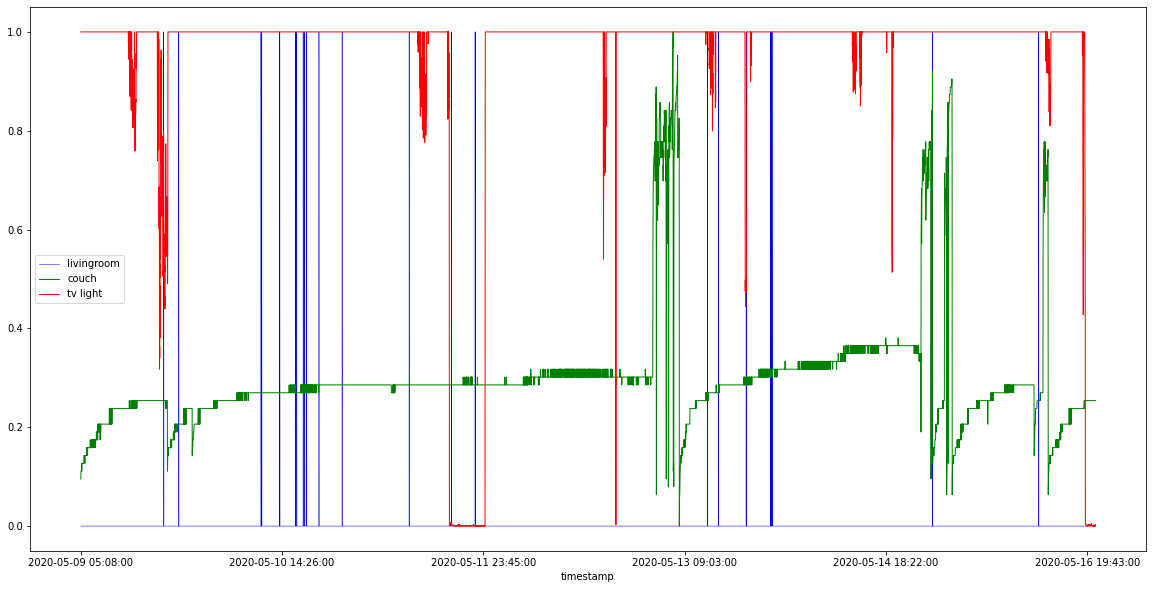

In [8]:
ax = df2.plot(x='timestamp', y='value', color='blue', label='livingroom', linewidth='0.5', figsize=(20,10))
# ax = df_3_2.plot(x='timestamp', y='value', color='green',label='bathroom', linewidth='0.5')
# ax = df_bis2.plot(x='timestamp', y='value', color='red',label='corridor', linewidth='0.5')
# df2.plot(x='timestamp', y='value', color='blue', label='bathroom', linewidth='0.5', ax=ax)
normalize(df_3_2).plot(x='timestamp', y='value', color='green', label='couch', linewidth='1', ax=ax, figsize=(20,10))
# plt.plot(x='timestamp', y='value', color='blue', label='livingroom', linewidth='0.5', data=df2)
normalize(df_bis2).plot(x='timestamp', y='value', color='red', label='tv light', linewidth='1', ax=ax, figsize=(20,10))
# df_bis2.plot(x='timestamp', y='value', color='red',label='corridor', linewidth='0.5', ax=ax)
# df_3_2.plot(x='timestamp', y='value', color='green',label='bathroom', linewidth='0.5', ax=ax)
plt.show()

### Conclusion de cette partie

Des erreurs pour les capteurs ont pu être observées, notamment pour les capteurs de mouvement tels que dans la salle de bain ou la cuisine à partir du 2020-03-18.
Choix : étude des données sur la période du 2020-02-26 au 2020-03-17
--> Ceci est à confirmer et à adapter selon les données récoltées pour chaque capteur, si celles-ci sont suffisantes pour une analyse. Dans le cas contraire, nous allongerons la période d'étude pour l'analyse et déceler des patterns par exemple.

## Etude de l'activité : "regarder la télé"

Utilisation des capteurs suivants :
- Capteur de pression du canapé (réf : P01 - 5889)
- Capteur de lumière de la télé (réf : L01 - 6127)
- Capteur de mouvement de la pièce (livingroom) (réf : M02 - 5891)

#### Problèmes relevés dans cette partie

La plage du 2020-02-26 au 2020-03-17 n'est pas suffisante pour l'étude de ce capteur. Il faut donc allongé la plage jusqu'au 2020-06-01 (passé cette date, on décèle un comportement anormal du capteur de pression du canapé).


Choix :
- Dans un premier temps, il a été envisagé de travailler aussi avec le capteur de mouvement de la pièce concerné. Dans une première version, celui-ci n'a pas été étudié. Il le sera peut-être éventuellement dans une version ultérieure, non faite encore à ce jour.

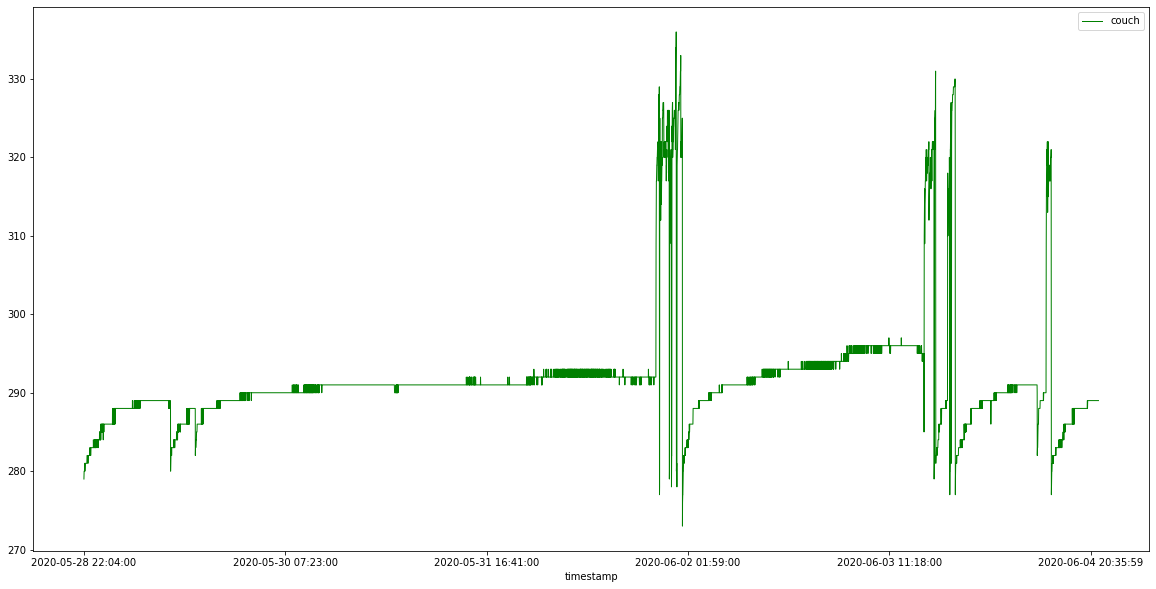

In [9]:
df_3_2.plot(x='timestamp', y='value', color='green', label='couch', linewidth='1',figsize=(20,10))

In [10]:
path1_1 = "split_sensor_int5891_1min.csv"
path2_2 = "split_sensor_int6127_1min.csv"
path3_3 = "split_sensor_int5889_1min.csv"
df_rgtv = pd.read_csv(path1_1)
df_bis_rgtv = pd.read_csv(path2_2)
df_3_rgtv = pd.read_csv(path3_3)

In [11]:
# Renvoyer les valeurs pour lesquelles l'activité est considérée "en marche"

def get_couch_pressure(df):
    presence_canape_date = []
    presence_canape_heure = []
    #df = df_3_rgtv
    n = df.shape[0]
    for i in range (n) :
        if (df['value'][i] > 305) and (df['timestamp'][i] < '2020-07-06 23:59:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-07-06 23:59:00') 
            presence_canape_date.append(df['timestamp'][i][0:10])
            presence_canape_heure.append(df['timestamp'][i][11:19])
    #presence_canape_date=np.array([presence_canape_date])
    #presence_canape_heure=np.array([presence_canape_heure])

    presence_canape=[presence_canape_date, presence_canape_heure]
    #presence_canape = np.array(presence_canape)
    return presence_canape

In [12]:
get_couch_pressure(df_3_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-

In [13]:
# Renvoyer les valeurs pour lesquelles l'activité est considérée "en marche"

def get_tv_light(df):
    tv_allumee_date = []
    tv_allumee_heure = []
    #df = df_bis_rgtv
    n = df.shape[0]
    for i in range(n):
        if (df['value'][i] < 15) and (df['timestamp'][i] < '2020-07-06 23:59:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00')
            #and (df['timestamp'][i] < '2020-07-06 23:59:00') 
            tv_allumee_date.append(df['timestamp'][i][0:10])
            tv_allumee_heure.append(df['timestamp'][i][11:19])
            
    tv_allumee = [tv_allumee_date, tv_allumee_heure]
    return tv_allumee

In [14]:
get_tv_light(df_bis_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-

In [15]:
# Renvoyer les valeurs pour lesquelles l'activité est considérée "en marche"

def get_presence_livingroom(df):
    presence_livingroom_date = []
    presence_livingroom_heure = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] == 1) and (df['timestamp'][i] < '2020-07-06 23:59:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            presence_livingroom_date.append(df['timestamp'][i][0:10])
            presence_livingroom_heure.append(df['timestamp'][i][11:19])
    presence_livingroom = [presence_livingroom_date, presence_livingroom_heure]
    return presence_livingroom

In [16]:
get_presence_livingroom(df_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-

In [17]:
# Renvoie les dates communes pour les activités choisies considérées "en marche"

def get_concordance_regarder_tv(dfa,dfb):
    presence_canape = get_couch_pressure(dfa)
    tv_allumee = get_tv_light(dfb)
    
    concordance=[]

    n = len(presence_canape[0])
    m = len(tv_allumee[0])
    #l = len(presence_livingroom)
    for i in range(n):
        for j in range(m):
            if (presence_canape[0][i] == tv_allumee[0][j]) and (presence_canape[1][i] == tv_allumee[1][j]):
                concordance.append(presence_canape[0][i] + " " + presence_canape[1][i])
    return concordance

In [18]:
get_concordance_regarder_tv(df_3_rgtv,df_bis_rgtv)[0][11:19]

'16:51:00'

In [19]:
#Conversion des données date/horaire de str à datetime
# https://www.geeksforgeeks.org/python-datetime-strptime-function/
from datetime import datetime, timedelta

In [20]:
get_concordance_regarder_tv(df_3_rgtv,df_bis_rgtv)[3500:4000]

['2020-06-01 21:33:00',
 '2020-06-01 21:34:00',
 '2020-06-01 21:35:00',
 '2020-06-01 21:36:00',
 '2020-06-01 21:37:00',
 '2020-06-01 21:38:00',
 '2020-06-01 21:40:00',
 '2020-06-01 21:41:00',
 '2020-06-01 21:42:00',
 '2020-06-01 21:43:00',
 '2020-06-01 21:44:00',
 '2020-06-01 21:45:00',
 '2020-06-01 21:46:00',
 '2020-06-01 21:47:00',
 '2020-06-01 21:48:00',
 '2020-06-01 21:49:00',
 '2020-06-01 21:50:00',
 '2020-06-01 21:52:00',
 '2020-06-01 21:53:00',
 '2020-06-01 21:54:00',
 '2020-06-01 21:55:00',
 '2020-06-01 21:56:00',
 '2020-06-01 22:00:00',
 '2020-06-01 22:01:00',
 '2020-06-01 22:02:00',
 '2020-06-01 22:03:00',
 '2020-06-01 22:04:00',
 '2020-06-01 22:05:00',
 '2020-06-01 22:07:00',
 '2020-06-01 22:08:00',
 '2020-06-01 22:09:00',
 '2020-06-01 22:12:00',
 '2020-06-01 22:13:00',
 '2020-06-01 22:15:00',
 '2020-06-01 22:17:00',
 '2020-06-01 22:18:00',
 '2020-06-01 22:19:00',
 '2020-06-01 22:21:00',
 '2020-06-01 22:22:00',
 '2020-06-01 22:23:00',
 '2020-06-01 22:24:00',
 '2020-06-01 22:

In [21]:
plages_rgtv = pd.DataFrame(columns=['début','fin','durée'])

In [22]:
# Renvoie les plages d'utilisation de l'activité (ici regarder la télé)
# On regarde les dates pour lesquelles les deux capteurs (lum télé et press canapé) sont considéré en marche (cf. concordance)
# On crée des plages d'utilisation, c'est-à-dire une date de début, de fin et le calcul de la durée d'utilisation
# ceci en parcourant la succession des dates. Ne forment une plages les dates séparées d'une minute (puisque les données sont échantillonnées à la minute).

def get_plage_avec_concordance(dfa,dfb):
    concordance = get_concordance_regarder_tv(dfa,dfb)
    #dfa = df_3_rgtv ; dfb=df_bis_rgtv
    n = len(concordance)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_regarder_tv=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    delta_sec = timedelta(seconds=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(concordance[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(concordance[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute):
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):                          
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            #Ne semble pas être utilisé pour ce cas ici
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date2.month == 3) :
                                    intermediate.append(date1)
                                else :
                                  if(len(intermediate)!=0):
                                    debut.append(intermediate[0])
                                    fin.append(date1)
                                    intermediate=[]
                            if (date1.day == 30) and (date2.month == 1):
                                intermediate.append(date1)
                            if (date1.day == 31) and (date2.month == 1) :
                                intermediate.append(date1)
                            else :
                              if(len(intermediate)!=0):
                                debut.append(intermediate[0])
                                fin.append(date1)
                                intermediate=[]
                              else:
                                debut.append(str(date1))
                                fin.append(str(date1+delta_sec))
                                duree.append(str(delta_sec))
                    else :
                      if(len(intermediate)!=0):
                        debut.append(str(intermediate[0]))
                        fin.append(str(date1))
                        duree.append(str(date1-intermediate[0]))
                        intermediate=[]
                      else:
                        debut.append(str(date1))
                        fin.append(str(date1+delta_sec))
                        duree.append(str(delta_sec))
                else :
                  if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    #df_plages = pd.DataFrame({'début' : [str(intermediate[0])], 'fin' : [str(date1)], 'durée' : [str(date2-intermediate[0])]})
                    #pd.concat([plages,df_plages], sort=False)
                    intermediate=[]
                  else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    #df_plages = pd.DataFrame({'début' : [str(intermediate[0])], 'fin' : [str(date1)], 'durée' : [str(date2-intermediate[0])]})
                    #pd.concat([plages,df_plages], sort=False)
                    intermediate=[]
                else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
                                         
    plages_regarder_tv=[debut,fin,duree]
    return plages_regarder_tv

In [23]:
get_plage_avec_concordance(df_3_rgtv,df_bis_rgtv)

[['2020-02-27 16:51:00',
  '2020-02-27 17:00:00',
  '2020-02-27 17:06:00',
  '2020-02-27 17:16:00',
  '2020-02-27 17:18:00',
  '2020-02-27 17:20:00',
  '2020-02-27 17:25:00',
  '2020-02-27 17:28:00',
  '2020-02-27 17:34:00',
  '2020-02-27 17:58:00',
  '2020-02-27 18:04:00',
  '2020-02-27 18:06:00',
  '2020-02-27 18:26:00',
  '2020-02-27 18:32:00',
  '2020-02-27 18:34:00',
  '2020-02-27 18:47:00',
  '2020-02-27 18:49:00',
  '2020-02-27 19:02:00',
  '2020-02-27 20:33:00',
  '2020-02-27 21:38:00',
  '2020-02-27 21:40:00',
  '2020-02-27 21:50:00',
  '2020-02-27 22:10:00',
  '2020-02-27 22:19:00',
  '2020-02-27 22:21:00',
  '2020-02-27 22:33:00',
  '2020-02-27 22:38:00',
  '2020-02-27 22:43:00',
  '2020-02-27 22:48:00',
  '2020-02-28 10:08:00',
  '2020-02-28 11:17:00',
  '2020-02-28 11:20:00',
  '2020-02-28 11:40:00',
  '2020-02-28 11:52:00',
  '2020-02-28 12:00:00',
  '2020-02-28 12:08:00',
  '2020-02-28 12:15:00',
  '2020-02-28 12:32:00',
  '2020-02-28 12:34:00',
  '2020-02-28 12:41:00',


In [24]:
plages_rgtv['début'] = get_plage_avec_concordance(df_3_rgtv,df_bis_rgtv)[0]
plages_rgtv['fin'] = get_plage_avec_concordance(df_3_rgtv,df_bis_rgtv)[1]
plages_rgtv['durée'] = get_plage_avec_concordance(df_3_rgtv,df_bis_rgtv)[2]

In [25]:
plages_rgtv

début                  fin    durée
0     2020-02-27 16:51:00  2020-02-27 16:57:00  0:06:00
1     2020-02-27 17:00:00  2020-02-27 17:03:00  0:03:00
2     2020-02-27 17:06:00  2020-02-27 17:14:00  0:08:00
3     2020-02-27 17:16:00  2020-02-27 17:16:01  0:00:01
4     2020-02-27 17:18:00  2020-02-27 17:18:01  0:00:01
...                   ...                  ...      ...
1150  2020-07-06 16:22:00  2020-07-06 16:27:00  0:05:00
1151  2020-07-06 16:29:00  2020-07-06 16:34:00  0:05:00
1152  2020-07-06 16:36:00  2020-07-06 16:40:00  0:04:00
1153  2020-07-06 16:43:00  2020-07-06 16:44:00  0:01:00
1154  2020-07-06 16:51:00  2020-07-06 16:59:00  0:08:00

[1155 rows x 3 columns]

In [26]:
# Ré-évaluation des plages suite à la création des plages précédentes, c'est-à-dire que l'on va réunir les plages ainsi formées
# si la durée entre la date de début de la plage n et la date de fin de la plage n-1 est inférieure à un écart choisi.

new_plages_rgtv = pd.DataFrame(columns=['début','fin','durée'])

def retablir_plages(dfa, ecart):
    n = dfa.shape[0]
    new_debut=[]
    new_fin=[]
    fin_intermediate=[]
    new_duree=[]
    timedelta_day = timedelta(days=1)
    
    i=0
    for j in range (n-1):
        date1 = datetime.strptime(dfa.iat[j,1], '%Y-%m-%d %H:%M:%S')
        date2 = datetime.strptime(dfa.iat[j+1,0], '%Y-%m-%d %H:%M:%S')
        calc_intermediate = date2 - date1
        #print(calc_intermediate)
        if(calc_intermediate<timedelta_day):
          calc = datetime.strptime(str(calc_intermediate),'%H:%M:%S')
          if (calc.minute <= ecart) and (calc.hour <1) :
            #Construire nouveau dataset
            fin_intermediate.append(dfa.iat[j+1,1])
          else :
            if(len(fin_intermediate)!=0) :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[j,1])
                new_debut_date = datetime.strptime(dfa.iat[i,0],'%Y-%m-%d %H:%M:%S')
                new_fin_date = datetime.strptime(dfa.iat[j,1],'%Y-%m-%d %H:%M:%S')
                calc_duree = new_fin_date-new_debut_date
                new_duree.append(str(calc_duree))
                i=j+1
            else :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[i,1])
                new_duree.append(dfa.iat[i,2])
                i=j+1
        else :
          if(len(fin_intermediate)!=0) :
              new_debut.append(dfa.iat[i,0])
              new_fin.append(dfa.iat[j,1])
              new_debut_date = datetime.strptime(dfa.iat[i,0],'%Y-%m-%d %H:%M:%S')
              new_fin_date = datetime.strptime(dfa.iat[j,1],'%Y-%m-%d %H:%M:%S')
              calc_duree = new_fin_date-new_debut_date
              new_duree.append(str(calc_duree))
              i=j+1
          else :
              new_debut.append(dfa.iat[i,0])
              new_fin.append(dfa.iat[i,1])
              new_duree.append(dfa.iat[i,2])
              i=j+1
    new_plages_regarder_tv=[new_debut,new_fin,new_duree]
    return new_plages_regarder_tv

In [27]:
retablir_plages(plages_rgtv,10)

[['2020-02-27 16:51:00',
  '2020-02-27 17:58:00',
  '2020-02-27 18:26:00',
  '2020-02-27 18:47:00',
  '2020-02-27 20:33:00',
  '2020-02-27 21:38:00',
  '2020-02-28 10:08:00',
  '2020-02-28 11:17:00',
  '2020-02-28 11:40:00',
  '2020-02-28 13:50:00',
  '2020-02-28 16:13:00',
  '2020-03-21 14:50:00',
  '2020-03-21 18:39:00',
  '2020-03-22 12:43:00',
  '2020-03-22 13:01:00',
  '2020-03-22 15:10:00',
  '2020-03-22 17:39:00',
  '2020-03-22 18:28:00',
  '2020-03-29 21:52:00',
  '2020-03-30 20:24:00',
  '2020-03-30 22:13:00',
  '2020-04-01 22:08:00',
  '2020-04-02 14:30:00',
  '2020-04-02 16:29:00',
  '2020-04-02 17:11:00',
  '2020-04-02 22:33:00',
  '2020-04-03 16:13:00',
  '2020-04-03 19:26:00',
  '2020-04-03 20:46:00',
  '2020-04-04 15:33:00',
  '2020-04-04 20:59:00',
  '2020-04-07 13:38:00',
  '2020-04-07 22:27:00',
  '2020-04-10 12:05:00',
  '2020-04-10 12:40:00',
  '2020-04-10 12:58:00',
  '2020-04-10 17:23:00',
  '2020-04-25 21:53:00',
  '2020-04-26 19:31:00',
  '2020-04-26 20:13:00',


In [28]:
new_plages_rgtv['début'] = retablir_plages(plages_rgtv,10)[0]
new_plages_rgtv['fin'] = retablir_plages(plages_rgtv,10)[1]
new_plages_rgtv['durée'] = retablir_plages(plages_rgtv,10)[2]

In [29]:
new_plages_rgtv

début                  fin    durée
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00
1   2020-02-27 17:58:00  2020-02-27 18:09:00  0:11:00
2   2020-02-27 18:26:00  2020-02-27 18:36:00  0:10:00
3   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00
4   2020-02-27 20:33:00  2020-02-27 20:39:00  0:06:00
..                  ...                  ...      ...
78  2020-07-05 15:07:00  2020-07-05 16:12:00  1:05:00
79  2020-07-05 16:52:00  2020-07-05 17:11:00  0:19:00
80  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00
81  2020-07-05 23:43:00  2020-07-05 23:52:00  0:09:00
82  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01

[83 rows x 3 columns]

In [30]:
# Visualition graphique sous forme de "plages"

import plotly.express as px

df = []

for i in range(new_plages_rgtv.shape[0]):
  df.append(dict(Task="Regarder la télé", Start=new_plages_rgtv['début'][i], Finish=new_plages_rgtv['fin'][i]))

fig = px.timeline(df, x_start='Start', x_end='Finish', y = 'Task', color='Task')
fig.show()

## Etude de l'activité : "dormir dans le lit"

Utilisation des capteurs suivants :
- Capteur pression du lit (P02 - 5896)
- Capteur de mouvement sous le lit (M04 - 6686)
- Capteur de mouvement dans la pièce (bedroom) (M03 - 5892)

#### Problèmes relevés dans cette partie

Les capteurs de mouvement du dessous du lit et de la pièce ne semble pas pour assez fiables ou consistantes pour porter des analyses concrètes comme le montre la visualisation ci-dessous, notamment pour les raisons ci-dessous :
- Possibilité d'étudier la combinaison des données à partir du 2020-03-24 dû au fait que le capteur de mouvement sous le lit ne contient pas de données avant cette date.
- Problèmes du capteurs relevés pour les capteurs de mouvement à partir du 2020-04-20 au 2020-06-06 pour celui de la pièce (bedroom) et du 2020-03-24 au 2020-03-26 pour le capteur de mouvement sous le lit (moins gênant)
- Absence de détection de mouvement sous le lit avec présence sur le lit

On remarque que les paliers distinguant l'état de l'activité c'est-à-dire présence détectée sur le lit et absence de présence détectée sur le lit, diffèrent selon la plage de dates étudier.

Choix :
- L'activité "dormir dans le lit" sera étudié avec un unique capteur : le capteur de pression du lit
- On réalise une fonction qui évaluera le seuil de distinction entre les deux état de l'activité concernée ici.

In [31]:
path1_12 = "split_sensor_int5892_1min.csv"
path2_22 = "split_sensor_int6686_1min.csv"
path3_32 = "split_sensor_int5896_1min.csv"
df_sleep = pd.read_csv(path1_12)
df_bis_sleep = pd.read_csv(path2_22)
df_3_sleep = pd.read_csv(path3_32)

In [32]:
nb_donnee_par_jour = 60 * 24
nb_donnee_par_sem = nb_donnee_par_jour * 7
start = nb_donnee_par_jour*33
#start=0

In [33]:
df_sleep2 = df_sleep[start:start + nb_donnee_par_sem]
df_bis_sleep2 = df_bis_sleep[start:start + nb_donnee_par_sem]
df_3_sleep2 = df_3_sleep[start:start + nb_donnee_par_jour*3]

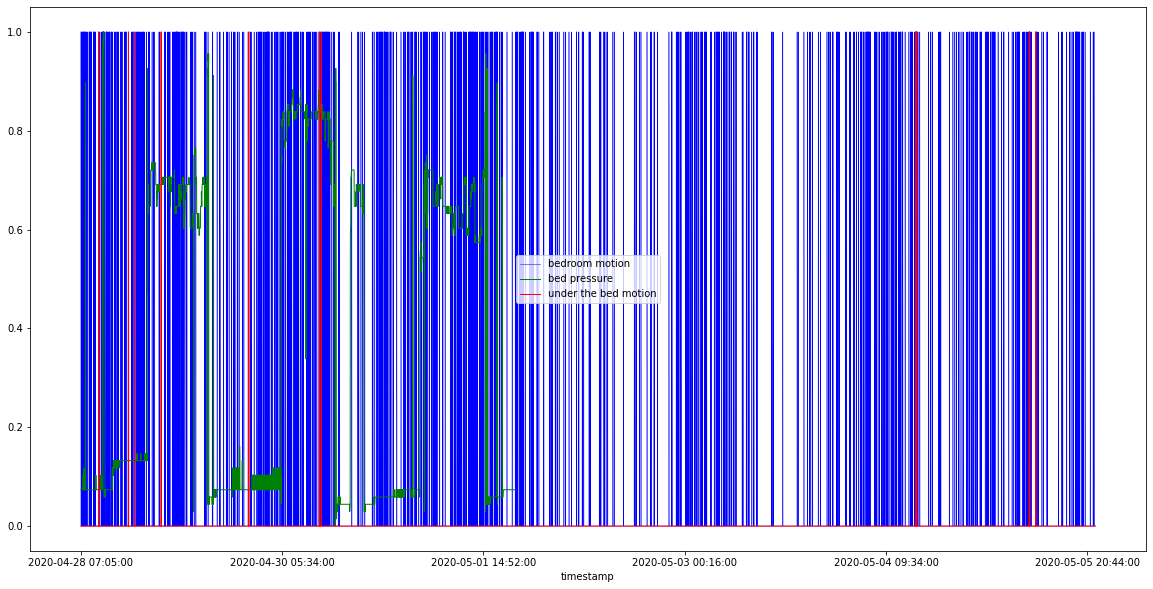

In [34]:
ax2 = df_sleep2.plot(x='timestamp', y='value', color='blue', label='bedroom motion', linewidth='0.5', figsize=(20,10))
normalize(df_3_sleep2).plot(x='timestamp', y='value', color='green', label='bed pressure', linewidth='1', ax=ax2, figsize=(20,10))
normalize(df_bis_sleep2).plot(x='timestamp', y='value', color='red', label='under the bed motion', linewidth='1', ax=ax2, figsize=(20,10))
plt.show()

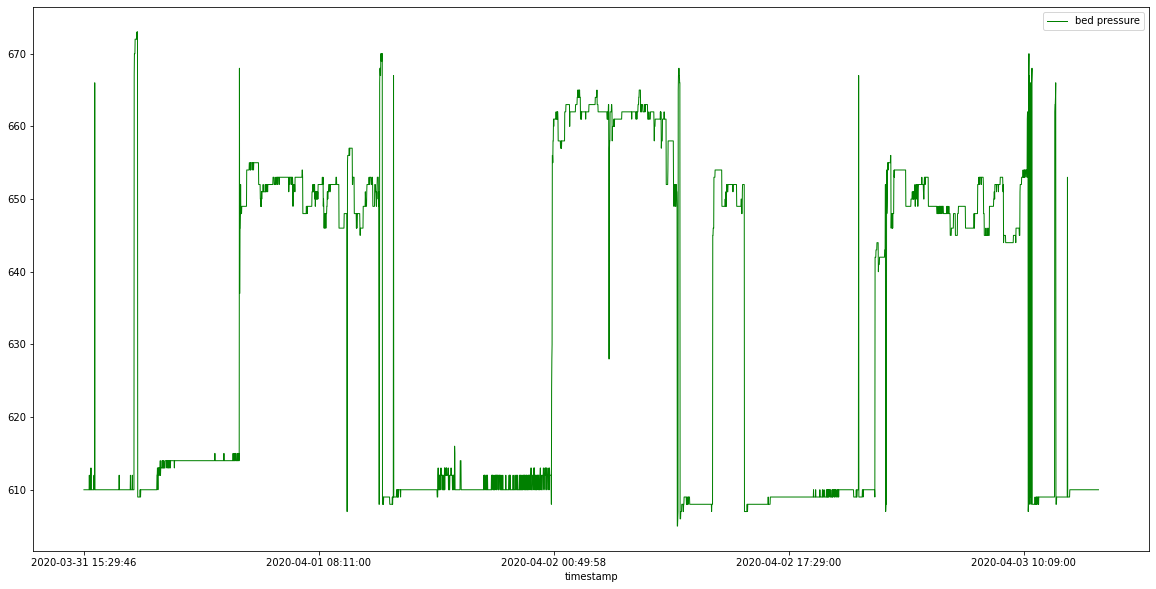

In [35]:
df_3_sleep2.plot(x='timestamp', y='value', color='green', label='bed pressure', linewidth='1', figsize=(20,10))

In [36]:
df_3_sleep

value_id  sensor_id            timestamp  value
0        18730546.0       5896  2020-02-26 00:00:00    652
1        18731641.0       5896  2020-02-26 00:01:00    652
2        18732744.0       5896  2020-02-26 00:02:00    652
3        18733820.0       5896  2020-02-26 00:02:58    652
4        18734949.0       5896  2020-02-26 00:04:00    652
...             ...        ...                  ...    ...
241882  253819066.0       5896  2020-08-26 10:27:00    568
241883  253819767.0       5896  2020-08-26 10:28:00    568
241884  253820454.0       5896  2020-08-26 10:29:00    569
241885  253821028.0       5896  2020-08-26 10:29:52    569
241886  253821355.0       5896  2020-08-26 10:30:23    569

[241887 rows x 4 columns]

In [37]:
# Des paliers différents selon les période pour déterminer l'état de l'activité ont été observés

def get_palier_lit(datestr):
  #df = df_3_sleep
  seuil=0
  if('2020-02-26 00:00:00'<=datestr<='2020-05-01 00:00:00'):
    seuil = 630
  if('2020-05-01 00:00:00'<=datestr<='2020-06-24 00:00:00'):
    seuil = 600
  if('2020-06-24 00:00:00'<=datestr):
    seuil = 580

  return seuil

In [38]:
df_3_sleep_3 = df_3_sleep[(df_3_sleep['timestamp']>= '2020-07-28') & (df_3_sleep['timestamp']<= '2020-08-06')]
df_3_sleep_3

value_id  sensor_id            timestamp  value
201504  222891871.0       5896  2020-07-28 00:01:00    592
201505  222892525.0       5896  2020-07-28 00:01:59    592
201506  222893226.0       5896  2020-07-28 00:03:00    592
201507  222893883.0       5896  2020-07-28 00:04:00    594
201508  222894571.0       5896  2020-07-28 00:05:00    593
...             ...        ...                  ...    ...
214231  232027461.0       5896  2020-08-05 20:10:59    561
214232  232028217.0       5896  2020-08-05 20:12:00    561
214233  232028972.0       5896  2020-08-05 20:12:59    561
214234  232029736.0       5896  2020-08-05 20:14:00    561
214235  232029848.0       5896  2020-08-05 20:14:09    561

[12732 rows x 4 columns]

In [39]:
timedelta_diff2 = timedelta(days=10)
date_stamp = datetime.strptime(df_3_sleep['timestamp'][3000], '%Y-%m-%d %H:%M:%S')
date2 = date_stamp + timedelta_diff2
df_3_sleep[(df_3_sleep['timestamp']>=str(date_stamp)) & (df_3_sleep['timestamp']<=str(date2))]

value_id  sensor_id            timestamp  value
3000   21873232.0       5896  2020-02-28 01:59:59    666
3001   21874431.0       5896  2020-02-28 02:01:00    666
3002   21875606.0       5896  2020-02-28 02:02:00    666
3003   21876772.0       5896  2020-02-28 02:03:00    666
3004   21877942.0       5896  2020-02-28 02:04:00    667
...           ...        ...                  ...    ...
17380  36915628.0       5896  2020-03-09 01:56:00    644
17381  36916754.0       5896  2020-03-09 01:57:00    644
17382  36917872.0       5896  2020-03-09 01:58:00    644
17383  36918975.0       5896  2020-03-09 01:59:00    644
17384  36920074.0       5896  2020-03-09 01:59:59    644

[14385 rows x 4 columns]

In [40]:
df_3_sleep.shape[0]

241887

In [41]:
def get_bed_pressure(df):
    presence_bed = []
    #df = df_3_sleep
    n = df.shape[0]
    for i in range (n) :
      seuil= get_palier_lit(df['timestamp'][i])
      if (df['value'][i] > seuil) :
        #print(i)
        #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
        #and (df['timestamp'][i] < '2020-06-01 23:59:00') 
        presence_bed.append(df['timestamp'][i])
    return presence_bed

In [42]:
get_bed_pressure(df_3_sleep)[0:50]

['2020-02-26 00:00:00',
 '2020-02-26 00:01:00',
 '2020-02-26 00:02:00',
 '2020-02-26 00:02:58',
 '2020-02-26 00:04:00',
 '2020-02-26 00:05:00',
 '2020-02-26 00:06:00',
 '2020-02-26 00:07:00',
 '2020-02-26 00:08:00',
 '2020-02-26 00:09:00',
 '2020-02-26 00:10:00',
 '2020-02-26 00:10:59',
 '2020-02-26 00:12:00',
 '2020-02-26 00:13:00',
 '2020-02-26 00:14:00',
 '2020-02-26 00:15:00',
 '2020-02-26 00:16:00',
 '2020-02-26 00:17:00',
 '2020-02-26 00:18:00',
 '2020-02-26 00:18:59',
 '2020-02-26 00:19:59',
 '2020-02-26 00:20:59',
 '2020-02-26 00:22:00',
 '2020-02-26 00:23:00',
 '2020-02-26 00:24:00',
 '2020-02-26 00:25:00',
 '2020-02-26 00:26:00',
 '2020-02-26 00:27:00',
 '2020-02-26 00:28:00',
 '2020-02-26 00:28:58',
 '2020-02-26 00:30:00',
 '2020-02-26 00:31:00',
 '2020-02-26 00:32:00',
 '2020-02-26 00:33:00',
 '2020-02-26 00:34:00',
 '2020-02-26 00:35:00',
 '2020-02-26 00:36:00',
 '2020-02-26 00:37:00',
 '2020-02-26 00:37:59',
 '2020-02-26 00:38:59',
 '2020-02-26 00:40:00',
 '2020-02-26 00:

In [43]:
def get_plage_1(dfa):
    bed_pressure = get_bed_pressure(dfa)
    #dfa = df_3_sleep
    n = len(bed_pressure)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    delta_sec = timedelta(seconds=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(bed_pressure[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(bed_pressure[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute) :
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date2.month == 3) :
                                    intermediate.append(date1)
                                else :
                                    if(len(intermediate)!=0):
                                        debut.append(str(intermediate[0]))
                                        fin.append(str(date1))
                                        duree.append(str(date1-intermediate[0]))
                                        intermediate=[]
                                    else:
                                        debut.append(str(date1))
                                        fin.append(str(date1+delta_sec))
                                        duree.append(str(delta_sec))
                            if (date1.day == 30) and (date2.month == date1.month +1):
                                intermediate.append(date1)
                            if (date1.day == 31) and (date2.month == date1.month + 1) :
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    intermediate=[]
                                else:
                                    debut.append(str(date1))
                                    fin.append(str(date1+delta_sec))
                                    duree.append(str(delta_sec))
                    else :
                      if(len(intermediate)!=0):
                        debut.append(str(intermediate[0]))
                        fin.append(str(date1))
                        duree.append(str(date1-intermediate[0]))
                        intermediate=[]
                      else:
                        debut.append(str(date1))
                        fin.append(str(date1+delta_sec))
                        duree.append(str(delta_sec))
                else :
                  if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                  else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
                            
    plages=[debut,fin,duree]
    return plages

In [44]:
date1 = datetime.strptime('2020-02-29 23:57:00', '%Y-%m-%d %H:%M:%S')
date2 = datetime.strptime('2020-03-01 00:07:00', '%Y-%m-%d %H:%M:%S')
print(date2.hour)
print((date1 + timedelta(hours=1)).hour)
print(date1)
print(date2)
print((date1 + timedelta(hours=1)).hour)
date2.hour == (date1 + timedelta(hours=1)).hour


0
0
2020-02-29 23:57:00
2020-03-01 00:07:00
0


True

In [45]:
get_plage_1(df_3_sleep)

[['2020-02-26 00:00:00',
  '2020-02-26 00:02:58',
  '2020-02-26 00:04:00',
  '2020-02-26 00:10:59',
  '2020-02-26 00:12:00',
  '2020-02-26 00:18:59',
  '2020-02-26 00:22:00',
  '2020-02-26 00:28:58',
  '2020-02-26 00:30:00',
  '2020-02-26 00:37:59',
  '2020-02-26 00:40:00',
  '2020-02-26 00:48:59',
  '2020-02-26 00:50:00',
  '2020-02-26 00:50:59',
  '2020-02-26 00:53:00',
  '2020-02-26 00:54:58',
  '2020-02-26 00:56:00',
  '2020-02-26 00:56:59',
  '2020-02-26 00:58:00',
  '2020-02-26 01:02:59',
  '2020-02-26 01:04:00',
  '2020-02-26 01:05:58',
  '2020-02-26 01:07:00',
  '2020-02-26 01:08:59',
  '2020-02-26 01:10:00',
  '2020-02-26 01:12:59',
  '2020-02-26 01:14:00',
  '2020-02-26 01:21:57',
  '2020-02-26 01:23:00',
  '2020-02-26 01:26:59',
  '2020-02-26 01:28:00',
  '2020-02-26 01:33:59',
  '2020-02-26 01:35:00',
  '2020-02-26 01:39:58',
  '2020-02-26 01:41:00',
  '2020-02-26 01:47:59',
  '2020-02-26 01:49:00',
  '2020-02-26 01:49:59',
  '2020-02-26 01:51:00',
  '2020-02-26 01:51:59',


In [46]:
plages_sleep = pd.DataFrame(columns=['début','fin','durée'])

In [47]:
plages_sleep['début'] = get_plage_1(df_3_sleep)[0]
plages_sleep['fin'] = get_plage_1(df_3_sleep)[1]
plages_sleep['durée'] = get_plage_1(df_3_sleep)[2]

In [48]:
plages_sleep

début                  fin    durée
0      2020-02-26 00:00:00  2020-02-26 00:02:00  0:02:00
1      2020-02-26 00:02:58  2020-02-26 00:02:59  0:00:01
2      2020-02-26 00:04:00  2020-02-26 00:10:00  0:06:00
3      2020-02-26 00:10:59  2020-02-26 00:11:00  0:00:01
4      2020-02-26 00:12:00  2020-02-26 00:18:00  0:06:00
...                    ...                  ...      ...
39376  2020-08-26 10:01:00  2020-08-26 10:05:54  0:04:54
39377  2020-08-26 10:07:00  2020-08-26 10:08:00  0:01:00
39378  2020-08-26 10:08:59  2020-08-26 10:09:00  0:00:01
39379  2020-08-26 10:10:00  2020-08-26 10:10:01  0:00:01
39380  2020-08-26 10:10:59  2020-08-26 10:11:00  0:00:01

[39381 rows x 3 columns]

In [49]:
plages_sleep[plages_sleep['durée']>= str(timedelta(days=1))]
#print(timedelta(days=1))

début                  fin    durée
6446   2020-03-26 08:09:02  2020-03-26 09:11:00  1:01:58
6480   2020-03-26 10:39:00  2020-03-26 11:49:59  1:10:59
19772  2020-06-03 21:20:00  2020-06-03 22:24:00  1:04:00

In [50]:
new_plages_sleep_df = pd.DataFrame(columns=['début','fin','durée'])

In [51]:
#retablir_plages_sleep(10)

In [52]:
new_plages_sleep_df['début'] = retablir_plages(plages_sleep,10)[0]
new_plages_sleep_df['fin'] = retablir_plages(plages_sleep,10)[1]
new_plages_sleep_df['durée'] = retablir_plages(plages_sleep,10)[2]

In [53]:
new_plages_sleep_df

début                  fin     durée
0    2020-02-26 00:00:00  2020-02-26 10:03:00  10:03:00
1    2020-02-26 11:20:00  2020-02-26 11:20:01   0:00:01
2    2020-02-26 18:40:00  2020-02-26 19:01:00   0:21:00
3    2020-02-26 19:38:00  2020-02-27 10:52:01  15:14:01
4    2020-02-27 19:15:00  2020-02-27 19:22:01   0:07:01
..                   ...                  ...       ...
592  2020-08-24 23:52:00  2020-08-25 00:03:02   0:11:02
593  2020-08-25 00:36:00  2020-08-25 01:29:18   0:53:18
594  2020-08-25 02:02:00  2020-08-25 08:03:00   6:01:00
595  2020-08-25 08:15:59  2020-08-25 08:16:00   0:00:01
596  2020-08-25 23:30:00  2020-08-25 23:30:01   0:00:01

[597 rows x 3 columns]

In [54]:
import plotly.express as px

df = []

for i in range(new_plages_rgtv.shape[0]):
  df.append(dict(Task="Regarder la télé", Start=new_plages_rgtv['début'][i], Finish=new_plages_rgtv['fin'][i]))

for i in range(new_plages_sleep_df.shape[0]):
  df.append(dict(Task="Dormir dans le lit", Start=new_plages_sleep_df['début'][i], Finish=new_plages_sleep_df['fin'][i]))

fig = px.timeline(df, x_start='Start', x_end='Finish', y = 'Task', color='Task')
fig.show()

### Analyse graphique

Pour les plages du 2020-02-26 au 2020-03-17 :

On observe des bandes régulières concernant les plages de l'activité "dormir dans le lit" ce qui coïncide avec le premier graphe qui affiche les données brutes du capteur. Les ruptures au sein de ces bandes peuvent être comprise par le défaut de la remontée des capteurs qui n'est pas toujours exactement à la minute et qui n'est pas prise en compte dans le code (ceci pour un écart de 2 min entre les plages initiales).
En prenant un écart de 5 (ou 6) minutes, ce défaut semble disparaître. Il s'agit donc de l'écart choisi pour la réunion des plages initiales.

Sur toute l'année :

## Analyse de la fréquence et des fuseau horaire du couché et du lever

Choix :
- Dans le but de déterminer des dates globales du coucher et du lever, et non de statuer sur des éventuellement mouvement tels que "l'habitant se réveille pendant la nuit", l'écart des plages initiales choisi est de 7 minutes. On observe toujours des ruptures mais celles-ci sont moindres.

On ajoute une colonne "créneau_début" donner un indice du créneau dans lequel l'horaire se trouve sachant qu'on découpe la journée toutes les 30 minutes ce qui représente 48 créneaux possibles et on suit les règles suivantes :

Soit la date x:y:00
  - si y < 15, cela correspond au créneau x:00:00
  - si 15 <= y <= 45, cela correspond au créneau x:30:00
  - si y > 45, cela correspond au créneau x+1:00:00

On réalise la même chose avec une colonne "créneau_fin" pour les dates de fin de plages.
On construit les histogramme correspondant affichant la fréquence des créneaux qui rassemble les dates de début et les dates de fin

Ainsi, nous créons une listes de 48 éléments, indicés de 0 à 47 dont le premier élément correspond à 15:00:00, le deuxième à 15:30:00, et ainsi de suite, jusqu'au 48ème élément 14:30:00.


In [55]:
# On supprime les plages inférieures à 1 minute

#df_copy = new_plages_sleep_df.copy()

for i in range(new_plages_sleep_df.shape[0]):
  duree = datetime.strptime(new_plages_sleep_df['durée'][i], "%H:%M:%S")
  if (duree.minute<=1) | ((duree.minute==0) & (duree.second<=59)):
    new_plages_sleep_df.drop(i, 0, inplace=True)
new_plages_sleep_df.reset_index(inplace=True, drop=True)
new_plages_sleep_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin     durée
0    2020-02-26 00:00:00  2020-02-26 10:03:00  10:03:00
1    2020-02-26 18:40:00  2020-02-26 19:01:00   0:21:00
2    2020-02-26 19:38:00  2020-02-27 10:52:01  15:14:01
3    2020-02-27 19:15:00  2020-02-27 19:22:01   0:07:01
4    2020-02-27 22:53:00  2020-02-28 10:04:57  11:11:57
..                   ...                  ...       ...
466  2020-08-22 21:58:58  2020-08-22 22:13:58   0:15:00
467  2020-08-23 01:13:00  2020-08-23 10:11:01   8:58:01
468  2020-08-23 23:47:00  2020-08-24 07:22:00   7:35:00
469  2020-08-24 23:52:00  2020-08-25 00:03:02   0:11:02
470  2020-08-25 00:36:00  2020-08-25 01:29:18   0:53:18

[471 rows x 3 columns]

In [56]:
# Renvoie les fréquences d'utilisation de l'appareil selon la date de début ou de fin de la plage selon un créneau à intervalle de 15 min de part et d'autre
# L'échelle commence à 15:00 en abscisse 0, et fait 24h.

def creneau_dates(dfa,debutoufin):
  creneau=[0]*48
  n = dfa.shape[0]
  #print(new_plages_sleep_df)
  
  for i in range(n):
    date = datetime.strptime(dfa[debutoufin][i], "%Y-%m-%d %H:%M:%S")
    if(15 <= date.hour <=23):
      k = (date.hour-15)*2
      if(date.minute < 15):
        creneau[k] +=1
      if(15 <= date.minute <=45):
        creneau[k+1] +=1
      if(date.minute>45):
        creneau[k+2] +=1

    if(0 <= date.hour <=14):
      k =(date.hour+9)*2
      if(date.minute < 15):
        creneau[k] +=1
      if(15 <= date.minute <=45):
        creneau[k+1] +=1
      if(date.minute>45):
        if(date.hour == 14) :
          creneau[0] =+1
        else :
          creneau[k+2] +=1
    
  return np.array(creneau)

In [57]:
creneau_dates(new_plages_sleep_df,'début')

array([ 3, 10,  9, 13, 12, 12, 14, 12,  9,  8, 17, 12, 10, 20, 23, 26, 24,
       26, 23, 20, 19, 16,  7,  7,  5,  3,  0,  0,  0,  1,  0,  4,  4,  5,
        2,  0,  1,  2,  3,  3,  5, 12,  9,  9,  9,  8, 13, 11])

In [58]:
creneau_dates(new_plages_sleep_df,'fin')

array([ 1, 11, 12, 14,  7, 12, 19, 13, 10, 10, 12, 14, 14,  9, 11,  7, 10,
       12,  9,  4,  4,  1,  3,  1,  4,  1,  1,  1,  1,  1,  0,  1,  8, 11,
        6,  3,  6,  8, 19, 21, 32, 31, 28, 18, 12, 11,  7, 10])

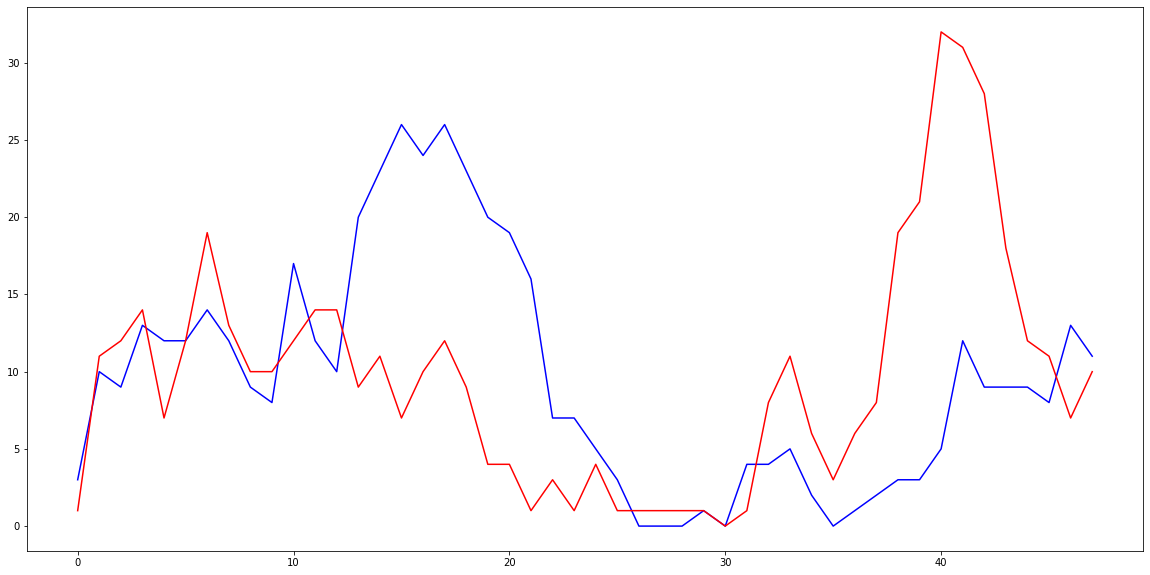

In [59]:
plt.figure(figsize=(20,10))
plt.plot(creneau_dates(new_plages_sleep_df,'début'), color='blue')
plt.plot(creneau_dates(new_plages_sleep_df,'fin'), color='red')
plt.show()

### Analyse du graphe

Sur la plage de dates : 2020-02-26 à 2020-03-17.

On observe en bleu la fréquence du coucher et en rouge la fréquence du lever. On remarque que la plage de fréquence du coucher et plus élargie que celle du lever avec les pics distinctifs suivants :
- Un pic distinctif du lever à l'indice à 39 ce qui correspond à 10:30:00, l'indice 38, ce qui correspond à 10:00:00 et l'indice 40, ce qui correspond à 11:00:00.
- Pour le lever, d'autres pics peuvent être observer aux indices 9 à 11 par exemple ce qui correspond à la tranche horaire de 19:30:00 à 20:30:00. Ces pics peuvent être associés à d'autres activités que le lever pour le début de la journée, mais peuvent correspondre aux situation suivantes : activités qui précèdent le coucher ; réveille d'une sieste effectuée en début de soirée, par exemple.
- Pour le coucher, les fréquences pour une tranches horaires sont moins distinctes et étalées. On observe le plus haut pic pour l'indice 9 qui correspond à 19:30:00, puis 10 pour 20:00:00
- Ensuite, de manière moins importante, pour les indices 7 (18:30:00), 11 (20:30:00), 13 (21:30:00), 15 à 17 (22:30:00 à 23:30:30).

Pour rappel, 53 plages concernant l'activité "dormir dans le lit" ont été identifiées avec un nettoyage des données supprimant les plages inférieures à 1 minute et réunissant les plages dont l'écart est inférieur ou égal à 7 minutes. On peut statuer les pourcentages suivants sur les probabilités des activités suivantes :
- L'habitant se lève aux alentours de la plage 10:00:00-11:00:00 à 15 minutes d'intervalle : 30,2%
- L'habitant va se coucher aux alentours de la plage 19:30:00-20:30:00 à 15 minutes d'intervalle : 22,6%
On observera que pour une tranche horaire de 1 heure à 15 minutes d'intervalle, il est plus difficile d'affirmer l'heure du coucher que du lever qui est moins régulier.
- L'habitant va se coucher aux alentours de la plage 22:30:00-23:30:00 à 15 minutes d'intervalle : 17%
Ainsi, on attend un pourcentage similaire de 30% (17% + 22,6%) au lever, pour le coucher mais pour 2 plages séparées.

On peut alors supposer qu'il y a d'autres activités en amont du coucher qui sont corrélées ou non à cette activité

Sur la plage de dates : du 2020-02-26 à la fin des données (2020-08).

On observe le pattern des fréquences similaires. Les fréquences les plus importantes relevées sont les suivantes :
- Un pic distinctif du leverà l'indice 41 ce qui correspond à 11:30:00, à l'indice 40 ce qui correspond à 11:00:00
- Pour le lever, des pics moins importants sont présents aux indices 38 (10:00:00), 42 (12:00:00), 39 (10:30:00)
- Pour le coucher, on observe que les fréquences sont plus étalées. On observe le plus haut pic à l'indice 16 ce qui correspond à 23:00:00, puis à l'indice 17 ce qui correspond à 23:30:00, et l'indice 15 ce qui correspond à 22:30:00.
- Les pics moins importants mais non négligeables concernant le coucher sont les suivants : à l'indice 19 (00:30:00).

Sur cette durée, 588 plages ont été identifiées avec un nettoyage des données supprimant les plages inférieures à 1 minute et réunissant les plages dont l'écart est inférieur ou égal à 7 minutes. On peut statuer les pourcentages suivants sur les probabilités des activités suivantes :
- L'habitant se lève aux alentours de la plage 11:00:00-11:30:00  à 15 minutes d'intervalles : 13%
- L'habitant se lève aux alentours de la plage 10:00:00-12:00:00 à 15 minutes d'intervalles : 26%
- L'habitant va se coucher aux alentours de la plage 22:30:00-23:30:00 à 15 minutes d'intervalles : 15,5%
- L'habitant va se coucher aux alentours de la plage 22:30:00-00:30:00 à 15 minutes d'intervalles : 24%

Tout comme sur la première étude, on peut fortement supposer qu'il y a d'autres activités en amont du coucher qui sont corrélées ou non à cette activité "dormir sur le lit"

## Analyse de fréquence de l'activité : "regarder la télé"

On applique la même démarche que pour l'activité précédente ("dormir dans le lit")

In [60]:
# On supprime les plages inférieures à 1 minute

#df_copy = new_plages_sleep_df.copy()

for i in range(new_plages_rgtv.shape[0]):
  duree = datetime.strptime(new_plages_rgtv['durée'][i], "%H:%M:%S")
  if (duree.minute<=1) | ((duree.minute==0) & (duree.second<=59)):
    new_plages_rgtv.drop(i, 0, inplace=True)
new_plages_rgtv.reset_index(inplace=True, drop=True)
new_plages_rgtv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin    durée
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00
1   2020-02-27 17:58:00  2020-02-27 18:09:00  0:11:00
2   2020-02-27 18:26:00  2020-02-27 18:36:00  0:10:00
3   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00
4   2020-02-27 20:33:00  2020-02-27 20:39:00  0:06:00
..                  ...                  ...      ...
70  2020-07-05 15:07:00  2020-07-05 16:12:00  1:05:00
71  2020-07-05 16:52:00  2020-07-05 17:11:00  0:19:00
72  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00
73  2020-07-05 23:43:00  2020-07-05 23:52:00  0:09:00
74  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01

[75 rows x 3 columns]

In [61]:
creneau_dates(new_plages_rgtv,'début')

array([2, 2, 2, 2, 4, 3, 2, 5, 4, 2, 0, 2, 5, 4, 4, 3, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 2, 4,
       3, 2, 1, 4])

In [62]:
creneau_dates(new_plages_rgtv,'fin')

array([1, 1, 3, 1, 4, 3, 1, 3, 5, 2, 3, 3, 3, 1, 2, 2, 4, 4, 1, 6, 3, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 3,
       0, 4, 3, 0])

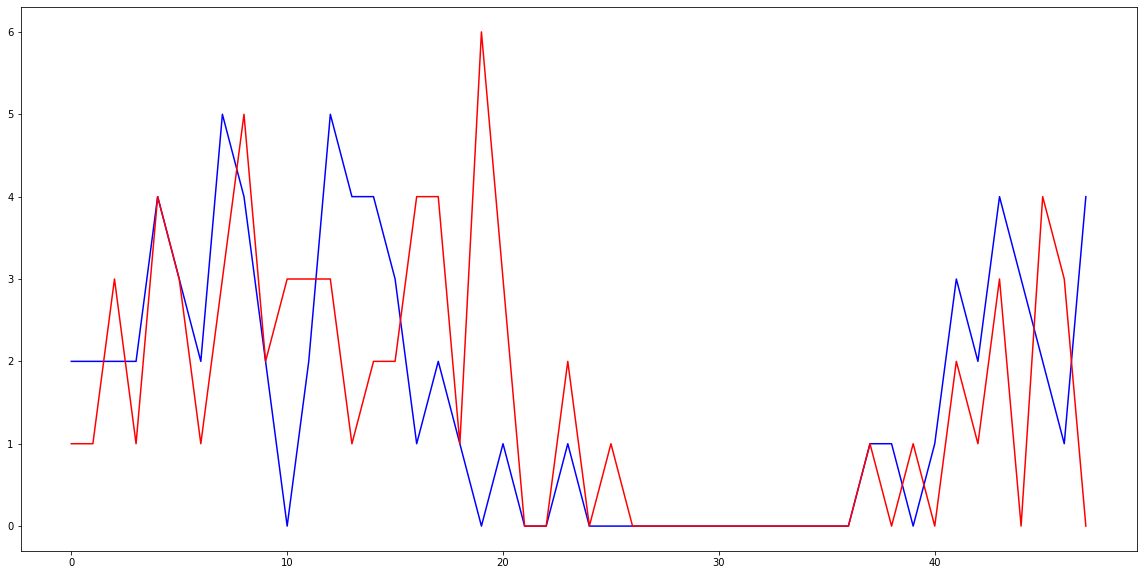

In [63]:
plt.figure(figsize=(20,10))
plt.plot(creneau_dates(new_plages_rgtv,'début'), color='blue')
plt.plot(creneau_dates(new_plages_rgtv,'fin'), color='red')
plt.show()

### Analyse du graphe

Sur la plage de date : 2020-02-26 à 2020-03-17.

On observe en bleu la fréquence du début de l'activité "regarder la télé" et en rouge la fin de la dite activité.
On remarque que l'activité de début ou de fin se tient dans la deuxième partie de la journée. Le début de l'activité est généralement en début de soirée, idem pour la fin de l'activité (un peu plus tard).

Sur la plage de date : 2020-02-26 à 2020-07-06.
On remarque que l'activité de début ou de fin se tient dans la deuxième partie de la journée. Le début de l'activité est généralement en début de soirée, idem pour la fin de l'activité (un peu plus tard).

Ce qu'on remarque surtout, ce sont des périodes de non-activité, c'est-à-dire que l'activité n'est jamais lancé ou finie sur cette période :
- Fréquence nulle de l'indice 24 à 36 soit de 03:00:00-09:00:00, ce qui ne parait pas incohérent puisqu'il s'agit de la nuit.
- Cette plage peut s'allonger avec les indices 22 à 34 dont la fréquence est nulle ou faible (unitaire), c'est-à-dire à partir de 02:00 du matin, ce qui n'est pas incohérent ; mais aussi avec la plage des indices 35 à 39 soit 8:30:00-10:30:00 où idem la fréquence est nulle ou faible (unitaire).

Cela ne confirme pas si la télé était allumée ou non, mais on observe parmi les fréquences de début ou fin de l'activité "regarder la télé" que celle-ci n'est pas exercée dans la matinée, mais dans l'après-midi, et plutôt dans la soirée.

## Autres études sur ces activités

Voici la liste des choses qui peuvent être intéressantes d'étudier sur ces activités.

Pour les activités prises chacunes à partie :
- Etude de la durée des activités
- Etude du moment de la journée de l'activité (sur la durée) par rapport au jour de la semaine.

Pour les activités prises conjointement :
- Etude d'une corrélation entre les activités, c'est-à-dire d'un scénario

### Etude de la durée des activités

On cherche à étudier la durée des activités étudiées précédemment pour éventuellement dégager des moyennes suivant l'activité ou le moment de la journée pendant lequel l'activité est exercée. Eventuellement, on peut étendre cette étude selon le jour de la semaine.

Pour raison de simplification, on va s'intéresser uniquement pour les plages pour lesquelles les durées sont plus de 20 min pour l'activité "regarder la télé" ; et plus de 2 heures pour l'activité "dormir dans le lit" (pour celle-ci, il s'agit d'observer la durée du sommeil). On augmente l'écart de rassemblement des plages initiales pour l'activité "dormir sur le lit" puisqu'on souhaite se concentrer sur l'étude du sommeil la nuit, on néglige donc les activités qui peuvent intervenir dans celle-ci comme "se lever pour aller à la salle de bain".

In [64]:
new_plages_rgtv

début                  fin    durée
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00
1   2020-02-27 17:58:00  2020-02-27 18:09:00  0:11:00
2   2020-02-27 18:26:00  2020-02-27 18:36:00  0:10:00
3   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00
4   2020-02-27 20:33:00  2020-02-27 20:39:00  0:06:00
..                  ...                  ...      ...
70  2020-07-05 15:07:00  2020-07-05 16:12:00  1:05:00
71  2020-07-05 16:52:00  2020-07-05 17:11:00  0:19:00
72  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00
73  2020-07-05 23:43:00  2020-07-05 23:52:00  0:09:00
74  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01

[75 rows x 3 columns]

In [65]:
new_plages_rgtv_copy = new_plages_rgtv.copy()

for i in range(new_plages_rgtv_copy.shape[0]):
  duree = datetime.strptime(new_plages_rgtv_copy['durée'][i], "%H:%M:%S")
  if (duree.minute<=20):
    new_plages_rgtv_copy.drop(i, 0, inplace=True)
new_plages_rgtv_copy.reset_index(inplace=True, drop=True)
new_plages_rgtv_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin    durée
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00
1   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00
2   2020-02-28 11:40:00  2020-02-28 13:30:00  1:50:00
3   2020-02-28 16:13:00  2020-02-28 23:37:00  7:24:00
4   2020-03-21 18:39:00  2020-03-21 19:09:01  0:30:01
5   2020-03-22 17:39:00  2020-03-22 18:17:00  0:38:00
6   2020-03-22 18:28:00  2020-03-22 18:54:00  0:26:00
7   2020-03-29 21:52:00  2020-03-29 23:33:01  1:41:01
8   2020-03-30 22:13:00  2020-03-31 00:53:00  2:40:00
9   2020-04-01 22:08:00  2020-04-02 00:35:00  2:27:00
10  2020-04-02 14:30:00  2020-04-02 16:10:00  1:40:00
11  2020-04-02 16:29:00  2020-04-02 16:51:00  0:22:00
12  2020-04-02 17:11:00  2020-04-02 22:03:00  4:52:00
13  2020-04-02 22:33:00  2020-04-02 23:32:00  0:59:00
14  2020-04-03 16:13:00  2020-04-03 19:11:00  2:58:00
15  2020-04-03 19:26:00  2020-04-03 20:00:01  0:34:01
16  2020-04-03 20:46:00  2020-04-03 21:26:00  0:40:00
17  2020-04-04 15:33:00  2020-04-04 20:01:01  4:28:01
18  2020-04-07 22:27:00  2020-04-08 01:06:00  2:39:00
19  2020-04-10 12:05:00  2020-04-10 12:27:00  0:22:00
20  2020-04-10 12:58:00  2020-04-10 16:26:00  3:28:00
21  2020-04-25 21:53:00  2020-04-25 22:49:00  0:56:00
22  2020-04-30 19:37:00  2020-04-30 20:31:00  0:54:00
23  2020-05-21 18:08:00  2020-05-21 20:50:00  2:42:00
24  2020-05-21 21:23:00  2020-05-21 23:08:00  1:45:00
25  2020-05-22 10:59:00  2020-05-22 11:33:00  0:34:00
26  2020-05-22 18:48:00  2020-05-22 19:18:00  0:30:00
27  2020-05-22 23:51:00  2020-05-23 02:20:00  2:29:00
28  2020-05-23 02:38:00  2020-05-23 03:25:00  0:47:00
29  2020-05-23 12:36:00  2020-05-23 14:04:01  1:28:01
30  2020-05-23 18:18:00  2020-05-23 20:06:00  1:48:00
31  2020-05-23 21:02:00  2020-05-24 00:42:00  3:40:00
32  2020-05-24 00:57:00  2020-05-24 02:21:00  1:24:00
33  2020-05-24 10:01:00  2020-05-24 10:25:00  0:24:00
34  2020-06-01 21:06:59  2020-06-02 01:04:00  3:57:01
35  2020-06-03 17:05:00  2020-06-03 18:58:00  1:53:00
36  2020-06-03 21:37:00  2020-06-03 22:12:00  0:35:00
37  2020-06-12 22:33:00  2020-06-13 00:16:00  1:43:00
38  2020-06-21 14:33:00  2020-06-21 15:18:00  0:45:00
39  2020-06-21 18:49:00  2020-06-21 19:17:00  0:28:00
40  2020-06-22 16:23:00  2020-06-22 17:10:00  0:47:00
41  2020-06-22 17:21:00  2020-06-23 00:43:00  7:22:00
42  2020-07-01 19:06:00  2020-07-02 00:31:00  5:25:00
43  2020-07-03 14:53:00  2020-07-03 18:16:00  3:23:00
44  2020-07-03 18:34:00  2020-07-03 23:02:00  4:28:00
45  2020-07-04 13:59:00  2020-07-04 22:38:01  8:39:01
46  2020-07-05 12:23:00  2020-07-05 14:04:00  1:41:00
47  2020-07-05 14:15:00  2020-07-05 14:46:00  0:31:00
48  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00
49  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01

In [66]:
# Renvoie la durée moyenne selon le créneau de la journée

def get_duree_moy(df,creneau):
  n = df.shape[0]
  timedelta_fifteen = timedelta(minutes=15)
  creneau_datetime = datetime.strptime(creneau, '%H:%M:%S')
  moy = timedelta(seconds=0)
  count = 0
  for i in range(n):
    creneau_plage = df['début'][i][11:19]
    if((str(creneau_datetime - timedelta_fifteen)[11:19] <= creneau_plage) and (creneau_plage <= str(creneau_datetime + timedelta_fifteen)[11:19])):
      #print('indice', i)
      duree_datetime = datetime.strptime(df['durée'][i], '%H:%M:%S')
      duree_i = timedelta(hours=duree_datetime.hour, minutes=duree_datetime.minute, seconds=duree_datetime.second)
      moy+= duree_i
      count+=1
  if(moy==timedelta(seconds=0)) and (count==0):
    return ["NaN",count]
  else :
    calc = moy//count
    if(str(calc)[1]==':'):
      return [str(calc)[0:7],count]
    else:
      return [str(calc)[0:8],count]

In [67]:
get_duree_moy(new_plages_rgtv_copy, '22:00:00')

['1:56:00', 4]

In [68]:
creneau = [timedelta(hours=0,minutes=0,seconds=0)]
for i in range(47):
  creneau.append(creneau[i]+timedelta(minutes=30))
for j in range(48):
  creneau[j] = str(creneau[j])
#print(type(creneau[i]))
creneau

['0:00:00',
 '0:30:00',
 '1:00:00',
 '1:30:00',
 '2:00:00',
 '2:30:00',
 '3:00:00',
 '3:30:00',
 '4:00:00',
 '4:30:00',
 '5:00:00',
 '5:30:00',
 '6:00:00',
 '6:30:00',
 '7:00:00',
 '7:30:00',
 '8:00:00',
 '8:30:00',
 '9:00:00',
 '9:30:00',
 '10:00:00',
 '10:30:00',
 '11:00:00',
 '11:30:00',
 '12:00:00',
 '12:30:00',
 '13:00:00',
 '13:30:00',
 '14:00:00',
 '14:30:00',
 '15:00:00',
 '15:30:00',
 '16:00:00',
 '16:30:00',
 '17:00:00',
 '17:30:00',
 '18:00:00',
 '18:30:00',
 '19:00:00',
 '19:30:00',
 '20:00:00',
 '20:30:00',
 '21:00:00',
 '21:30:00',
 '22:00:00',
 '22:30:00',
 '23:00:00',
 '23:30:00']

In [69]:
# Objectif : création d'un tableau de créneau sur 24h qui relate de l'utilisation selon la date de début des plages avec une durée d'utilisation moyenne
# et une fréquence d'utilisation sur ce créneau

df_duree_moy_rgtv = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

def put_moy_duree(df):
  n = len(creneau)
  duree=[]
  count=[]
  heure_creneau=[]
  df_duree_moy=[]
  for i in range(n):
    #print(creneau[i])
    duree_moy = get_duree_moy(df,creneau[i])[0]
    count_i = get_duree_moy(df,creneau[i])[1]
    duree.append(duree_moy)
    count.append(count_i)
    heure_creneau.append(creneau[i])
  df_duree_moy=[heure_creneau,duree,count]
  return df_duree_moy

In [70]:
put_moy_duree(new_plages_rgtv_copy)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  'NaN',
  '1:24:00',
  'NaN',
  'NaN',
  '0:47:00',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '0:24:00',
  'NaN',
  '0:34:00',
  '2:39:30',
  '0:22:00',
  '1:34:30',
  '3:28:00',
  'NaN',
  '4:35:00',
  '0:58:40',
  '3:23:00',
  '4:28:01',
  '5:11:00'

In [71]:
df_duree_moy_rgtv['créneau']=put_moy_duree(new_plages_rgtv_copy)[0]
df_duree_moy_rgtv['durée_moy']=put_moy_duree(new_plages_rgtv_copy)[1]
df_duree_moy_rgtv['fréquence']=put_moy_duree(new_plages_rgtv_copy)[2]

In [72]:
df_duree_moy_rgtv

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00       NaN          0
2    1:00:00   1:24:00          1
3    1:30:00       NaN          0
4    2:00:00       NaN          0
5    2:30:00   0:47:00          1
6    3:00:00       NaN          0
7    3:30:00       NaN          0
8    4:00:00       NaN          0
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00       NaN          0
14   7:00:00       NaN          0
15   7:30:00       NaN          0
16   8:00:00       NaN          0
17   8:30:00       NaN          0
18   9:00:00       NaN          0
19   9:30:00       NaN          0
20  10:00:00   0:24:00          1
21  10:30:00       NaN          0
22  11:00:00   0:34:00          1
23  11:30:00   2:39:30          2
24  12:00:00   0:22:00          1
25  12:30:00   1:34:30          2
26  13:00:00   3:28:00          1
27  13:30:00       NaN          0
28  14:00:00   4:35:00          2
29  14:30:00   0:58:40          3
30  15:00:00   3:23:00          1
31  15:30:00   4:28:01          1
32  16:00:00   5:11:00          2
33  16:30:00   0:34:30          2
34  17:00:00   2:33:00          3
35  17:30:00   4:00:00          2
36  18:00:00   2:42:00          1
37  18:30:00   1:48:00          4
38  19:00:00   1:42:00          4
39  19:30:00   0:44:00          2
40  20:00:00       NaN          0
41  20:30:00       NaN          0
42  21:00:00   2:45:40          3
43  21:30:00   1:03:20          3
44  22:00:00   1:56:00          4
45  22:30:00   1:47:00          3
46  23:00:00       NaN          0
47  23:30:00       NaN          0

### Analyse de la table

On observe globalement une grande inactivité de l'activité "regarder la télé" pendant la période de la nuit (de 23:00:00 à 10:30:00), hormis quelques exceptions qui ne semblent être que des événements pontuels (arrivés une seule fois).

L'activité se trouve alors plutôt dans la deuxième partie que l'on peut catégoriser en 3 parties : midi, après-midi, soirée.

Une analyse plus précise selon les jours de la semaine pourrait apporter plus d'informations.

In [73]:
day_of_week = ['Lun', 'Mar', 'Merc', 'Jeu', 'Ven', 'Sam', 'Dim']
def ajout_jour(df):
  n=df.shape[0]
  jour_list=[]
  for i in range(n):
    date = datetime.strptime(df['début'][i][0:10], '%Y-%m-%d')
    jour_list.append(day_of_week[date.weekday()])
  df.insert(df.shape[1], "jour", jour_list)
  return df

In [74]:
ajout_jour(new_plages_rgtv_copy)

début                  fin    durée  jour
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00   Jeu
1   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00   Jeu
2   2020-02-28 11:40:00  2020-02-28 13:30:00  1:50:00   Ven
3   2020-02-28 16:13:00  2020-02-28 23:37:00  7:24:00   Ven
4   2020-03-21 18:39:00  2020-03-21 19:09:01  0:30:01   Sam
5   2020-03-22 17:39:00  2020-03-22 18:17:00  0:38:00   Dim
6   2020-03-22 18:28:00  2020-03-22 18:54:00  0:26:00   Dim
7   2020-03-29 21:52:00  2020-03-29 23:33:01  1:41:01   Dim
8   2020-03-30 22:13:00  2020-03-31 00:53:00  2:40:00   Lun
9   2020-04-01 22:08:00  2020-04-02 00:35:00  2:27:00  Merc
10  2020-04-02 14:30:00  2020-04-02 16:10:00  1:40:00   Jeu
11  2020-04-02 16:29:00  2020-04-02 16:51:00  0:22:00   Jeu
12  2020-04-02 17:11:00  2020-04-02 22:03:00  4:52:00   Jeu
13  2020-04-02 22:33:00  2020-04-02 23:32:00  0:59:00   Jeu
14  2020-04-03 16:13:00  2020-04-03 19:11:00  2:58:00   Ven
15  2020-04-03 19:26:00  2020-04-03 20:00:01  0:34:01   Ven
16  2020-04-03 20:46:00  2020-04-03 21:26:00  0:40:00   Ven
17  2020-04-04 15:33:00  2020-04-04 20:01:01  4:28:01   Sam
18  2020-04-07 22:27:00  2020-04-08 01:06:00  2:39:00   Mar
19  2020-04-10 12:05:00  2020-04-10 12:27:00  0:22:00   Ven
20  2020-04-10 12:58:00  2020-04-10 16:26:00  3:28:00   Ven
21  2020-04-25 21:53:00  2020-04-25 22:49:00  0:56:00   Sam
22  2020-04-30 19:37:00  2020-04-30 20:31:00  0:54:00   Jeu
23  2020-05-21 18:08:00  2020-05-21 20:50:00  2:42:00   Jeu
24  2020-05-21 21:23:00  2020-05-21 23:08:00  1:45:00   Jeu
25  2020-05-22 10:59:00  2020-05-22 11:33:00  0:34:00   Ven
26  2020-05-22 18:48:00  2020-05-22 19:18:00  0:30:00   Ven
27  2020-05-22 23:51:00  2020-05-23 02:20:00  2:29:00   Ven
28  2020-05-23 02:38:00  2020-05-23 03:25:00  0:47:00   Sam
29  2020-05-23 12:36:00  2020-05-23 14:04:01  1:28:01   Sam
30  2020-05-23 18:18:00  2020-05-23 20:06:00  1:48:00   Sam
31  2020-05-23 21:02:00  2020-05-24 00:42:00  3:40:00   Sam
32  2020-05-24 00:57:00  2020-05-24 02:21:00  1:24:00   Dim
33  2020-05-24 10:01:00  2020-05-24 10:25:00  0:24:00   Dim
34  2020-06-01 21:06:59  2020-06-02 01:04:00  3:57:01   Lun
35  2020-06-03 17:05:00  2020-06-03 18:58:00  1:53:00  Merc
36  2020-06-03 21:37:00  2020-06-03 22:12:00  0:35:00  Merc
37  2020-06-12 22:33:00  2020-06-13 00:16:00  1:43:00   Ven
38  2020-06-21 14:33:00  2020-06-21 15:18:00  0:45:00   Dim
39  2020-06-21 18:49:00  2020-06-21 19:17:00  0:28:00   Dim
40  2020-06-22 16:23:00  2020-06-22 17:10:00  0:47:00   Lun
41  2020-06-22 17:21:00  2020-06-23 00:43:00  7:22:00   Lun
42  2020-07-01 19:06:00  2020-07-02 00:31:00  5:25:00  Merc
43  2020-07-03 14:53:00  2020-07-03 18:16:00  3:23:00   Ven
44  2020-07-03 18:34:00  2020-07-03 23:02:00  4:28:00   Ven
45  2020-07-04 13:59:00  2020-07-04 22:38:01  8:39:01   Sam
46  2020-07-05 12:23:00  2020-07-05 14:04:00  1:41:00   Dim
47  2020-07-05 14:15:00  2020-07-05 14:46:00  0:31:00   Dim
48  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00   Dim
49  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01   Lun

In [75]:
# Déterminer les habitudes selon le jour de la semaine

def get_duree_moy_jour(df,creneau,jour):
  n=df.shape[0]
  timedelta_fifteen = timedelta(minutes=15)
  creneau_datetime = datetime.strptime(creneau, '%H:%M:%S')
  moy = timedelta(seconds=0)
  count=0
    
  for i in range(n):
    day = df['jour'][i]
    if(day==jour):
      creneau_plage = df['début'][i][11:19]
      if((str(creneau_datetime - timedelta_fifteen)[11:19] <= creneau_plage) and (str(creneau_datetime + timedelta_fifteen)[11:19] >= creneau_plage)):
        duree_datetime = datetime.strptime(df['durée'][i], '%H:%M:%S')
        duree_i = timedelta(hours=duree_datetime.hour, minutes=duree_datetime.minute, seconds=duree_datetime.second)
        moy+= duree_i
        count+=1
  if (moy==timedelta(seconds=0)) and (count==0):
    return ['Nan',count]
  else:
    calc = moy//count    
    if(str(calc)[1]==':'):
      return [str(calc)[0:7],count]
    else :    
      return [str(calc)[0:8],count]

In [76]:
get_duree_moy_jour(new_plages_rgtv_copy,'22:00:00','Lun')

['2:40:00', 1]

In [77]:
df_duree_moy_jour_rgtv = pd.DataFrame(index=creneau, columns=day_of_week)

In [78]:
# Rempli un dataframe "calendrier" avec les durées moyennes et fréquence d'utilisation selon la date de début de la plage d'une activité donnée
# sur un créneau à plus ou moins 15 min d'intervalle.

def put_moy_duree_jour(dfa,dfb):
  n=dfa.shape[0] #lignes
  m=dfa.shape[1] #colonnes
  for i in range(m):
    for j in range(n):
      #dfa.iat[j,i] = get_duree_moy_jour(dfb,dfa.index[j],dfa.columns[i])[0]
      dfa.iat[j,i] = get_duree_moy_jour(dfb,dfa.index[j],dfa.columns[i])[0] + ' - ' + str(get_duree_moy_jour(dfb,dfa.index[j],dfa.columns[i])[1])
  return dfa

put_moy_duree_jour(df_duree_moy_jour_rgtv,new_plages_rgtv_copy)

Lun          Mar         Merc          Jeu          Ven  \
0:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
0:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
1:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
1:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
2:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
2:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
3:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
3:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
4:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
4:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
5:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
5:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
6:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
6:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
7:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
7:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
8:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
8:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
9:00:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
9:30:00       Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
10:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
10:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
11:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  0:34:00 - 1   
11:30:00  3:29:01 - 1      Nan - 0      Nan - 0      Nan - 0  1:50:00 - 1   
12:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  0:22:00 - 1   
12:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
13:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  3:28:00 - 1   
13:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
14:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
14:30:00      Nan - 0      Nan - 0      Nan - 0  1:40:00 - 1      Nan - 0   
15:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  3:23:00 - 1   
15:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
16:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  5:11:00 - 2   
16:30:00  0:47:00 - 1      Nan - 0      Nan - 0  0:22:00 - 1      Nan - 0   
17:00:00      Nan - 0      Nan - 0  1:53:00 - 1  2:53:00 - 2      Nan - 0   
17:30:00  7:22:00 - 1      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
18:00:00      Nan - 0      Nan - 0      Nan - 0  2:42:00 - 1      Nan - 0   
18:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0  4:28:00 - 1   
19:00:00      Nan - 0      Nan - 0  5:25:00 - 1  0:25:00 - 1  0:30:00 - 1   
19:30:00      Nan - 0      Nan - 0      Nan - 0  0:54:00 - 1  0:34:01 - 1   
20:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
20:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
21:00:00  3:57:01 - 1      Nan - 0      Nan - 0      Nan - 0  0:40:00 - 1   
21:30:00      Nan - 0      Nan - 0  0:35:00 - 1  1:45:00 - 1      Nan - 0   
22:00:00  2:40:00 - 1      Nan - 0  2:27:00 - 1      Nan - 0      Nan - 0   
22:30:00      Nan - 0  2:39:00 - 1      Nan - 0  0:59:00 - 1  1:43:00 - 1   
23:00:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   
23:30:00      Nan - 0      Nan - 0      Nan - 0      Nan - 0      Nan - 0   

                  Sam          Dim  
0:00:00       Nan - 0      Nan - 0  
0:30:00       Nan - 0      Nan - 0  
1:00:00       Nan - 0  1:24:00 - 1  
1:30:00       Nan - 0      Nan - 0  
2:00:00       Nan - 0      Nan - 0  
2:30:00   0:47:00 - 1 

### Analyse de la table

A noter pour rappel que ces résultats sont sur la base des données de 2020-02-26 à 2020-07-06.

Une chose que l'on trouve commune aux jours est l'importance de l'activité dans la période de la soirée.

On remarque aussi que les quelques données enregistrées pour un horaire plutôt nocture se passe le week-end (hormis une donnée).

On note aussi que lorsque l'activité se déroule l'après-midi, il s'agit plutôt du week-end, mais aussi du vendredi. Il y a tout de même des activités relevés des jours de semaine, mais à noter qu'il s'agit la plupart du temps d'une occurence unique sur la plage de données étudier.

De manière plus gobale, on remarque que 42 plages sont distribuées dans la calendrier, ceci à partir de 52 plages distinctes. 80% des plages du calendrier sont donc constituées à partir de plages uniques et non d'une moyenne sur plusieurs plages. Dans ces conditions, il peut être considéré présemptieux de tirer des conclusions sur des habitudes précises. Ceci est dû aux simplications réaliser plus haut, notamment la non-considération des plages inférieures à 20 minutes. Cette simplification à retirer une vingtaine de plages. Il peut être intéressant d'observer l'effet de cette non-considération de données en ajoutant ces plages à l'étude, mais ce choix a été motivé du fait qu'il y avait des plages de très faible durée qui pouvait alors fausser le calcul de la moyenne.

La conclusion la plus probante qui peut être retirer ici est l'activité importante dans la soirée de l'activité "regarder la télé". Ceci appuierait l'hypothèse faite une un scénario (activité "regarder la télé" qui précéderait l'activité "dormir dans le lit").

In [79]:
new_plages_sleep_df

début                  fin     durée
0    2020-02-26 00:00:00  2020-02-26 10:03:00  10:03:00
1    2020-02-26 18:40:00  2020-02-26 19:01:00   0:21:00
2    2020-02-26 19:38:00  2020-02-27 10:52:01  15:14:01
3    2020-02-27 19:15:00  2020-02-27 19:22:01   0:07:01
4    2020-02-27 22:53:00  2020-02-28 10:04:57  11:11:57
..                   ...                  ...       ...
466  2020-08-22 21:58:58  2020-08-22 22:13:58   0:15:00
467  2020-08-23 01:13:00  2020-08-23 10:11:01   8:58:01
468  2020-08-23 23:47:00  2020-08-24 07:22:00   7:35:00
469  2020-08-24 23:52:00  2020-08-25 00:03:02   0:11:02
470  2020-08-25 00:36:00  2020-08-25 01:29:18   0:53:18

[471 rows x 3 columns]

In [80]:
new_plages_sleep_df_copy = new_plages_sleep_df.copy()

for i in range(new_plages_sleep_df_copy.shape[0]):
  duree = datetime.strptime(new_plages_sleep_df_copy['durée'][i], "%H:%M:%S")
  if (duree.hour<=2):
    new_plages_sleep_df_copy.drop(i, 0, inplace=True)
new_plages_sleep_df_copy.reset_index(inplace=True, drop=True)
new_plages_sleep_df_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin     durée
0    2020-02-26 00:00:00  2020-02-26 10:03:00  10:03:00
1    2020-02-26 19:38:00  2020-02-27 10:52:01  15:14:01
2    2020-02-27 22:53:00  2020-02-28 10:04:57  11:11:57
3    2020-02-29 00:29:00  2020-02-29 10:59:01  10:30:01
4    2020-03-01 02:25:00  2020-03-01 11:50:01   9:25:01
..                   ...                  ...       ...
169  2020-08-17 22:44:00  2020-08-18 09:39:00  10:55:00
170  2020-08-19 23:35:00  2020-08-20 09:54:00  10:19:00
171  2020-08-21 00:54:00  2020-08-21 11:56:11  11:02:11
172  2020-08-23 01:13:00  2020-08-23 10:11:01   8:58:01
173  2020-08-23 23:47:00  2020-08-24 07:22:00   7:35:00

[174 rows x 3 columns]

In [81]:
df_duree_moy_sleep = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

In [82]:
put_moy_duree(new_plages_sleep_df_copy)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  '10:05:21',
  '10:16:45',
  '9:30:41',
  '9:21:00',
  '8:49:25',
  '8:32:48',
  '8:01:39',
  '6:52:57',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '4:07:26',
  '5:20:59',
  'NaN',
  'NaN',
  '3:17:00',
  'NaN',
  '3:29:01',
  'NaN',
  'NaN',
  '3:50:00',
  '3:47:00',
  'NaN',
  '4:07:59',
  '3:19:01',
  '3:18:01',
  '4:11

In [83]:
df_duree_moy_sleep['créneau']=put_moy_duree(new_plages_sleep_df_copy)[0]
df_duree_moy_sleep['durée_moy']=put_moy_duree(new_plages_sleep_df_copy)[1]
df_duree_moy_sleep['fréquence']=put_moy_duree(new_plages_sleep_df_copy)[2]

In [84]:
df_duree_moy_sleep

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00  10:05:21         16
2    1:00:00  10:16:45         17
3    1:30:00   9:30:41         15
4    2:00:00   9:21:00          4
5    2:30:00   8:49:25          5
6    3:00:00   8:32:48          5
7    3:30:00   8:01:39          3
8    4:00:00   6:52:57          1
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00       NaN          0
14   7:00:00       NaN          0
15   7:30:00   4:07:26          2
16   8:00:00   5:20:59          1
17   8:30:00       NaN          0
18   9:00:00       NaN          0
19   9:30:00   3:17:00          1
20  10:00:00       NaN          0
21  10:30:00   3:29:01          1
22  11:00:00       NaN          0
23  11:30:00       NaN          0
24  12:00:00   3:50:00          1
25  12:30:00   3:47:00          1
26  13:00:00       NaN          0
27  13:30:00   4:07:59          1
28  14:00:00   3:19:01          1
29  14:30:00   3:18:01          1
30  15:00:00   4:11:00          2
31  15:30:00   3:28:00          1
32  16:00:00       NaN          0
33  16:30:00       NaN          0
34  17:00:00       NaN          0
35  17:30:00       NaN          0
36  18:00:00   3:09:00          1
37  18:30:00       NaN          0
38  19:00:00       NaN          0
39  19:30:00  14:42:00          2
40  20:00:00  14:48:20          3
41  20:30:00   8:48:48          3
42  21:00:00  15:08:41          3
43  21:30:00  13:28:43         11
44  22:00:00  11:12:24         10
45  22:30:00  11:01:28         15
46  23:00:00  11:08:37         17
47  23:30:00  10:07:31         17

### Analyse de la table

On observe que l'activité se déroule principalement le soir (de 19:30:00 à 00:00:00) mais on remarque aussi étrangement que cette activité débute en plein milieu de la nuit (début entre 00:30:00 et 04:00:00). On peut expliquer ceci avec un habitant qui peut parfois se coucher très tard, ou des réveils dans le cours de la nuit.

Une analyse semainière pourra donner plus de détails pour connaître les habitudes du coucher.

In [85]:
ajout_jour(new_plages_sleep_df_copy)

début                  fin     durée  jour
0    2020-02-26 00:00:00  2020-02-26 10:03:00  10:03:00  Merc
1    2020-02-26 19:38:00  2020-02-27 10:52:01  15:14:01  Merc
2    2020-02-27 22:53:00  2020-02-28 10:04:57  11:11:57   Jeu
3    2020-02-29 00:29:00  2020-02-29 10:59:01  10:30:01   Sam
4    2020-03-01 02:25:00  2020-03-01 11:50:01   9:25:01   Dim
..                   ...                  ...       ...   ...
169  2020-08-17 22:44:00  2020-08-18 09:39:00  10:55:00   Lun
170  2020-08-19 23:35:00  2020-08-20 09:54:00  10:19:00  Merc
171  2020-08-21 00:54:00  2020-08-21 11:56:11  11:02:11   Ven
172  2020-08-23 01:13:00  2020-08-23 10:11:01   8:58:01   Dim
173  2020-08-23 23:47:00  2020-08-24 07:22:00   7:35:00   Dim

[174 rows x 4 columns]

In [86]:
df_duree_moy_jour_sleep = pd.DataFrame(index=creneau, columns=day_of_week)

In [87]:
put_moy_duree_jour(df_duree_moy_jour_sleep,new_plages_sleep_df_copy)

Lun           Mar          Merc           Jeu  \
0:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
0:30:00   11:39:00 - 1  10:37:36 - 5   8:17:01 - 1   8:31:53 - 3   
1:00:00   11:39:01 - 1  10:31:00 - 2  10:44:00 - 1  10:25:30 - 2   
1:30:00        Nan - 0       Nan - 0   9:10:41 - 3  10:09:29 - 2   
2:00:00        Nan - 0   9:23:01 - 1   8:47:00 - 1       Nan - 0   
2:30:00        Nan - 0       Nan - 0  10:08:02 - 1   6:49:01 - 1   
3:00:00    7:41:01 - 1       Nan - 0       Nan - 0       Nan - 0   
3:30:00    6:52:57 - 1       Nan - 0       Nan - 0       Nan - 0   
4:00:00    6:52:57 - 1       Nan - 0       Nan - 0       Nan - 0   
4:30:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
5:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
5:30:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
6:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
6:30:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
7:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
7:30:00    3:58:54 - 1       Nan - 0       Nan - 0   4:15:59 - 1   
8:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
8:30:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
9:00:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
9:30:00        Nan - 0       Nan - 0       Nan - 0       Nan - 0   
10:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
10:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
11:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
11:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
12:00:00       Nan - 0       Nan - 0   3:50:00 - 1       Nan - 0   
12:30:00       Nan - 0       Nan - 0       Nan - 0   3:47:00 - 1   
13:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
13:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
14:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
14:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
15:00:00       Nan - 0       Nan - 0       Nan - 0   4:57:00 - 1   
15:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
16:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
16:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
17:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
17:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
18:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
18:30:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
19:00:00       Nan - 0       Nan - 0       Nan - 0       Nan - 0   
19:30:00       Nan - 0       Nan - 0  15:14:01 - 1       Nan - 0   
20:00:00  14:21:59 - 1       Nan - 0       Nan - 0       Nan - 0   
20:30:00       Nan - 0       Nan - 0       Nan - 0  11:35:42 - 2   
21:00:00  14:15:00 - 1  16:30:03 - 1       Nan - 0       Nan - 0   
21:30:00  13:48:59 - 2  13:02:00 - 1  13:10:30 - 2  13:21:00 - 2   
22:00:00  11:27:30 - 2  13:33:01 - 1  13:22:01 - 1  11:13:00 - 2   
22:30:00  12:23:00 - 2  11:12:30 - 2  11:05:40 - 3  12:03:30 - 2   
23:00:00  12:21:00 - 2  11:57:02 - 4   7:49:00 - 1  12:05:58 - 2   
23:30:00  11:13:30 - 4  10:22:00 - 1  10:08:00 - 2   9:55:54 - 3   

                   Ven           Sam           Dim  
0:00:00        Nan - 0       Nan - 0       Nan - 0  
0:30:00   10:22:20 - 3  10:30:01 - 1  10:34:30 - 2  
1:00:00   10:35:35 - 2   9:33:09 - 5  10:23:00 - 4  
1:30:00   10:08:00 - 2   9:11:36 - 7  10:12:01 - 1  
2:00:00    9:50:01 - 1       Nan - 0   9:24:00 - 1  
2:30:00        Nan - 0       Nan - 0   9:03:21 - 3  
3:00:00        Nan - 0   9:48:40 - 3   5:37:00 - 1  
3:30:00        Nan - 0   8:36:00 - 2       Nan - 0  
4:00:00        Nan - 0       Nan - 0       Nan - 0  
4:30:00        Nan - 0       Nan - 0       Nan - 0  
5:00:00        Nan - 0       Nan - 0       Nan - 0  
5:30:00        Nan - 0       Nan - 0       Nan - 0

### Analyse de la table

On retrouve une activité importante en fin de soirée avec un coucher plutôt vers 21:30:00-22:00:00 ; mais on observe toujours, répartie dans la semaine un début d'activité important dans le milieu de la nuit. On remarque beaucoup de ces activités sont issues de plages uniques. A noter que plus de 50% des plages réparties dans le calendrier sont issues de plages uniques et non d'une moyenne de plusieurs durées. Il est encore difficile de tirer des conclusions précises. En notant quelles données sont issues de plages uniques ou de moyennes, on pourra savoir s'il s'agit de cas isolé ou d'une habitude.

En notant la fréquence d'utilisation de l'activité, on remarque que l'habitant a plutôt l'habitude de ce coucher dans les créneaux horaires de 22:30 à 23:30 ou de 00:30 à 01:30; le 01:30 étant le plus souvent atteint le samedi c'est-à-dire dans la nuit de vendredi à samedi (début du week-end. On remarque aussi un horaire tardif important encore dans la nuit de vendredi à samedi à 03:00 mais aussi dans la nuit de samedi à dimanche à 02:30.

## Corrélation des activités "regarder la télé" et "dormir dans le lit"

Suite à l'étude des plages horaires de ces activités, notamment par le graphique de ces plages, on peut envisager qu'il y a une corrélation entre ces activités, c'est-à-dire un scénario qui respecte l'hypothèse suivante : *L'habitant regarde la télé avant d'aller se coucher*

Pour vérifier cette hypothèse, il faut alors regarder selon la période de données disponibles et fiables : du 2020-02-26 au 2020-07-06.

Aussi, on adapte la réunion des plages en prenant le même écart entre celles-ci pour rassembler les plages initiales. On le fixe à 10 minutes, qui était l'écart déjà fixé pour l'activité "regarder la télé", ce qui nous fait bouger l'écart de l'activité "dormir dans le lit" qui était fixé à 7 minutes dans l'étude précédente.



In [88]:
# Vérifier la concordance entre les plages de l'activité "regarder la télé" et "dormir dans le lit"

plages_scenario_rgtv_sleep = pd.DataFrame(columns=['début_rgtv','fin_rgtv','durée_rgtv','début_sleep', 'fin_sleep', 'durée_sleep'])

def get_concordance_scenario(dfa,dfb,ecart):
  n = dfa.shape[0] # lignes dfa = new_plages_rgtv
  m = dfb.shape[0] # lignes dfb = new_plages_sleep_df
  delta = timedelta(minutes=ecart)
  debut_a =[]
  fin_a=[]
  duree_a=[]
  debut_b=[]
  fin_b=[]
  duree_b=[]
  #print(n)
  #print(m)

  for i in range(n):
    #print(i)
    datestr_a = dfa['fin'][i][0:10]
    timestr_a = dfa['fin'][i][11:19]
    for j in range(m):
      datestr_b = dfb['début'][j][0:10]
      timestr_b = dfb['début'][j][11:19]
      #print('datestr_a', datestr_a)
      #print('date_a', dfa['fin'][i])
      #print('datestr_b', datestr_b)
      #print('date_b',dfb['début'][i])
      if(datestr_a==datestr_b):
        time_a = datetime.strptime(timestr_a, '%H:%M:%S')
        time_b = datetime.strptime(timestr_b, '%H:%M:%S')
        if ((time_a <=time_b) and (time_a + delta>=time_b)):
          debut_a.append(dfa['début'][i])
          fin_a.append(dfa['fin'][i])
          duree_a.append(dfa['durée'][i])
          debut_b.append(dfb['début'][j])
          fin_b.append(dfb['fin'][j])
          duree_b.append(dfb['durée'][j])
  plages_scenario_rgtv_sleep=[debut_a,fin_a,duree_a,debut_b,fin_b,duree_b]
  return plages_scenario_rgtv_sleep

In [89]:
datestr_a = new_plages_rgtv['fin'][0][0:10]
print(datestr_a)
datestr_b = new_plages_sleep_df['début'][0][0:10]
print(datestr_b)
datestr_a==datestr_b

2020-02-27
2020-02-26


False

In [90]:
get_concordance_scenario(new_plages_sleep_df,new_plages_rgtv,10)

[['2020-03-22 09:23:00',
  '2020-03-30 21:15:00',
  '2020-04-02 12:06:59',
  '2020-04-03 19:12:00',
  '2020-04-09 23:02:00',
  '2020-07-04 23:10:00',
  '2020-07-05 14:48:00',
  '2020-07-05 16:19:00'],
 ['2020-03-22 12:40:00',
  '2020-03-30 22:11:00',
  '2020-04-02 14:21:01',
  '2020-04-03 19:25:01',
  '2020-04-10 12:01:59',
  '2020-07-05 11:52:00',
  '2020-07-05 15:03:00',
  '2020-07-05 16:50:00'],
 ['3:17:00',
  '0:56:00',
  '2:14:02',
  '0:13:01',
  '12:59:59',
  '12:42:00',
  '0:15:00',
  '0:31:00'],
 ['2020-03-22 12:43:00',
  '2020-03-30 22:13:00',
  '2020-04-02 14:30:00',
  '2020-04-03 19:26:00',
  '2020-04-10 12:05:00',
  '2020-07-05 11:57:00',
  '2020-07-05 15:07:00',
  '2020-07-05 16:52:00'],
 ['2020-03-22 12:45:00',
  '2020-03-31 00:53:00',
  '2020-04-02 16:10:00',
  '2020-04-03 20:00:01',
  '2020-04-10 12:27:00',
  '2020-07-05 12:09:00',
  '2020-07-05 16:12:00',
  '2020-07-05 17:11:00'],
 ['0:02:00',
  '2:40:00',
  '1:40:00',
  '0:34:01',
  '0:22:00',
  '0:12:00',
  '1:05:00'

In [91]:
plages_scenario_rgtv_sleep['début_rgtv'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[0]
plages_scenario_rgtv_sleep['fin_rgtv'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[1]
plages_scenario_rgtv_sleep['durée_rgtv'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[2]
plages_scenario_rgtv_sleep['début_sleep'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[3]
plages_scenario_rgtv_sleep['fin_sleep'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[4]
plages_scenario_rgtv_sleep['durée_sleep'] = get_concordance_scenario(new_plages_rgtv,new_plages_sleep_df,20)[5]

In [92]:
plages_scenario_rgtv_sleep

début_rgtv             fin_rgtv durée_rgtv          début_sleep  \
0   2020-02-27 18:47:00  2020-02-27 19:12:00    0:25:00  2020-02-27 19:15:00   
1   2020-02-27 21:38:00  2020-02-27 22:49:00    1:11:00  2020-02-27 22:53:00   
2   2020-03-29 21:52:00  2020-03-29 23:33:01    1:41:01  2020-03-29 23:36:00   
3   2020-04-01 22:08:00  2020-04-02 00:35:00    2:27:00  2020-04-02 00:44:00   
4   2020-04-02 22:33:00  2020-04-02 23:32:00    0:59:00  2020-04-02 23:37:00   
5   2020-04-03 16:13:00  2020-04-03 19:11:00    2:58:00  2020-04-03 19:12:00   
6   2020-04-03 20:46:00  2020-04-03 21:26:00    0:40:00  2020-04-03 21:27:00   
7   2020-04-04 20:59:00  2020-04-04 21:08:00    0:09:00  2020-04-04 21:23:00   
8   2020-04-07 22:27:00  2020-04-08 01:06:00    2:39:00  2020-04-08 01:19:00   
9   2020-04-26 20:52:00  2020-04-26 20:55:00    0:03:00  2020-04-26 20:59:00   
10  2020-05-21 21:23:00  2020-05-21 23:08:00    1:45:00  2020-05-21 23:24:00   
11  2020-05-21 23:20:00  2020-05-21 23:22:00    0:02:00  2020-05-21 23:24:00   
12  2020-05-22 10:59:00  2020-05-22 11:33:00    0:34:00  2020-05-22 11:37:53   
13  2020-05-23 02:38:00  2020-05-23 03:25:00    0:47:00  2020-05-23 03:30:00   
14  2020-05-24 00:57:00  2020-05-24 02:21:00    1:24:00  2020-05-24 02:25:00   
15  2020-06-01 21:06:59  2020-06-02 01:04:00    3:57:01  2020-06-02 01:07:00   
16  2020-06-03 17:05:00  2020-06-03 18:58:00    1:53:00  2020-06-03 19:03:00   
17  2020-06-22 17:21:00  2020-06-23 00:43:00    7:22:00  2020-06-23 00:49:00   
18  2020-07-01 19:06:00  2020-07-02 00:31:00    5:25:00  2020-07-02 00:41:58   
19  2020-07-04 13:59:00  2020-07-04 22:38:01    8:39:01  2020-07-04 22:42:00   
20  2020-07-05 14:15:00  2020-07-05 14:46:00    0:31:00  2020-07-05 14:48:00   
21  2020-07-05 15:07:00  2020-07-05 16:12:00    1:05:00  2020-07-05 16:19:00   

              fin_sleep durée_sleep  
0   2020-02-27 19:22:01     0:07:01  
1   2020-02-28 10:04:57    11:11:57  
2   2020-03-29 23:38:00     0:02:00  
3   2020-04-02 09:47:00     9:03:00  
4   2020-04-03 10:45:00    11:08:00  
5   2020-04-03 19:25:01     0:13:01  
6   2020-04-04 12:19:00    14:52:00  
7   2020-04-05 12:17:01    14:54:01  
8   2020-04-08 10:52:58     9:33:58  
9   2020-04-27 11:40:00    14:41:00  
10  2020-05-21 23:32:00     0:08:00  
11  2020-05-21 23:32:00     0:08:00  
12  2020-05-22 12:31:00     0:53:07  
13  2020-05-23 12:10:00     8:40:00  
14  2020-05-24 02:27:59     0:02:59  
15  2020-06-02 12:41:00    11:34:00  
16  2020-06-03 19:15:00     0:12:00  
17  2020-06-23 10:17:01     9:28:01  
18  2020-07-02 07:32:39     6:50:41  
19  2020-07-04 22:49:00     0:07:00  
20  2020-07-05 15:03:00     0:15:00  
21  2020-07-05 16:50:00     0:31:00

### Conclusion

Pour rappel, il s'agit des plages à partir des données de 2020-02-26 à 2020-07-06.

Cette concordance pour le scénario a été établi pour le scénario *L'habitant regarder la télé puis va se coucher* pour un écart considéré de 20 minutes entre les deux activités. On obtient 22 plages.

11 de ces plages, soit la moitié, sont significatives de ce scénario.
17 de ces plages concernent des activités qui se déroule dans la soirée (soit près de 80%).

## Etude des appareils électroménagers de la cuisine pour l'activité "faire un repas"

Utilisation des capteurs suivants :
- Détecteur de contact de la porte du frigo (6253 - D03)
- Courant de la machine à café (6632 - SMP01)
- Courant du sandwichmaker (6633 - SMP03)
- Courant du lave-vaisselle (6634 - SMP04)
- Courant de la bouilloire (6635 - SMP04)
- Courant du micro-onde (6896 - SMP06)
- Lumière de la cuisinière (5887 - L02)
- Détecteur de mouvement de la pièce cuisine (5893 - M05)


In [93]:
path1_13 = "split_sensor_int6253_1min.csv"
path2_23 = "split_sensor_float6632_1min.csv"
path3_33 = "split_sensor_float6633_1min.csv"
path4_43 = "split_sensor_float6634_1min.csv"
path5_53 = "split_sensor_float6635_1min.csv"
path6_63 = "split_sensor_float6896_1min.csv"
path7_73 = "split_sensor_int5887_1min.csv"
path8_83 = "split_sensor_int5893_1min.csv"

df_cuisine = pd.read_csv(path1_13)
df_bis_cuisine = pd.read_csv(path2_23)
df_3_cuisine = pd.read_csv(path3_33)
df_4_cuisine = pd.read_csv(path4_43)
df_5_cuisine = pd.read_csv(path5_53)
df_6_cuisine = pd.read_csv(path6_63)
df_7_cuisine = pd.read_csv(path7_73)
df_8_cuisine = pd.read_csv(path8_83)

In [94]:
nb_donnee_par_jour = 60 * 24
nb_donnee_par_sem = nb_donnee_par_jour * 7
start = nb_donnee_par_jour*101
#start=0

In [95]:
df_cuisine1 = df_cuisine[start:start + nb_donnee_par_jour]
df_cuisine2 = df_bis_cuisine[start:start + nb_donnee_par_jour]
df_cuisine3 = df_3_cuisine[start:start + nb_donnee_par_jour]
df_cuisine4 = df_4_cuisine[start:start + nb_donnee_par_jour]
df_cuisine5 = df_5_cuisine[start:start + nb_donnee_par_jour]
df_cuisine6 = df_6_cuisine[start:start + nb_donnee_par_jour]
df_cuisine7 = df_7_cuisine[start:start + nb_donnee_par_jour*2]
df_cuisine8 = df_8_cuisine[start:start + nb_donnee_par_jour]

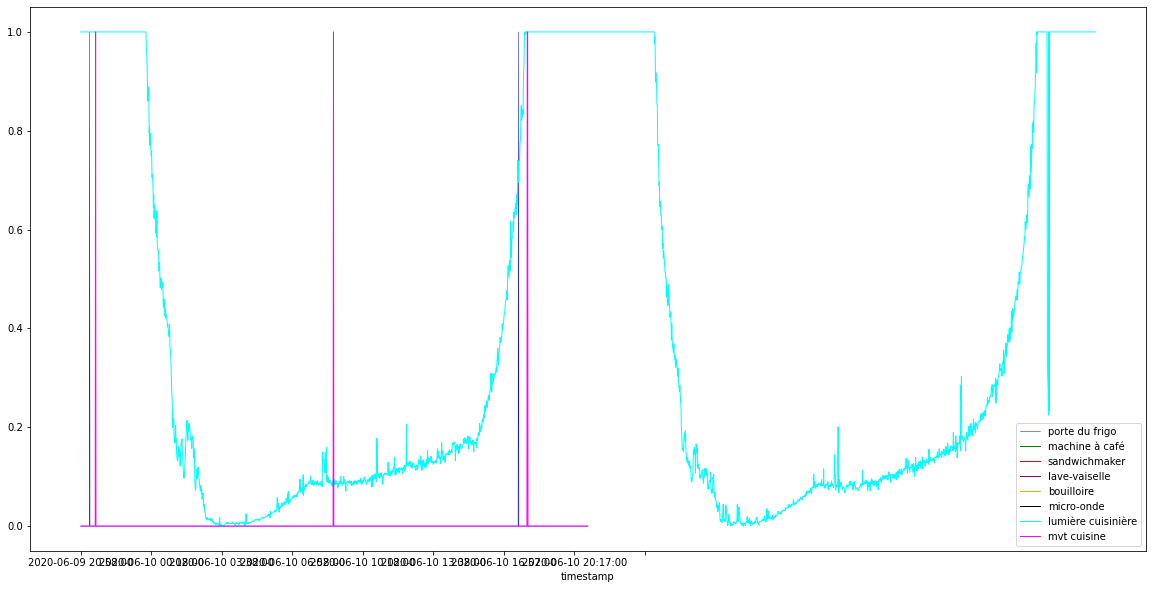

In [96]:
ax3 = df_cuisine1.plot(x='timestamp', y='value', color='blue', label='porte du frigo', linewidth='0.5', figsize=(20,10))
normalize(df_cuisine2).plot(x='timestamp', y='value', color='green', label='machine à café', linewidth='1', ax=ax3, figsize=(20,10))
normalize(df_cuisine3).plot(x='timestamp', y='value', color='red', label='sandwichmaker', linewidth='1', ax=ax3, figsize=(20,10))
normalize(df_cuisine4).plot(x='timestamp', y='value', color='purple', label='lave-vaiselle', linewidth='1', ax=ax3, figsize=(20,10))
normalize(df_cuisine5).plot(x='timestamp', y='value', color='orange', label='bouilloire', linewidth='1', ax=ax3, figsize=(20,10))
normalize(df_cuisine6).plot(x='timestamp', y='value', color='black', label='micro-onde', linewidth='1', ax=ax3, figsize=(20,10))
normalize(df_cuisine7).plot(x='timestamp', y='value', color='cyan', label='lumière cuisinière', linewidth='1', ax=ax3, figsize=(20,10))
df_cuisine8.plot(x='timestamp', y='value', color='magenta', label='mvt cuisine', linewidth='1', ax=ax3, figsize=(20,10))
plt.show()

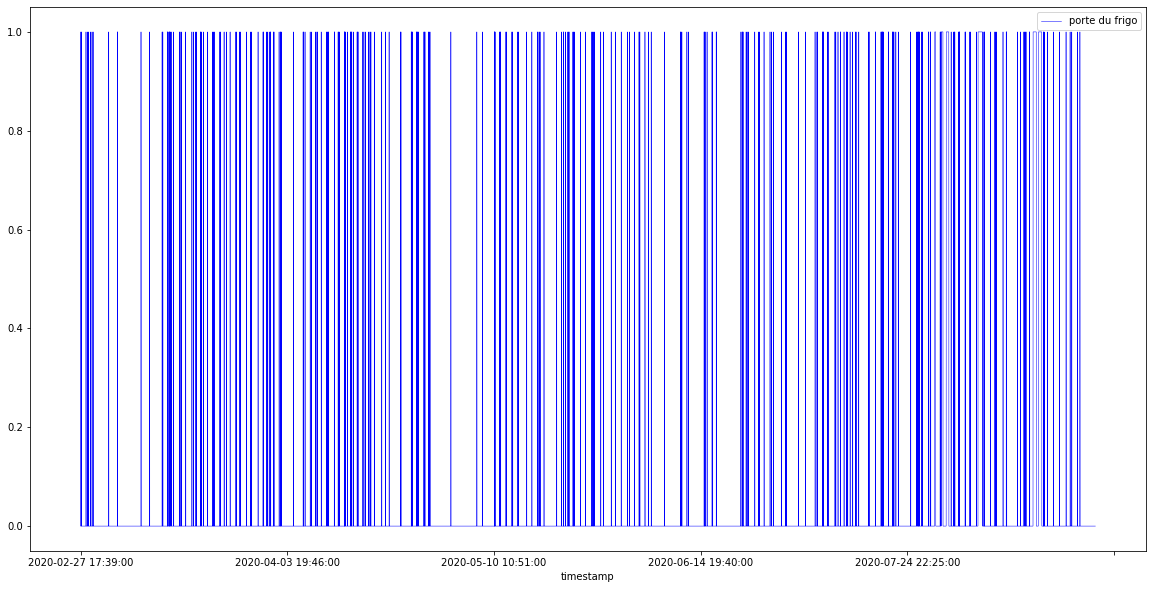

In [97]:
#df_cuisine1.plot(x='timestamp', y='value', color='blue', label='porte du frigo', linewidth='0.5', figsize=(20,10))
df_cuisine.plot(x='timestamp', y='value', color='blue', label='porte du frigo', linewidth='0.5', figsize=(20,10))

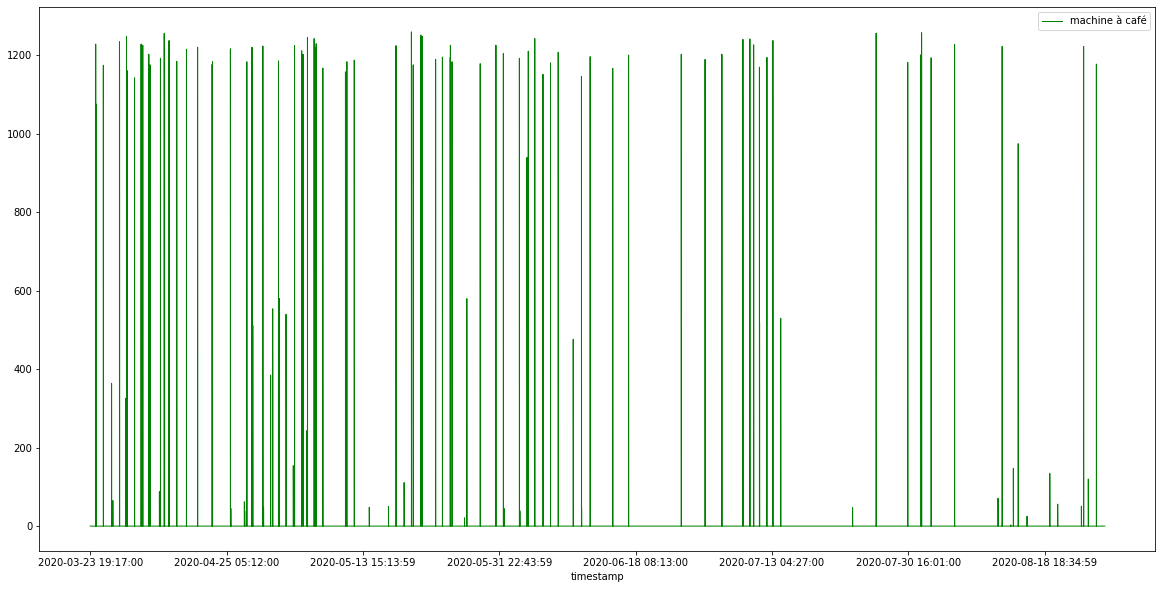

In [98]:
#df_cuisine2.plot(x='timestamp', y='value', color='green', label='machine à café', linewidth='1', figsize=(20,10))
df_bis_cuisine.plot(x='timestamp', y='value', color='green', label='machine à café', linewidth='1', figsize=(20,10))

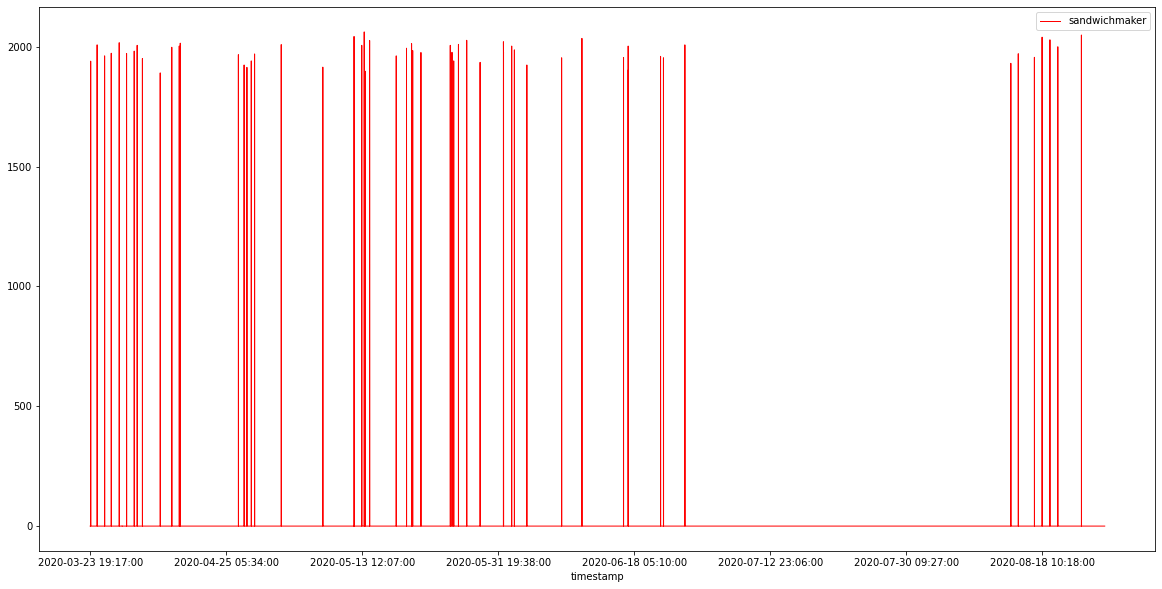

In [99]:
#df_cuisine3.plot(x='timestamp', y='value', color='red', label='sandwichmaker', linewidth='1', figsize=(20,10))
df_3_cuisine.plot(x='timestamp', y='value', color='red', label='sandwichmaker', linewidth='1', figsize=(20,10))

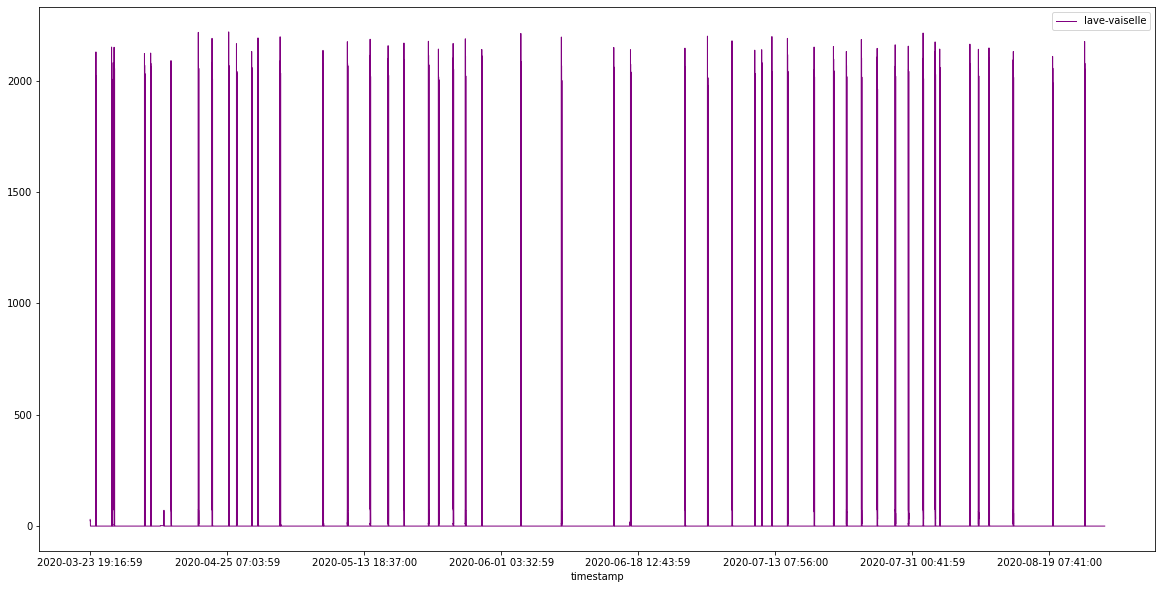

In [100]:
#df_cuisine4.plot(x='timestamp', y='value', color='purple', label='lave-vaiselle', linewidth='1', figsize=(20,10))
df_4_cuisine.plot(x='timestamp', y='value', color='purple', label='lave-vaiselle', linewidth='1', figsize=(20,10))

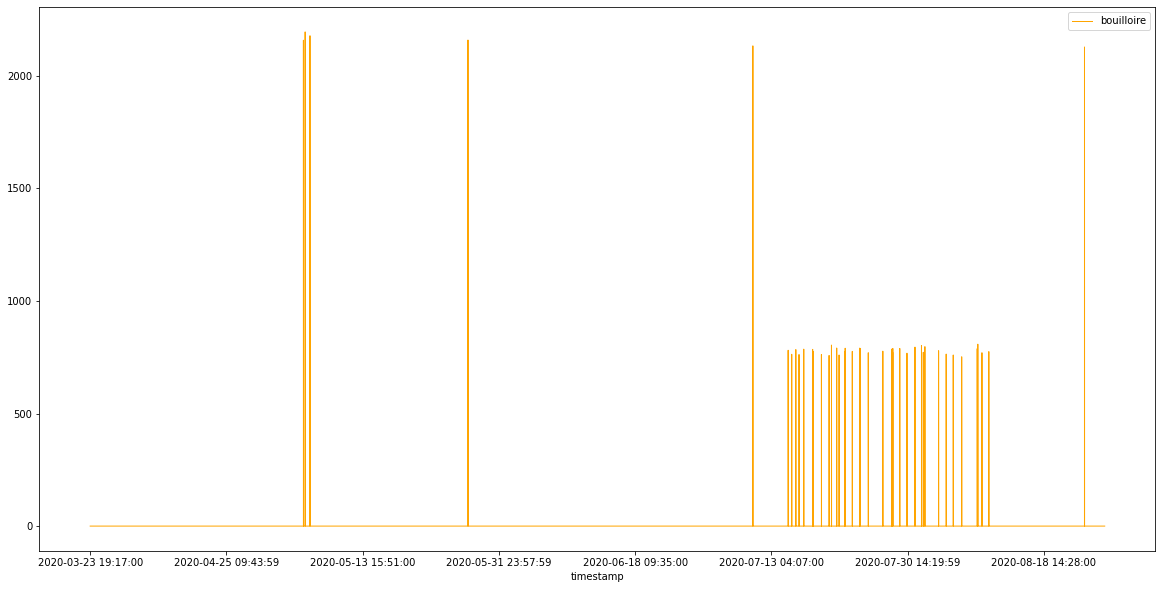

In [101]:
#df_cuisine5.plot(x='timestamp', y='value', color='orange', label='bouilloire', linewidth='1', figsize=(20,10))
df_5_cuisine.plot(x='timestamp', y='value', color='orange', label='bouilloire', linewidth='1', figsize=(20,10))

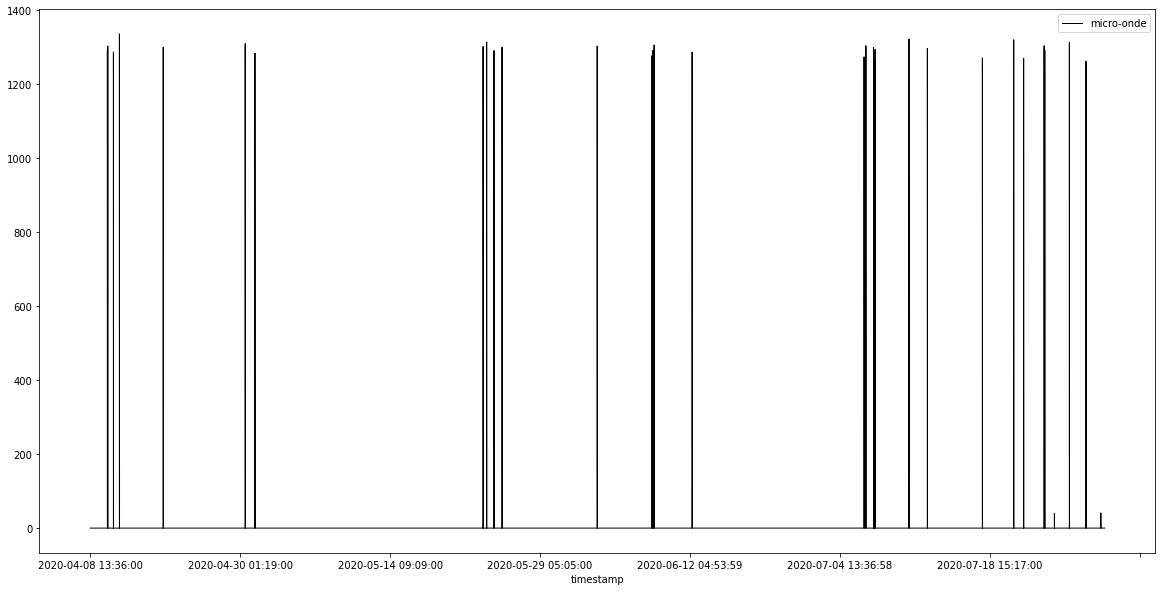

In [102]:
#df_cuisine6.plot(x='timestamp', y='value', color='black', label='micro-onde', linewidth='1', figsize=(20,10))
df_6_cuisine.plot(x='timestamp', y='value', color='black', label='micro-onde', linewidth='1', figsize=(20,10))

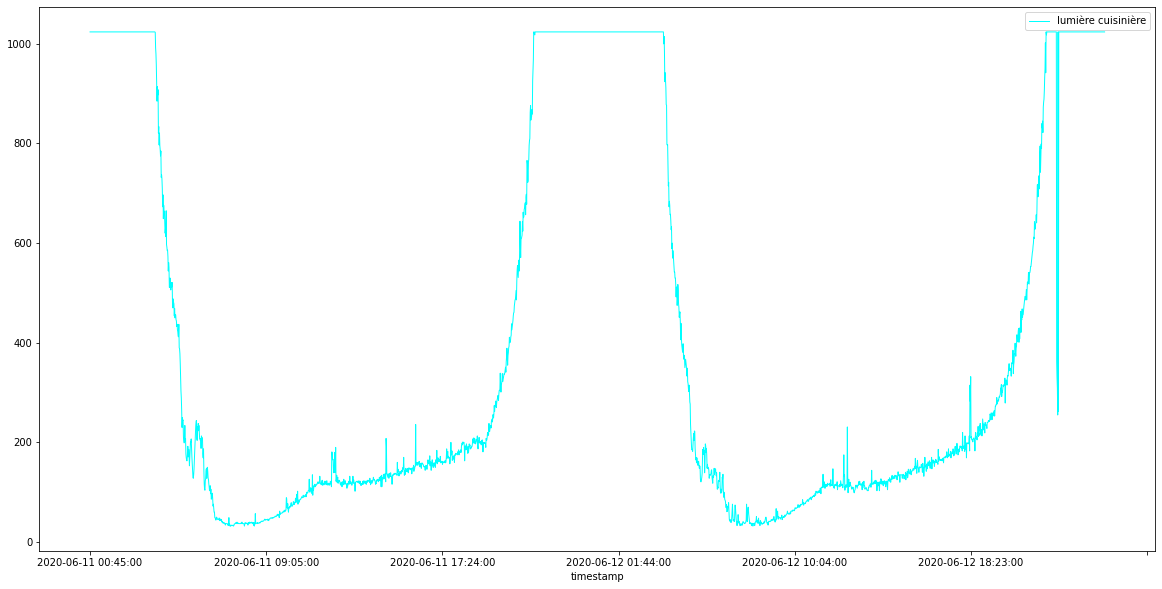

In [103]:
df_cuisine7.plot(x='timestamp', y='value', color='cyan', label='lumière cuisinière', linewidth='1', figsize=(20,10))
#df_7_cuisine.plot(x='timestamp', y='value', color='cyan', label='lumière cuisine', linewidth='1', figsize=(20,10))

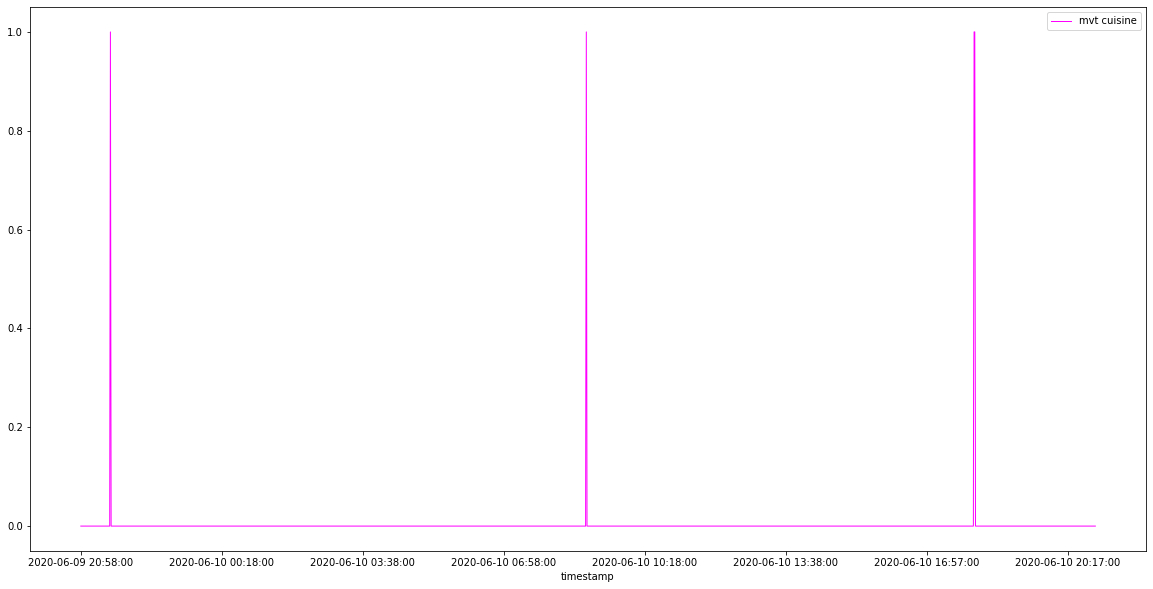

In [104]:
df_cuisine8.plot(x='timestamp', y='value', color='magenta', label='mvt cuisine', linewidth='1', figsize=(20,10))
#df_8_cuisine.plot(x='timestamp', y='value', color='magenta', label='mvt cuisine', linewidth='1', figsize=(20,10))

In [106]:
# Pour les capteurs int binaires : df_cuisine1 (6253)
def get_en_marche_appareil1(df):
    en_marche_appareil = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        #print('i1',i)
        if (df['value'][i] == 1) and (df['timestamp'][i] > '2020-03-24 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            if((df['timestamp'][i] > '2020-08-20 00:00:00') and (df['timestamp'][i] < '2020-08-25 00:00:00')):
              #print('i2',i)
              #print(str(df['timestamp'][i]))
              #print(' ------------------ ')
              en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [107]:
df_cuisine[245500:245550]

value_id  sensor_id            timestamp  value
245500  253801166.0       6253  2020-08-26 10:01:00      0
245501  253801859.0       6253  2020-08-26 10:02:00      0
245502  253802559.0       6253  2020-08-26 10:03:00      0
245503  253803239.0       6253  2020-08-26 10:04:00      0
245504  253803880.0       6253  2020-08-26 10:05:00      0
245505  253804560.0       6253  2020-08-26 10:06:00      0
245506  253805254.0       6253  2020-08-26 10:07:00      0
245507  253805951.0       6253  2020-08-26 10:08:00      0
245508  253806648.0       6253  2020-08-26 10:09:00      0
245509  253807348.0       6253  2020-08-26 10:10:00      0
245510  253808048.0       6253  2020-08-26 10:11:00      0
245511  253808733.0       6253  2020-08-26 10:12:00      0
245512  253809432.0       6253  2020-08-26 10:13:00      0
245513  253810119.0       6253  2020-08-26 10:14:00      0
245514  253810803.0       6253  2020-08-26 10:15:00      0
245515  253811497.0       6253  2020-08-26 10:16:00      0
245516  253812158.0       6253  2020-08-26 10:17:00      0
245517  253812840.0       6253  2020-08-26 10:18:00      0
245518  253813536.0       6253  2020-08-26 10:19:00      0
245519  253814235.0       6253  2020-08-26 10:20:00      0
245520  253814929.0       6253  2020-08-26 10:21:00      0
245521  253815607.0       6253  2020-08-26 10:22:00      0
245522  253816291.0       6253  2020-08-26 10:23:00      0
245523  253816972.0       6253  2020-08-26 10:24:00      0
245524  253817669.0       6253  2020-08-26 10:25:00      0
245525  253818362.0       6253  2020-08-26 10:26:00      0
245526  253819060.0       6253  2020-08-26 10:27:00      0
245527  253819759.0       6253  2020-08-26 10:28:00      0
245528  253820449.0       6253  2020-08-26 10:29:00      0
245529  253821100.0       6253  2020-08-26 10:30:00      0
245530  253821359.0       6253  2020-08-26 10:30:24      0

In [108]:
# Pour les capteurs float val supérieure au seuil : df_cuisine2 (6632), df_cuisine3 (6633), df_cuisine4 (6634), df_cuisine5 (6635) df_cuisine6 (6696)
def get_en_marche_appareil2(df, seuil):
    en_marche_appareil = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] >=seuil) and (df['timestamp'][i] > '2020-03-24 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [109]:
# Pour les capteurs float val inférieure au seuil : df_cuisine7 (5887),

def get_en_marche_appareil3(df, seuil):
    en_marche_appareil = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] <=seuil) and (df['timestamp'][i] > '2020-03-24 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00')
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [110]:
get_en_marche_appareil1(df_cuisine)

['2020-08-20 10:01:00',
 '2020-08-20 10:08:00',
 '2020-08-21 12:28:00',
 '2020-08-22 04:45:00',
 '2020-08-22 11:32:00',
 '2020-08-23 10:25:00',
 '2020-08-23 10:27:00',
 '2020-08-23 10:38:00',
 '2020-08-23 20:17:00']

In [111]:
len(get_en_marche_appareil1(df_cuisine))

9

In [112]:
get_en_marche_appareil1(df_cuisine)[4450:4470]

[]

In [113]:
get_en_marche_appareil2(df_bis_cuisine, 1000)
get_en_marche_appareil2(df_3_cuisine, 1800)
get_en_marche_appareil2(df_4_cuisine, 1900)
get_en_marche_appareil2(df_5_cuisine, 1900)
get_en_marche_appareil2(df_6_cuisine, 1200)

['2020-04-15 14:21:00',
 '2020-04-15 15:08:00',
 '2020-04-15 15:13:59',
 '2020-04-15 15:14:59',
 '2020-04-17 11:44:10',
 '2020-04-18 01:04:00',
 '2020-04-18 01:04:29',
 '2020-04-22 11:15:00',
 '2020-04-22 11:16:00',
 '2020-04-30 12:34:51',
 '2020-05-01 12:19:00',
 '2020-05-23 15:26:59',
 '2020-05-23 15:28:59',
 '2020-05-23 23:23:59',
 '2020-05-23 23:24:59',
 '2020-05-24 15:41:00',
 '2020-05-25 09:35:00',
 '2020-05-25 09:35:59',
 '2020-05-25 09:39:00',
 '2020-06-03 12:10:00',
 '2020-06-03 12:10:59',
 '2020-06-03 12:11:59',
 '2020-06-03 12:12:59',
 '2020-06-08 13:47:00',
 '2020-06-08 15:32:00',
 '2020-06-08 18:42:19',
 '2020-06-12 12:23:00',
 '2020-06-12 12:23:59',
 '2020-07-06 19:21:00',
 '2020-07-06 19:22:00',
 '2020-07-06 23:26:51',
 '2020-07-07 16:23:59',
 '2020-07-07 16:25:00',
 '2020-07-07 17:35:00',
 '2020-07-07 17:36:00',
 '2020-07-07 19:54:00',
 '2020-07-11 01:53:59',
 '2020-07-11 01:55:00',
 '2020-07-12 19:06:59',
 '2020-07-12 19:07:58',
 '2020-07-12 19:09:00',
 '2020-07-12 19:

In [114]:
get_en_marche_appareil2(df_bis_cuisine, 1000)

['2020-03-24 12:21:59',
 '2020-03-24 12:25:00',
 '2020-03-24 13:36:00',
 '2020-03-25 11:47:00',
 '2020-03-27 13:05:59',
 '2020-03-27 13:25:00',
 '2020-03-28 10:35:00',
 '2020-03-28 13:12:59',
 '2020-03-29 12:09:00',
 '2020-03-30 08:06:00',
 '2020-03-30 08:07:00',
 '2020-03-30 13:19:00',
 '2020-03-31 08:15:59',
 '2020-03-31 11:53:00',
 '2020-04-10 12:29:00',
 '2020-04-10 12:29:59',
 '2020-04-11 11:42:00',
 '2020-04-11 11:42:12',
 '2020-04-15 14:31:00',
 '2020-04-17 12:08:00',
 '2020-04-18 11:56:59',
 '2020-04-19 17:41:00',
 '2020-04-21 11:38:59',
 '2020-04-23 08:47:59',
 '2020-04-23 10:00:59',
 '2020-04-25 16:58:00',
 '2020-04-27 19:15:00',
 '2020-04-28 10:43:59',
 '2020-04-28 11:44:00',
 '2020-04-30 10:29:00',
 '2020-05-02 12:18:00',
 '2020-05-04 13:23:00',
 '2020-05-05 11:24:59',
 '2020-05-05 11:27:00',
 '2020-05-05 15:34:00',
 '2020-05-06 13:36:00',
 '2020-05-06 13:37:00',
 '2020-05-07 09:53:59',
 '2020-05-07 13:38:59',
 '2020-05-07 16:14:00',
 '2020-05-08 12:36:00',
 '2020-05-11 09:

In [115]:
get_en_marche_appareil3(df_7_cuisine, 300)

['2020-03-24 06:05:00',
 '2020-03-24 06:06:00',
 '2020-03-24 06:07:00',
 '2020-03-24 06:08:00',
 '2020-03-24 06:09:00',
 '2020-03-24 06:10:00',
 '2020-03-24 06:11:00',
 '2020-03-24 06:12:00',
 '2020-03-24 06:13:00',
 '2020-03-24 06:14:00',
 '2020-03-24 06:15:00',
 '2020-03-24 06:16:00',
 '2020-03-24 06:17:00',
 '2020-03-24 06:18:00',
 '2020-03-24 06:19:00',
 '2020-03-24 06:20:00',
 '2020-03-24 06:21:00',
 '2020-03-24 06:22:00',
 '2020-03-24 06:23:00',
 '2020-03-24 06:24:00',
 '2020-03-24 06:25:00',
 '2020-03-24 06:26:00',
 '2020-03-24 06:27:00',
 '2020-03-24 06:28:00',
 '2020-03-24 06:29:00',
 '2020-03-24 06:30:00',
 '2020-03-24 06:31:00',
 '2020-03-24 06:32:00',
 '2020-03-24 06:33:00',
 '2020-03-24 06:34:00',
 '2020-03-24 06:35:00',
 '2020-03-24 06:36:00',
 '2020-03-24 06:37:00',
 '2020-03-24 06:38:00',
 '2020-03-24 06:39:00',
 '2020-03-24 06:40:00',
 '2020-03-24 06:41:00',
 '2020-03-24 06:42:00',
 '2020-03-24 06:43:00',
 '2020-03-24 06:44:00',
 '2020-03-24 06:45:00',
 '2020-03-24 06:

In [116]:
get_en_marche_appareil3(df_7_cuisine, 300)[62420:62430]

['2020-06-11 20:02:00',
 '2020-06-11 20:03:00',
 '2020-06-11 20:04:00',
 '2020-06-12 05:05:00',
 '2020-06-12 05:06:00',
 '2020-06-12 05:07:00',
 '2020-06-12 05:08:00',
 '2020-06-12 05:09:00',
 '2020-06-12 05:10:00',
 '2020-06-12 05:11:00']

In [117]:
plages_activite_appareil_1 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_2 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_3 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_4 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_5 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_6 = pd.DataFrame(columns=['début','fin','durée'])
plages_activite_appareil_7 = pd.DataFrame(columns=['début','fin','durée'])

In [118]:
def get_plage_manger(dfa):
    if(dfa.equals(df_cuisine)):
      activite_appareil = get_en_marche_appareil1(dfa)
    if(dfa.equals(df_bis_cuisine)):
      activite_appareil = get_en_marche_appareil2(dfa,1000)
    if(dfa.equals(df_3_cuisine)):
      activite_appareil = get_en_marche_appareil2(dfa,1800)
    if(dfa.equals(df_4_cuisine)) or (dfa.equals(df_5_cuisine)):
      activite_appareil = get_en_marche_appareil2(dfa,1900)
    if(dfa.equals(df_6_cuisine)):
      activite_appareil = get_en_marche_appareil2(dfa,1200)
    if(dfa.equals(df_7_cuisine)):
      activite_appareil = get_en_marche_appareil3(dfa,300)
      print(activite_appareil[62420:62430])
    n = len(activite_appareil)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_activite_appareil=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    delta_sec = timedelta(seconds=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(activite_appareil[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(activite_appareil[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute) :
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                          intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date2.month == 3) :
                                    intermediate.append(date1)
                                else :
                                    if(len(intermediate)!=0):
                                        debut.append(str(intermediate[0]))
                                        fin.append(str(date1))
                                        duree.append(str(date1-intermediate[0]))
                                        intermediate=[]
                                    else:
                                      debut.append(str(date1))
                                      fin.append(str(date1+delta_sec))
                                      duree.append(str(delta_sec))
                            if (date1.day == 30) and (date2.month == date1.month +1):
                                intermediate.append(date1)
                            if (date1.day == 31) and (date2.month == date1.month + 1) :
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    intermediate=[]
                                else:
                                  debut.append(str(date1))
                                  fin.append(str(date1+delta_sec))
                                  duree.append(str(delta_sec))
                    else :
                      if(len(intermediate)!=0):
                        debut.append(str(intermediate[0]))
                        fin.append(str(date1))
                        duree.append(str(date1-intermediate[0]))
                        intermediate=[]
                      else:
                        debut.append(str(date1))
                        fin.append(str(date1+delta_sec))
                        duree.append(str(delta_sec))
                else :
                  if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                  else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                else:
                  debut.append(str(date1))
                  fin.append(str(date1+delta_sec))
                  duree.append(str(delta_sec))            
    plages_activite_appareil=[debut,fin,duree]
    return plages_activite_appareil

In [119]:
plages_activite_appareil_1['début'] = get_plage_manger(df_cuisine)[0]
plages_activite_appareil_1['fin'] = get_plage_manger(df_cuisine)[1]
plages_activite_appareil_1['durée'] = get_plage_manger(df_cuisine)[2]
plages_activite_appareil_1

début                  fin    durée
0  2020-08-20 10:01:00  2020-08-20 10:01:01  0:00:01
1  2020-08-20 10:08:00  2020-08-20 10:08:01  0:00:01
2  2020-08-21 12:28:00  2020-08-21 12:28:01  0:00:01
3  2020-08-22 04:45:00  2020-08-22 04:45:01  0:00:01
4  2020-08-22 11:32:00  2020-08-22 11:32:01  0:00:01
5  2020-08-23 10:25:00  2020-08-23 10:25:01  0:00:01
6  2020-08-23 10:27:00  2020-08-23 10:27:01  0:00:01
7  2020-08-23 10:38:00  2020-08-23 10:38:01  0:00:01

In [120]:
plages_activite_appareil_1[410:420]

Empty DataFrame
Columns: [début, fin, durée]
Index: []

In [121]:
plages_activite_appareil_2['début'] = get_plage_manger(df_bis_cuisine)[0]
plages_activite_appareil_2['fin'] = get_plage_manger(df_bis_cuisine)[1]
plages_activite_appareil_2['durée'] = get_plage_manger(df_bis_cuisine)[2]
plages_activite_appareil_2

début                  fin    durée
0   2020-03-24 12:21:59  2020-03-24 12:22:00  0:00:01
1   2020-03-24 12:25:00  2020-03-24 12:25:01  0:00:01
2   2020-03-24 13:36:00  2020-03-24 13:36:01  0:00:01
3   2020-03-25 11:47:00  2020-03-25 11:47:01  0:00:01
4   2020-03-27 13:05:59  2020-03-27 13:06:00  0:00:01
..                  ...                  ...      ...
81  2020-08-02 13:29:59  2020-08-02 13:30:00  0:00:01
82  2020-08-06 17:07:59  2020-08-06 17:08:00  0:00:01
83  2020-08-13 08:06:00  2020-08-13 08:06:01  0:00:01
84  2020-08-23 17:26:00  2020-08-23 17:26:01  0:00:01
85  2020-08-23 17:26:59  2020-08-23 17:27:00  0:00:01

[86 rows x 3 columns]

In [122]:
plages_activite_appareil_3['début'] = get_plage_manger(df_3_cuisine)[0]
plages_activite_appareil_3['fin'] = get_plage_manger(df_3_cuisine)[1]
plages_activite_appareil_3['durée'] = get_plage_manger(df_3_cuisine)[2]
plages_activite_appareil_3

début                  fin    durée
0    2020-03-24 17:03:00  2020-03-24 17:05:00  0:02:00
1    2020-03-24 17:05:59  2020-03-24 17:06:59  0:01:00
2    2020-03-25 16:01:00  2020-03-25 16:04:00  0:03:00
3    2020-03-25 16:08:00  2020-03-25 16:08:01  0:00:01
4    2020-03-26 12:31:00  2020-03-26 12:33:00  0:02:00
..                   ...                  ...      ...
143  2020-08-20 10:02:59  2020-08-20 10:03:00  0:00:01
144  2020-08-20 10:04:00  2020-08-20 10:05:00  0:01:00
145  2020-08-20 10:08:59  2020-08-20 10:09:00  0:00:01
146  2020-08-23 10:26:00  2020-08-23 10:27:00  0:01:00
147  2020-08-23 10:27:59  2020-08-23 10:28:00  0:00:01

[148 rows x 3 columns]

In [123]:
plages_activite_appareil_4['début'] = get_plage_manger(df_4_cuisine)[0]
plages_activite_appareil_4['fin'] = get_plage_manger(df_4_cuisine)[1]
plages_activite_appareil_4['durée'] = get_plage_manger(df_4_cuisine)[2]
plages_activite_appareil_4

début                  fin    durée
0    2020-03-24 12:51:59  2020-03-24 12:52:00  0:00:01
1    2020-03-24 12:53:00  2020-03-24 12:54:00  0:01:00
2    2020-03-24 13:04:00  2020-03-24 13:06:00  0:02:00
3    2020-03-24 13:28:00  2020-03-24 13:29:00  0:01:00
4    2020-03-24 13:29:59  2020-03-24 13:30:00  0:00:01
..                   ...                  ...      ...
408  2020-08-23 20:56:00  2020-08-23 20:56:01  0:00:01
409  2020-08-23 21:17:00  2020-08-23 21:18:00  0:01:00
410  2020-08-23 21:18:59  2020-08-23 21:19:00  0:00:01
411  2020-08-23 21:20:00  2020-08-23 21:21:00  0:01:00
412  2020-08-23 22:11:59  2020-08-23 22:12:00  0:00:01

[413 rows x 3 columns]

In [124]:
plages_activite_appareil_5['début'] = get_plage_manger(df_5_cuisine)[0]
plages_activite_appareil_5['fin'] = get_plage_manger(df_5_cuisine)[1]
plages_activite_appareil_5['durée'] = get_plage_manger(df_5_cuisine)[2]
plages_activite_appareil_5

début                  fin    durée
0   2020-05-05 18:05:59  2020-05-05 18:06:00  0:00:01
1   2020-05-05 18:07:00  2020-05-05 18:07:01  0:00:01
2   2020-05-05 23:24:00  2020-05-05 23:24:01  0:00:01
3   2020-05-06 22:31:59  2020-05-06 22:32:00  0:00:01
4   2020-05-06 22:33:00  2020-05-06 22:33:01  0:00:01
5   2020-05-06 22:33:59  2020-05-06 22:34:00  0:00:01
6   2020-05-27 23:52:00  2020-05-27 23:53:00  0:01:00
7   2020-07-10 18:41:00  2020-07-10 18:41:01  0:00:01
8   2020-07-10 18:41:59  2020-07-10 18:42:00  0:00:01
9   2020-08-23 19:54:00  2020-08-23 19:54:01  0:00:01
10  2020-08-23 19:54:59  2020-08-23 19:55:00  0:00:01

In [125]:
plages_activite_appareil_6['début'] = get_plage_manger(df_6_cuisine)[0]
plages_activite_appareil_6['fin'] = get_plage_manger(df_6_cuisine)[1]
plages_activite_appareil_6['durée'] = get_plage_manger(df_6_cuisine)[2]
plages_activite_appareil_6

début                  fin    durée
0   2020-04-15 14:21:00  2020-04-15 14:21:01  0:00:01
1   2020-04-15 15:08:00  2020-04-15 15:08:01  0:00:01
2   2020-04-15 15:13:59  2020-04-15 15:14:59  0:01:00
3   2020-04-17 11:44:10  2020-04-17 11:44:11  0:00:01
4   2020-04-18 01:04:00  2020-04-18 01:04:01  0:00:01
5   2020-04-18 01:04:29  2020-04-18 01:04:30  0:00:01
6   2020-04-22 11:15:00  2020-04-22 11:16:00  0:01:00
7   2020-04-30 12:34:51  2020-04-30 12:34:52  0:00:01
8   2020-05-01 12:19:00  2020-05-01 12:19:01  0:00:01
9   2020-05-23 15:26:59  2020-05-23 15:27:00  0:00:01
10  2020-05-23 15:28:59  2020-05-23 15:29:00  0:00:01
11  2020-05-23 23:23:59  2020-05-23 23:24:59  0:01:00
12  2020-05-24 15:41:00  2020-05-24 15:41:01  0:00:01
13  2020-05-25 09:35:00  2020-05-25 09:35:01  0:00:01
14  2020-05-25 09:35:59  2020-05-25 09:36:00  0:00:01
15  2020-05-25 09:39:00  2020-05-25 09:39:01  0:00:01
16  2020-06-03 12:10:00  2020-06-03 12:10:01  0:00:01
17  2020-06-03 12:10:59  2020-06-03 12:12:59  0:02:00
18  2020-06-08 13:47:00  2020-06-08 13:47:01  0:00:01
19  2020-06-08 15:32:00  2020-06-08 15:32:01  0:00:01
20  2020-06-08 18:42:19  2020-06-08 18:42:20  0:00:01
21  2020-06-12 12:23:00  2020-06-12 12:23:01  0:00:01
22  2020-06-12 12:23:59  2020-06-12 12:24:00  0:00:01
23  2020-07-06 19:21:00  2020-07-06 19:22:00  0:01:00
24  2020-07-06 23:26:51  2020-07-06 23:26:52  0:00:01
25  2020-07-07 16:23:59  2020-07-07 16:24:00  0:00:01
26  2020-07-07 16:25:00  2020-07-07 16:25:01  0:00:01
27  2020-07-07 17:35:00  2020-07-07 17:36:00  0:01:00
28  2020-07-07 19:54:00  2020-07-07 19:54:01  0:00:01
29  2020-07-11 01:53:59  2020-07-11 01:54:00  0:00:01
30  2020-07-11 01:55:00  2020-07-11 01:55:01  0:00:01
31  2020-07-12 19:06:59  2020-07-12 19:07:58  0:00:59
32  2020-07-12 19:09:00  2020-07-12 19:09:01  0:00:01
33  2020-07-12 19:11:00  2020-07-12 19:12:00  0:01:00
34  2020-07-17 22:37:00  2020-07-17 22:38:00  0:01:00
35  2020-07-20 20:14:59  2020-07-20 20:15:00  0:00:01
36  2020-07-21 18:21:59  2020-07-21 18:22:00  0:00:01
37  2020-07-21 18:23:00  2020-07-21 18:23:01  0:00:01
38  2020-07-23 15:52:59  2020-07-23 15:53:00  0:00:01
39  2020-07-23 17:25:00  2020-07-23 17:26:00  0:01:00
40  2020-07-23 17:26:59  2020-07-23 17:27:00  0:00:01
41  2020-07-26 00:03:59  2020-07-26 00:04:00  0:00:01

In [126]:
plages_activite_appareil_7['début'] = get_plage_manger(df_7_cuisine)[0]
plages_activite_appareil_7['fin'] = get_plage_manger(df_7_cuisine)[1]
plages_activite_appareil_7['durée'] = get_plage_manger(df_7_cuisine)[2]
plages_activite_appareil_7

['2020-06-11 20:02:00', '2020-06-11 20:03:00', '2020-06-11 20:04:00', '2020-06-12 05:05:00', '2020-06-12 05:06:00', '2020-06-12 05:07:00', '2020-06-12 05:08:00', '2020-06-12 05:09:00', '2020-06-12 05:10:00', '2020-06-12 05:11:00']
['2020-06-11 20:02:00', '2020-06-11 20:03:00', '2020-06-11 20:04:00', '2020-06-12 05:05:00', '2020-06-12 05:06:00', '2020-06-12 05:07:00', '2020-06-12 05:08:00', '2020-06-12 05:09:00', '2020-06-12 05:10:00', '2020-06-12 05:11:00']
['2020-06-11 20:02:00', '2020-06-11 20:03:00', '2020-06-11 20:04:00', '2020-06-12 05:05:00', '2020-06-12 05:06:00', '2020-06-12 05:07:00', '2020-06-12 05:08:00', '2020-06-12 05:09:00', '2020-06-12 05:10:00', '2020-06-12 05:11:00']


début                  fin    durée
0     2020-03-24 06:05:00  2020-03-24 07:35:00  1:30:00
1     2020-03-24 07:35:59  2020-03-24 07:36:00  0:00:01
2     2020-03-24 07:37:00  2020-03-24 08:57:00  1:20:00
3     2020-03-24 08:57:59  2020-03-24 08:58:00  0:00:01
4     2020-03-24 08:59:00  2020-03-24 12:51:00  3:52:00
...                   ...                  ...      ...
2160  2020-08-23 20:41:10  2020-08-23 20:41:11  0:00:01
2161  2020-08-23 20:43:00  2020-08-23 20:49:00  0:06:00
2162  2020-08-23 20:51:00  2020-08-23 20:51:01  0:00:01
2163  2020-08-23 20:53:00  2020-08-23 20:54:00  0:01:00
2164  2020-08-23 20:59:00  2020-08-23 21:01:00  0:02:00

[2165 rows x 3 columns]

In [127]:
new_plages_activite_appareil_1 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_2 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_3 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_4 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_5 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_6 = pd.DataFrame(columns=['début','fin','durée'])
new_plages_activite_appareil_7 = pd.DataFrame(columns=['début','fin','durée'])

In [128]:
def retablir_plages(dfa,ecart):
    n = dfa.shape[0]
    new_debut=[]
    new_fin=[]
    fin_intermediate=[]
    new_duree=[]
    timedelta_day = timedelta(days=1)
    
    i=0
    for j in range (n-1):
        date1 = datetime.strptime(dfa.iat[j,1], '%Y-%m-%d %H:%M:%S')
        date2 = datetime.strptime(dfa.iat[j+1,0], '%Y-%m-%d %H:%M:%S')
        calc_intermediate = date2 - date1
        if(calc_intermediate<timedelta_day):
          #print(j)
          calc = datetime.strptime(str(calc_intermediate),'%H:%M:%S')
          if (calc.minute <= ecart) and (calc.hour<1) :
            #Construire nouveau dataset
            fin_intermediate.append(dfa.iat[j+1,1])
          else :
            if(len(fin_intermediate)!=0) :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[j,1])
                new_debut_date = datetime.strptime(dfa.iat[i,0],'%Y-%m-%d %H:%M:%S')
                new_fin_date = datetime.strptime(dfa.iat[j,1],'%Y-%m-%d %H:%M:%S')
                calc_duree = new_fin_date-new_debut_date
                new_duree.append(str(calc_duree))
                i=j+1
            else :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[i,1])
                new_duree.append(dfa.iat[i,2])
                i=j+1
        else:
          if(len(fin_intermediate)!=0) :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[j,1])
                new_debut_date = datetime.strptime(dfa.iat[i,0],'%Y-%m-%d %H:%M:%S')
                new_fin_date = datetime.strptime(dfa.iat[j,1],'%Y-%m-%d %H:%M:%S')
                calc_duree = new_fin_date-new_debut_date
                new_duree.append(str(calc_duree))
                i=j+1
          else :
                new_debut.append(dfa.iat[i,0])
                new_fin.append(dfa.iat[i,1])
                new_duree.append(dfa.iat[i,2])
                i=j+1
    new_plages_activite_appareil=[new_debut,new_fin,new_duree]
    return new_plages_activite_appareil

In [129]:
print(plages_activite_appareil_1.iat[0,0])
print(plages_activite_appareil_1.iat[1,0])

2020-08-20 10:01:00
2020-08-20 10:08:00


In [130]:
new_plages_activite_appareil_1['début']=retablir_plages(plages_activite_appareil_1,5)[0]
new_plages_activite_appareil_1['fin']=retablir_plages(plages_activite_appareil_1,5)[1]
new_plages_activite_appareil_1['durée']=retablir_plages(plages_activite_appareil_1,5)[2]
new_plages_activite_appareil_1

début                  fin    durée
0  2020-08-20 10:01:00  2020-08-20 10:01:01  0:00:01
1  2020-08-20 10:08:00  2020-08-20 10:08:01  0:00:01
2  2020-08-21 12:28:00  2020-08-21 12:28:01  0:00:01
3  2020-08-22 04:45:00  2020-08-22 04:45:01  0:00:01
4  2020-08-22 11:32:00  2020-08-22 11:32:01  0:00:01
5  2020-08-23 10:25:00  2020-08-23 10:27:01  0:02:01

In [131]:
new_plages_activite_appareil_2['début']=retablir_plages(plages_activite_appareil_2,5)[0]
new_plages_activite_appareil_2['fin']=retablir_plages(plages_activite_appareil_2,5)[1]
new_plages_activite_appareil_2['durée']=retablir_plages(plages_activite_appareil_2,5)[2]
new_plages_activite_appareil_2

début                  fin    durée
0   2020-03-24 12:21:59  2020-03-24 12:25:01  0:03:02
1   2020-03-24 13:36:00  2020-03-24 13:36:01  0:00:01
2   2020-03-25 11:47:00  2020-03-25 11:47:01  0:00:01
3   2020-03-27 13:05:59  2020-03-27 13:06:00  0:00:01
4   2020-03-27 13:25:00  2020-03-27 13:25:01  0:00:01
..                  ...                  ...      ...
71  2020-08-01 06:31:00  2020-08-01 06:31:01  0:00:01
72  2020-08-01 08:23:00  2020-08-01 08:23:01  0:00:01
73  2020-08-02 13:29:59  2020-08-02 13:30:00  0:00:01
74  2020-08-06 17:07:59  2020-08-06 17:08:00  0:00:01
75  2020-08-13 08:06:00  2020-08-13 08:06:01  0:00:01

[76 rows x 3 columns]

In [132]:
new_plages_activite_appareil_3['début']=retablir_plages(plages_activite_appareil_3,5)[0]
new_plages_activite_appareil_3['fin']=retablir_plages(plages_activite_appareil_3,5)[1]
new_plages_activite_appareil_3['durée']=retablir_plages(plages_activite_appareil_3,5)[2]
new_plages_activite_appareil_3

début                  fin    durée
0   2020-03-24 17:03:00  2020-03-24 17:06:59  0:03:59
1   2020-03-25 16:01:00  2020-03-25 16:08:01  0:07:01
2   2020-03-26 12:31:00  2020-03-26 12:45:00  0:14:00
3   2020-03-27 13:09:00  2020-03-27 13:12:00  0:03:00
4   2020-03-28 11:52:00  2020-03-28 11:59:01  0:07:01
5   2020-03-29 12:14:00  2020-03-29 12:14:11  0:00:11
6   2020-03-29 21:20:00  2020-03-29 21:23:01  0:03:01
7   2020-03-30 13:20:00  2020-03-30 13:25:01  0:05:01
8   2020-04-10 19:35:00  2020-04-10 19:35:01  0:00:01
9   2020-04-17 21:47:00  2020-04-17 21:52:00  0:05:00
10  2020-04-18 20:39:00  2020-04-18 20:46:00  0:07:00
11  2020-04-18 23:44:00  2020-04-18 23:46:01  0:02:01
12  2020-04-26 19:24:00  2020-04-26 19:33:00  0:09:00
13  2020-04-27 12:54:00  2020-04-27 12:55:00  0:01:00
14  2020-04-27 21:35:00  2020-04-27 21:40:01  0:05:01
15  2020-04-28 11:36:00  2020-04-28 11:38:00  0:02:00
16  2020-04-28 21:43:59  2020-04-28 21:46:01  0:02:02
17  2020-05-02 19:22:00  2020-05-02 19:26:59  0:04:59
18  2020-05-08 11:22:00  2020-05-08 11:25:00  0:03:00
19  2020-05-12 11:10:59  2020-05-12 11:14:00  0:03:01
20  2020-05-13 10:46:59  2020-05-13 10:54:01  0:07:02
21  2020-05-13 18:18:59  2020-05-13 18:22:00  0:03:01
22  2020-05-13 21:07:00  2020-05-13 21:16:01  0:09:01
23  2020-05-14 10:53:00  2020-05-14 10:56:00  0:03:00
24  2020-05-18 11:28:00  2020-05-18 11:28:04  0:00:04
25  2020-05-18 11:41:00  2020-05-18 11:43:00  0:02:00
26  2020-05-19 19:10:00  2020-05-19 19:12:59  0:02:59
27  2020-05-20 10:38:59  2020-05-20 10:41:01  0:02:02
28  2020-05-20 13:58:00  2020-05-20 14:07:00  0:09:00
29  2020-05-21 15:25:59  2020-05-21 15:32:00  0:06:01
30  2020-05-25 09:33:00  2020-05-25 09:33:01  0:00:01
31  2020-05-25 14:49:00  2020-05-25 14:55:00  0:06:00
32  2020-05-25 20:07:00  2020-05-25 20:09:00  0:02:00
33  2020-05-26 10:31:00  2020-05-26 10:42:01  0:11:01
34  2020-05-27 17:45:00  2020-05-27 17:52:00  0:07:00
35  2020-05-29 12:06:59  2020-05-29 12:10:00  0:03:01
36  2020-06-01 11:36:00  2020-06-01 11:42:01  0:06:01
37  2020-06-01 11:55:00  2020-06-01 12:00:01  0:05:01
38  2020-06-02 12:50:00  2020-06-02 12:53:00  0:03:00
39  2020-06-02 13:00:00  2020-06-02 13:04:01  0:04:01
40  2020-06-02 21:10:00  2020-06-02 21:15:01  0:05:01
41  2020-06-04 11:18:00  2020-06-04 11:25:01  0:07:01
42  2020-06-08 22:01:59  2020-06-08 22:05:00  0:03:01
43  2020-06-11 12:13:59  2020-06-11 12:17:00  0:03:01
44  2020-06-16 20:11:00  2020-06-16 20:18:00  0:07:00
45  2020-06-17 10:35:00  2020-06-17 10:38:00  0:03:00
46  2020-06-17 11:10:00  2020-06-17 11:13:59  0:03:59
47  2020-06-21 13:53:00  2020-06-21 14:11:00  0:18:00
48  2020-06-21 22:48:00  2020-06-21 22:55:01  0:07:01
49  2020-06-27 00:30:59  2020-06-27 00:34:00  0:03:01
50  2020-06-27 00:50:58  2020-06-27 00:50:59  0:00:01
51  2020-08-14 10:14:00  2020-08-14 10:17:00  0:03:00
52  2020-08-15 09:02:00  2020-08-15 09:03:00  0:01:00
53  2020-08-17 10:24:00  2020-08-17 10:27:01  0:03:01
54  2020-08-18 09:58:00  2020-08-18 10:04:01  0:06:01
55  2020-08-19 09:40:00  2020-08-19 09:48:01  0:08:01
56  2020-08-19 09:59:00  2020-08-19 10:04:01  0:05:01
57  2020-08-20 10:02:00  2020-08-20 10:09:00  0:07:00

In [133]:
new_plages_activite_appareil_4['début']=retablir_plages(plages_activite_appareil_4,10)[0]
new_plages_activite_appareil_4['fin']=retablir_plages(plages_activite_appareil_4,10)[1]
new_plages_activite_appareil_4['durée']=retablir_plages(plages_activite_appareil_4,10)[2]
new_plages_activite_appareil_4

début                  fin    durée
0    2020-03-24 12:51:59  2020-03-24 13:06:00  0:14:01
1    2020-03-24 13:28:00  2020-03-24 13:31:01  0:03:01
2    2020-03-24 14:21:55  2020-03-24 14:25:32  0:03:37
3    2020-03-26 12:55:59  2020-03-26 12:58:00  0:02:01
4    2020-03-26 13:09:00  2020-03-26 13:10:00  0:01:00
..                   ...                  ...      ...
154  2020-08-19 18:07:00  2020-08-19 18:21:00  0:14:00
155  2020-08-19 18:42:59  2020-08-19 18:45:59  0:03:00
156  2020-08-19 19:34:00  2020-08-19 19:37:01  0:03:01
157  2020-08-23 20:42:00  2020-08-23 20:56:01  0:14:01
158  2020-08-23 21:17:00  2020-08-23 21:21:00  0:04:00

[159 rows x 3 columns]

In [134]:
for i in range(new_plages_activite_appareil_4.shape[0]):
  duree = datetime.strptime(new_plages_activite_appareil_4['durée'][i], "%H:%M:%S")
  if (duree.minute<=1) and (duree.second<=1):
    new_plages_activite_appareil_4.drop(i, 0, inplace=True)
new_plages_activite_appareil_4.reset_index(inplace=True, drop=True)
new_plages_activite_appareil_4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin    durée
0    2020-03-24 12:51:59  2020-03-24 13:06:00  0:14:01
1    2020-03-24 13:28:00  2020-03-24 13:31:01  0:03:01
2    2020-03-24 14:21:55  2020-03-24 14:25:32  0:03:37
3    2020-03-26 12:55:59  2020-03-26 12:58:00  0:02:01
4    2020-03-26 13:32:00  2020-03-26 13:35:00  0:03:00
..                   ...                  ...      ...
145  2020-08-19 18:07:00  2020-08-19 18:21:00  0:14:00
146  2020-08-19 18:42:59  2020-08-19 18:45:59  0:03:00
147  2020-08-19 19:34:00  2020-08-19 19:37:01  0:03:01
148  2020-08-23 20:42:00  2020-08-23 20:56:01  0:14:01
149  2020-08-23 21:17:00  2020-08-23 21:21:00  0:04:00

[150 rows x 3 columns]

In [135]:
new_plages_activite_appareil_5['début']=retablir_plages(plages_activite_appareil_5,5)[0]
new_plages_activite_appareil_5['fin']=retablir_plages(plages_activite_appareil_5,5)[1]
new_plages_activite_appareil_5['durée']=retablir_plages(plages_activite_appareil_5,5)[2]
new_plages_activite_appareil_5

début                  fin    durée
0  2020-05-05 18:05:59  2020-05-05 18:07:01  0:01:02
1  2020-05-05 23:24:00  2020-05-05 23:24:01  0:00:01
2  2020-05-06 22:31:59  2020-05-06 22:34:00  0:02:01
3  2020-05-27 23:52:00  2020-05-27 23:53:00  0:01:00
4  2020-07-10 18:41:00  2020-07-10 18:42:00  0:01:00

In [136]:
new_plages_activite_appareil_6['début']=retablir_plages(plages_activite_appareil_6,5)[0]
new_plages_activite_appareil_6['fin']=retablir_plages(plages_activite_appareil_6,5)[1]
new_plages_activite_appareil_6['durée']=retablir_plages(plages_activite_appareil_6,5)[2]
new_plages_activite_appareil_6

début                  fin    durée
0   2020-04-15 14:21:00  2020-04-15 14:21:01  0:00:01
1   2020-04-15 15:08:00  2020-04-15 15:14:59  0:06:59
2   2020-04-17 11:44:10  2020-04-17 11:44:11  0:00:01
3   2020-04-18 01:04:00  2020-04-18 01:04:30  0:00:30
4   2020-04-22 11:15:00  2020-04-22 11:16:00  0:01:00
5   2020-04-30 12:34:51  2020-04-30 12:34:52  0:00:01
6   2020-05-01 12:19:00  2020-05-01 12:19:01  0:00:01
7   2020-05-23 15:26:59  2020-05-23 15:29:00  0:02:01
8   2020-05-23 23:23:59  2020-05-23 23:24:59  0:01:00
9   2020-05-24 15:41:00  2020-05-24 15:41:01  0:00:01
10  2020-05-25 09:35:00  2020-05-25 09:39:01  0:04:01
11  2020-06-03 12:10:00  2020-06-03 12:12:59  0:02:59
12  2020-06-08 13:47:00  2020-06-08 13:47:01  0:00:01
13  2020-06-08 15:32:00  2020-06-08 15:32:01  0:00:01
14  2020-06-08 18:42:19  2020-06-08 18:42:20  0:00:01
15  2020-06-12 12:23:00  2020-06-12 12:24:00  0:01:00
16  2020-07-06 19:21:00  2020-07-06 19:22:00  0:01:00
17  2020-07-06 23:26:51  2020-07-06 23:26:52  0:00:01
18  2020-07-07 16:23:59  2020-07-07 16:25:01  0:01:02
19  2020-07-07 17:35:00  2020-07-07 17:36:00  0:01:00
20  2020-07-07 19:54:00  2020-07-07 19:54:01  0:00:01
21  2020-07-11 01:53:59  2020-07-11 01:55:01  0:01:02
22  2020-07-12 19:06:59  2020-07-12 19:12:00  0:05:01
23  2020-07-17 22:37:00  2020-07-17 22:38:00  0:01:00
24  2020-07-20 20:14:59  2020-07-20 20:15:00  0:00:01
25  2020-07-21 18:21:59  2020-07-21 18:23:01  0:01:02
26  2020-07-23 15:52:59  2020-07-23 15:53:00  0:00:01
27  2020-07-23 17:25:00  2020-07-23 17:27:00  0:02:00

In [137]:
new_plages_activite_appareil_7['début']=retablir_plages(plages_activite_appareil_7,5)[0]
new_plages_activite_appareil_7['fin']=retablir_plages(plages_activite_appareil_7,5)[1]
new_plages_activite_appareil_7['durée']=retablir_plages(plages_activite_appareil_7,5)[2]
new_plages_activite_appareil_7

début                  fin     durée
0    2020-03-24 06:05:00  2020-03-24 17:19:00  11:14:00
1    2020-03-24 20:43:00  2020-03-24 20:43:25   0:00:25
2    2020-03-25 00:56:10  2020-03-25 00:56:11   0:00:01
3    2020-03-25 06:28:00  2020-03-25 17:45:00  11:17:00
4    2020-03-25 18:47:00  2020-03-25 18:48:00   0:01:00
..                   ...                  ...       ...
462  2020-08-23 07:12:00  2020-08-23 09:41:00   2:29:00
463  2020-08-23 09:47:00  2020-08-23 16:48:00   7:01:00
464  2020-08-23 16:55:00  2020-08-23 17:00:00   0:05:00
465  2020-08-23 17:06:00  2020-08-23 17:06:01   0:00:01
466  2020-08-23 17:17:00  2020-08-23 18:13:00   0:56:00

[467 rows x 3 columns]

In [138]:
new_plages_activite_appareil_7[200:250]

début                  fin     durée
200  2020-05-24 05:57:00  2020-05-24 19:30:00  13:33:00
201  2020-05-25 05:55:00  2020-05-25 19:13:00  13:18:00
202  2020-05-25 19:31:00  2020-05-25 19:37:00   0:06:00
203  2020-05-25 19:44:00  2020-05-25 19:51:01   0:07:01
204  2020-05-25 20:07:00  2020-05-25 20:35:00   0:28:00
205  2020-05-26 05:15:00  2020-05-26 20:01:01  14:46:01
206  2020-05-26 21:21:54  2020-05-26 21:21:55   0:00:01
207  2020-05-27 05:17:00  2020-05-27 19:02:00  13:45:00
208  2020-05-27 19:21:00  2020-05-27 19:27:00   0:06:00
209  2020-05-27 19:36:00  2020-05-27 20:03:00   0:27:00
210  2020-05-27 23:04:00  2020-05-27 23:07:00   0:03:00
211  2020-05-27 23:52:00  2020-05-27 23:56:00   0:04:00
212  2020-05-28 05:13:00  2020-05-28 19:58:01  14:45:01
213  2020-05-28 21:42:00  2020-05-28 21:42:01   0:00:01
214  2020-05-29 01:17:00  2020-05-29 01:19:00   0:02:00
215  2020-05-29 05:06:00  2020-05-29 19:29:00  14:23:00
216  2020-05-29 19:45:00  2020-05-29 19:45:01   0:00:01
217  2020-05-29 19:54:00  2020-05-29 19:54:01   0:00:01
218  2020-05-30 05:12:00  2020-05-30 19:39:01  14:27:01
219  2020-05-31 05:10:00  2020-05-31 19:44:00  14:34:00
220  2020-05-31 20:36:00  2020-05-31 20:53:01   0:17:01
221  2020-06-01 05:09:00  2020-06-01 19:35:01  14:26:01
222  2020-06-01 19:52:00  2020-06-01 19:52:01   0:00:01
223  2020-06-01 23:19:00  2020-06-01 23:20:00   0:01:00
224  2020-06-02 05:09:00  2020-06-02 05:19:00   0:10:00
225  2020-06-02 05:29:00  2020-06-02 19:21:01  13:52:01
226  2020-06-02 19:33:00  2020-06-02 19:40:01   0:07:01
227  2020-06-02 21:11:00  2020-06-02 21:22:00   0:11:00
228  2020-06-03 05:11:00  2020-06-03 19:39:00  14:28:00
229  2020-06-04 00:20:00  2020-06-04 00:29:00   0:09:00
230  2020-06-04 05:06:00  2020-06-04 18:56:00  13:50:00
231  2020-06-04 19:05:00  2020-06-04 19:06:00   0:01:00
232  2020-06-04 19:33:00  2020-06-04 19:53:00   0:20:00
233  2020-06-05 04:47:00  2020-06-05 05:22:00   0:35:00
234  2020-06-05 05:30:00  2020-06-05 05:30:01   0:00:01
235  2020-06-05 05:42:00  2020-06-05 05:50:00   0:08:00
236  2020-06-05 06:34:00  2020-06-05 07:35:00   1:01:00
237  2020-06-05 08:26:00  2020-06-05 08:27:00   0:01:00
238  2020-06-05 08:36:00  2020-06-05 16:09:00   7:33:00
239  2020-06-05 16:25:00  2020-06-05 17:13:00   0:48:00
240  2020-06-05 17:23:00  2020-06-05 17:31:00   0:08:00
241  2020-06-05 20:00:00  2020-06-05 20:02:00   0:02:00
242  2020-06-06 06:17:00  2020-06-06 06:24:00   0:07:00
243  2020-06-06 06:33:00  2020-06-06 18:55:00  12:22:00
244  2020-06-06 19:04:00  2020-06-06 19:46:01   0:42:01
245  2020-06-07 05:04:00  2020-06-07 13:13:00   8:09:00
246  2020-06-07 13:21:00  2020-06-07 18:55:00   5:34:00
247  2020-06-07 19:04:00  2020-06-07 19:43:01   0:39:01
248  2020-06-07 23:36:00  2020-06-07 23:44:00   0:08:00
249  2020-06-08 05:04:00  2020-06-08 20:06:00  15:02:00

In [139]:
retablir_plages(plages_activite_appareil_7,5)[0][200:280]

['2020-05-24 05:57:00',
 '2020-05-25 05:55:00',
 '2020-05-25 19:31:00',
 '2020-05-25 19:44:00',
 '2020-05-25 20:07:00',
 '2020-05-26 05:15:00',
 '2020-05-26 21:21:54',
 '2020-05-27 05:17:00',
 '2020-05-27 19:21:00',
 '2020-05-27 19:36:00',
 '2020-05-27 23:04:00',
 '2020-05-27 23:52:00',
 '2020-05-28 05:13:00',
 '2020-05-28 21:42:00',
 '2020-05-29 01:17:00',
 '2020-05-29 05:06:00',
 '2020-05-29 19:45:00',
 '2020-05-29 19:54:00',
 '2020-05-30 05:12:00',
 '2020-05-31 05:10:00',
 '2020-05-31 20:36:00',
 '2020-06-01 05:09:00',
 '2020-06-01 19:52:00',
 '2020-06-01 23:19:00',
 '2020-06-02 05:09:00',
 '2020-06-02 05:29:00',
 '2020-06-02 19:33:00',
 '2020-06-02 21:11:00',
 '2020-06-03 05:11:00',
 '2020-06-04 00:20:00',
 '2020-06-04 05:06:00',
 '2020-06-04 19:05:00',
 '2020-06-04 19:33:00',
 '2020-06-05 04:47:00',
 '2020-06-05 05:30:00',
 '2020-06-05 05:42:00',
 '2020-06-05 06:34:00',
 '2020-06-05 08:26:00',
 '2020-06-05 08:36:00',
 '2020-06-05 16:25:00',
 '2020-06-05 17:23:00',
 '2020-06-05 20:

In [140]:
retablir_plages(plages_activite_appareil_7,5)[1][200:280]

['2020-05-24 19:30:00',
 '2020-05-25 19:13:00',
 '2020-05-25 19:37:00',
 '2020-05-25 19:51:01',
 '2020-05-25 20:35:00',
 '2020-05-26 20:01:01',
 '2020-05-26 21:21:55',
 '2020-05-27 19:02:00',
 '2020-05-27 19:27:00',
 '2020-05-27 20:03:00',
 '2020-05-27 23:07:00',
 '2020-05-27 23:56:00',
 '2020-05-28 19:58:01',
 '2020-05-28 21:42:01',
 '2020-05-29 01:19:00',
 '2020-05-29 19:29:00',
 '2020-05-29 19:45:01',
 '2020-05-29 19:54:01',
 '2020-05-30 19:39:01',
 '2020-05-31 19:44:00',
 '2020-05-31 20:53:01',
 '2020-06-01 19:35:01',
 '2020-06-01 19:52:01',
 '2020-06-01 23:20:00',
 '2020-06-02 05:19:00',
 '2020-06-02 19:21:01',
 '2020-06-02 19:40:01',
 '2020-06-02 21:22:00',
 '2020-06-03 19:39:00',
 '2020-06-04 00:29:00',
 '2020-06-04 18:56:00',
 '2020-06-04 19:06:00',
 '2020-06-04 19:53:00',
 '2020-06-05 05:22:00',
 '2020-06-05 05:30:01',
 '2020-06-05 05:50:00',
 '2020-06-05 07:35:00',
 '2020-06-05 08:27:00',
 '2020-06-05 16:09:00',
 '2020-06-05 17:13:00',
 '2020-06-05 17:31:00',
 '2020-06-05 20:

In [ ]:
for i in range(new_plages_activite_appareil_7.shape[0]):
  if(new_plages_activite_appareil_7['durée'][i][3]!='a'):
    duree = datetime.strptime(new_plages_activite_appareil_7['durée'][i], "%H:%M:%S")
    if (duree.minute<=1) and (duree.second<=1):
      new_plages_activite_appareil_7.drop(i, 0, inplace=True)
new_plages_activite_appareil_7.reset_index(inplace=True, drop=True)
new_plages_activite_appareil_7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin     durée
0    2020-03-24 06:05:00  2020-03-24 17:19:00  11:14:00
1    2020-03-24 20:43:00  2020-03-24 20:43:25   0:00:25
2    2020-03-25 06:28:00  2020-03-25 17:45:00  11:17:00
3    2020-03-25 22:43:00  2020-03-25 22:50:00   0:07:00
4    2020-03-26 07:34:00  2020-03-26 15:14:04   7:40:04
..                   ...                  ...       ...
388  2020-08-22 17:28:00  2020-08-22 17:35:01   0:07:01
389  2020-08-22 17:54:00  2020-08-22 18:06:00   0:12:00
390  2020-08-23 07:12:00  2020-08-23 09:41:00   2:29:00
391  2020-08-23 16:55:00  2020-08-23 17:00:00   0:05:00
392  2020-08-23 17:17:00  2020-08-23 18:13:00   0:56:00

[393 rows x 3 columns]

In [ ]:
new_plages_activite_appareil_7[200:250]

début                  fin     durée
200  2020-06-05 17:23:00  2020-06-05 17:31:00   0:08:00
201  2020-06-05 20:00:00  2020-06-05 20:02:00   0:02:00
202  2020-06-06 06:17:00  2020-06-06 06:24:00   0:07:00
203  2020-06-06 06:33:00  2020-06-06 18:55:00  12:22:00
204  2020-06-06 19:04:00  2020-06-06 19:46:01   0:42:01
205  2020-06-07 05:04:00  2020-06-07 13:13:00   8:09:00
206  2020-06-07 13:21:00  2020-06-07 18:55:00   5:34:00
207  2020-06-07 19:04:00  2020-06-07 19:43:01   0:39:01
208  2020-06-07 23:36:00  2020-06-07 23:44:00   0:08:00
209  2020-06-08 05:04:00  2020-06-08 20:06:00  15:02:00
210  2020-06-08 22:02:00  2020-06-08 22:11:00   0:09:00
211  2020-06-09 05:04:00  2020-06-09 05:46:00   0:42:00
212  2020-06-09 05:59:00  2020-06-09 19:03:00  13:04:00
213  2020-06-09 19:11:00  2020-06-09 19:14:00   0:03:00
214  2020-06-09 19:22:00  2020-06-09 19:53:01   0:31:01
215  2020-06-10 05:17:00  2020-06-10 19:39:00  14:22:00
216  2020-06-10 19:45:00  2020-06-10 19:47:00   0:02:00
217  2020-06-12 05:05:00  2020-06-12 19:52:01  14:47:01
218  2020-06-12 22:29:00  2020-06-12 22:30:13   0:01:13
219  2020-06-13 05:03:00  2020-06-13 19:51:01  14:48:01
220  2020-06-13 23:42:00  2020-06-14 00:00:00   0:18:00
221  2020-06-14 05:03:00  2020-06-14 19:45:00  14:42:00
222  2020-06-14 20:00:59  2020-06-14 21:09:00   1:08:01
223  2020-06-15 05:03:00  2020-06-15 19:30:01  14:27:01
224  2020-06-15 19:51:00  2020-06-15 20:28:00   0:37:00
225  2020-06-15 21:41:00  2020-06-15 22:30:00   0:49:00
226  2020-06-16 07:46:00  2020-06-16 14:32:00   6:46:00
227  2020-06-16 17:27:00  2020-06-16 17:51:00   0:24:00
228  2020-06-16 18:24:00  2020-06-16 18:28:00   0:04:00
229  2020-06-16 19:06:00  2020-06-16 20:33:00   1:27:00
230  2020-06-17 06:20:00  2020-06-17 06:30:00   0:10:00
231  2020-06-17 08:27:00  2020-06-17 20:01:01  11:34:01
232  2020-06-18 05:02:00  2020-06-18 19:44:01  14:42:01
233  2020-06-19 05:03:00  2020-06-19 19:50:01  14:47:01
234  2020-06-20 05:01:00  2020-06-20 19:45:00  14:44:00
235  2020-06-20 19:52:00  2020-06-20 19:57:01   0:05:01
236  2020-06-21 05:02:00  2020-06-21 19:54:01  14:52:01
237  2020-06-21 20:49:00  2020-06-21 21:54:00   1:05:00
238  2020-06-21 22:48:00  2020-06-21 22:59:00   0:11:00
239  2020-06-21 23:06:00  2020-06-21 23:14:30   0:08:30
240  2020-06-22 04:53:00  2020-06-22 15:01:00  10:08:00
241  2020-06-22 16:37:00  2020-06-22 16:57:01   0:20:01
242  2020-06-22 18:38:00  2020-06-22 18:56:00   0:18:00
243  2020-06-23 05:12:00  2020-06-23 19:52:01  14:40:01
244  2020-06-23 22:13:00  2020-06-23 22:15:00   0:02:00
245  2020-06-24 04:58:00  2020-06-24 19:43:01  14:45:01
246  2020-06-25 05:03:00  2020-06-25 20:13:01  15:10:01
247  2020-06-26 05:06:00  2020-06-26 19:47:01  14:41:01
248  2020-06-27 00:31:00  2020-06-27 00:51:01   0:20:01
249  2020-06-27 05:07:00  2020-06-27 06:28:54   1:21:54

In [ ]:
# Ajout du nom de l'activité dans une nouvelle colonne

def ajout_activite(dfa):
  if(dfa.equals(new_plages_activite_appareil_1)):
    activite = 'Frigo'
  if(dfa.equals(new_plages_activite_appareil_2)):
    activite = 'Café'
  if(dfa.equals(new_plages_activite_appareil_3)):
    activite = 'Sandwichmaker'
  if(dfa.equals(new_plages_activite_appareil_4)):
    activite = 'Lave-vaisselle'
  if(dfa.equals(new_plages_activite_appareil_5)):
    activite = 'Bouilloire'
  if(dfa.equals(new_plages_activite_appareil_6)):
    activite = 'Micro-ondes'
  if(dfa.equals(new_plages_activite_appareil_7)):
    activite = 'Lumière'
  n=dfa.shape[0]
  activite_list = [activite]*n
  dfa.insert(dfa.shape[1], "activité", activite_list)
  return dfa

In [ ]:
ajout_activite(new_plages_activite_appareil_1)
ajout_activite(new_plages_activite_appareil_2)
ajout_activite(new_plages_activite_appareil_3)
ajout_activite(new_plages_activite_appareil_4)
ajout_activite(new_plages_activite_appareil_5)
ajout_activite(new_plages_activite_appareil_6)
ajout_activite(new_plages_activite_appareil_7)

début                  fin     durée activité
0    2020-03-24 06:05:00  2020-03-24 17:19:00  11:14:00  Lumière
1    2020-03-24 20:43:00  2020-03-24 20:43:25   0:00:25  Lumière
2    2020-03-25 06:28:00  2020-03-25 17:45:00  11:17:00  Lumière
3    2020-03-25 22:43:00  2020-03-25 22:50:00   0:07:00  Lumière
4    2020-03-26 07:34:00  2020-03-26 15:14:04   7:40:04  Lumière
..                   ...                  ...       ...      ...
388  2020-08-22 17:28:00  2020-08-22 17:35:01   0:07:01  Lumière
389  2020-08-22 17:54:00  2020-08-22 18:06:00   0:12:00  Lumière
390  2020-08-23 07:12:00  2020-08-23 09:41:00   2:29:00  Lumière
391  2020-08-23 16:55:00  2020-08-23 17:00:00   0:05:00  Lumière
392  2020-08-23 17:17:00  2020-08-23 18:13:00   0:56:00  Lumière

[393 rows x 4 columns]

In [ ]:
df = []

for i in range(new_plages_activite_appareil_1.shape[0]):
  df.append(dict(Task="Ouverture frigo", Start=new_plages_activite_appareil_1['début'][i], Finish=new_plages_activite_appareil_1['fin'][i]))

for i in range(new_plages_activite_appareil_2.shape[0]):
  df.append(dict(Task="Machine à café", Start=new_plages_activite_appareil_2['début'][i], Finish=new_plages_activite_appareil_2['fin'][i]))

for i in range(new_plages_activite_appareil_3.shape[0]):
  df.append(dict(Task="Sandwichmaker", Start=new_plages_activite_appareil_3['début'][i], Finish=new_plages_activite_appareil_3['fin'][i]))

for i in range(new_plages_activite_appareil_4.shape[0]):
  df.append(dict(Task="Lave-vaiselle", Start=new_plages_activite_appareil_4['début'][i], Finish=new_plages_activite_appareil_4['fin'][i]))

for i in range(new_plages_activite_appareil_5.shape[0]):
  df.append(dict(Task="Bouilloire", Start=new_plages_activite_appareil_5['début'][i], Finish=new_plages_activite_appareil_5['fin'][i]))

for i in range(new_plages_activite_appareil_6.shape[0]):
  df.append(dict(Task="Micro-onde", Start=new_plages_activite_appareil_6['début'][i], Finish=new_plages_activite_appareil_6['fin'][i]))

for i in range(new_plages_activite_appareil_7.shape[0]):
  df.append(dict(Task="Lumière cuisine", Start=new_plages_activite_appareil_7['début'][i], Finish=new_plages_activite_appareil_7['fin'][i]))

fig = px.timeline(df, x_start='Start', x_end='Finish', y = 'Task', color='Task')
fig.show()

In [ ]:
new_plages_activite_appareil_df1 = pd.concat([new_plages_activite_appareil_1,new_plages_activite_appareil_2,new_plages_activite_appareil_3,new_plages_activite_appareil_4,new_plages_activite_appareil_5,new_plages_activite_appareil_6,new_plages_activite_appareil_7]).sort_values('début')
new_plages_activite_appareil_df1.reset_index(inplace=True, drop=True)
new_plages_activite_appareil_df1

début                  fin     durée        activité
0     2020-03-24 06:05:00  2020-03-24 17:19:00  11:14:00         Lumière
1     2020-03-24 12:21:59  2020-03-24 12:25:01   0:03:02            Café
2     2020-03-24 12:34:00  2020-03-24 12:34:01   0:00:01           Frigo
3     2020-03-24 12:51:59  2020-03-24 13:06:00   0:14:01  Lave-vaisselle
4     2020-03-24 13:28:00  2020-03-24 13:31:01   0:03:01  Lave-vaisselle
...                   ...                  ...       ...             ...
1020  2020-08-23 10:25:00  2020-08-23 10:27:01   0:02:01           Frigo
1021  2020-08-23 16:55:00  2020-08-23 17:00:00   0:05:00         Lumière
1022  2020-08-23 17:17:00  2020-08-23 18:13:00   0:56:00         Lumière
1023  2020-08-23 20:42:00  2020-08-23 20:56:01   0:14:01  Lave-vaisselle
1024  2020-08-23 21:17:00  2020-08-23 21:21:00   0:04:00  Lave-vaisselle

[1025 rows x 4 columns]

### Sous-étude n°1 :
Sélection de trois capteurs et étude de la combinaisons de ces derniers :
- Frigo
- Sandwichmaker
- Micro-ondes

In [ ]:
new_plages_activite_appareil_df2 = pd.concat([new_plages_activite_appareil_1,new_plages_activite_appareil_3,new_plages_activite_appareil_6]).sort_values('début')
new_plages_activite_appareil_df2.reset_index(inplace=True, drop=True)
new_plages_activite_appareil_df2

début                  fin    durée       activité
0    2020-03-24 12:34:00  2020-03-24 12:34:01  0:00:01          Frigo
1    2020-03-24 17:03:00  2020-03-24 17:06:59  0:03:59  Sandwichmaker
2    2020-03-25 11:48:00  2020-03-25 11:48:01  0:00:01          Frigo
3    2020-03-25 14:08:00  2020-03-25 14:08:01  0:00:01          Frigo
4    2020-03-25 16:01:00  2020-03-25 16:08:01  0:07:01  Sandwichmaker
..                   ...                  ...      ...            ...
396  2020-08-20 10:08:00  2020-08-20 10:08:01  0:00:01          Frigo
397  2020-08-21 12:28:00  2020-08-21 12:28:01  0:00:01          Frigo
398  2020-08-22 04:45:00  2020-08-22 04:45:01  0:00:01          Frigo
399  2020-08-22 11:32:00  2020-08-22 11:32:01  0:00:01          Frigo
400  2020-08-23 10:25:00  2020-08-23 10:27:01  0:02:01          Frigo

[401 rows x 4 columns]

### Analyse de la fréquence
Les durées étant pour la plupart inférieures à 5 min, on étudiera la fréquence d'utilisation à partir de la date de début d'utilisation.

In [ ]:
creneau_dates(new_plages_activite_appareil_df2,'début')

array([ 3, 14,  7,  7, 14, 14, 17, 22, 13, 14, 15,  6,  4, 10,  7,  7,  6,
        5,  2,  3,  4,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,  1,
        3,  3,  4,  8, 16, 14, 17, 29, 19, 27, 15, 12, 16,  8])

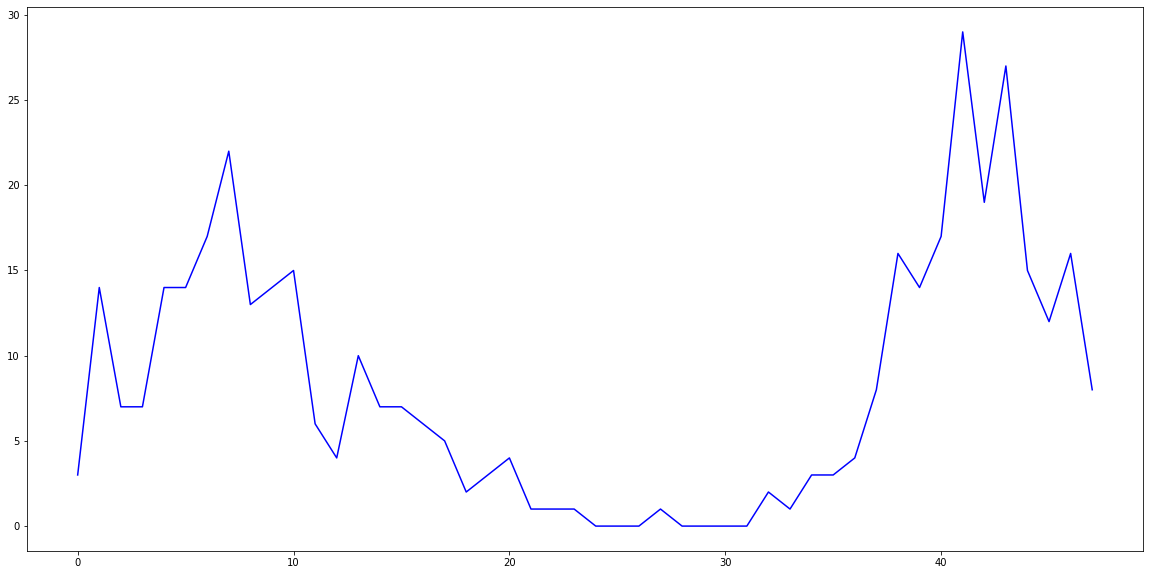

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(creneau_dates(new_plages_activite_appareil_df2,'début'), color='blue')
plt.show()

### Conclusion sous-étude n°1 :
Pour rappel, ici nous étudions uniquement trois appareils pour l'activité : "faire un repas". On remarque les choses suivantes :

PREMIERE ANALYSE SANS LES DONNEES DU FRIGO A 1SEC

[1. Pourcentages par rapport aux nombres de plages : 97]

[2. Pourcentages par rapport aux nombres de créneaux totals : 48]

- Les pics de fréquence les plus importants sont observés aux horaires suivants à 14:00 (9) [soit 9%], puis 12:00 (8) [soit 8,2%], 11:00-11:30 (6) [soit 12,4%], ainsi que 10:30 / 12:30 / 20:00 (5) [soit 15,5%], soit un total de 45,3% de l'activité.
- On observe encore une certaines activité à 13:00 / 17:30 / 18:30 / 21:30 [soit 16,5%] c'est-à-dire un total de 61,9% sur toute l'activité relevée.

Ces premiers relevés que l'ont peut facilement associés à des périodes de repas dans la journée (le repas du midi et le repas du soir), sont alors cohérents pour cette activité. De plus, on note les observations suivantes :
- Absence d'activité certaine (fréquence de 0) de 01:00 à 6:30 [soit 23% de créneaux vides]
- Absence d'activité étendue (fréquence de 0 ou 1) de 00:00 à 08:30 [soit 36% de créneaux vides].
Ainsi, il n'y a pas d'activité de cuisine avec ces appareils la nuit, ce qui est cohérent avec l'activité.

DEUXIEME ANALYSE INCLUANT LES DONNEES DU FRIGO A 1SEC

[1. Pourcentages par rapport aux nombres de plages : 397]

[2. Pourcentages par rapport aux nombres de créneaux totals : 48]

- On retrouve certains créneaux communs pour lesquels les fréquences d'utilisation sont élevées : à 10:30 (29) [soit 7,3%], 11:30 (27) [soit 6,8%], 18:30 (22) [soit 5,5%], 11:00 (19) [soit 4,8%], 14:00 (16) [soit 4%], 12:30 / 20:00 (15) [soit 7,6%], 17:30 (14) [soit 3,5%], ce qui fait un total de 40%.
- Les pics en communs les plus élevés correspondent à la fin de matinée : 10:30, 11:30, 11:00.
- On observe de nouvelles valeurs avec des fréquences élevées, dû à l'utilisation plus importante du frigo sur ces périodes : 10:30 / 18:00 (17) [soit 8,6%], 9:00 (16) [soit 4%] et 15:30 / 17:00 (14) [soit 7%], ce qui fait un total de 59% de l'activité avec les plages précédentesCes nouvelles valeurs ne sont pas contradictoires avec les conclusions apportées lors de la première analyse.
- On remarque une absence d'utilisation ou une faible fréquence d'utilisation toujours sur les plages de 03:00 à 6:30 [soit 16,7% de créneaux vides], puis de manière étendue de 01:30 à 07:30 [soit 27% de créneaux vides]. Ces plages sont moins étendues que pour la première analyse mais l'on retrouve une bonne base commune et le fait que l'habitant ne réalise pas l'activité "faire un repas" la nuit.

A noter que pour cette deuxième analyse, les données du frigo sont très importantes ici (augmentation du volume de 300 données), comparé à la première analyse. Il peut être critiquer le fait que l'utilisation du frigo fasse partie de l'activité "faire un repas". On pourrait juger pour une activité plus simpliste telle que "manger" mais par soucis de simplification de l'étude, on considéra l'activité du frigo pour l'activité "faire une repas".

### Sous-étude n°2 :
Etude de la machine à café (2)

In [ ]:
new_plages_activite_appareil_2

début                  fin    durée activité
0   2020-03-24 12:21:59  2020-03-24 12:25:01  0:03:02     Café
1   2020-03-24 13:36:00  2020-03-24 13:36:01  0:00:01     Café
2   2020-03-25 11:47:00  2020-03-25 11:47:01  0:00:01     Café
3   2020-03-27 13:05:59  2020-03-27 13:06:00  0:00:01     Café
4   2020-03-27 13:25:00  2020-03-27 13:25:01  0:00:01     Café
..                  ...                  ...      ...      ...
71  2020-08-01 06:31:00  2020-08-01 06:31:01  0:00:01     Café
72  2020-08-01 08:23:00  2020-08-01 08:23:01  0:00:01     Café
73  2020-08-02 13:29:59  2020-08-02 13:30:00  0:00:01     Café
74  2020-08-06 17:07:59  2020-08-06 17:08:00  0:00:01     Café
75  2020-08-13 08:06:00  2020-08-13 08:06:01  0:00:01     Café

[76 rows x 4 columns]

In [ ]:
df_duree_moy_cafe = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

put_moy_duree(new_plages_activite_appareil_2)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '0:00:01',
  '0:00:01',
  'NaN',
  '0:00:30',
  '0:00:01',
  '0:00:01',
  '0:00:01',
  '0:00:01',
  '0:10:10',
  '0:00:01',
  '0:00:25',
  '0:00:09',
  '0:00:39',
  '0:00:01',
  '0:00:09',
  '0:00:01',
  '0:00:30',
  '0:00:01',


In [ ]:
df_duree_moy_cafe['créneau']=put_moy_duree(new_plages_activite_appareil_2)[0]
df_duree_moy_cafe['durée_moy']=put_moy_duree(new_plages_activite_appareil_2)[1]
df_duree_moy_cafe['fréquence']=put_moy_duree(new_plages_activite_appareil_2)[2]

In [ ]:
df_duree_moy_cafe

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00       NaN          0
2    1:00:00       NaN          0
3    1:30:00       NaN          0
4    2:00:00       NaN          0
5    2:30:00       NaN          0
6    3:00:00       NaN          0
7    3:30:00       NaN          0
8    4:00:00       NaN          0
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00   0:00:01          1
14   7:00:00   0:00:01          2
15   7:30:00       NaN          0
16   8:00:00   0:00:30          2
17   8:30:00   0:00:01          2
18   9:00:00   0:00:01          1
19   9:30:00   0:00:01          5
20  10:00:00   0:00:01          4
21  10:30:00   0:10:10          6
22  11:00:00   0:00:01          2
23  11:30:00   0:00:25          8
24  12:00:00   0:00:09          7
25  12:30:00   0:00:39         11
26  13:00:00   0:00:01          2
27  13:30:00   0:00:09          7
28  14:00:00   0:00:01          2
29  14:30:00   0:00:30          2
30  15:00:00   0:00:01          1
31  15:30:00   0:00:01          2
32  16:00:00   0:00:30          2
33  16:30:00   0:00:01          1
34  17:00:00   0:00:01          2
35  17:30:00   0:00:01          1
36  18:00:00       NaN          0
37  18:30:00   0:00:01          1
38  19:00:00   0:00:01          1
39  19:30:00   0:00:01          1
40  20:00:00   0:01:00          1
41  20:30:00       NaN          0
42  21:00:00       NaN          0
43  21:30:00       NaN          0
44  22:00:00       NaN          0
45  22:30:00       NaN          0
46  23:00:00       NaN          0
47  23:30:00       NaN          0

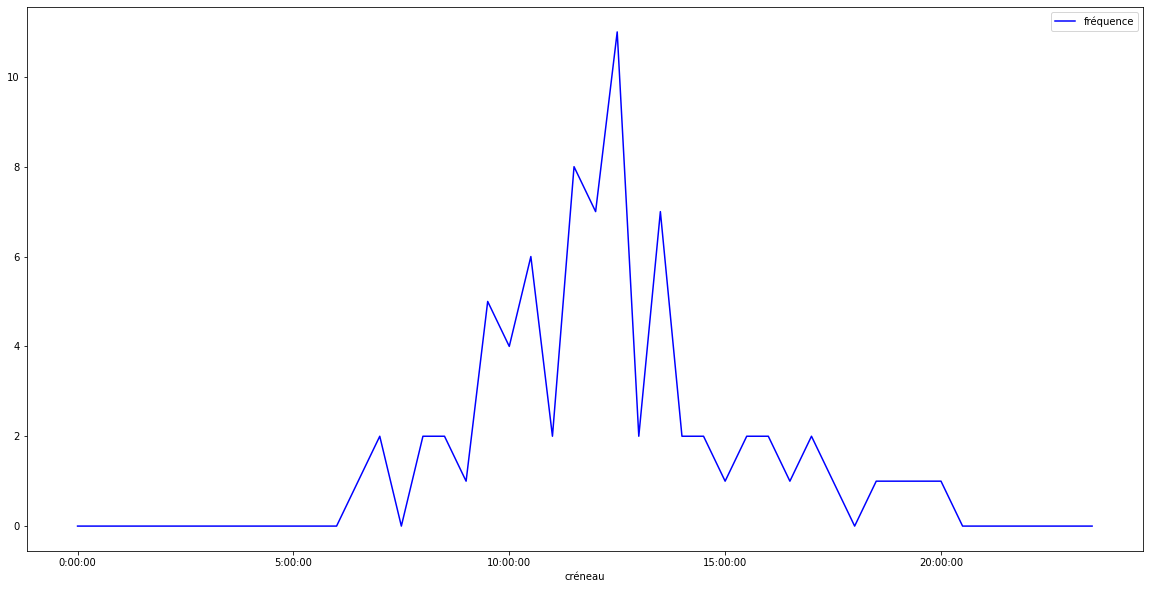

In [ ]:
#plt.figure(figsize=(20,10))
df_duree_moy_cafe.plot(x='créneau', y='fréquence', color='blue', figsize=(20,10))
plt.show()

### Analyse du graphe

On observe une cohérence dans l'allure du graphe avec une fréquence d'utilisation plutôt aux moments de la fin de matin et midi, ce qui correspond aux stéréotypes d'utilisation. On note surtout l'absence d'utilisation de la machine à café de 20:00:00 à 6:30:00 (la nuit).

In [ ]:
new_plages_activite_appareil_2_copy = new_plages_activite_appareil_2.copy()
ajout_jour(new_plages_activite_appareil_2_copy)

début                  fin    durée activité  jour
0   2020-03-24 12:21:59  2020-03-24 12:25:01  0:03:02     Café   Mar
1   2020-03-24 13:36:00  2020-03-24 13:36:01  0:00:01     Café   Mar
2   2020-03-25 11:47:00  2020-03-25 11:47:01  0:00:01     Café  Merc
3   2020-03-27 13:05:59  2020-03-27 13:06:00  0:00:01     Café   Ven
4   2020-03-27 13:25:00  2020-03-27 13:25:01  0:00:01     Café   Ven
..                  ...                  ...      ...      ...   ...
71  2020-08-01 06:31:00  2020-08-01 06:31:01  0:00:01     Café   Sam
72  2020-08-01 08:23:00  2020-08-01 08:23:01  0:00:01     Café   Sam
73  2020-08-02 13:29:59  2020-08-02 13:30:00  0:00:01     Café   Dim
74  2020-08-06 17:07:59  2020-08-06 17:08:00  0:00:01     Café   Jeu
75  2020-08-13 08:06:00  2020-08-13 08:06:01  0:00:01     Café   Jeu

[76 rows x 5 columns]

In [ ]:
df_duree_moy_jour_cafe = pd.DataFrame(index=creneau, columns=day_of_week)

In [ ]:
def put_moy_duree_jour2(dfa,dfb):
  n=dfa.shape[0] #lignes
  m=dfa.shape[1] #colonnes
  for i in range(m):
    for j in range(n):
      dfa.iat[j,i] = get_duree_moy_jour(dfb,dfa.index[j],dfa.columns[i])[1]
  return dfa

put_moy_duree_jour2(df_duree_moy_jour_cafe,new_plages_activite_appareil_2_copy)

Lun Mar Merc Jeu Ven Sam Dim
0:00:00    0   0    0   0   0   0   0
0:30:00    0   0    0   0   0   0   0
1:00:00    0   0    0   0   0   0   0
1:30:00    0   0    0   0   0   0   0
2:00:00    0   0    0   0   0   0   0
2:30:00    0   0    0   0   0   0   0
3:00:00    0   0    0   0   0   0   0
3:30:00    0   0    0   0   0   0   0
4:00:00    0   0    0   0   0   0   0
4:30:00    0   0    0   0   0   0   0
5:00:00    0   0    0   0   0   0   0
5:30:00    0   0    0   0   0   0   0
6:00:00    0   0    0   0   0   0   0
6:30:00    0   0    0   0   0   1   0
7:00:00    1   0    0   0   1   0   0
7:30:00    0   0    0   0   0   0   0
8:00:00    1   0    0   1   0   0   0
8:30:00    0   1    0   0   0   1   0
9:00:00    0   0    0   1   0   0   0
9:30:00    3   0    0   1   0   0   1
10:00:00   1   0    0   3   0   0   0
10:30:00   0   1    2   1   0   2   0
11:00:00   2   0    0   0   0   0   0
11:30:00   1   2    0   0   2   1   2
12:00:00   0   1    2   0   1   1   2
12:30:00   0   2    0   0   4   4   1
13:00:00   0   0    0   0   1   1   0
13:30:00   2   1    1   1   1   0   1
14:00:00   1   0    0   1   0   0   0
14:30:00   1   0    1   0   0   0   0
15:00:00   1   0    0   0   0   0   0
15:30:00   0   1    0   1   0   0   0
16:00:00   0   0    0   2   0   0   0
16:30:00   0   0    1   0   0   0   0
17:00:00   0   0    0   1   0   1   0
17:30:00   0   0    0   0   0   0   1
18:00:00   0   0    0   0   0   0   0
18:30:00   0   0    0   0   1   0   0
19:00:00   1   0    0   0   0   0   0
19:30:00   1   0    0   0   0   0   0
20:00:00   0   0    0   1   0   0   0
20:30:00   0   0    0   0   0   0   0
21:00:00   0   0    0   0   0   0   0
21:30:00   0   0    0   0   0   0   0
22:00:00   0   0    0   0   0   0   0
22:30:00   0   0    0   0   0   0   0
23:00:00   0   0    0   0   0   0   0
23:30:00   0   0    0   0   0   0   0

### Sous-étude n°3

Etude du lave-vaiselle (4)

In [ ]:
new_plages_activite_appareil_4

début                  fin    durée        activité
0    2020-03-24 12:51:59  2020-03-24 13:06:00  0:14:01  Lave-vaisselle
1    2020-03-24 13:28:00  2020-03-24 13:31:01  0:03:01  Lave-vaisselle
2    2020-03-24 14:21:55  2020-03-24 14:25:32  0:03:37  Lave-vaisselle
3    2020-03-26 12:55:59  2020-03-26 12:58:00  0:02:01  Lave-vaisselle
4    2020-03-26 13:32:00  2020-03-26 13:35:00  0:03:00  Lave-vaisselle
..                   ...                  ...      ...             ...
145  2020-08-19 18:07:00  2020-08-19 18:21:00  0:14:00  Lave-vaisselle
146  2020-08-19 18:42:59  2020-08-19 18:45:59  0:03:00  Lave-vaisselle
147  2020-08-19 19:34:00  2020-08-19 19:37:01  0:03:01  Lave-vaisselle
148  2020-08-23 20:42:00  2020-08-23 20:56:01  0:14:01  Lave-vaisselle
149  2020-08-23 21:17:00  2020-08-23 21:21:00  0:04:00  Lave-vaisselle

[150 rows x 4 columns]

In [ ]:
df_duree_moy_vaisselle = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

put_moy_duree(new_plages_activite_appareil_4)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '0:14:02',
  '0:03:00',
  '0:14:01',
  '0:07:00',
  '0:02:28',
  '0:08:58',
  '0:08:39',
  '0:08:38',
  '0:07:00',
  '0:04:20',
  '0:04:33',
  '0:05:40',
  '0:08:03',
  '0:04:40',
  '

In [ ]:
df_duree_moy_vaisselle['créneau']=put_moy_duree(new_plages_activite_appareil_4)[0]
df_duree_moy_vaisselle['durée_moy']=put_moy_duree(new_plages_activite_appareil_4)[1]
df_duree_moy_vaisselle['fréquence']=put_moy_duree(new_plages_activite_appareil_4)[2]

In [ ]:
df_duree_moy_vaisselle

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00       NaN          0
2    1:00:00       NaN          0
3    1:30:00       NaN          0
4    2:00:00       NaN          0
5    2:30:00       NaN          0
6    3:00:00       NaN          0
7    3:30:00       NaN          0
8    4:00:00       NaN          0
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00       NaN          0
14   7:00:00       NaN          0
15   7:30:00       NaN          0
16   8:00:00       NaN          0
17   8:30:00       NaN          0
18   9:00:00   0:14:02          1
19   9:30:00   0:03:00          1
20  10:00:00   0:14:01          1
21  10:30:00   0:07:00          3
22  11:00:00   0:02:28          2
23  11:30:00   0:08:58          4
24  12:00:00   0:08:39          6
25  12:30:00   0:08:38          8
26  13:00:00   0:07:00         11
27  13:30:00   0:04:20         12
28  14:00:00   0:04:33          9
29  14:30:00   0:05:40         11
30  15:00:00   0:08:03          6
31  15:30:00   0:04:40          6
32  16:00:00   0:03:45          4
33  16:30:00   0:06:40          6
34  17:00:00   0:05:30          6
35  17:30:00   0:09:00          2
36  18:00:00   0:08:01          7
37  18:30:00   0:03:23          5
38  19:00:00   0:07:00          5
39  19:30:00   0:03:26          7
40  20:00:00   0:14:02          2
41  20:30:00   0:06:26          7
42  21:00:00   0:04:00          1
43  21:30:00   0:07:58          5
44  22:00:00   0:03:54          3
45  22:30:00   0:08:00          2
46  23:00:00   0:02:56          4
47  23:30:00   0:03:57          3

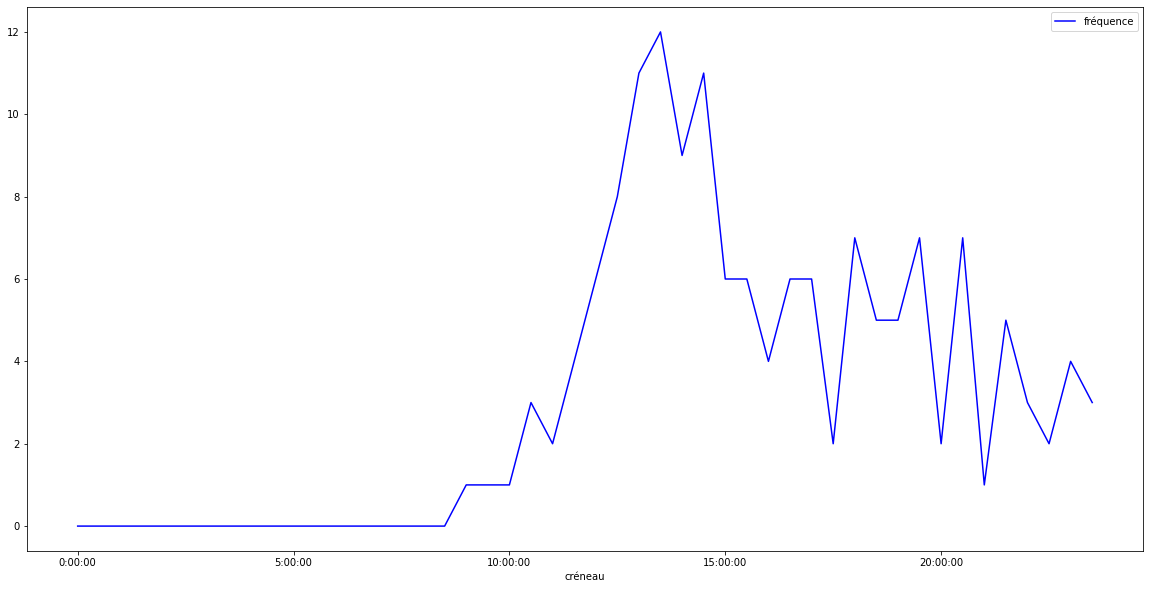

In [ ]:
df_duree_moy_vaisselle.plot(x='créneau', y='fréquence', color='blue', figsize=(20,10))
plt.show()

### Analyse du graphe

On trouve une certaine cohérence notamment l'absence d'utilisation durant la nuit (de 00:00 à 08:30, étendue jusque 10:00). En revanche les durées des plages retenues sont curieuses en comparaison avec un cycle standard qu'on dirait être plutôt aux alentours de 30 min (on en est loin...).
On observe que la fréquence la plus élevée d'utilisation est en début d'après-midi (de 12:30 à 14:30), ce qui peut paraître cohérence par exemple dans le scénario suivant : *après avoir manger, l'habitant lance le lave-vaisselle*


In [ ]:
new_plages_activite_appareil_4_copy = new_plages_activite_appareil_4.copy()
ajout_jour(new_plages_activite_appareil_4_copy)

début                  fin    durée        activité  jour
0    2020-03-24 12:51:59  2020-03-24 13:06:00  0:14:01  Lave-vaisselle   Mar
1    2020-03-24 13:28:00  2020-03-24 13:31:01  0:03:01  Lave-vaisselle   Mar
2    2020-03-24 14:21:55  2020-03-24 14:25:32  0:03:37  Lave-vaisselle   Mar
3    2020-03-26 12:55:59  2020-03-26 12:58:00  0:02:01  Lave-vaisselle   Jeu
4    2020-03-26 13:32:00  2020-03-26 13:35:00  0:03:00  Lave-vaisselle   Jeu
..                   ...                  ...      ...             ...   ...
145  2020-08-19 18:07:00  2020-08-19 18:21:00  0:14:00  Lave-vaisselle  Merc
146  2020-08-19 18:42:59  2020-08-19 18:45:59  0:03:00  Lave-vaisselle  Merc
147  2020-08-19 19:34:00  2020-08-19 19:37:01  0:03:01  Lave-vaisselle  Merc
148  2020-08-23 20:42:00  2020-08-23 20:56:01  0:14:01  Lave-vaisselle   Dim
149  2020-08-23 21:17:00  2020-08-23 21:21:00  0:04:00  Lave-vaisselle   Dim

[150 rows x 5 columns]

In [ ]:
df_duree_moy_jour_vaisselle = pd.DataFrame(index=creneau, columns=day_of_week)

In [ ]:
put_moy_duree_jour2(df_duree_moy_jour_vaisselle,new_plages_activite_appareil_4_copy)

Lun Mar Merc Jeu Ven Sam Dim
0:00:00    0   0    0   0   0   0   0
0:30:00    0   0    0   0   0   0   0
1:00:00    0   0    0   0   0   0   0
1:30:00    0   0    0   0   0   0   0
2:00:00    0   0    0   0   0   0   0
2:30:00    0   0    0   0   0   0   0
3:00:00    0   0    0   0   0   0   0
3:30:00    0   0    0   0   0   0   0
4:00:00    0   0    0   0   0   0   0
4:30:00    0   0    0   0   0   0   0
5:00:00    0   0    0   0   0   0   0
5:30:00    0   0    0   0   0   0   0
6:00:00    0   0    0   0   0   0   0
6:30:00    0   0    0   0   0   0   0
7:00:00    0   0    0   0   0   0   0
7:30:00    0   0    0   0   0   0   0
8:00:00    0   0    0   0   0   0   0
8:30:00    0   0    0   0   0   0   0
9:00:00    0   0    0   1   0   0   0
9:30:00    0   0    0   1   0   0   0
10:00:00   0   0    0   0   0   1   0
10:30:00   1   0    0   1   0   1   0
11:00:00   1   0    0   0   0   1   0
11:30:00   0   0    0   0   0   3   1
12:00:00   1   1    0   0   1   1   2
12:30:00   0   3    0   1   2   1   1
13:00:00   1   3    1   2   1   1   2
13:30:00   1   2    1   3   2   1   2
14:00:00   1   2    2   2   1   1   0
14:30:00   2   2    2   1   1   2   1
15:00:00   0   1    1   0   1   3   0
15:30:00   1   0    2   0   0   3   0
16:00:00   0   1    1   0   1   1   0
16:30:00   0   1    1   0   2   2   0
17:00:00   0   1    1   0   2   1   1
17:30:00   0   0    1   0   0   0   1
18:00:00   1   1    2   0   3   0   0
18:30:00   1   1    1   0   1   0   1
19:00:00   1   1    1   0   2   0   0
19:30:00   2   1    1   0   3   0   0
20:00:00   1   1    0   0   0   0   0
20:30:00   2   1    0   1   2   0   1
21:00:00   0   0    0   1   0   0   0
21:30:00   1   1    0   0   0   1   2
22:00:00   0   0    0   1   0   1   1
22:30:00   1   1    0   0   0   0   0
23:00:00   0   1    0   0   0   1   2
23:30:00   1   1    0   0   0   0   1

### Analyse de la table

Il est difficile de tirer des créneaux en particulier pour l'activité du lave-vaisselle, sauf peut-être de 12:30 à 14:30. On retient surtout une absence d'une activité de 00:00 à 10:00, c'est-à-dire la nuit.

### Sous-étude n°4

Analyse de la lumière de la cuisinière

Problème : il manque la plage pour le jour 2020-06-11 (non résolu)

In [ ]:
new_plages_activite_appareil_7[200:250]

début                  fin     durée activité
200  2020-06-05 17:23:00  2020-06-05 17:31:00   0:08:00  Lumière
201  2020-06-05 20:00:00  2020-06-05 20:02:00   0:02:00  Lumière
202  2020-06-06 06:17:00  2020-06-06 06:24:00   0:07:00  Lumière
203  2020-06-06 06:33:00  2020-06-06 18:55:00  12:22:00  Lumière
204  2020-06-06 19:04:00  2020-06-06 19:46:01   0:42:01  Lumière
205  2020-06-07 05:04:00  2020-06-07 13:13:00   8:09:00  Lumière
206  2020-06-07 13:21:00  2020-06-07 18:55:00   5:34:00  Lumière
207  2020-06-07 19:04:00  2020-06-07 19:43:01   0:39:01  Lumière
208  2020-06-07 23:36:00  2020-06-07 23:44:00   0:08:00  Lumière
209  2020-06-08 05:04:00  2020-06-08 20:06:00  15:02:00  Lumière
210  2020-06-08 22:02:00  2020-06-08 22:11:00   0:09:00  Lumière
211  2020-06-09 05:04:00  2020-06-09 05:46:00   0:42:00  Lumière
212  2020-06-09 05:59:00  2020-06-09 19:03:00  13:04:00  Lumière
213  2020-06-09 19:11:00  2020-06-09 19:14:00   0:03:00  Lumière
214  2020-06-09 19:22:00  2020-06-09 19:53:01   0:31:01  Lumière
215  2020-06-10 05:17:00  2020-06-10 19:39:00  14:22:00  Lumière
216  2020-06-10 19:45:00  2020-06-10 19:47:00   0:02:00  Lumière
217  2020-06-12 05:05:00  2020-06-12 19:52:01  14:47:01  Lumière
218  2020-06-12 22:29:00  2020-06-12 22:30:13   0:01:13  Lumière
219  2020-06-13 05:03:00  2020-06-13 19:51:01  14:48:01  Lumière
220  2020-06-13 23:42:00  2020-06-14 00:00:00   0:18:00  Lumière
221  2020-06-14 05:03:00  2020-06-14 19:45:00  14:42:00  Lumière
222  2020-06-14 20:00:59  2020-06-14 21:09:00   1:08:01  Lumière
223  2020-06-15 05:03:00  2020-06-15 19:30:01  14:27:01  Lumière
224  2020-06-15 19:51:00  2020-06-15 20:28:00   0:37:00  Lumière
225  2020-06-15 21:41:00  2020-06-15 22:30:00   0:49:00  Lumière
226  2020-06-16 07:46:00  2020-06-16 14:32:00   6:46:00  Lumière
227  2020-06-16 17:27:00  2020-06-16 17:51:00   0:24:00  Lumière
228  2020-06-16 18:24:00  2020-06-16 18:28:00   0:04:00  Lumière
229  2020-06-16 19:06:00  2020-06-16 20:33:00   1:27:00  Lumière
230  2020-06-17 06:20:00  2020-06-17 06:30:00   0:10:00  Lumière
231  2020-06-17 08:27:00  2020-06-17 20:01:01  11:34:01  Lumière
232  2020-06-18 05:02:00  2020-06-18 19:44:01  14:42:01  Lumière
233  2020-06-19 05:03:00  2020-06-19 19:50:01  14:47:01  Lumière
234  2020-06-20 05:01:00  2020-06-20 19:45:00  14:44:00  Lumière
235  2020-06-20 19:52:00  2020-06-20 19:57:01   0:05:01  Lumière
236  2020-06-21 05:02:00  2020-06-21 19:54:01  14:52:01  Lumière
237  2020-06-21 20:49:00  2020-06-21 21:54:00   1:05:00  Lumière
238  2020-06-21 22:48:00  2020-06-21 22:59:00   0:11:00  Lumière
239  2020-06-21 23:06:00  2020-06-21 23:14:30   0:08:30  Lumière
240  2020-06-22 04:53:00  2020-06-22 15:01:00  10:08:00  Lumière
241  2020-06-22 16:37:00  2020-06-22 16:57:01   0:20:01  Lumière
242  2020-06-22 18:38:00  2020-06-22 18:56:00   0:18:00  Lumière
243  2020-06-23 05:12:00  2020-06-23 19:52:01  14:40:01  Lumière
244  2020-06-23 22:13:00  2020-06-23 22:15:00   0:02:00  Lumière
245  2020-06-24 04:58:00  2020-06-24 19:43:01  14:45:01  Lumière
246  2020-06-25 05:03:00  2020-06-25 20:13:01  15:10:01  Lumière
247  2020-06-26 05:06:00  2020-06-26 19:47:01  14:41:01  Lumière
248  2020-06-27 00:31:00  2020-06-27 00:51:01   0:20:01  Lumière
249  2020-06-27 05:07:00  2020-06-27 06:28:54   1:21:54  Lumière

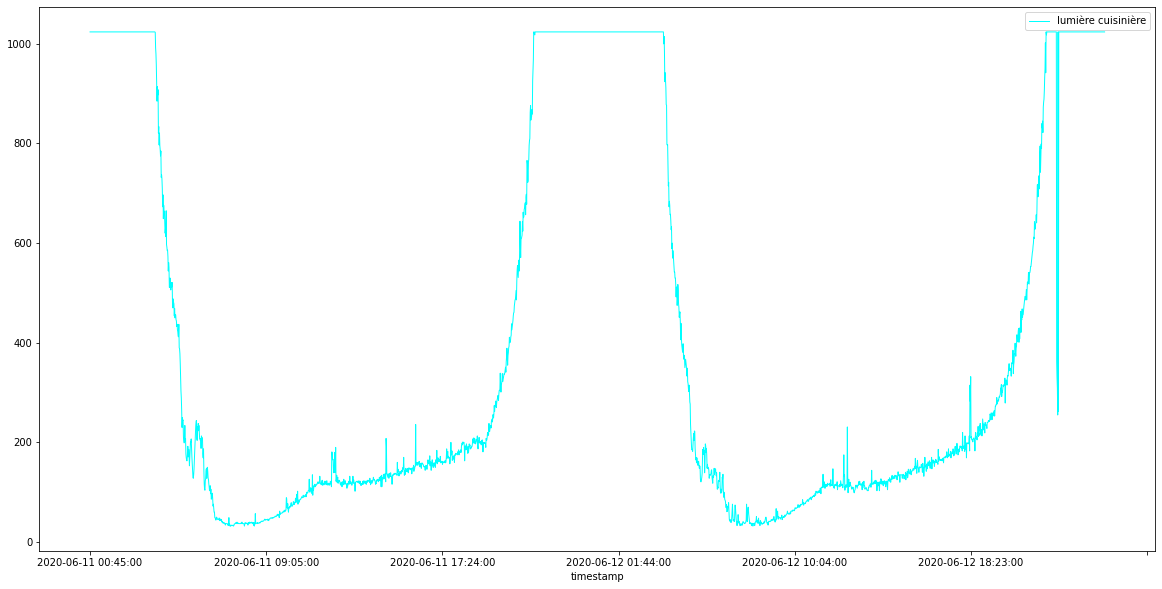

In [ ]:
df_cuisine7.plot(x='timestamp', y='value', color='cyan', label='lumière cuisinière', linewidth='1', figsize=(20,10))
#df_7_cuisine.plot(x='timestamp', y='value', color='cyan', label='lumière cuisine', linewidth='1', figsize=(20,10))

In [ ]:
plages_activite_appareil_7[1100:1150]

début                  fin    durée
1100  2020-06-09 18:53:00  2020-06-09 19:03:00  0:10:00
1101  2020-06-09 19:11:00  2020-06-09 19:14:00  0:03:00
1102  2020-06-09 19:22:00  2020-06-09 19:37:00  0:15:00
1103  2020-06-09 19:39:00  2020-06-09 19:40:00  0:01:00
1104  2020-06-09 19:42:00  2020-06-09 19:43:00  0:01:00
1105  2020-06-09 19:45:00  2020-06-09 19:45:01  0:00:01
1106  2020-06-09 19:48:00  2020-06-09 19:49:00  0:01:00
1107  2020-06-09 19:53:00  2020-06-09 19:53:01  0:00:01
1108  2020-06-09 21:40:00  2020-06-09 21:40:01  0:00:01
1109  2020-06-10 05:17:00  2020-06-10 05:17:01  0:00:01
1110  2020-06-10 05:19:00  2020-06-10 05:30:00  0:11:00
1111  2020-06-10 05:33:00  2020-06-10 05:33:01  0:00:01
1112  2020-06-10 05:35:00  2020-06-10 05:35:01  0:00:01
1113  2020-06-10 05:37:00  2020-06-10 05:37:01  0:00:01
1114  2020-06-10 05:40:00  2020-06-10 05:41:00  0:01:00
1115  2020-06-10 05:44:00  2020-06-10 05:46:00  0:02:00
1116  2020-06-10 05:48:00  2020-06-10 05:48:01  0:00:01
1117  2020-06-10 05:50:00  2020-06-10 05:50:01  0:00:01
1118  2020-06-10 05:52:00  2020-06-10 10:34:00  4:42:00
1119  2020-06-10 10:34:59  2020-06-10 10:35:00  0:00:01
1120  2020-06-10 10:36:00  2020-06-10 15:06:00  4:30:00
1121  2020-06-10 15:06:59  2020-06-10 15:07:00  0:00:01
1122  2020-06-10 15:08:00  2020-06-10 16:43:00  1:35:00
1123  2020-06-10 16:43:26  2020-06-10 18:04:00  1:20:34
1124  2020-06-10 18:07:00  2020-06-10 18:44:00  0:37:00
1125  2020-06-10 18:47:00  2020-06-10 19:24:00  0:37:00
1126  2020-06-10 19:29:00  2020-06-10 19:31:00  0:02:00
1127  2020-06-10 19:33:00  2020-06-10 19:39:00  0:06:00
1128  2020-06-10 19:45:00  2020-06-10 19:47:00  0:02:00
1129  2020-06-11 05:04:00  2020-06-11 13:34:00  8:30:00
1130  2020-06-11 13:34:21  2020-06-11 14:15:00  0:40:39
1131  2020-06-11 14:15:58  2020-06-11 14:15:59  0:00:01
1132  2020-06-11 14:17:00  2020-06-11 14:17:01  0:00:01
1133  2020-06-11 14:17:59  2020-06-11 14:18:00  0:00:01
1134  2020-06-11 14:19:00  2020-06-11 17:47:00  3:28:00
1135  2020-06-11 17:47:59  2020-06-11 17:48:00  0:00:01
1136  2020-06-11 17:49:00  2020-06-11 20:04:00  2:15:00
1137  2020-06-12 05:05:00  2020-06-12 06:23:00  1:18:00
1138  2020-06-12 06:23:59  2020-06-12 06:24:00  0:00:01
1139  2020-06-12 06:25:00  2020-06-12 10:22:00  3:57:00
1140  2020-06-12 10:22:41  2020-06-12 16:18:00  5:55:19
1141  2020-06-12 16:18:59  2020-06-12 16:19:00  0:00:01
1142  2020-06-12 16:20:00  2020-06-12 18:19:00  1:59:00
1143  2020-06-12 18:21:00  2020-06-12 18:21:01  0:00:01
1144  2020-06-12 18:23:00  2020-06-12 19:46:00  1:23:00
1145  2020-06-12 19:50:00  2020-06-12 19:50:01  0:00:01
1146  2020-06-12 19:52:00  2020-06-12 19:52:01  0:00:01
1147  2020-06-12 20:00:00  2020-06-12 20:00:01  0:00:01
1148  2020-06-12 22:29:00  2020-06-12 22:30:13  0:01:13
1149  2020-06-13 05:03:00  2020-06-13 07:12:00  2:09:00

In [ ]:
df_duree_moy_cuisiniere = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

put_moy_duree(new_plages_activite_appareil_7)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  '0:35:45',
  '0:08:40',
  '0:02:00',
  'NaN',
  '0:19:00',
  'NaN',
  '0:04:01',
  'NaN',
  'NaN',
  '11:32:03',
  '11:48:44',
  '10:15:38',
  '9:05:49',
  '7:33:51',
  '2:42:27',
  '6:25:55',
  '5:30:22',
  '3:54:00',
  '5:36:00',
  '4:29:00',
  '2:26:59',
  '0:39:12',
  '0:34:20',
  'NaN',
  '2:24:34',
  '1:39:00',
  '4:30:39',
  '3

In [ ]:
df_duree_moy_cuisiniere['créneau']=put_moy_duree(new_plages_activite_appareil_7)[0]
df_duree_moy_cuisiniere['durée_moy']=put_moy_duree(new_plages_activite_appareil_7)[1]
df_duree_moy_cuisiniere['fréquence']=put_moy_duree(new_plages_activite_appareil_7)[2]

In [ ]:
df_duree_moy_cuisiniere

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00   0:35:45          4
2    1:00:00   0:08:40          3
3    1:30:00   0:02:00          1
4    2:00:00       NaN          0
5    2:30:00   0:19:00          1
6    3:00:00       NaN          0
7    3:30:00   0:04:01          1
8    4:00:00       NaN          0
9    4:30:00       NaN          0
10   5:00:00  11:32:03         30
11   5:30:00  11:48:44         27
12   6:00:00  10:15:38         18
13   6:30:00   9:05:49         29
14   7:00:00   7:33:51         18
15   7:30:00   2:42:27          9
16   8:00:00   6:25:55          8
17   8:30:00   5:30:22          8
18   9:00:00   3:54:00          4
19   9:30:00   5:36:00          5
20  10:00:00   4:29:00          3
21  10:30:00   2:26:59          4
22  11:00:00   0:39:12          2
23  11:30:00   0:34:20          3
24  12:00:00       NaN          0
25  12:30:00   2:24:34          7
26  13:00:00   1:39:00          3
27  13:30:00   4:30:39          6
28  14:00:00   3:40:00          2
29  14:30:00   2:28:42          4
30  15:00:00   1:26:43          3
31  15:30:00   2:48:12          7
32  16:00:00   1:01:50          6
33  16:30:00   0:47:22         10
34  17:00:00   0:40:07          8
35  17:30:00   0:24:39         17
36  18:00:00   0:16:16         11
37  18:30:00   0:43:21         19
38  19:00:00   0:28:15         12
39  19:30:00   0:18:11         17
40  20:00:00   0:44:50         24
41  20:30:00   1:11:46         12
42  21:00:00   0:23:48          5
43  21:30:00   0:20:17         13
44  22:00:00   0:17:27         11
45  22:30:00   0:05:00          9
46  23:00:00   0:08:30          7
47  23:30:00   0:33:07          8

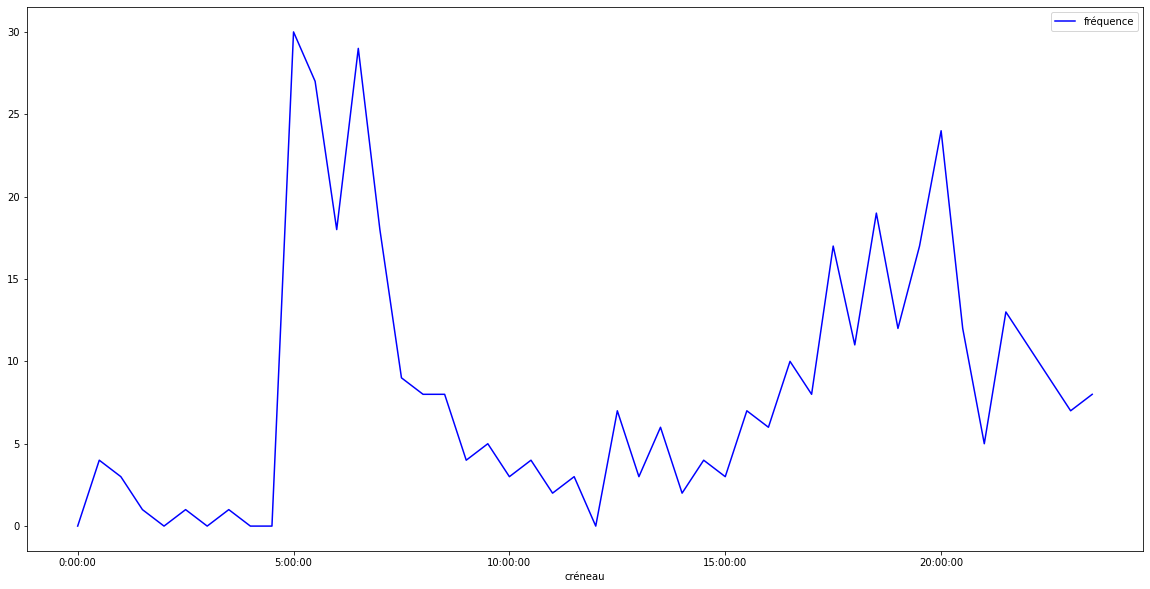

In [ ]:
df_duree_moy_cuisiniere.plot(x='créneau', y='fréquence', color='blue', figsize=(20,10))
plt.show()

In [ ]:
new_plages_activite_appareil_7_copy = new_plages_activite_appareil_7.copy()
ajout_jour(new_plages_activite_appareil_7_copy)

début                  fin     durée activité  jour
0    2020-03-24 06:05:00  2020-03-24 17:19:00  11:14:00  Lumière   Mar
1    2020-03-24 20:43:00  2020-03-24 20:43:25   0:00:25  Lumière   Mar
2    2020-03-25 06:28:00  2020-03-25 17:45:00  11:17:00  Lumière  Merc
3    2020-03-25 22:43:00  2020-03-25 22:50:00   0:07:00  Lumière  Merc
4    2020-03-26 07:34:00  2020-03-26 15:14:04   7:40:04  Lumière   Jeu
..                   ...                  ...       ...      ...   ...
388  2020-08-22 17:28:00  2020-08-22 17:35:01   0:07:01  Lumière   Sam
389  2020-08-22 17:54:00  2020-08-22 18:06:00   0:12:00  Lumière   Sam
390  2020-08-23 07:12:00  2020-08-23 09:41:00   2:29:00  Lumière   Dim
391  2020-08-23 16:55:00  2020-08-23 17:00:00   0:05:00  Lumière   Dim
392  2020-08-23 17:17:00  2020-08-23 18:13:00   0:56:00  Lumière   Dim

[393 rows x 5 columns]

In [ ]:
df_duree_moy_jour_cuisiniere = pd.DataFrame(index=creneau, columns=day_of_week)

In [ ]:
put_moy_duree_jour2(df_duree_moy_jour_cuisiniere,new_plages_activite_appareil_7_copy)

Lun Mar Merc Jeu Ven Sam Dim
0:00:00    0   0    0   0   0   0   0
0:30:00    0   0    2   1   0   1   0
1:00:00    0   1    0   0   0   2   0
1:30:00    0   0    0   0   1   0   0
2:00:00    0   0    0   0   0   0   0
2:30:00    0   0    0   0   0   1   0
3:00:00    0   0    0   0   0   0   0
3:30:00    0   0    0   0   0   1   0
4:00:00    0   0    0   0   0   0   0
4:30:00    0   0    0   0   0   0   0
5:00:00    5   5    2   5   5   4   4
5:30:00    4   5    4   5   4   3   2
6:00:00    2   3    2   1   2   4   4
6:30:00    2   5    6   2   3   6   5
7:00:00    4   2    2   0   3   2   5
7:30:00    1   0    0   3   1   2   2
8:00:00    1   3    1   1   0   1   1
8:30:00    0   1    1   2   2   1   1
9:00:00    0   0    0   0   0   1   3
9:30:00    0   1    0   0   0   2   2
10:00:00   0   0    0   0   1   1   1
10:30:00   0   0    2   0   1   0   1
11:00:00   0   1    0   0   0   0   1
11:30:00   0   0    1   0   1   0   1
12:00:00   0   0    0   0   0   0   0
12:30:00   0   1    4   0   1   0   1
13:00:00   0   0    1   0   1   1   0
13:30:00   1   0    1   0   1   1   2
14:00:00   0   0    0   1   0   0   1
14:30:00   0   0    2   0   2   0   0
15:00:00   0   1    0   0   1   1   0
15:30:00   0   1    2   1   0   3   0
16:00:00   0   1    2   0   1   1   1
16:30:00   2   0    3   1   1   2   1
17:00:00   3   0    3   0   0   1   1
17:30:00   1   3    0   3   4   1   5
18:00:00   4   0    2   0   0   4   1
18:30:00   5   3    2   2   1   4   2
19:00:00   1   4    1   1   2   2   1
19:30:00   3   2    5   4   1   1   1
20:00:00   6   2    4   3   2   4   3
20:30:00   0   1    2   2   2   3   2
21:00:00   0   1    2   0   0   0   2
21:30:00   5   2    1   0   1   1   3
22:00:00   2   2    1   3   2   0   1
22:30:00   2   2    2   0   3   0   0
23:00:00   0   1    2   1   1   0   2
23:30:00   1   0    2   0   1   3   1

### Analyse de la table

On observe des blocs dans l'utilisation de la lumière ou plutôt concernant l'enclenchement de cette activité :
- Le matin de 5:00 à 07:00
- Le soir de 17:30 à 20:30 (mais aussi sur le coup de 21:30-22:00 mais un peu moins)
- On n'observe pas de bloc distinct concernant l'horaire du midi. Cela peut vouloir dire que l'habitant ne mange peut-être pas tous les midis chez lui, ou bien que son horaire du repas du midi est trop étalé et ne possède pas de créneau donc d'habitude précise.

## Etude des appareils de la salle de bain

Utilisation des capteurs suivants :
- Courant de la machine à laver (SMP05 - 6636)
- Taux d'humidité de la pièce (TH01 - 6222)
- Température de la pièce (TH01 - 6623).
- Lumière de la salle de bain (L03 - 7125) 

On peut mener une analyse particulière concernant la machine à laver pour l'activité "laver le linge" ainsi que pour le taux d'humidity pour "prendre une douche" (éventuellement couplé à la température, à voir).

In [ ]:
path1_14 = "split_sensor_float6636_1min.csv"
path2_24 = "split_sensor_float6222_1min.csv"
path3_34 = "split_sensor_float6223_1min.csv"
path4_44 = "split_sensor_int7125_1min.csv"

df_sdb = pd.read_csv(path1_14)
df_bis_sdb = pd.read_csv(path2_24)
df_3_sdb = pd.read_csv(path3_34)
df_4_sdb = pd.read_csv(path4_44)

In [ ]:
nb_donnee_par_jour = 60 * 24
nb_donnee_par_sem = nb_donnee_par_jour * 7
#start = nb_donnee_par_jour*101
start=0

In [ ]:
df_sdb1 = df_sdb[start:start + nb_donnee_par_sem*3]
df_sdb2 = df_bis_sdb[start:start + nb_donnee_par_sem]
df_sdb3 = df_3_sdb[start:start + nb_donnee_par_sem]
df_sdb4 = df_4_sdb[start:start + nb_donnee_par_sem]

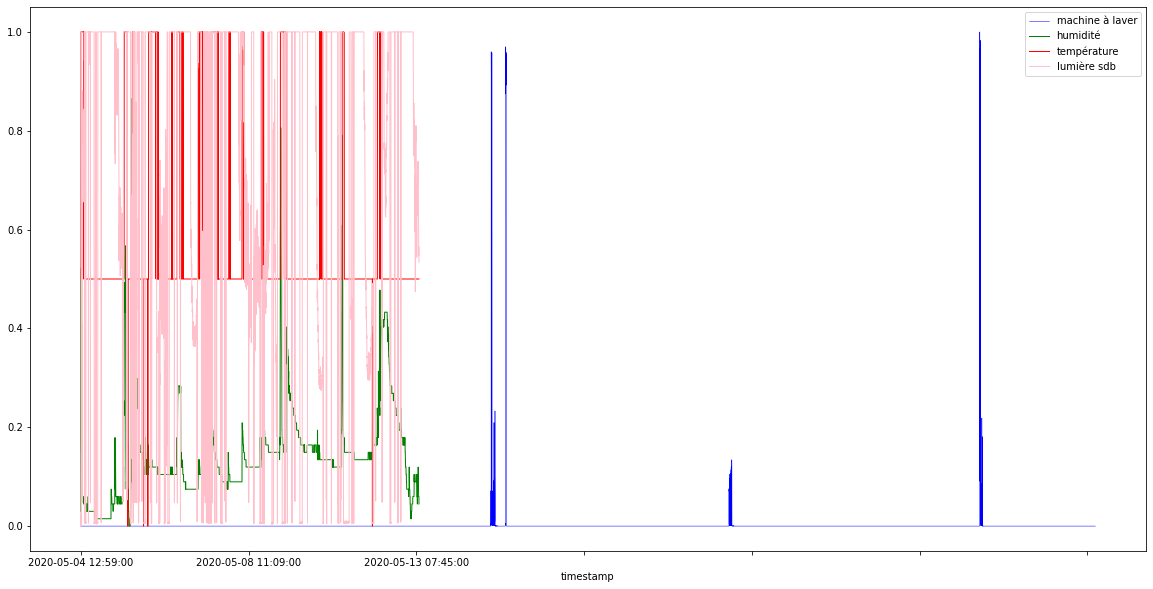

In [ ]:
ax4 = normalize(df_sdb1).plot(x='timestamp', y='value', color='blue', label='machine à laver', linewidth='0.5', figsize=(20,10))
normalize(df_sdb2).plot(x='timestamp', y='value', color='green', label='humidité', linewidth='1', ax=ax4, figsize=(20,10))
normalize(df_sdb3).plot(x='timestamp', y='value', color='red', label='température', linewidth='1', ax=ax4, figsize=(20,10))
normalize(df_sdb4).plot(x='timestamp', y='value', color='pink', label='lumière sdb', linewidth='1', ax=ax4, figsize=(20,10))
plt.show()

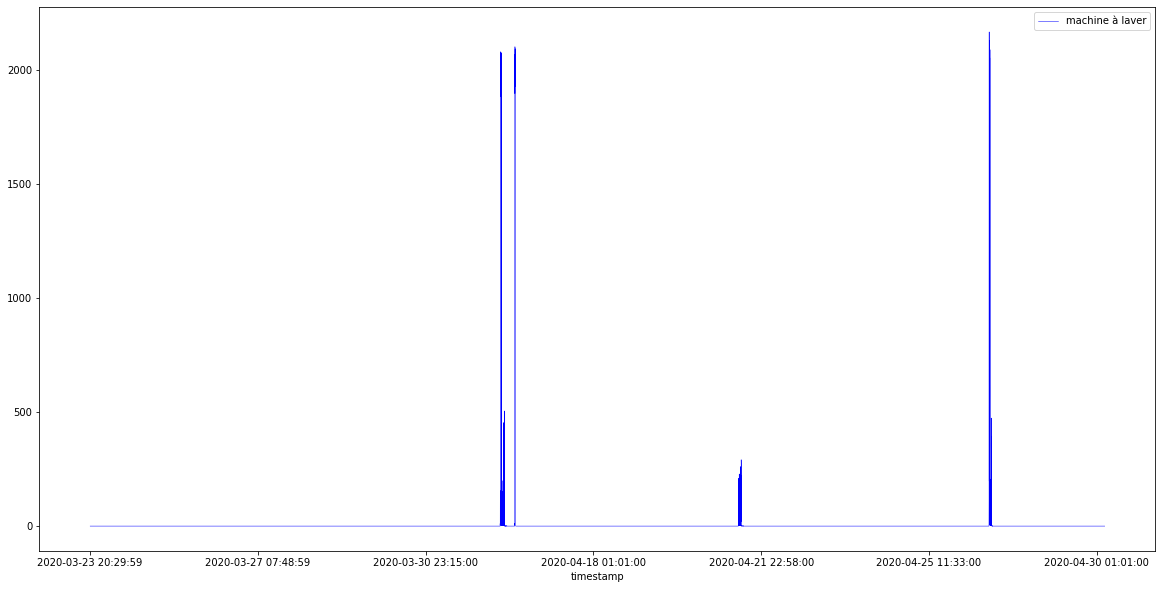

In [ ]:
df_sdb1.plot(x='timestamp', y='value', color='blue', label='machine à laver', linewidth='0.5', figsize=(20,10))
#df_sdb.plot(x='timestamp', y='value', color='blue', label='machine à laver', linewidth='0.5', figsize=(20,10))

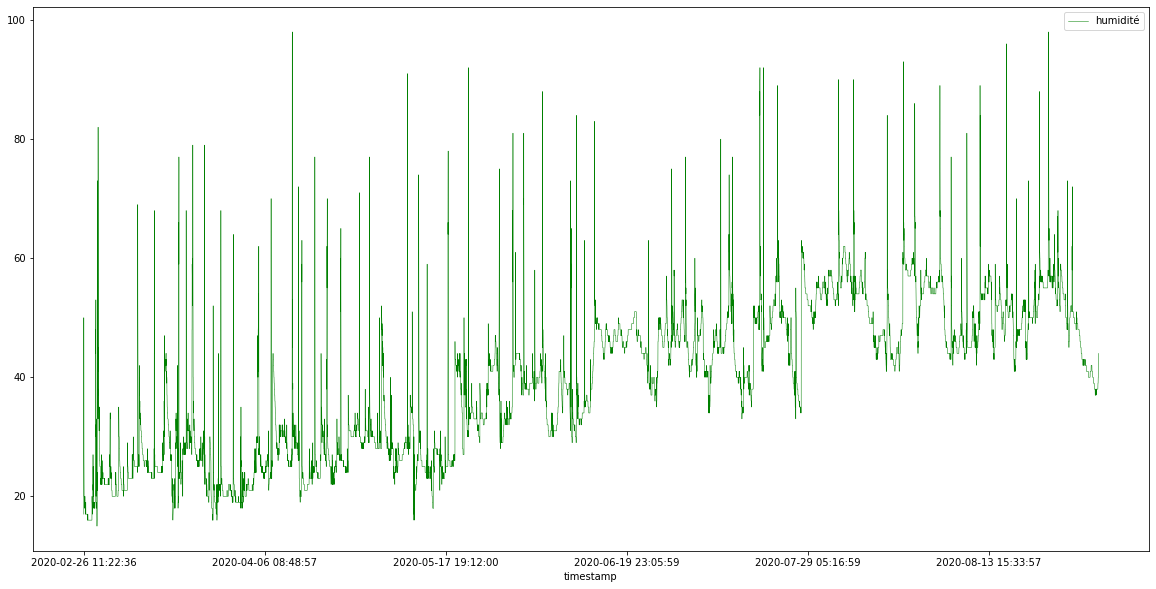

In [ ]:
#df_sdb2.plot(x='timestamp', y='value', color='green', label='humidité', linewidth='0.5', figsize=(20,10))
df_bis_sdb.plot(x='timestamp', y='value', color='green', label='humidité', linewidth='0.5', figsize=(20,10))

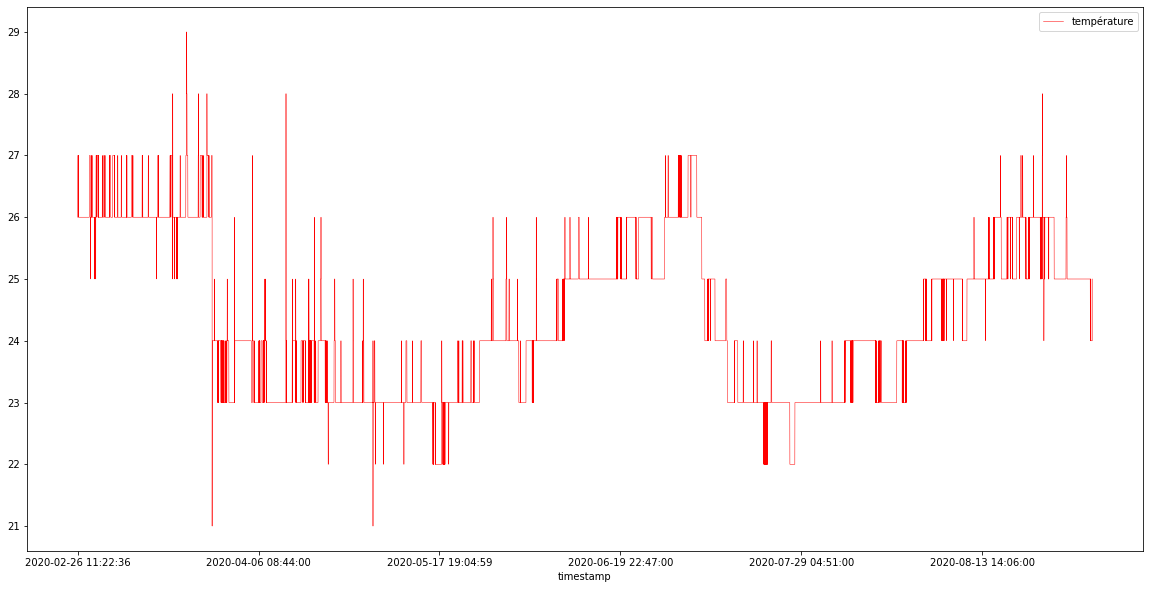

In [ ]:
#df_sdb3.plot(x='timestamp', y='value', color='red', label='température', linewidth='0.5', figsize=(20,10))
df_3_sdb.plot(x='timestamp', y='value', color='red', label='température', linewidth='0.5', figsize=(20,10))

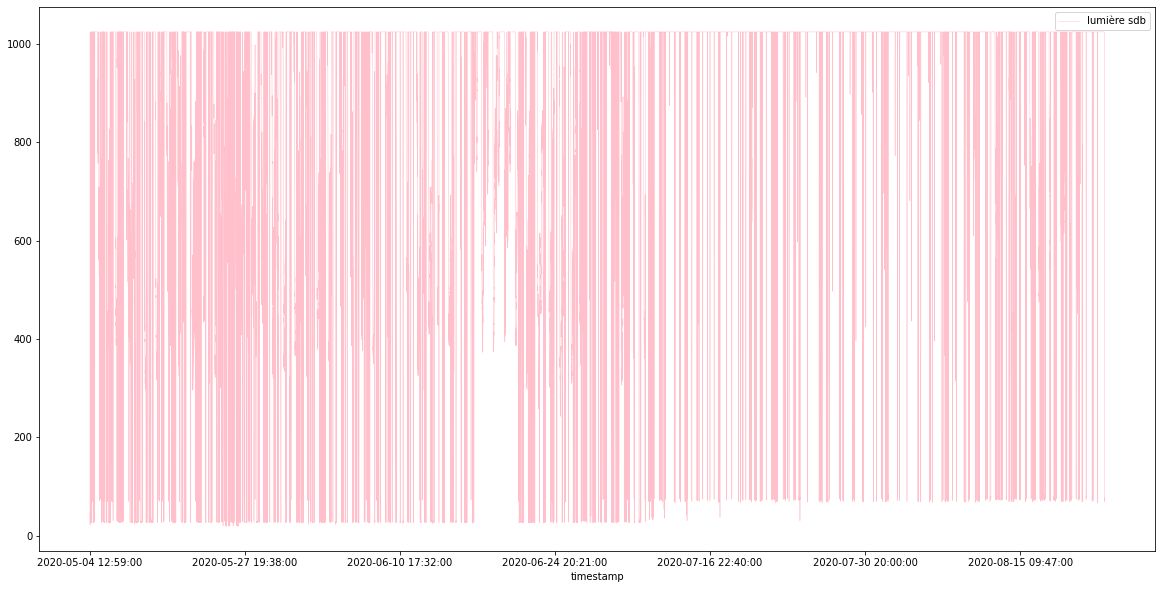

In [ ]:
#df_sdb4.plot(x='timestamp', y='value', color='pink', label='lumière sdb', linewidth='0.5', figsize=(20,10))
df_4_sdb.plot(x='timestamp', y='value', color='pink', label='lumière sdb', linewidth='0.5', figsize=(20,10))

In [ ]:
def get_en_marche_mach_laver(df, seuil1,seuil2):
    en_marche_appareil = []
    #df = df_sdb
    #seuil1 = 1900 et seuil2 = 2200
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] >=seuil1) and (df['value'][i] <=seuil2) and (df['timestamp'][i] > '2020-03-24 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [ ]:
# Pas utilisé
# Pour le capteur d'humidité

def get_en_marche_hum(df, seuil):
    en_marche_appareil = []
    #df = df_sdb
    #seuil1 = 1900 et seuil2 = 2200
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] >=seuil) and (df['timestamp'][i] > '2020-02-26 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [ ]:
def get_en_marche_lum_sdb(df, seuil):
    en_marche_appareil = []
    #df = df_4_sdb
    #seuil = 15
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] <=seuil) and (df['timestamp'][i] > '2020-05-04 00:00:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00')
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [ ]:
get_en_marche_mach_laver(df_sdb,1900,2200)

['2020-04-09 12:19:59',
 '2020-04-09 12:21:00',
 '2020-04-09 12:22:00',
 '2020-04-09 12:22:59',
 '2020-04-09 12:26:00',
 '2020-04-09 12:27:00',
 '2020-04-09 12:28:00',
 '2020-04-09 12:28:59',
 '2020-04-09 12:31:00',
 '2020-04-09 12:32:00',
 '2020-04-09 12:33:59',
 '2020-04-09 12:35:00',
 '2020-04-09 12:35:59',
 '2020-04-09 12:37:00',
 '2020-04-09 12:43:00',
 '2020-04-09 12:43:59',
 '2020-04-10 12:27:00',
 '2020-04-10 12:28:00',
 '2020-04-10 12:29:00',
 '2020-04-10 12:31:00',
 '2020-04-10 12:32:00',
 '2020-04-10 12:33:00',
 '2020-04-10 12:33:59',
 '2020-04-10 12:34:59',
 '2020-04-10 12:35:59',
 '2020-04-10 12:36:59',
 '2020-04-10 12:38:00',
 '2020-04-10 12:38:59',
 '2020-04-10 12:40:00',
 '2020-04-10 12:41:00',
 '2020-04-10 12:41:59',
 '2020-04-10 12:42:59',
 '2020-04-10 12:44:00',
 '2020-04-10 12:45:00',
 '2020-04-10 12:46:00',
 '2020-04-10 12:47:00',
 '2020-04-10 12:48:00',
 '2020-04-10 12:49:00',
 '2020-04-10 12:50:00',
 '2020-04-10 12:50:14',
 '2020-04-26 17:30:00',
 '2020-04-26 17:

In [ ]:
get_en_marche_lum_sdb(df_4_sdb, 30)

['2020-05-04 13:01:00',
 '2020-05-04 13:03:00',
 '2020-05-04 13:04:00',
 '2020-05-04 13:05:00',
 '2020-05-04 13:06:00',
 '2020-05-04 13:07:00',
 '2020-05-04 13:08:00',
 '2020-05-04 13:16:00',
 '2020-05-04 13:17:00',
 '2020-05-04 13:18:00',
 '2020-05-04 13:19:00',
 '2020-05-04 13:20:00',
 '2020-05-04 14:52:00',
 '2020-05-04 15:17:00',
 '2020-05-04 15:18:00',
 '2020-05-04 15:19:00',
 '2020-05-04 15:20:00',
 '2020-05-04 15:21:00',
 '2020-05-04 15:22:00',
 '2020-05-04 15:23:00',
 '2020-05-04 15:24:00',
 '2020-05-04 15:25:00',
 '2020-05-04 15:26:00',
 '2020-05-04 15:27:00',
 '2020-05-04 15:28:00',
 '2020-05-04 15:29:00',
 '2020-05-04 15:30:00',
 '2020-05-04 15:31:00',
 '2020-05-04 15:32:00',
 '2020-05-04 15:33:00',
 '2020-05-04 16:48:00',
 '2020-05-04 16:49:00',
 '2020-05-04 19:37:00',
 '2020-05-04 19:38:00',
 '2020-05-04 19:39:00',
 '2020-05-04 19:40:00',
 '2020-05-04 19:41:00',
 '2020-05-04 19:42:00',
 '2020-05-04 19:43:00',
 '2020-05-04 19:44:00',
 '2020-05-04 19:45:00',
 '2020-05-04 19:

In [ ]:
plages_mach_laver = pd.DataFrame(columns=['début','fin','durée'])
plages_lum_sdb = pd.DataFrame(columns=['début','fin','durée'])

In [ ]:
def get_plage_sdb(dfa):
    if(dfa.equals(df_sdb)):
      activite_appareil = get_en_marche_mach_laver(dfa,1900,2200)
    if(dfa.equals(df_4_sdb)):
      activite_appareil = get_en_marche_lum_sdb(dfa, 30)
    n = len(activite_appareil)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_activite_appareil=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    delta_sec = timedelta(seconds=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(activite_appareil[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(activite_appareil[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute) :
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date2.month == 3) :
                                    intermediate.append(date1)
                                else :
                                    if(len(intermediate)!=0):
                                        debut.append(str(intermediate[0]))
                                        fin.append(str(date1))
                                        duree.append(str(date1-intermediate[0]))
                                        intermediate=[]
                                    else:
                                        debut.append(str(date1))
                                        fin.append(str(date1+delta_sec))
                                        duree.append(str(delta_sec))
                            if (date1.day == 30) and (date2.month == date1.month +1):
                                intermediate.append(date1)
                            if (date1.day == 31) and (date2.month == date1.month + 1) :
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    intermediate=[]
                                else:
                                    debut.append(str(date1))
                                    fin.append(str(date1+delta_sec))
                                    duree.append(str(delta_sec))
                    else :
                      if(len(intermediate)!=0):
                        debut.append(str(intermediate[0]))
                        fin.append(str(date1))
                        duree.append(str(date1-intermediate[0]))
                        intermediate=[]
                      else:
                        debut.append(str(date1))
                        fin.append(str(date1+delta_sec))
                        duree.append(str(delta_sec))
                else :
                  if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                  else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                else:
                  debut.append(str(date1))
                  fin.append(str(date1+delta_sec))
                  duree.append(str(delta_sec))            
    plages_activite_appareil=[debut,fin,duree]
    return plages_activite_appareil

In [ ]:
plages_mach_laver['début'] = get_plage_sdb(df_sdb)[0]
plages_mach_laver['fin'] = get_plage_sdb(df_sdb)[1]
plages_mach_laver['durée'] = get_plage_sdb(df_sdb)[2]
plages_mach_laver

début                  fin    durée
0    2020-04-09 12:19:59  2020-04-09 12:20:00  0:00:01
1    2020-04-09 12:21:00  2020-04-09 12:22:00  0:01:00
2    2020-04-09 12:22:59  2020-04-09 12:23:00  0:00:01
3    2020-04-09 12:26:00  2020-04-09 12:28:00  0:02:00
4    2020-04-09 12:28:59  2020-04-09 12:29:00  0:00:01
..                   ...                  ...      ...
294  2020-08-21 13:55:00  2020-08-21 13:55:01  0:00:01
295  2020-08-21 13:55:59  2020-08-21 13:56:00  0:00:01
296  2020-08-21 13:57:00  2020-08-21 14:02:00  0:05:00
297  2020-08-21 14:13:00  2020-08-21 14:13:01  0:00:01
298  2020-08-22 21:20:00  2020-08-22 21:22:00  0:02:00

[299 rows x 3 columns]

In [ ]:
plages_lum_sdb['début'] = get_plage_sdb(df_4_sdb)[0]
plages_lum_sdb['fin'] = get_plage_sdb(df_4_sdb)[1]
plages_lum_sdb['durée'] = get_plage_sdb(df_4_sdb)[2]
plages_lum_sdb

début                  fin    durée
0    2020-05-04 13:01:00  2020-05-04 13:01:01  0:00:01
1    2020-05-04 13:03:00  2020-05-04 13:08:00  0:05:00
2    2020-05-04 13:16:00  2020-05-04 13:20:00  0:04:00
3    2020-05-04 14:52:00  2020-05-04 14:52:01  0:00:01
4    2020-05-04 15:17:00  2020-05-04 15:33:00  0:16:00
..                   ...                  ...      ...
676  2020-07-08 22:20:00  2020-07-08 22:22:00  0:02:00
677  2020-07-08 22:54:00  2020-07-08 23:23:00  0:29:00
678  2020-07-08 23:39:00  2020-07-09 00:02:00  0:23:00
679  2020-07-09 00:19:00  2020-07-09 00:19:01  0:00:01
680  2020-07-09 09:42:00  2020-07-09 09:42:01  0:00:01

[681 rows x 3 columns]

In [ ]:
new_plages_mach_laver = pd.DataFrame(columns=['début','fin','durée'])
new_plages_lum_sdb = pd.DataFrame(columns=['début','fin','durée'])

In [ ]:
new_plages_mach_laver['début']=retablir_plages(plages_mach_laver,10)[0]
new_plages_mach_laver['fin']=retablir_plages(plages_mach_laver,10)[1]
new_plages_mach_laver['durée']=retablir_plages(plages_mach_laver,10)[2]
new_plages_mach_laver

début                  fin    durée
0   2020-04-09 12:19:59  2020-04-09 12:44:00  0:24:01
1   2020-04-10 12:27:00  2020-04-10 12:50:15  0:23:15
2   2020-04-26 17:30:00  2020-04-26 17:56:01  0:26:01
3   2020-05-04 15:04:59  2020-05-04 15:29:00  0:24:01
4   2020-05-11 09:39:00  2020-05-11 09:56:00  0:17:00
5   2020-05-11 10:07:00  2020-05-11 10:08:00  0:01:00
6   2020-05-11 11:18:00  2020-05-11 11:35:01  0:17:01
7   2020-05-18 11:27:00  2020-05-18 11:28:03  0:01:03
8   2020-05-18 11:45:00  2020-05-18 12:06:01  0:21:01
9   2020-05-21 11:05:59  2020-05-21 11:21:00  0:15:01
10  2020-05-21 11:32:00  2020-05-21 11:32:01  0:00:01
11  2020-05-21 14:54:00  2020-05-21 15:17:00  0:23:00
12  2020-05-21 15:47:59  2020-05-21 15:48:00  0:00:01
13  2020-05-25 20:54:59  2020-05-25 21:19:00  0:24:01
14  2020-05-30 18:54:59  2020-05-30 19:24:00  0:29:01
15  2020-05-31 20:21:00  2020-05-31 20:43:01  0:22:01
16  2020-06-03 11:44:00  2020-06-03 12:07:00  0:23:00
17  2020-06-11 09:59:00  2020-06-11 10:25:00  0:26:00
18  2020-06-11 12:51:00  2020-06-11 13:12:01  0:21:01
19  2020-06-16 10:36:59  2020-06-16 10:48:01  0:11:02
20  2020-06-21 14:45:59  2020-06-21 15:10:00  0:24:01
21  2020-06-24 17:04:59  2020-06-24 17:27:00  0:22:01
22  2020-07-06 11:34:59  2020-07-06 12:06:00  0:31:01
23  2020-07-06 12:17:00  2020-07-06 12:18:00  0:01:00
24  2020-07-07 14:36:59  2020-07-07 14:54:00  0:17:01
25  2020-07-07 15:05:00  2020-07-07 15:06:00  0:01:00
26  2020-07-09 09:55:00  2020-07-09 10:19:01  0:24:01
27  2020-07-09 18:27:00  2020-07-09 18:54:00  0:27:00
28  2020-07-12 17:20:00  2020-07-12 17:49:01  0:29:01
29  2020-07-15 18:30:00  2020-07-15 18:54:59  0:24:59
30  2020-07-20 13:13:00  2020-07-20 13:44:59  0:31:59
31  2020-07-24 15:32:59  2020-07-24 16:03:01  0:30:02
32  2020-07-27 12:12:59  2020-07-27 12:42:01  0:29:02
33  2020-07-28 13:08:00  2020-07-28 13:44:00  0:36:00
34  2020-07-30 15:27:00  2020-07-30 15:55:01  0:28:01
35  2020-08-07 13:57:59  2020-08-07 14:28:00  0:30:01
36  2020-08-09 20:42:00  2020-08-09 20:51:01  0:09:01
37  2020-08-10 15:19:00  2020-08-10 15:47:01  0:28:01
38  2020-08-12 09:22:00  2020-08-12 09:35:01  0:13:01
39  2020-08-16 12:11:00  2020-08-16 12:31:00  0:20:00
40  2020-08-17 16:46:59  2020-08-17 16:55:00  0:08:01
41  2020-08-17 17:06:00  2020-08-17 17:06:01  0:00:01
42  2020-08-17 18:22:00  2020-08-17 18:43:00  0:21:00
43  2020-08-17 18:55:00  2020-08-17 18:55:01  0:00:01
44  2020-08-21 13:51:00  2020-08-21 14:02:00  0:11:00
45  2020-08-21 14:13:00  2020-08-21 14:13:01  0:00:01

In [ ]:
new_plages_lum_sdb['début']=retablir_plages(plages_lum_sdb,10)[0]
new_plages_lum_sdb['fin']=retablir_plages(plages_lum_sdb,10)[1]
new_plages_lum_sdb['durée']=retablir_plages(plages_lum_sdb,10)[2]
new_plages_lum_sdb

début                  fin    durée
0    2020-05-04 13:01:00  2020-05-04 13:20:00  0:19:00
1    2020-05-04 14:52:00  2020-05-04 14:52:01  0:00:01
2    2020-05-04 15:17:00  2020-05-04 15:33:00  0:16:00
3    2020-05-04 16:48:00  2020-05-04 16:49:00  0:01:00
4    2020-05-04 19:37:00  2020-05-04 20:12:00  0:35:00
..                   ...                  ...      ...
374  2020-07-08 09:57:00  2020-07-08 10:21:01  0:24:01
375  2020-07-08 20:02:00  2020-07-08 22:22:00  2:20:00
376  2020-07-08 22:54:00  2020-07-08 23:23:00  0:29:00
377  2020-07-08 23:39:00  2020-07-09 00:02:00  0:23:00
378  2020-07-09 00:19:00  2020-07-09 00:19:01  0:00:01

[379 rows x 3 columns]

In [ ]:
for i in range(new_plages_mach_laver.shape[0]):
  if(new_plages_mach_laver['durée'][i][3]!='a'):
    duree = datetime.strptime(new_plages_mach_laver['durée'][i], "%H:%M:%S")
    if (duree.minute<=1) and (duree.second<=1):
      new_plages_mach_laver.drop(i, 0, inplace=True)
new_plages_mach_laver.reset_index(inplace=True, drop=True)
new_plages_mach_laver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin    durée
0   2020-04-09 12:19:59  2020-04-09 12:44:00  0:24:01
1   2020-04-10 12:27:00  2020-04-10 12:50:15  0:23:15
2   2020-04-26 17:30:00  2020-04-26 17:56:01  0:26:01
3   2020-05-04 15:04:59  2020-05-04 15:29:00  0:24:01
4   2020-05-11 09:39:00  2020-05-11 09:56:00  0:17:00
5   2020-05-11 11:18:00  2020-05-11 11:35:01  0:17:01
6   2020-05-18 11:27:00  2020-05-18 11:28:03  0:01:03
7   2020-05-18 11:45:00  2020-05-18 12:06:01  0:21:01
8   2020-05-21 11:05:59  2020-05-21 11:21:00  0:15:01
9   2020-05-21 14:54:00  2020-05-21 15:17:00  0:23:00
10  2020-05-25 20:54:59  2020-05-25 21:19:00  0:24:01
11  2020-05-30 18:54:59  2020-05-30 19:24:00  0:29:01
12  2020-05-31 20:21:00  2020-05-31 20:43:01  0:22:01
13  2020-06-03 11:44:00  2020-06-03 12:07:00  0:23:00
14  2020-06-11 09:59:00  2020-06-11 10:25:00  0:26:00
15  2020-06-11 12:51:00  2020-06-11 13:12:01  0:21:01
16  2020-06-16 10:36:59  2020-06-16 10:48:01  0:11:02
17  2020-06-21 14:45:59  2020-06-21 15:10:00  0:24:01
18  2020-06-24 17:04:59  2020-06-24 17:27:00  0:22:01
19  2020-07-06 11:34:59  2020-07-06 12:06:00  0:31:01
20  2020-07-07 14:36:59  2020-07-07 14:54:00  0:17:01
21  2020-07-09 09:55:00  2020-07-09 10:19:01  0:24:01
22  2020-07-09 18:27:00  2020-07-09 18:54:00  0:27:00
23  2020-07-12 17:20:00  2020-07-12 17:49:01  0:29:01
24  2020-07-15 18:30:00  2020-07-15 18:54:59  0:24:59
25  2020-07-20 13:13:00  2020-07-20 13:44:59  0:31:59
26  2020-07-24 15:32:59  2020-07-24 16:03:01  0:30:02
27  2020-07-27 12:12:59  2020-07-27 12:42:01  0:29:02
28  2020-07-28 13:08:00  2020-07-28 13:44:00  0:36:00
29  2020-07-30 15:27:00  2020-07-30 15:55:01  0:28:01
30  2020-08-07 13:57:59  2020-08-07 14:28:00  0:30:01
31  2020-08-09 20:42:00  2020-08-09 20:51:01  0:09:01
32  2020-08-10 15:19:00  2020-08-10 15:47:01  0:28:01
33  2020-08-12 09:22:00  2020-08-12 09:35:01  0:13:01
34  2020-08-16 12:11:00  2020-08-16 12:31:00  0:20:00
35  2020-08-17 16:46:59  2020-08-17 16:55:00  0:08:01
36  2020-08-17 18:22:00  2020-08-17 18:43:00  0:21:00
37  2020-08-21 13:51:00  2020-08-21 14:02:00  0:11:00

In [ ]:
for i in range(new_plages_lum_sdb.shape[0]):
  if(new_plages_lum_sdb['durée'][i][3]!='a'):
    duree = datetime.strptime(new_plages_lum_sdb['durée'][i], "%H:%M:%S")
    if (duree.minute<=1) and (duree.second<=1):
      new_plages_lum_sdb.drop(i, 0, inplace=True)
new_plages_lum_sdb.reset_index(inplace=True, drop=True)
new_plages_lum_sdb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



début                  fin    durée
0    2020-05-04 13:01:00  2020-05-04 13:20:00  0:19:00
1    2020-05-04 15:17:00  2020-05-04 15:33:00  0:16:00
2    2020-05-04 19:37:00  2020-05-04 20:12:00  0:35:00
3    2020-05-04 20:29:00  2020-05-04 20:35:00  0:06:00
4    2020-05-04 20:49:00  2020-05-04 21:27:00  0:38:00
..                   ...                  ...      ...
241  2020-07-07 23:18:00  2020-07-07 23:21:00  0:03:00
242  2020-07-08 09:57:00  2020-07-08 10:21:01  0:24:01
243  2020-07-08 20:02:00  2020-07-08 22:22:00  2:20:00
244  2020-07-08 22:54:00  2020-07-08 23:23:00  0:29:00
245  2020-07-08 23:39:00  2020-07-09 00:02:00  0:23:00

[246 rows x 3 columns]

In [ ]:
df = []

for i in range(new_plages_mach_laver.shape[0]):
  df.append(dict(Task="Machine à laver", Start=new_plages_mach_laver['début'][i], Finish=new_plages_mach_laver['fin'][i]))

for i in range(new_plages_lum_sdb.shape[0]):
  df.append(dict(Task="Lumière sdb", Start=new_plages_lum_sdb['début'][i], Finish=new_plages_lum_sdb['fin'][i]))

fig = px.timeline(df, x_start='Start', x_end='Finish', y = 'Task', color='Task')
fig.show()

In [ ]:
creneau_dates(new_plages_mach_laver,'début')

array([1, 3, 0, 0, 2, 2, 0, 3, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 5, 2, 2,
       3, 0, 2, 2])

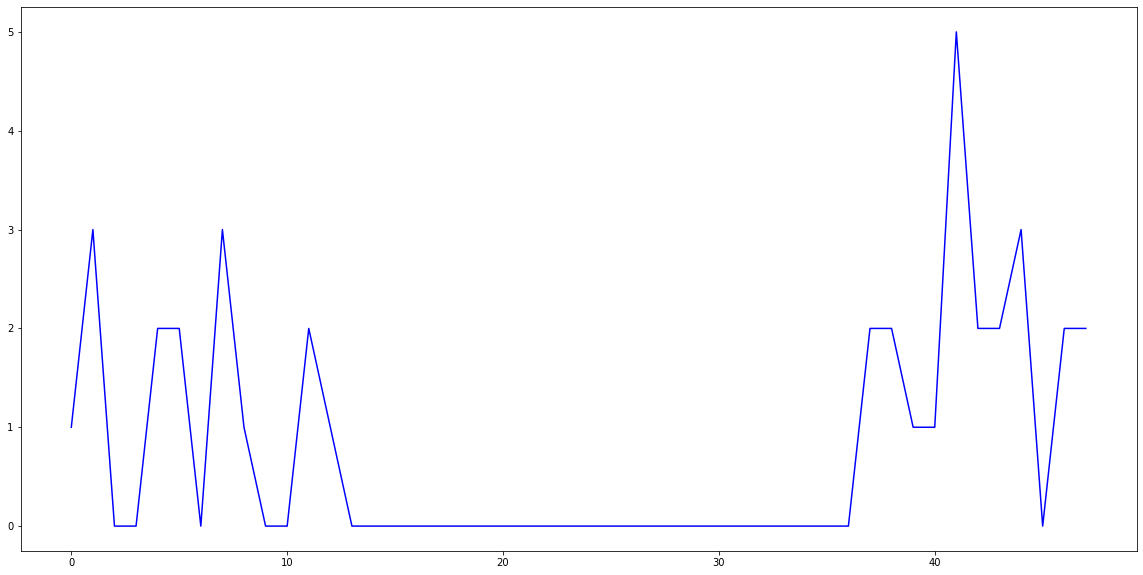

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(creneau_dates(new_plages_mach_laver,'début'), color='blue')
plt.show()

### Analyse du graphe

On étudie l'activité de la machine à laver à partir du 2020-03-24. On observe que l'activité est réalisée principalement en journée avec un pic de fréquence d'utilisation pour le début de l'activité à 11:30 (5) [soit 13,5%], et à 15:30 / 18:30 / 13:00 (3) [soit 24,3%]. Ce qu'on remarque surtout c'est une absence d'activité la nuit de 21:30 à 09:00 (aucune activité) [soit 50% de créneaux vides], plage étendue à partir de 19:30 (aucune ou très faible activité) [soit 58,3% de créneaux vides].
Cette activité ne peut être exercée que sur une moitié précise de la journée.

In [ ]:
df_duree_moy_mach_laver = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

put_moy_duree(new_plages_mach_laver)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '0:15:00',
  '0:25:00',
  '0:11:02',
  '0:15:01',
  '0:18:37',
  '0:23:21',
  '0:23:38',
  '0:29:40',
  'NaN',
  '0:20:30',
  '0:17:01',
  '0:23:40',
  '0:28:41',
  'NaN',
  

In [ ]:
df_duree_moy_mach_laver['créneau']=put_moy_duree(new_plages_mach_laver)[0]
df_duree_moy_mach_laver['durée_moy']=put_moy_duree(new_plages_mach_laver)[1]
df_duree_moy_mach_laver['fréquence']=put_moy_duree(new_plages_mach_laver)[2]

In [ ]:
df_duree_moy_mach_laver

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00       NaN          0
2    1:00:00       NaN          0
3    1:30:00       NaN          0
4    2:00:00       NaN          0
5    2:30:00       NaN          0
6    3:00:00       NaN          0
7    3:30:00       NaN          0
8    4:00:00       NaN          0
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00       NaN          0
14   7:00:00       NaN          0
15   7:30:00       NaN          0
16   8:00:00       NaN          0
17   8:30:00       NaN          0
18   9:00:00       NaN          0
19   9:30:00   0:15:00          2
20  10:00:00   0:25:00          2
21  10:30:00   0:11:02          1
22  11:00:00   0:15:01          1
23  11:30:00   0:18:37          5
24  12:00:00   0:23:21          3
25  12:30:00   0:23:38          2
26  13:00:00   0:29:40          3
27  13:30:00       NaN          0
28  14:00:00   0:20:30          2
29  14:30:00   0:17:01          1
30  15:00:00   0:23:40          3
31  15:30:00   0:28:41          3
32  16:00:00       NaN          0
33  16:30:00       NaN          0
34  17:00:00   0:15:01          2
35  17:30:00   0:27:31          2
36  18:00:00       NaN          0
37  18:30:00   0:24:19          3
38  19:00:00   0:29:01          1
39  19:30:00       NaN          0
40  20:00:00       NaN          0
41  20:30:00   0:15:31          2
42  21:00:00   0:24:01          1
43  21:30:00       NaN          0
44  22:00:00       NaN          0
45  22:30:00       NaN          0
46  23:00:00       NaN          0
47  23:30:00       NaN          0

### Commentaire sur la table

On peut poser un commentaire critique sur la durée du cycle de machine qui parait court (entre 15 et 25 minutes généralement).

In [ ]:
new_plages_mach_laver_copy = new_plages_mach_laver.copy()
ajout_jour(new_plages_mach_laver_copy)

début                  fin    durée  jour
0   2020-04-09 12:19:59  2020-04-09 12:44:00  0:24:01   Jeu
1   2020-04-10 12:27:00  2020-04-10 12:50:15  0:23:15   Ven
2   2020-04-26 17:30:00  2020-04-26 17:56:01  0:26:01   Dim
3   2020-05-04 15:04:59  2020-05-04 15:29:00  0:24:01   Lun
4   2020-05-11 09:39:00  2020-05-11 09:56:00  0:17:00   Lun
5   2020-05-11 11:18:00  2020-05-11 11:35:01  0:17:01   Lun
6   2020-05-18 11:27:00  2020-05-18 11:28:03  0:01:03   Lun
7   2020-05-18 11:45:00  2020-05-18 12:06:01  0:21:01   Lun
8   2020-05-21 11:05:59  2020-05-21 11:21:00  0:15:01   Jeu
9   2020-05-21 14:54:00  2020-05-21 15:17:00  0:23:00   Jeu
10  2020-05-25 20:54:59  2020-05-25 21:19:00  0:24:01   Lun
11  2020-05-30 18:54:59  2020-05-30 19:24:00  0:29:01   Sam
12  2020-05-31 20:21:00  2020-05-31 20:43:01  0:22:01   Dim
13  2020-06-03 11:44:00  2020-06-03 12:07:00  0:23:00  Merc
14  2020-06-11 09:59:00  2020-06-11 10:25:00  0:26:00   Jeu
15  2020-06-11 12:51:00  2020-06-11 13:12:01  0:21:01   Jeu
16  2020-06-16 10:36:59  2020-06-16 10:48:01  0:11:02   Mar
17  2020-06-21 14:45:59  2020-06-21 15:10:00  0:24:01   Dim
18  2020-06-24 17:04:59  2020-06-24 17:27:00  0:22:01  Merc
19  2020-07-06 11:34:59  2020-07-06 12:06:00  0:31:01   Lun
20  2020-07-07 14:36:59  2020-07-07 14:54:00  0:17:01   Mar
21  2020-07-09 09:55:00  2020-07-09 10:19:01  0:24:01   Jeu
22  2020-07-09 18:27:00  2020-07-09 18:54:00  0:27:00   Jeu
23  2020-07-12 17:20:00  2020-07-12 17:49:01  0:29:01   Dim
24  2020-07-15 18:30:00  2020-07-15 18:54:59  0:24:59  Merc
25  2020-07-20 13:13:00  2020-07-20 13:44:59  0:31:59   Lun
26  2020-07-24 15:32:59  2020-07-24 16:03:01  0:30:02   Ven
27  2020-07-27 12:12:59  2020-07-27 12:42:01  0:29:02   Lun
28  2020-07-28 13:08:00  2020-07-28 13:44:00  0:36:00   Mar
29  2020-07-30 15:27:00  2020-07-30 15:55:01  0:28:01   Jeu
30  2020-08-07 13:57:59  2020-08-07 14:28:00  0:30:01   Ven
31  2020-08-09 20:42:00  2020-08-09 20:51:01  0:09:01   Dim
32  2020-08-10 15:19:00  2020-08-10 15:47:01  0:28:01   Lun
33  2020-08-12 09:22:00  2020-08-12 09:35:01  0:13:01  Merc
34  2020-08-16 12:11:00  2020-08-16 12:31:00  0:20:00   Dim
35  2020-08-17 16:46:59  2020-08-17 16:55:00  0:08:01   Lun
36  2020-08-17 18:22:00  2020-08-17 18:43:00  0:21:00   Lun
37  2020-08-21 13:51:00  2020-08-21 14:02:00  0:11:00   Ven

In [ ]:
df_duree_moy_jour_mach_laver = pd.DataFrame(index=creneau, columns=day_of_week)

In [ ]:
put_moy_duree_jour2(df_duree_moy_jour_mach_laver,new_plages_mach_laver_copy)

Lun Mar Merc Jeu Ven Sam Dim
0:00:00    0   0    0   0   0   0   0
0:30:00    0   0    0   0   0   0   0
1:00:00    0   0    0   0   0   0   0
1:30:00    0   0    0   0   0   0   0
2:00:00    0   0    0   0   0   0   0
2:30:00    0   0    0   0   0   0   0
3:00:00    0   0    0   0   0   0   0
3:30:00    0   0    0   0   0   0   0
4:00:00    0   0    0   0   0   0   0
4:30:00    0   0    0   0   0   0   0
5:00:00    0   0    0   0   0   0   0
5:30:00    0   0    0   0   0   0   0
6:00:00    0   0    0   0   0   0   0
6:30:00    0   0    0   0   0   0   0
7:00:00    0   0    0   0   0   0   0
7:30:00    0   0    0   0   0   0   0
8:00:00    0   0    0   0   0   0   0
8:30:00    0   0    0   0   0   0   0
9:00:00    0   0    0   0   0   0   0
9:30:00    1   0    1   0   0   0   0
10:00:00   0   0    0   2   0   0   0
10:30:00   0   1    0   0   0   0   0
11:00:00   0   0    0   1   0   0   0
11:30:00   4   0    1   0   0   0   0
12:00:00   2   0    0   0   0   0   1
12:30:00   0   0    0   1   1   0   0
13:00:00   1   1    0   1   0   0   0
13:30:00   0   0    0   0   0   0   0
14:00:00   0   0    0   0   2   0   0
14:30:00   0   1    0   0   0   0   0
15:00:00   1   0    0   1   0   0   1
15:30:00   1   0    0   1   1   0   0
16:00:00   0   0    0   0   0   0   0
16:30:00   0   0    0   0   0   0   0
17:00:00   1   0    1   0   0   0   0
17:30:00   0   0    0   0   0   0   2
18:00:00   0   0    0   0   0   0   0
18:30:00   1   0    1   1   0   0   0
19:00:00   0   0    0   0   0   1   0
19:30:00   0   0    0   0   0   0   0
20:00:00   0   0    0   0   0   0   0
20:30:00   0   0    0   0   0   0   2
21:00:00   1   0    0   0   0   0   0
21:30:00   0   0    0   0   0   0   0
22:00:00   0   0    0   0   0   0   0
22:30:00   0   0    0   0   0   0   0
23:00:00   0   0    0   0   0   0   0
23:30:00   0   0    0   0   0   0   0

### Analyse de la table

Le nombre faible de plages à l'étude (37) ne permet pas de dégager de grande tendance concernant "le jour de lessive". Néanmoins, sur ces 37 plages, il semble que ce soit le lundi sur l'heure du midi qui l'emporte. Une plus grde quantité de données pour confirmer ou infirmer cette assertion.

In [ ]:
creneau_dates(new_plages_lum_sdb,'début')

array([ 3,  5,  8,  8, 10,  9,  6,  8,  4,  9,  5,  8,  9, 11,  5, 13,  6,
       11,  8, 10,  5,  3,  2,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  3,  3,  1,  6,  6,  9,  2, 11,  5, 10,  5,  7,  6])

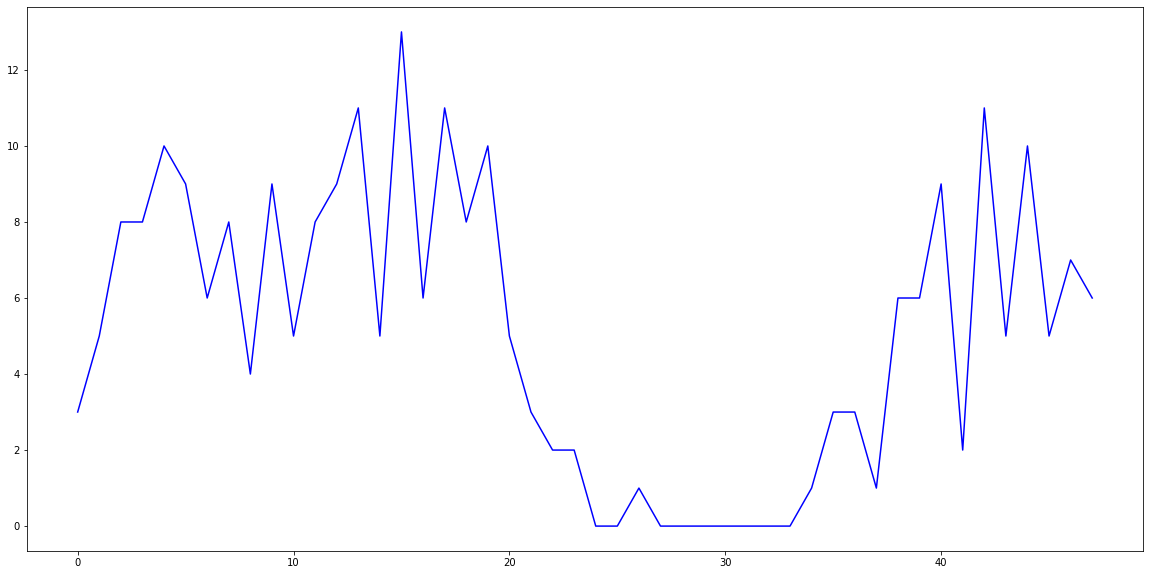

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(creneau_dates(new_plages_lum_sdb,'début'), color='blue')
plt.show()

### Analyse du graphe

On étudie les données de la lumière à partir du 2020-02-26 pour un total de 246 plages. On remarque qu'on a de plus fortes activités en soirée. On retient les pics de valeurs suivants :
- Pic le plus important à 22:30 (15) [soit 6,1%]
- Autres pics importants à 12:00 / 21:30 / 23:30 (11) [soit 13,4%], à 13:00 / 17:00 / 00:30 (10) [soit 12,2%] et à 11:00 / 17:30 / 19:30 / 21:00 (9) [soit 14,6%].

Ce qu'on remarque surtout c'est l'absence d'activité sur la plage de 04:30-07:30 [soit 14,5% de créneaux vides], étendue à partir de 03:00 [soit 20,8% de créneaux vides].

In [ ]:
df_duree_moy_lum_sdb = pd.DataFrame(columns=['créneau', 'durée_moy','fréquence'])

put_moy_duree(new_plages_lum_sdb)

[['0:00:00',
  '0:30:00',
  '1:00:00',
  '1:30:00',
  '2:00:00',
  '2:30:00',
  '3:00:00',
  '3:30:00',
  '4:00:00',
  '4:30:00',
  '5:00:00',
  '5:30:00',
  '6:00:00',
  '6:30:00',
  '7:00:00',
  '7:30:00',
  '8:00:00',
  '8:30:00',
  '9:00:00',
  '9:30:00',
  '10:00:00',
  '10:30:00',
  '11:00:00',
  '11:30:00',
  '12:00:00',
  '12:30:00',
  '13:00:00',
  '13:30:00',
  '14:00:00',
  '14:30:00',
  '15:00:00',
  '15:30:00',
  '16:00:00',
  '16:30:00',
  '17:00:00',
  '17:30:00',
  '18:00:00',
  '18:30:00',
  '19:00:00',
  '19:30:00',
  '20:00:00',
  '20:30:00',
  '21:00:00',
  '21:30:00',
  '22:00:00',
  '22:30:00',
  '23:00:00',
  '23:30:00'],
 ['NaN',
  '0:04:46',
  '0:07:49',
  '0:08:43',
  '0:10:00',
  '0:03:47',
  'NaN',
  'NaN',
  '0:03:00',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  'NaN',
  '0:03:00',
  '0:07:44',
  '0:07:57',
  '0:08:00',
  '0:15:39',
  '0:12:07',
  '0:16:46',
  '0:05:00',
  '0:15:36',
  '0:21:36',
  '0:07:18',
  '0:08:07',
  '0:06:34',
  '0:10:29

In [ ]:
df_duree_moy_lum_sdb['créneau']=put_moy_duree(new_plages_lum_sdb)[0]
df_duree_moy_lum_sdb['durée_moy']=put_moy_duree(new_plages_lum_sdb)[1]
df_duree_moy_lum_sdb['fréquence']=put_moy_duree(new_plages_lum_sdb)[2]

In [ ]:
df_duree_moy_lum_sdb

créneau durée_moy  fréquence
0    0:00:00       NaN          0
1    0:30:00   0:04:46         10
2    1:00:00   0:07:49          7
3    1:30:00   0:08:43          3
4    2:00:00   0:10:00          2
5    2:30:00   0:03:47          2
6    3:00:00       NaN          0
7    3:30:00       NaN          0
8    4:00:00   0:03:00          1
9    4:30:00       NaN          0
10   5:00:00       NaN          0
11   5:30:00       NaN          0
12   6:00:00       NaN          0
13   6:30:00       NaN          0
14   7:00:00       NaN          0
15   7:30:00       NaN          0
16   8:00:00   0:03:00          1
17   8:30:00   0:07:44          3
18   9:00:00   0:07:57          3
19   9:30:00   0:08:00          1
20  10:00:00   0:15:39          7
21  10:30:00   0:12:07          6
22  11:00:00   0:16:46          9
23  11:30:00   0:05:00          2
24  12:00:00   0:15:36         11
25  12:30:00   0:21:36          5
26  13:00:00   0:07:18         10
27  13:30:00   0:08:07          5
28  14:00:00   0:06:34          9
29  14:30:00   0:10:29          6
30  15:00:00   0:03:48          5
31  15:30:00   0:11:59          5
32  16:00:00   0:17:25          9
33  16:30:00   0:22:19          8
34  17:00:00   0:07:14         12
35  17:30:00   0:17:14          9
36  18:00:00   0:14:32          6
37  18:30:00   0:24:52          8
38  19:00:00   0:16:27          4
39  19:30:00   0:29:43          9
40  20:00:00   1:18:40          6
41  20:30:00   0:22:14          8
42  21:00:00   0:35:09          9
43  21:30:00   0:35:37         11
44  22:00:00   0:27:54          7
45  22:30:00   0:11:14         13
46  23:00:00   0:15:55          7
47  23:30:00   0:29:29         11

### Commentaire sur la table

On remarque des utilisations la nuit, ce qui peut impliquer des réveils la nuit pour aller à la salle de bain par exemple.

In [ ]:
new_plages_lum_sdb_copy = new_plages_lum_sdb.copy()
ajout_jour(new_plages_lum_sdb_copy)

début                  fin    durée  jour
0    2020-05-04 13:01:00  2020-05-04 13:20:00  0:19:00   Lun
1    2020-05-04 15:17:00  2020-05-04 15:33:00  0:16:00   Lun
2    2020-05-04 19:37:00  2020-05-04 20:12:00  0:35:00   Lun
3    2020-05-04 20:29:00  2020-05-04 20:35:00  0:06:00   Lun
4    2020-05-04 20:49:00  2020-05-04 21:27:00  0:38:00   Lun
..                   ...                  ...      ...   ...
241  2020-07-07 23:18:00  2020-07-07 23:21:00  0:03:00   Mar
242  2020-07-08 09:57:00  2020-07-08 10:21:01  0:24:01  Merc
243  2020-07-08 20:02:00  2020-07-08 22:22:00  2:20:00  Merc
244  2020-07-08 22:54:00  2020-07-08 23:23:00  0:29:00  Merc
245  2020-07-08 23:39:00  2020-07-09 00:02:00  0:23:00  Merc

[246 rows x 4 columns]

In [ ]:
df_duree_moy_jour_lum_sdb = pd.DataFrame(index=creneau, columns=day_of_week)

In [ ]:
put_moy_duree_jour2(df_duree_moy_jour_lum_sdb,new_plages_lum_sdb_copy)

Lun Mar Merc Jeu Ven Sam Dim
0:00:00    0   0    0   0   0   0   0
0:30:00    1   2    1   1   1   3   1
1:00:00    0   1    0   1   1   2   2
1:30:00    0   1    0   0   0   2   0
2:00:00    0   0    0   0   0   1   1
2:30:00    0   0    0   0   0   1   1
3:00:00    0   0    0   0   0   0   0
3:30:00    0   0    0   0   0   0   0
4:00:00    0   0    0   1   0   0   0
4:30:00    0   0    0   0   0   0   0
5:00:00    0   0    0   0   0   0   0
5:30:00    0   0    0   0   0   0   0
6:00:00    0   0    0   0   0   0   0
6:30:00    0   0    0   0   0   0   0
7:00:00    0   0    0   0   0   0   0
7:30:00    0   0    0   0   0   0   0
8:00:00    0   0    0   0   0   1   0
8:30:00    1   0    2   0   0   0   0
9:00:00    1   0    0   1   0   0   1
9:30:00    1   0    0   0   0   0   0
10:00:00   1   3    2   0   0   0   1
10:30:00   2   2    1   0   0   0   1
11:00:00   3   0    1   1   3   0   1
11:30:00   0   0    1   0   0   1   0
12:00:00   1   1    0   1   0   4   4
12:30:00   0   1    1   3   0   0   0
13:00:00   2   1    1   2   3   0   1
13:30:00   2   1    0   0   1   1   0
14:00:00   3   0    0   0   3   1   2
14:30:00   2   1    1   1   0   0   1
15:00:00   1   1    0   0   2   0   1
15:30:00   1   0    1   2   0   1   0
16:00:00   4   0    3   0   0   1   1
16:30:00   1   0    0   2   1   2   2
17:00:00   4   1    2   1   1   2   1
17:30:00   1   2    4   0   0   0   2
18:00:00   1   0    1   0   3   1   0
18:30:00   1   2    0   0   2   1   2
19:00:00   0   0    2   0   1   1   0
19:30:00   4   1    0   0   2   1   1
20:00:00   1   1    1   1   0   1   1
20:30:00   3   2    0   0   1   0   2
21:00:00   1   1    1   1   0   1   4
21:30:00   1   3    2   1   0   1   3
22:00:00   1   2    1   2   0   0   1
22:30:00   1   3    2   0   1   3   3
23:00:00   0   1    2   1   0   0   3
23:30:00   1   2    5   0   1   0   2

### Commentaire sur la table

On remarque que les réveils la nuit qu'on a pu remarquer se déroule de manière plutôt ponctuelle en semaine (après 00:30), et rare, contrairement au week-end. cela peut éventuellement coïncider avec des moments où l'habitant se couche tard

## Etablissement de scénarios : chaînes de Markov

In [ ]:
df_motion_bathroom = pd.read_csv('split_sensor_int5895_1min.csv')
df_motion_livingroom = pd.read_csv('split_sensor_int5891_1min.csv')
df_motion_kitchen = pd.read_csv('split_sensor_int5893_1min.csv')
df_motion_bedroom = pd.read_csv('split_sensor_int5892_1min.csv')
df_motion_corridor = pd.read_csv('split_sensor_int5894_1min.csv')
df_door_balcony = pd.read_csv('split_sensor_int6220_1min.csv')
df_door_entrance = pd.read_csv('split_sensor_int5888_1min.csv')

In [ ]:
# Pour les capteurs int binaires : df_cuisine1 (6253)
def get_en_marche_binaire(df):
    en_marche_appareil = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] == 1) :
            en_marche_appareil.append(df['timestamp'][i])
    return en_marche_appareil

In [ ]:
def get_plage_binaire(dfa):
    activite_appareil = get_en_marche_binaire(dfa)
    n = len(activite_appareil)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_activite_appareil=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    delta_sec = timedelta(seconds=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(activite_appareil[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(activite_appareil[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute) :
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date2.month == 3) :
                                    intermediate.append(date1)
                                else :
                                    if(len(intermediate)!=0):
                                        debut.append(str(intermediate[0]))
                                        fin.append(str(date1))
                                        duree.append(str(date1-intermediate[0]))
                                        intermediate=[]
                                    else:
                                        debut.append(str(date1))
                                        fin.append(str(date1+delta_sec))
                                        duree.append(str(delta_sec))
                            if (date1.day == 30) and (date2.month == date1.month +1):
                                intermediate.append(date1)
                            if (date1.day == 31) and (date2.month == date1.month + 1) :
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    intermediate=[]
                                else:
                                    debut.append(str(date1))
                                    fin.append(str(date1+delta_sec))
                                    duree.append(str(delta_sec))
                    else :
                      if(len(intermediate)!=0):
                        debut.append(str(intermediate[0]))
                        fin.append(str(date1))
                        duree.append(str(date1-intermediate[0]))
                        intermediate=[]
                      else:
                        debut.append(str(date1))
                        fin.append(str(date1+delta_sec))
                        duree.append(str(delta_sec))
                else :
                  if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                  else:
                    debut.append(str(date1))
                    fin.append(str(date1+delta_sec))
                    duree.append(str(delta_sec))
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                else:
                  debut.append(str(date1))
                  fin.append(str(date1+delta_sec))
                  duree.append(str(delta_sec))            
    plages_activite_appareil=[debut,fin,duree]
    return plages_activite_appareil

In [ ]:
plages_motion_bathroom = pd.DataFrame(columns=['début','fin','durée'])
plages_motion_livingroom = pd.DataFrame(columns=['début','fin','durée'])
plages_motion_kitchen = pd.DataFrame(columns=['début','fin','durée'])
plages_motion_bedroom = pd.DataFrame(columns=['début','fin','durée'])
plages_motion_corridor = pd.DataFrame(columns=['début','fin','durée'])
plages_door_balcony = pd.DataFrame(columns=['début','fin','durée'])
plages_door_entrance = pd.DataFrame(columns=['début','fin','durée'])

In [ ]:
plages_motion_bathroom['début'] = get_plage_binaire(df_motion_bathroom)[0]
plages_motion_bathroom['fin'] = get_plage_binaire(df_motion_bathroom)[1]
plages_motion_bathroom['durée'] = get_plage_binaire(df_motion_bathroom)[2]
plages_motion_bathroom

début                  fin    durée
0     2020-02-26 09:44:34  2020-02-26 09:44:35  0:00:01
1     2020-02-26 10:09:00  2020-02-26 10:10:00  0:01:00
2     2020-02-26 10:13:00  2020-02-26 10:13:01  0:00:01
3     2020-02-26 10:15:00  2020-02-26 10:16:00  0:01:00
4     2020-02-26 12:12:00  2020-02-26 12:12:01  0:00:01
...                   ...                  ...      ...
8250  2020-05-04 12:52:00  2020-05-04 12:53:59  0:01:59
8251  2020-05-08 21:12:00  2020-05-08 21:12:01  0:00:01
8252  2020-05-08 21:14:00  2020-05-08 21:16:00  0:02:00
8253  2020-05-08 21:18:00  2020-05-08 21:18:01  0:00:01
8254  2020-05-08 21:20:00  2020-05-08 21:20:01  0:00:01

[8255 rows x 3 columns]

In [ ]:
plages_motion_livingroom['début'] = get_plage_binaire(df_motion_livingroom)[0]
plages_motion_livingroom['fin'] = get_plage_binaire(df_motion_livingroom)[1]
plages_motion_livingroom['durée'] = get_plage_binaire(df_motion_livingroom)[2]
plages_motion_livingroom

début                  fin    durée
0     2020-02-27 11:35:00  2020-02-27 11:35:01  0:00:01
1     2020-02-27 11:42:00  2020-02-27 11:42:01  0:00:01
2     2020-02-27 17:46:00  2020-02-27 17:46:01  0:00:01
3     2020-02-27 17:50:00  2020-02-27 17:50:01  0:00:01
4     2020-02-27 18:31:00  2020-02-27 18:31:01  0:00:01
...                   ...                  ...      ...
1583  2020-08-22 14:17:00  2020-08-22 14:17:01  0:00:01
1584  2020-08-23 14:28:00  2020-08-23 14:28:01  0:00:01
1585  2020-08-23 17:22:00  2020-08-23 17:22:01  0:00:01
1586  2020-08-23 18:11:00  2020-08-23 18:11:01  0:00:01
1587  2020-08-24 07:39:00  2020-08-24 07:39:01  0:00:01

[1588 rows x 3 columns]

In [ ]:
plages_motion_kitchen['début'] = get_plage_binaire(df_motion_kitchen)[0]
plages_motion_kitchen['fin'] = get_plage_binaire(df_motion_kitchen)[1]
plages_motion_kitchen['durée'] = get_plage_binaire(df_motion_kitchen)[2]
plages_motion_kitchen

début                  fin    durée
0     2020-02-26 10:19:00  2020-02-26 10:20:00  0:01:00
1     2020-02-26 10:22:00  2020-02-26 10:22:01  0:00:01
2     2020-02-26 10:25:00  2020-02-26 10:25:01  0:00:01
3     2020-02-26 10:28:00  2020-02-26 10:28:01  0:00:01
4     2020-02-26 10:32:00  2020-02-26 10:32:01  0:00:01
...                   ...                  ...      ...
3489  2020-08-25 22:43:00  2020-08-25 22:43:01  0:00:01
3490  2020-08-25 22:47:00  2020-08-25 22:48:00  0:01:00
3491  2020-08-25 22:53:00  2020-08-25 22:53:01  0:00:01
3492  2020-08-25 22:56:00  2020-08-25 22:56:01  0:00:01
3493  2020-08-25 23:03:00  2020-08-25 23:03:01  0:00:01

[3494 rows x 3 columns]

In [ ]:
plages_motion_bedroom['début'] = get_plage_binaire(df_motion_bedroom)[0]
plages_motion_bedroom['fin'] = get_plage_binaire(df_motion_bedroom)[1]
plages_motion_bedroom['durée'] = get_plage_binaire(df_motion_bedroom)[2]
plages_motion_bedroom

début                  fin    durée
0     2020-02-26 10:34:00  2020-02-26 10:34:01  0:00:01
1     2020-02-27 10:42:00  2020-02-27 10:44:00  0:02:00
2     2020-02-27 10:52:00  2020-02-27 10:52:01  0:00:01
3     2020-02-27 10:54:00  2020-02-27 10:54:01  0:00:01
4     2020-02-27 10:56:00  2020-02-27 10:57:00  0:01:00
...                   ...                  ...      ...
9043  2020-08-24 23:54:00  2020-08-24 23:54:01  0:00:01
9044  2020-08-25 08:03:00  2020-08-25 08:03:01  0:00:01
9045  2020-08-25 08:15:00  2020-08-25 08:15:01  0:00:01
9046  2020-08-25 08:17:00  2020-08-25 08:17:01  0:00:01
9047  2020-08-25 23:29:00  2020-08-25 23:30:00  0:01:00

[9048 rows x 3 columns]

In [ ]:
plages_motion_corridor['début'] = get_plage_binaire(df_motion_corridor)[0]
plages_motion_corridor['fin'] = get_plage_binaire(df_motion_corridor)[1]
plages_motion_corridor['durée'] = get_plage_binaire(df_motion_corridor)[2]
plages_motion_corridor

début                  fin    durée
0     2020-02-26 10:04:00  2020-02-26 10:04:01  0:00:01
1     2020-02-26 10:16:00  2020-02-26 10:18:00  0:02:00
2     2020-02-26 10:33:00  2020-02-26 10:33:01  0:00:01
3     2020-02-26 11:16:56  2020-02-26 11:16:57  0:00:01
4     2020-02-26 18:11:00  2020-02-26 18:11:01  0:00:01
...                   ...                  ...      ...
5735  2020-08-25 23:12:00  2020-08-25 23:12:01  0:00:01
5736  2020-08-25 23:31:00  2020-08-25 23:32:00  0:01:00
5737  2020-08-25 23:41:00  2020-08-25 23:41:01  0:00:01
5738  2020-08-26 10:00:00  2020-08-26 10:00:01  0:00:01
5739  2020-08-26 10:18:00  2020-08-26 10:18:01  0:00:01

[5740 rows x 3 columns]

In [ ]:
plages_door_balcony['début'] = get_plage_binaire(df_door_balcony)[0]
plages_door_balcony['fin'] = get_plage_binaire(df_door_balcony)[1]
plages_door_balcony['durée'] = get_plage_binaire(df_door_balcony)[2]
plages_door_balcony

début                  fin    durée
0    2020-02-28 10:00:00  2020-02-28 10:07:00  0:07:00
1    2020-02-28 11:29:00  2020-02-28 11:36:00  0:07:00
2    2020-02-28 14:31:00  2020-02-28 14:33:00  0:02:00
3    2020-02-28 22:21:00  2020-02-28 22:21:01  0:00:01
4    2020-02-29 21:10:00  2020-02-29 21:10:01  0:00:01
..                   ...                  ...      ...
561  2020-08-20 23:10:00  2020-08-20 23:11:00  0:01:00
562  2020-08-21 16:05:00  2020-08-21 18:09:00  2:04:00
563  2020-08-21 18:14:00  2020-08-21 18:31:00  0:17:00
564  2020-08-22 10:21:00  2020-08-22 10:42:00  0:21:00
565  2020-08-22 12:26:00  2020-08-22 14:35:00  2:09:00

[566 rows x 3 columns]

In [ ]:
plages_door_entrance['début'] = get_plage_binaire(df_door_entrance)[0]
plages_door_entrance['fin'] = get_plage_binaire(df_door_entrance)[1]
plages_door_entrance['durée'] = get_plage_binaire(df_door_entrance)[2]
plages_door_entrance

début                  fin    durée
0    2020-02-27 12:39:00  2020-02-27 12:39:01  0:00:01
1    2020-02-28 14:26:00  2020-02-28 14:26:01  0:00:01
2    2020-02-28 18:29:00  2020-02-28 18:29:01  0:00:01
3    2020-02-29 22:02:00  2020-02-29 22:02:01  0:00:01
4    2020-02-29 22:05:00  2020-02-29 22:05:01  0:00:01
..                   ...                  ...      ...
155  2020-08-20 20:28:00  2020-08-20 20:28:01  0:00:01
156  2020-08-21 13:54:00  2020-08-21 13:54:01  0:00:01
157  2020-08-22 14:37:00  2020-08-22 14:37:01  0:00:01
158  2020-08-24 19:54:00  2020-08-24 19:54:01  0:00:01
159  2020-08-24 20:12:00  2020-08-24 20:12:01  0:00:01

[160 rows x 3 columns]

In [ ]:
tuple_list = []

# a : entrer dans la salle de bain
# b : entrer dans la livingroom
# c : entrer dans la cuisine
# d : entrer dans le couloir
# e : entrer dans la chambre
# f : ouvrir frigo
# g : ouvrir porte balcon
# h : ouvrir porte entrée
# i : dormir
# j : regarder la télé
# k : cuisiner

#Capteurs de mouvement
#Sdb
for i in range(len(plages_motion_bathroom)):
  tuple_list.append((plages_motion_bathroom['début'][i], 'a'))
#Livingroom
for i in range(len(plages_motion_livingroom)):
  tuple_list.append((plages_motion_livingroom['début'][i], 'b'))
#Cuisine
for i in range(len(plages_motion_kitchen)):
  tuple_list.append((plages_motion_kitchen['début'][i], 'c'))
#Couloir
for i in range(len(plages_motion_corridor)):
  tuple_list.append((plages_motion_corridor['début'][i], 'd'))
#Bedroom
for i in range(len(plages_motion_bedroom)):
  tuple_list.append((plages_motion_bedroom['début'][i], 'e'))

#Frigo
# Essayer avec : new_plages_activite_appareil_1
for i in range(len(plages_activite_appareil_1['début'])):
  tuple_list.append((plages_activite_appareil_1['début'][i], 'f'))

#Balcon
for i in range(len(plages_door_balcony)):
  tuple_list.append((plages_door_balcony['début'][i], 'g'))

#Entrée
for i in range(len(plages_door_entrance)):
  tuple_list.append((plages_door_entrance['début'][i], 'h'))

#Dormir dans le lit
# Essayer avec : new_plages_sleep_df_copy
for i in range(int(len(new_plages_sleep_df)/2)):
  tuple_list.append((new_plages_sleep_df['début'][i], 'i'))

#Regarder tv
# Essayer avec : new_plages_rgtv_copy
for i in range(int(len(new_plages_rgtv)/2)):
  tuple_list.append((new_plages_rgtv['début'][i], 'j'))

#Lumière cuisinière
for i in range(int(len(new_plages_activite_appareil_7)/2)):
  tuple_list.append((new_plages_activite_appareil_7['début'][i], 'k'))

#Lave-vaisselle
for i in range(int(len(new_plages_activite_appareil_4)/2)):
  tuple_list.append((new_plages_activite_appareil_4['début'][i], 'l'))

#Micro-ondes
for i in range(int(len(new_plages_activite_appareil_6)/2)):
  tuple_list.append((new_plages_activite_appareil_6['début'][i], 'm'))

#Café
for i in range(int(len(new_plages_activite_appareil_2)/2)):
  tuple_list.append((new_plages_activite_appareil_2['début'][i], 'n'))

#Sandwichmaker
for i in range(int(len(new_plages_activite_appareil_3)/2)):
  tuple_list.append((new_plages_activite_appareil_3['début'][i], 'o'))

#Machine à laver
for i in range(int(len(new_plages_mach_laver)/2)):
  tuple_list.append((new_plages_mach_laver['début'][i], 'p'))

In [ ]:
events = ""
l = sorted(tuple_list)
events += l[0][1]
c=0
for i in range(1,len(l)):
  if ( l[i][1] != l[i-1][1]):
    if ( l[i][0] != l[i-1][0]):
      events += ","
    events += l[i][1]
    c+=1

In [ ]:
events

'i,a,d,a,d,c,d,e,c,d,a,d,a,c,a,c,i,a,d,a,i,a,c,ad,a,e,c,a,bd,c,h,d,a,d,a,d,a,e,d,c,d,c,d,c,d,c,j,c,bd,c,d,b,a,d,j,e,c,a,c,a,j,b,a,c,ad,c,bd,j,a,c,i,a,d,c,d,b,c,j,b,a,c,d,a,c,d,b,ce,c,d,c,j,c,d,a,i,e,a,c,bg,b,e,d,c,ac,e,c,e,cd,c,j,c,bg,c,bc,j,c,bc,ad,e,c,b,c,a,c,a,c,d,b,h,c,g,b,e,bd,e,c,b,d,c,a,b,c,d,a,bc,b,c,e,b,c,bd,c,b,j,a,c,a,b,c,b,d,b,a,c,a,h,c,a,d,e,a,de,a,cd,a,d,bd,c,a,c,b,e,a,d,c,d,bc,b,c,b,d,g,d,b,d,c,be,a,i,c,e,a,c,ac,b,e,c,d,a,c,a,d,e,bd,e,a,e,i,e,d,e,c,b,cd,a,e,c,b,a,cd,a,b,a,e,c,d,b,d,c,b,c,b,e,a,g,b,de,ab,a,e,g,a,dh,b,abd,bd,a,d,a,d,h,e,i,e,a,i,e,a,h,a,d,c,e,c,d,b,c,b,c,a,e,i,a,d,a,ei,a,e,a,e,a,e,a,e,b,c,b,e,c,e,ad,e,a,d,a,i,e,a,e,ae,a,i,e,a,e,de,a,e,a,c,d,c,e,a,b,c,e,c,e,c,a,c,a,e,i,e,a,d,i,e,ae,a,i,e,a,e,a,d,e,d,a,e,ad,c,a,d,a,de,c,d,cd,i,c,b,e,a,d,c,a,i,a,e,d,a,e,a,de,d,c,d,e,b,e,c,b,a,b,ad,i,e,a,d,a,d,ad,a,e,d,e,a,i,c,a,de,ad,i,a,c,e,d,c,a,e,a,e,a,e,a,d,a,c,b,e,i,d,e,d,e,a,d,a,di,a,d,e,d,b,d,ae,d,e,ad,i,e,a,e,a,c,a,e,d,a,c,e,c,ei,e,a,i,e,a,c,d,a,d,e,c,bd,ad,a,d,e,ad,a,

In [ ]:
txt = events.split(',')

n = len(txt)

for i in range(n):
  if ( 'c' in txt[i] and ('f' in txt[i] or 'l' in txt[i] )):
    txt[i] = txt[i].replace('c','')
  if ( 'b' in txt[i] and ('j' in txt[i] or 'j' in txt[i] or 'g' in txt[i])):
    txt[i] = txt[i].replace('b','')
  if ( 'd' in txt[i] and 'h' in txt[i]):
    txt[i] = txt[i].replace('d','')

In [ ]:
from itertools import groupby

In [ ]:
event_list = [key for key, _group in groupby(txt)]
events2 = ','.join(event_list)

In [ ]:
events2

'i,a,d,a,d,c,d,e,c,d,a,d,a,c,a,c,i,a,d,a,i,a,c,ad,a,e,c,a,bd,c,h,d,a,d,a,d,a,e,d,c,d,c,d,c,d,c,j,c,bd,c,d,b,a,d,j,e,c,a,c,a,j,b,a,c,ad,c,bd,j,a,c,i,a,d,c,d,b,c,j,b,a,c,d,a,c,d,b,ce,c,d,c,j,c,d,a,i,e,a,c,g,b,e,d,c,ac,e,c,e,cd,c,j,c,g,c,bc,j,c,bc,ad,e,c,b,c,a,c,a,c,d,b,h,c,g,b,e,bd,e,c,b,d,c,a,b,c,d,a,bc,b,c,e,b,c,bd,c,b,j,a,c,a,b,c,b,d,b,a,c,a,h,c,a,d,e,a,de,a,cd,a,d,bd,c,a,c,b,e,a,d,c,d,bc,b,c,b,d,g,d,b,d,c,be,a,i,c,e,a,c,ac,b,e,c,d,a,c,a,d,e,bd,e,a,e,i,e,d,e,c,b,cd,a,e,c,b,a,cd,a,b,a,e,c,d,b,d,c,b,c,b,e,a,g,b,de,ab,a,e,g,a,h,b,abd,bd,a,d,a,d,h,e,i,e,a,i,e,a,h,a,d,c,e,c,d,b,c,b,c,a,e,i,a,d,a,ei,a,e,a,e,a,e,a,e,b,c,b,e,c,e,ad,e,a,d,a,i,e,a,e,ae,a,i,e,a,e,de,a,e,a,c,d,c,e,a,b,c,e,c,e,c,a,c,a,e,i,e,a,d,i,e,ae,a,i,e,a,e,a,d,e,d,a,e,ad,c,a,d,a,de,c,d,cd,i,c,b,e,a,d,c,a,i,a,e,d,a,e,a,de,d,c,d,e,b,e,c,b,a,b,ad,i,e,a,d,a,d,ad,a,e,d,e,a,i,c,a,de,ad,i,a,c,e,d,c,a,e,a,e,a,e,a,d,a,c,b,e,i,d,e,d,e,a,d,a,di,a,d,e,d,b,d,ae,d,e,ad,i,e,a,e,a,c,a,e,d,a,c,e,c,ei,e,a,i,e,a,c,d,a,d,e,c,bd,ad,a,d,e,ad,a,d,c

In [ ]:
len(event_list)

13525

In [ ]:
c

18544

### Analyse de la chaîne de caractère

On obtient une chaîne de 33170 caractères (avec les virgules), ce qui est en réalité 18544 caractères (sans virgules) pour une étude de 15 capteurs sur toute la durée de la collecte de données (6 mois).

Puisqu'ici nous étudions l'enchaînement des activités par rapport au début de celles-ci c'est-à-dire le moment où elle a été enclenché, cela signifie que les activités simultanées non pas lieu d'être, hormis celles du déclenchement d'un appareil et du détecteur de présence de la pièce où se trouve l'appareil, du fait de la qualité du capteur de mouvement et de la réunion de plages de ces capteurs.

In [ ]:
def nbr_occur(kgram, text):
  n = len(text)
  m = len(kgram)
  occ = 0
  for i in range(n-m+1): 
    if ( text[i:i+m] == kgram):
      occ += 1
  return occ

In [ ]:
def get_characters(kgram, text):
  n = len(text)
  m = len(kgram)
  list_characters = []
  for i in range(n-m): 
    if ( text[i:i+m] == kgram):
        list_characters.append(text[i+m])
  return list_characters

In [ ]:
get_characters('bd', 'a,b,bde,bfbdru')

['e', 'r']

In [ ]:
# Ne prend en compte que le caractère juste après

def get_proba_markov(kgram, text):
  n = len(get_characters(kgram,text))
  occ = nbr_occur(kgram,text)
  mydict = {}
  for i in range(n):
    mydict[get_characters(kgram,text)[i]] = nbr_occur(kgram+get_characters(kgram,text)[i], text)/occ

  return mydict

In [ ]:
def get_characters_in_bloc(kgram, text):
  n = len(text)
  m = len(kgram)
  list_characters = []
  j=0
  b=0
  for i in range(n-m):
    if (text[i:i+m]==kgram):
      j=i+m
      l=0
      for k in range(j, n):
        if(text[k] == ','):
          l=k
          break
      for a in range(l+1,n):
        if (text[a] == ','):
          if(b<a-(l+1)):
            b=a-(l+1)
          break
        else :
          list_characters.append(text[a])
  return list_characters,b

In [ ]:
def get_characters_in_bloc2(kgram, text):
  n = len(text)
  m = len(kgram)
  list_characters = []
  j=0
  b=0
  for i in range(n-m):
    if (text[i:i+m]==kgram):
      j=i+m
      l=0

      if(text[i+m]==','):
        for c in range(i+m+1,n):
          if(text[c]==','):
            if(b<c-(i+m+1)):
              b=b<c-(i+m+1)
            break
          else:
            list_characters.append(text[c])
  return list_characters,b

In [ ]:
get_characters_in_bloc2(',d', 'a,df,ab,d,cef,ade,bd,cgk,')[0]

['c', 'e', 'f']

In [ ]:
nbr_occur('d','a,df,ab,cef,ade,ba,cgk,')

2

In [ ]:
def get_occur_in_bloc_suiv(kgram,charact,text):
  list_characters = get_characters_in_bloc2(kgram, text)[0]
  l = len(list_characters)
  count = 0
  for i in range(l):
    if(list_characters[i]==charact):
      count+=1
  return count

In [ ]:
nbr_occur(',a,e',events2)

1944

In [ ]:
get_occur_in_bloc_suiv('d','b','a,df,ab,cef,ade,bd,cgk,')

0

In [ ]:
# Prends en considération toutes les lettres du bloc suivant, selon la lettre kgram choisie.

def get_proba_markov2(kgram, text):
  n = len(get_characters_in_bloc2(kgram,text)[0])
  occ = nbr_occur(kgram,text)
  mydict = {}
  for i in range(n):
    mydict[get_characters_in_bloc2(kgram,text)[0][i]] = get_occur_in_bloc_suiv(kgram,get_characters_in_bloc2(kgram,text)[0][i],text)/occ

  return mydict

In [ ]:
get_proba_markov2('d', 'a,df,ab,cef,ade,bd,cgk,')

{'c': 0.3333333333333333, 'g': 0.3333333333333333, 'k': 0.3333333333333333}

In [ ]:
get_proba_markov(',a,', events2)

{'b': 0.05272999252056844,
 'c': 0.10658189977561705,
 'd': 0.06095736724008975,
 'e': 0.7270007479431563,
 'f': 0.006731488406881077,
 'g': 0.0037397157816005983,
 'h': 0.005983545250560957,
 'i': 0.01832460732984293,
 'j': 0.0029917726252804786,
 'k': 0.008975317875841436,
 'l': 0.002617801047120419,
 'm': 0.00037397157816005983,
 'n': 0.0014958863126402393,
 'o': 0.0014958863126402393}

In [ ]:
get_proba_markov(',b,', events2)

{'a': 0.18325242718446602,
 'c': 0.2342233009708738,
 'd': 0.24271844660194175,
 'e': 0.2099514563106796,
 'f': 0.02669902912621359,
 'g': 0.06310679611650485,
 'h': 0.021844660194174758,
 'i': 0.007281553398058253,
 'j': 0.0012135922330097086,
 'k': 0.0024271844660194173,
 'l': 0.0012135922330097086,
 'm': 0.0012135922330097086,
 'n': 0.0024271844660194173,
 'o': 0.0012135922330097086,
 'p': 0.0012135922330097086}

In [ ]:
get_proba_markov(',c,', events2)

{'a': 0.2588766946417043,
 'b': 0.15235635894125243,
 'd': 0.2317624273724984,
 'e': 0.19948353776630084,
 'f': 0.07682375726275016,
 'g': 0.0329244673983215,
 'h': 0.007746933505487412,
 'i': 0.014848289218850872,
 'j': 0.005164622336991607,
 'k': 0.006455777921239509,
 'l': 0.004519044544867657,
 'm': 0.0006455777921239509,
 'n': 0.005810200129115558,
 'o': 0.0025823111684958036}

In [ ]:
get_proba_markov(',d,', events2)

{'a': 0.1220447284345048,
 'b': 0.1329073482428115,
 'c': 0.22939297124600638,
 'd': 0.0012779552715654952,
 'e': 0.3450479233226837,
 'f': 0.03514376996805112,
 'g': 0.03514376996805112,
 'h': 0.027476038338658148,
 'i': 0.024920127795527155,
 'j': 0.0006389776357827476,
 'k': 0.02939297124600639,
 'l': 0.005750798722044728,
 'm': 0.0006389776357827476,
 'n': 0.003194888178913738,
 'o': 0.0012779552715654952,
 'p': 0.005750798722044728}

In [ ]:
get_proba_markov(',e,', events2)

{'a': 0.6199026171637249,
 'b': 0.05386488131466829,
 'c': 0.08886183810103469,
 'd': 0.18259281801582472,
 'e': 0.00030432136335970786,
 'f': 0.011868533171028607,
 'g': 0.013694461351186854,
 'h': 0.003956177723676202,
 'i': 0.011868533171028607,
 'j': 0.0012172854534388314,
 'k': 0.004869141813755326,
 'l': 0.0036518563603164943,
 'm': 0.00030432136335970786,
 'n': 0.0009129640900791236,
 'o': 0.0012172854534388314,
 'p': 0.0009129640900791236}

In [ ]:
get_proba_markov(',f,', events2)

{'a': 0.1111111111111111,
 'b': 0.0761904761904762,
 'c': 0.49206349206349204,
 'd': 0.15555555555555556,
 'e': 0.10158730158730159,
 'g': 0.025396825396825397,
 'h': 0.009523809523809525,
 'j': 0.0031746031746031746,
 'k': 0.0031746031746031746,
 'l': 0.006349206349206349,
 'm': 0.006349206349206349,
 'n': 0.0031746031746031746,
 'o': 0.006349206349206349}

In [ ]:
get_proba_markov(',g,', events2)

{'a': 0.047058823529411764,
 'b': 0.26666666666666666,
 'c': 0.20784313725490197,
 'd': 0.21568627450980393,
 'e': 0.2196078431372549,
 'f': 0.023529411764705882,
 'h': 0.01568627450980392,
 'i': 0.00392156862745098}

In [ ]:
get_proba_markov(',h,', events2)

{'a': 0.12121212121212122,
 'b': 0.13636363636363635,
 'c': 0.26515151515151514,
 'd': 0.29545454545454547,
 'e': 0.12878787878787878,
 'f': 0.022727272727272728,
 'g': 0.022727272727272728,
 'i': 0.007575757575757576}

In [ ]:
get_proba_markov(',i,', events2)

{'a': 0.2620320855614973,
 'b': 0.0213903743315508,
 'c': 0.058823529411764705,
 'd': 0.2192513368983957,
 'e': 0.39037433155080214,
 'g': 0.0053475935828877,
 'h': 0.0053475935828877,
 'k': 0.026737967914438502,
 'l': 0.0053475935828877,
 'p': 0.0053475935828877}

In [ ]:
get_proba_markov(',j,', events2)

{'a': 0.5357142857142857,
 'b': 0.14285714285714285,
 'c': 0.17857142857142858,
 'e': 0.10714285714285714,
 'l': 0.03571428571428571}

In [ ]:
get_proba_markov(',k,', events2)

{'a': 0.26666666666666666,
 'b': 0.02962962962962963,
 'c': 0.08888888888888889,
 'd': 0.37777777777777777,
 'e': 0.2074074074074074,
 'f': 0.014814814814814815,
 'h': 0.007407407407407408,
 'm': 0.007407407407407408}

In [ ]:
get_proba_markov(',l,', events2)

{'a': 0.2545454545454545,
 'c': 0.16363636363636364,
 'd': 0.34545454545454546,
 'e': 0.14545454545454545,
 'f': 0.01818181818181818,
 'g': 0.01818181818181818,
 'i': 0.03636363636363636,
 'k': 0.01818181818181818}

In [ ]:
get_proba_markov(',m,', events2)

{'a': 0.18181818181818182,
 'b': 0.18181818181818182,
 'c': 0.45454545454545453,
 'd': 0.09090909090909091,
 'f': 0.09090909090909091}

In [ ]:
get_proba_markov(',n,', events2)

{'a': 0.1935483870967742,
 'b': 0.0967741935483871,
 'c': 0.3225806451612903,
 'd': 0.12903225806451613,
 'e': 0.06451612903225806,
 'f': 0.16129032258064516,
 'o': 0.03225806451612903}

In [ ]:
get_proba_markov(',o,', events2)

{'a': 0.13043478260869565,
 'c': 0.5652173913043478,
 'd': 0.043478260869565216,
 'e': 0.08695652173913043,
 'f': 0.13043478260869565,
 'k': 0.043478260869565216}

In [ ]:
get_proba_markov(',p,', events2)

{'a': 0.06666666666666667,
 'b': 0.06666666666666667,
 'c': 0.13333333333333333,
 'd': 0.26666666666666666,
 'e': 0.2,
 'f': 0.2,
 'h': 0.06666666666666667}

In [ ]:
print(nbr_occur('a', events2))
print(nbr_occur('a', events2)*100/13525)

4210
31.1275415896488


In [ ]:
print(nbr_occur('b', events2))
print(nbr_occur('b', events2)*100/13525)

1146
8.473197781885398


In [ ]:
print(nbr_occur('c', events2))
print(nbr_occur('c', events2)*100/13525)

1982
14.654343807763402


In [ ]:
print(nbr_occur('d', events2))
print(nbr_occur('d', events2)*100/13525)

2271
16.79112754158965


In [ ]:
print(nbr_occur('e,', events2))
print(nbr_occur('e', events2)*100/13525)

4988
37.51571164510166


In [ ]:
print(nbr_occur('f', events2))
print(nbr_occur('f', events2)*100/13525)

361
2.66913123844732


In [ ]:
print(nbr_occur('g', events2))
print(nbr_occur('g', events2)*100/13525)

308
2.277264325323475


In [ ]:
print(nbr_occur('h', events2))
print(nbr_occur('h', events2)*100/13525)

156
1.1534195933456561


In [ ]:
print(nbr_occur('i', events2))
print(nbr_occur('i', events2)*100/13525)

233
1.722735674676525


In [ ]:
print(nbr_occur('j', events2))
print(nbr_occur('j', events2)*100/13525)

37
0.2735674676524954


In [ ]:
print(nbr_occur('k', events2))
print(nbr_occur('k', events2)*100/13525)

191
1.412199630314233


In [ ]:
print(nbr_occur('l', events2))
print(nbr_occur('l', events2)*100/13525)

74
0.5471349353049908


In [ ]:
print(nbr_occur('m', events2))
print(nbr_occur('m', events2)*100/13525)

14
0.10351201478743069


In [ ]:
print(nbr_occur('n', events2))
print(nbr_occur('n', events2)*100/13525)

38
0.2809611829944547


In [ ]:
print(nbr_occur('o', events2))
print(nbr_occur('o', events2)*100/13525)

29
0.2144177449168207


In [ ]:
print(nbr_occur('p', events2))
print(nbr_occur('p', events2)*100/13525)

19
0.14048059149722736


In [ ]:
get_proba_markov2(',a', events2)

{'b': 0.0334916864608076,
 'c': 0.0688836104513064,
 'd': 0.044418052256532066,
 'e': 0.4812351543942993,
 'f': 0.0049881235154394295,
 'g': 0.0023752969121140144,
 'h': 0.004513064133016627,
 'i': 0.014251781472684086,
 'j': 0.0023752969121140144,
 'k': 0.00855106888361045,
 'l': 0.0019002375296912114,
 'm': 0.00023752969121140142,
 'n': 0.0009501187648456057,
 'o': 0.0009501187648456057}

In [ ]:
get_proba_markov2(',b', events2)

{'a': 0.13994439295644115,
 'b': 0.008341056533827619,
 'c': 0.18535681186283595,
 'd': 0.2196478220574606,
 'e': 0.22798887859128822,
 'f': 0.021316033364226137,
 'g': 0.056533827618164965,
 'h': 0.017608897126969416,
 'i': 0.008341056533827619,
 'j': 0.0027803521779425394,
 'k': 0.0027803521779425394,
 'l': 0.0027803521779425394,
 'm': 0.0009267840593141798,
 'n': 0.0037071362372567192,
 'o': 0.0009267840593141798,
 'p': 0.0009267840593141798}

In [ ]:
get_proba_markov2(',c', events2)

{'a': 0.21996708721886998,
 'b': 0.1321996708721887,
 'c': 0.027975863960504662,
 'd': 0.23477783872737246,
 'e': 0.25946242457487656,
 'f': 0.07240811848601207,
 'g': 0.030718595721338452,
 'h': 0.007679648930334613,
 'i': 0.015907844212835986,
 'j': 0.006034009873834339,
 'k': 0.007131102578167855,
 'l': 0.007679648930334613,
 'm': 0.0005485463521667581,
 'n': 0.005485463521667581,
 'o': 0.0021941854086670325}

In [ ]:
get_proba_markov2(',d', events2)

{'a': 0.10230316014997322,
 'b': 0.11355115158007499,
 'c': 0.19925013390465987,
 'd': 0.046063202999464384,
 'e': 0.33154793786823783,
 'f': 0.03160149973219068,
 'g': 0.031065881092662024,
 'h': 0.025709694697375468,
 'i': 0.023567220139260846,
 'j': 0.0005356186395286556,
 'k': 0.027316550615961437,
 'l': 0.005356186395286556,
 'm': 0.0010712372790573112,
 'n': 0.0032137118371719335,
 'o': 0.0016068559185859668,
 'p': 0.006427423674343867}

In [ ]:
get_proba_markov2(',e', events2)

{'a': 0.6096976953008082,
 'b': 0.05926369350493864,
 'c': 0.09637832984136487,
 'd': 0.20203531876683628,
 'e': 0.30320263394193353,
 'f': 0.01346902125112242,
 'g': 0.015863513917988625,
 'h': 0.00598623166716552,
 'i': 0.014366956001197246,
 'j': 0.00149655791679138,
 'k': 0.008380724334031727,
 'l': 0.004489673750374139,
 'm': 0.000598623166716552,
 'n': 0.001197246333433104,
 'o': 0.00149655791679138,
 'p': 0.001197246333433104}

In [ ]:
get_proba_markov2(',f', events2)

{'a': 0.10736196319018405,
 'b': 0.08282208588957055,
 'c': 0.4938650306748466,
 'd': 0.22699386503067484,
 'e': 0.16257668711656442,
 'g': 0.03067484662576687,
 'h': 0.009202453987730062,
 'i': 0.003067484662576687,
 'j': 0.003067484662576687,
 'k': 0.003067484662576687,
 'l': 0.006134969325153374,
 'm': 0.006134969325153374,
 'n': 0.003067484662576687,
 'o': 0.009202453987730062}

In [ ]:
get_proba_markov2(',g', events2)

{'a': 0.046875,
 'b': 0.265625,
 'c': 0.20703125,
 'd': 0.2578125,
 'e': 0.2578125,
 'f': 0.03125,
 'g': 0.04296875,
 'h': 0.015625,
 'i': 0.00390625,
 'k': 0.00390625}

In [ ]:
get_proba_markov2(',h', events2)

{'a': 0.12121212121212122,
 'b': 0.14393939393939395,
 'c': 0.2727272727272727,
 'd': 0.3409090909090909,
 'e': 0.23484848484848486,
 'f': 0.022727272727272728,
 'g': 0.03787878787878788,
 'i': 0.007575757575757576}

In [ ]:
get_proba_markov2(',i', events2)

{'a': 0.2552083333333333,
 'b': 0.020833333333333332,
 'c': 0.057291666666666664,
 'd': 0.22395833333333334,
 'e': 0.5104166666666666,
 'g': 0.005208333333333333,
 'h': 0.005208333333333333,
 'k': 0.026041666666666668,
 'l': 0.010416666666666666,
 'p': 0.005208333333333333}

In [ ]:
get_proba_markov2(',j', events2)

{'a': 0.5357142857142857,
 'b': 0.14285714285714285,
 'c': 0.17857142857142858,
 'e': 0.32142857142857145,
 'g': 0.03571428571428571,
 'l': 0.03571428571428571}

In [ ]:
get_proba_markov2(',k', events2)

{'a': 0.26666666666666666,
 'b': 0.02962962962962963,
 'c': 0.1037037037037037,
 'd': 0.3925925925925926,
 'e': 0.37777777777777777,
 'f': 0.022222222222222223,
 'h': 0.007407407407407408,
 'k': 0.022222222222222223,
 'm': 0.007407407407407408,
 'o': 0.007407407407407408}

In [ ]:
get_proba_markov2(',l', events2)

{'a': 0.2545454545454545,
 'b': 0.01818181818181818,
 'c': 0.16363636363636364,
 'd': 0.38181818181818183,
 'e': 0.2545454545454545,
 'f': 0.01818181818181818,
 'g': 0.01818181818181818,
 'i': 0.03636363636363636,
 'k': 0.01818181818181818,
 'l': 0.01818181818181818}

In [ ]:
get_proba_markov2(',m', events2)

{'a': 0.18181818181818182,
 'b': 0.18181818181818182,
 'c': 0.45454545454545453,
 'd': 0.09090909090909091,
 'e': 0.18181818181818182,
 'f': 0.09090909090909091}

In [ ]:
get_proba_markov2(',n', events2)

{'a': 0.1935483870967742,
 'b': 0.0967741935483871,
 'c': 0.3548387096774194,
 'd': 0.16129032258064516,
 'e': 0.25806451612903225,
 'f': 0.1935483870967742,
 'o': 0.03225806451612903}

In [ ]:
get_proba_markov2(',o', events2)

{'a': 0.13043478260869565,
 'c': 0.6086956521739131,
 'd': 0.08695652173913043,
 'e': 0.17391304347826086,
 'f': 0.13043478260869565,
 'k': 0.08695652173913043}

In [ ]:
get_proba_markov2(',p', events2)

{'a': 0.06666666666666667,
 'b': 0.06666666666666667,
 'c': 0.13333333333333333,
 'd': 0.26666666666666666,
 'e': 0.3333333333333333,
 'f': 0.2,
 'h': 0.06666666666666667}

In [ ]:
# Renvoie les activités appartement au même bloc que la lettre kgram puis la probabilité (proba_markov3) qu'ils soient dans un même bloc

def get_act_simultanees(kgram,text):
  n = len(text)
  m = len(kgram)
  list_characters=[]

  for i in range(n):
    j1=0
    j2=0
    if (text[i:i+m]==kgram):
      for k in range(i-1,0,-1):
        if(text[k]==','):
          #list_characters.append('/')
          j1=k
          break
        else :
          list_characters.append(text[k])
      for l in range (i+1, n):
        if(text[l]==','):
          j2=l
          #list_characters.append('/')
          break
        else :
          list_characters.append(text[l])
      if((j2-j1)==2):
        list_characters.append('0')
  return list_characters

In [ ]:
get_act_simultanees('a',',a,abc,of,a,')

['0', 'b', 'c', '0']

In [ ]:
def get_occur_in_bloc(kgram,charact,text):
  list_characters = get_act_simultanees(kgram, text)
  l = len(list_characters)
  count = 0
  for i in range(l):
    if(list_characters[i]==charact):
      count+=1
  return count

In [ ]:
# Renvoie les probas des activités qui se trouvent dans un même bloc que la lettre choisie kgram

def get_proba_markov3(kgram, text):
  n = len(get_act_simultanees(kgram,text))
  occ = nbr_occur(kgram,text)
  mydict = {}
  for i in range(n):
    mydict[get_act_simultanees(kgram,text)[i]] = get_occur_in_bloc(kgram,get_act_simultanees(kgram,text)[i],text)/occ

  return mydict

In [ ]:
get_proba_markov3('a',events2)

{'0': 0.6351543942992874,
 'b': 0.015914489311163897,
 'c': 0.032541567695962,
 'd': 0.023752969121140142,
 'e': 0.3068883610451306,
 'f': 0.00332541567695962,
 'g': 0.00166270783847981,
 'h': 0.0023752969121140144,
 'i': 0.0035629453681710215,
 'j': 0.0009501187648456057,
 'k': 0.0030878859857482186,
 'l': 0.0019002375296912114,
 'n': 0.0007125890736342043,
 'p': 0.00023752969121140142}

In [ ]:
get_proba_markov3('b',events2)

{'0': 0.7190226876090751,
 'a': 0.05846422338568935,
 'c': 0.02356020942408377,
 'd': 0.15706806282722513,
 'e': 0.08726003490401396,
 'f': 0.0017452006980802793,
 'h': 0.0034904013961605585,
 'k': 0.0017452006980802793,
 'l': 0.0008726003490401396,
 'o': 0.0008726003490401396}

In [ ]:
get_proba_markov3('c',events2)

{'0': 0.7815338042381433,
 'a': 0.06912209889001009,
 'b': 0.013622603430877902,
 'd': 0.06861755802219979,
 'e': 0.07971745711402624,
 'g': 0.01160443995963673,
 'h': 0.0010090817356205853,
 'i': 0.0005045408678102926,
 'k': 0.008577194752774974,
 'm': 0.0015136226034308778,
 'n': 0.0010090817356205853,
 'o': 0.0010090817356205853,
 'p': 0.0010090817356205853}

In [ ]:
get_proba_markov3('d',events2)

{'0': 0.6891237340378688,
 'a': 0.044033465433729636,
 'b': 0.07926023778071334,
 'c': 0.059885512989872304,
 'e': 0.13738441215323646,
 'f': 0.006164685160722149,
 'g': 0.005724350506384853,
 'i': 0.002201673271686482,
 'k': 0.0048436811977102595,
 'l': 0.0017613386173491853,
 'n': 0.0008806693086745927,
 'o': 0.0008806693086745927}

In [ ]:
get_proba_markov3('e',events2)

{'0': 0.647615293653922,
 'a': 0.25463145447378793,
 'b': 0.019708316909735908,
 'c': 0.031139140717382736,
 'd': 0.06148994875837603,
 'f': 0.0021679148600709497,
 'g': 0.0017737485218762318,
 'h': 0.0015766653527788726,
 'i': 0.005124162396531336,
 'j': 0.0011824990145841545,
 'k': 0.0035474970437524636,
 'l': 0.0007883326763894363,
 'n': 0.0005912495072920772,
 'p': 0.00019708316909735908}

In [ ]:
get_proba_markov3('f',events2)

{'0': 0.8725761772853186,
 'a': 0.038781163434903045,
 'b': 0.00554016620498615,
 'd': 0.038781163434903045,
 'e': 0.030470914127423823,
 'g': 0.013850415512465374,
 'h': 0.002770083102493075,
 'k': 0.008310249307479225,
 'l': 0.002770083102493075,
 'o': 0.002770083102493075,
 'p': 0.002770083102493075}

In [ ]:
get_proba_markov3('g',events2)

{'0': 0.827922077922078,
 'a': 0.022727272727272728,
 'c': 0.07467532467532467,
 'd': 0.04220779220779221,
 'e': 0.02922077922077922,
 'f': 0.016233766233766232,
 'k': 0.003246753246753247,
 'l': 0.003246753246753247}

In [ ]:
get_proba_markov3('h',events2)

{'0': 0.8461538461538461,
 'a': 0.0641025641025641,
 'b': 0.02564102564102564,
 'c': 0.01282051282051282,
 'e': 0.05128205128205128,
 'f': 0.00641025641025641}

In [ ]:
get_proba_markov3('i',events2)

{'0': 0.8025751072961373,
 'a': 0.06437768240343347,
 'c': 0.004291845493562232,
 'd': 0.02145922746781116,
 'e': 0.11158798283261803,
 'k': 0.017167381974248927,
 'l': 0.004291845493562232}

In [ ]:
get_proba_markov3('j',events2)

{'0': 0.7567567567567568, 'a': 0.10810810810810811, 'e': 0.16216216216216217}

In [ ]:
get_proba_markov3('k',events2)

{'0': 0.7068062827225131,
 'a': 0.06806282722513089,
 'b': 0.010471204188481676,
 'c': 0.08900523560209424,
 'd': 0.05759162303664921,
 'e': 0.09424083769633508,
 'f': 0.015706806282722512,
 'g': 0.005235602094240838,
 'i': 0.020942408376963352,
 'o': 0.010471204188481676}

In [ ]:
get_proba_markov3('l',events2)

{'0': 0.7432432432432432,
 'a': 0.10810810810810811,
 'b': 0.013513513513513514,
 'd': 0.05405405405405406,
 'e': 0.05405405405405406,
 'f': 0.013513513513513514,
 'g': 0.013513513513513514,
 'i': 0.013513513513513514}

In [ ]:
get_proba_markov3('m',events2)

{'0': 0.7857142857142857, 'c': 0.21428571428571427}

In [ ]:
get_proba_markov3('n',events2)

{'0': 0.8157894736842105,
 'a': 0.07894736842105263,
 'c': 0.05263157894736842,
 'd': 0.05263157894736842,
 'e': 0.07894736842105263}

In [ ]:
get_proba_markov3('o',events2)

{'0': 0.7931034482758621,
 'b': 0.034482758620689655,
 'c': 0.06896551724137931,
 'd': 0.06896551724137931,
 'f': 0.034482758620689655,
 'k': 0.06896551724137931}

In [ ]:
get_proba_markov3('p',events2)

{'0': 0.7894736842105263,
 'a': 0.05263157894736842,
 'c': 0.10526315789473684,
 'e': 0.05263157894736842,
 'f': 0.05263157894736842}

### Sous-étude : sans les capteurs de mouvement

In [ ]:
tuple_list2 = []

# f : ouvrir frigo
# g : ouvrir porte balcon
# h : ouvrir porte entrée
# i : dormir
# j : regarder la télé
# k : cuisiner

#Frigo
# Essayer avec : new_plages_activite_appareil_1
for i in range(len(plages_activite_appareil_1['début'])):
  tuple_list2.append((plages_activite_appareil_1['début'][i], 'f'))

#Balcon
for i in range(len(plages_door_balcony)):
  tuple_list2.append((plages_door_balcony['début'][i], 'g'))

#Entrée
for i in range(len(plages_door_entrance)):
  tuple_list2.append((plages_door_entrance['début'][i], 'h'))

#Dormir dans le lit
# Essayer avec : new_plages_sleep_df_copy
for i in range(int(len(new_plages_sleep_df)/2)):
  tuple_list2.append((new_plages_sleep_df['début'][i], 'i'))

#Regarder tv
# Essayer avec : new_plages_rgtv_copy
for i in range(int(len(new_plages_rgtv)/2)):
  tuple_list2.append((new_plages_rgtv['début'][i], 'j'))

#Lumière cuisinière
for i in range(int(len(new_plages_activite_appareil_7)/2)):
  tuple_list2.append((new_plages_activite_appareil_7['début'][i], 'k'))

#Lave-vaisselle
for i in range(int(len(new_plages_activite_appareil_4)/2)):
  tuple_list2.append((new_plages_activite_appareil_4['début'][i], 'l'))

#Micro-ondes
for i in range(int(len(new_plages_activite_appareil_6)/2)):
  tuple_list2.append((new_plages_activite_appareil_6['début'][i], 'm'))

#Café
for i in range(int(len(new_plages_activite_appareil_2)/2)):
  tuple_list2.append((new_plages_activite_appareil_2['début'][i], 'n'))

#Sandwichmaker
for i in range(int(len(new_plages_activite_appareil_3)/2)):
  tuple_list2.append((new_plages_activite_appareil_3['début'][i], 'o'))

#Machine à laver
for i in range(int(len(new_plages_mach_laver)/2)):
  tuple_list2.append((new_plages_mach_laver['début'][i], 'p'))

In [ ]:
events3 = ""
l2 = sorted(tuple_list2)
events3 += l2[0][1]
c=0
for i in range(1,len(l2)):
  if ( l2[i][1] != l2[i-1][1]):
    if ( l2[i][0] != l2[i-1][0]):
      events3 += ","
    events3 += l2[i][1]
    c+=1

In [ ]:
txt = events3.split(',')

n = len(txt)

for i in range(n):
  if ( 'c' in txt[i] and ('f' in txt[i] or 'l' in txt[i] )):
    txt[i] = txt[i].replace('c','')
  if ( 'b' in txt[i] and ('j' in txt[i] or 'j' in txt[i] or 'g' in txt[i])):
    txt[i] = txt[i].replace('b','')
  if ( 'd' in txt[i] and 'h' in txt[i]):
    txt[i] = txt[i].replace('d','')

In [ ]:
event_list2 = [key for key, _group in groupby(txt)]
events3 = ','.join(event_list2)

In [ ]:
events3

'i,h,j,i,j,i,g,j,g,j,h,g,j,h,g,i,g,h,i,h,i,g,i,g,i,g,i,g,j,i,j,g,j,i,g,i,k,n,f,l,n,l,o,k,i,k,n,f,o,i,k,ik,g,f,g,o,f,l,k,g,k,l,i,k,n,o,n,k,f,i,k,n,o,n,f,k,f,i,k,i,n,o,k,fo,k,f,j,i,k,i,n,o,f,k,f,l,j,l,i,k,l,j,i,k,n,f,n,f,g,h,k,h,f,h,f,k,i,g,k,f,k,i,k,f,h,g,h,j,i,k,f,h,i,j,f,j,f,j,k,fk,j,i,k,i,g,h,i,h,j,i,j,k,j,i,k,h,j,k,f,j,i,k,h,i,k,i,k,f,g,f,k,i,k,i,k,g,j,f,l,h,i,k,f,g,h,j,g,k,i,k,i,f,g,h,g,f,k,f,i,p,f,h,k,i,k,j,p,f,n,j,f,j,f,g,f,j,k,f,o,k,i,k,n,i,h,k,f,k,i,f,i,k,f,h,f,i,g,k,i,k,f,h,i,h,f,i,f,h,f,k,f,i,k,f,h,fk,i,k,h,f,m,n,m,f,i,g,f,k,i,k,h,i,h,f,i,f,k,i,f,i,k,m,f,n,h,i,f,l,k,f,o,f,k,m,i,k,n,f,h,ko,i,o,k,i,k,g,n,f,i,k,f,g,h,g,i,k,ik,f,n,k,h,l,i,l,h,g,k,i,k,i,m,g,i,k,i,k,n,f,l,n,l,f,i,k,i,k,g,k,i,k,i,k,l,g,il,h,i,l,g,h,f,g,h,f,h,n,f,g,h,f,k,h,g,j,h,k,i,k,l,f,l,f,i,l,f,i,f,p,f,o,f,j,i,k,o,f,n,k,o,f,i,k,n,o,f,g,l,f,k,o,k,ik,l,h,l,k,i,k,n,m,k,gk,j,h,k,g,i,k,m,k,i,k,i,h,k,g,h,i,k,n,l,h,o,f,g,i,k,i,k,i,k,h,n,h,p,k,i,k,i,n,h,ik,n,i,k,i,k,n,i,n,f,h,n,i,k,o,f,i,f,l,i,l,n,l,i,h,k,i,k,h,i,h,i,k,h

In [ ]:
len(event_list2)

961

In [ ]:
print(nbr_occur('f', events3))
print(nbr_occur('f', events3)*100/961)

221
22.99687825182102


In [ ]:
print(nbr_occur('g', events3))
print(nbr_occur('g', events3)*100/961)

161
16.753381893860563


In [ ]:
print(nbr_occur('h', events3))
print(nbr_occur('h', events3)*100/961)

130
13.52757544224766


In [ ]:
print(nbr_occur('i', events3))
print(nbr_occur('i', events3)*100/961)

148
15.400624349635796


In [ ]:
print(nbr_occur('j', events3))
print(nbr_occur('j', events3)*100/961)

30
3.121748178980229


In [ ]:
print(nbr_occur('k', events3))
print(nbr_occur('k', events3)*100/961)

156
16.23309053069719


In [ ]:
print(nbr_occur('l', events3))
print(nbr_occur('l', events3)*100/961)

40
4.1623309053069715


In [ ]:
print(nbr_occur('m', events3))
print(nbr_occur('m', events3)*100/961)

13
1.352757544224766


In [ ]:
print(nbr_occur('n', events3))
print(nbr_occur('n', events3)*100/961)

36
3.7460978147762747


In [ ]:
print(nbr_occur('o', events3))
print(nbr_occur('o', events3)*100/961)

28
2.91363163371488


In [ ]:
print(nbr_occur('p', events3))
print(nbr_occur('p', events3)*100/961)

19
1.9771071800208118


In [ ]:
get_proba_markov2(',f', events3)

{'g': 0.3393665158371041,
 'h': 0.20361990950226244,
 'i': 0.1085972850678733,
 'j': 0.03167420814479638,
 'k': 0.09954751131221719,
 'l': 0.06787330316742081,
 'm': 0.013574660633484163,
 'n': 0.027149321266968326,
 'o': 0.027149321266968326,
 'p': 0.027149321266968326}

In [ ]:
get_proba_markov2(',g', events3)

{'f': 0.4551282051282051,
 'g': 0.019230769230769232,
 'h': 0.28846153846153844,
 'i': 0.11538461538461539,
 'j': 0.04487179487179487,
 'k': 0.057692307692307696,
 'l': 0.019230769230769232,
 'm': 0.00641025641025641,
 'n': 0.00641025641025641,
 'o': 0.00641025641025641,
 'p': 0.00641025641025641}

In [ ]:
get_proba_markov2(',h', events3)

{'f': 0.35658914728682173,
 'g': 0.2868217054263566,
 'i': 0.16279069767441862,
 'j': 0.03875968992248062,
 'k': 0.10077519379844961,
 'l': 0.015503875968992248,
 'm': 0.007751937984496124,
 'n': 0.023255813953488372,
 'o': 0.015503875968992248,
 'p': 0.023255813953488372}

In [ ]:
get_proba_markov2(',i', events3)

{'f': 0.08163265306122448,
 'g': 0.10204081632653061,
 'h': 0.08163265306122448,
 'j': 0.027210884353741496,
 'k': 0.5510204081632653,
 'l': 0.05442176870748299,
 'm': 0.006802721088435374,
 'n': 0.027210884353741496,
 'o': 0.013605442176870748,
 'p': 0.027210884353741496}

In [ ]:
get_proba_markov2(',j', events3)

{'f': 0.16666666666666666,
 'g': 0.1,
 'h': 0.13333333333333333,
 'i': 0.4,
 'k': 0.13333333333333333,
 'l': 0.03333333333333333,
 'p': 0.03333333333333333}

In [ ]:
get_proba_markov2(',k', events3)

{'f': 0.25675675675675674,
 'g': 0.08783783783783784,
 'h': 0.08783783783783784,
 'i': 0.35135135135135137,
 'j': 0.013513513513513514,
 'k': 0.033783783783783786,
 'l': 0.02702702702702703,
 'm': 0.02702702702702703,
 'n': 0.08108108108108109,
 'o': 0.0472972972972973,
 'p': 0.02027027027027027}

In [ ]:
get_proba_markov2(',l', events3)

{'f': 0.21621621621621623,
 'g': 0.16216216216216217,
 'h': 0.10810810810810811,
 'i': 0.21621621621621623,
 'j': 0.05405405405405406,
 'k': 0.13513513513513514,
 'n': 0.08108108108108109,
 'o': 0.02702702702702703}

In [ ]:
get_proba_markov2(',m', events3)

{'f': 0.3076923076923077,
 'g': 0.07692307692307693,
 'i': 0.23076923076923078,
 'k': 0.3076923076923077,
 'n': 0.07692307692307693}

In [ ]:
get_proba_markov2(',n', events3)

{'f': 0.3055555555555556,
 'g': 0.05555555555555555,
 'h': 0.08333333333333333,
 'i': 0.1111111111111111,
 'j': 0.027777777777777776,
 'k': 0.08333333333333333,
 'l': 0.1388888888888889,
 'm': 0.05555555555555555,
 'o': 0.16666666666666666}

In [ ]:
get_proba_markov2(',o', events3)

{'f': 0.4,
 'g': 0.04,
 'i': 0.04,
 'k': 0.28,
 'l': 0.04,
 'n': 0.16,
 'o': 0.04,
 'p': 0.04}

In [ ]:
get_proba_markov2(',p', events3)

{'f': 0.5,
 'g': 0.16666666666666666,
 'h': 0.05555555555555555,
 'i': 0.05555555555555555,
 'k': 0.1111111111111111,
 'm': 0.05555555555555555,
 'n': 0.05555555555555555}

 ### Sous-étude n°2 : réunion appareil électroménager pour "faire un repas"

In [ ]:
tuple_list3 = []

# f : ouvrir frigo
# g : ouvrir porte balcon
# h : ouvrir porte entrée
# i : dormir
# j : regarder la télé
# k : cuisiner

#Faire un repas
# Essayer avec : new_plages_activite_appareil_1
for i in range(len(new_plages_activite_appareil_df2['début'])):
  tuple_list3.append((new_plages_activite_appareil_df2['début'][i], 'q'))

#Balcon
for i in range(len(plages_door_balcony)):
  tuple_list3.append((plages_door_balcony['début'][i], 'g'))

#Entrée
for i in range(len(plages_door_entrance)):
  tuple_list3.append((plages_door_entrance['début'][i], 'h'))

#Dormir dans le lit
# Essayer avec : new_plages_sleep_df_copy
for i in range(int(len(new_plages_sleep_df)/2)):
  tuple_list3.append((new_plages_sleep_df['début'][i], 'i'))

#Regarder tv
# Essayer avec : new_plages_rgtv_copy
for i in range(int(len(new_plages_rgtv)/2)):
  tuple_list3.append((new_plages_rgtv['début'][i], 'j'))

#Lumière cuisinière
for i in range(int(len(new_plages_activite_appareil_7)/2)):
  tuple_list3.append((new_plages_activite_appareil_7['début'][i], 'k'))

#Lave-vaisselle
for i in range(int(len(new_plages_activite_appareil_4)/2)):
  tuple_list3.append((new_plages_activite_appareil_4['début'][i], 'l'))

#Café
for i in range(int(len(new_plages_activite_appareil_2)/2)):
  tuple_list3.append((new_plages_activite_appareil_2['début'][i], 'n'))

#Machine à laver
for i in range(int(len(new_plages_mach_laver)/2)):
  tuple_list3.append((new_plages_mach_laver['début'][i], 'p'))

In [ ]:
events4 = ""
l3 = sorted(tuple_list3)
events4 += l3[0][1]
c=0
for i in range(1,len(l3)):
  if ( l3[i][1] != l3[i-1][1]):
    if ( l3[i][0] != l3[i-1][0]):
      events4 += ","
    events4 += l3[i][1]
    c+=1

In [ ]:
txt2 = events4.split(',')

In [ ]:
event_list3 = [key for key, _group in groupby(txt2)]
events4 = ','.join(event_list3)

In [ ]:
events4

'i,h,j,i,j,i,g,j,g,j,h,g,j,h,g,i,g,h,i,h,i,g,i,g,i,g,i,g,j,i,j,g,j,i,g,i,k,n,q,l,n,l,q,k,i,k,n,q,i,k,ik,g,q,g,q,l,k,g,k,l,i,k,n,q,n,k,q,i,k,n,q,n,q,k,q,i,k,i,n,q,k,q,k,j,i,k,i,n,q,k,q,l,j,l,i,k,l,j,i,k,n,q,n,q,g,h,k,h,q,h,q,k,i,g,k,q,k,i,k,q,h,g,h,j,i,k,q,h,i,j,q,j,q,j,kq,j,i,k,i,g,h,i,h,j,i,j,k,j,i,k,h,j,k,q,j,i,k,h,i,k,i,k,q,g,q,k,i,k,i,k,g,j,q,l,h,i,k,q,g,h,j,g,k,i,k,i,q,g,h,g,q,k,q,i,p,q,h,k,i,k,j,p,q,n,j,q,j,q,g,q,j,k,q,k,i,k,n,i,h,k,q,k,i,q,i,k,q,h,q,i,g,k,i,k,q,h,i,h,q,i,q,h,q,k,q,i,k,q,h,kq,i,k,h,q,n,q,i,g,q,k,i,k,h,i,h,q,i,q,k,i,q,i,k,q,n,h,i,q,l,k,q,k,q,i,k,n,q,h,kq,i,q,k,i,k,g,n,q,i,k,q,g,h,g,i,k,ik,q,n,k,h,l,i,l,h,g,k,i,k,i,q,g,i,k,i,k,n,q,l,n,l,q,i,k,i,k,g,k,i,k,i,k,l,g,il,h,i,l,g,h,q,g,h,q,h,n,q,g,h,q,k,h,g,j,h,k,i,k,l,q,l,q,i,l,q,i,q,p,q,j,i,k,q,n,k,q,i,k,n,q,g,l,q,k,q,k,ik,l,h,l,k,i,k,n,q,k,gk,j,h,k,g,i,k,q,k,i,k,i,h,k,g,h,i,k,n,l,h,q,g,i,k,i,k,i,k,h,n,h,p,k,i,k,i,n,h,ik,n,i,k,i,k,n,i,n,q,h,n,i,k,q,i,q,l,i,l,n,l,i,h,k,i,k,h,i,h,i,k,h,q,k,q,i,k,i,k,q,p,n,g,p,q,n,gl,g,h,i

In [ ]:
len(event_list3)

933

In [ ]:
print(nbr_occur('q', events4))
print(nbr_occur('q', events4)*100/933)

235
25.187566988210076


In [ ]:
print(nbr_occur('g', events4))
print(nbr_occur('g', events4)*100/933)

158
16.934619506966772


In [ ]:
print(nbr_occur('h', events4))
print(nbr_occur('h', events4)*100/933)

129
13.82636655948553


In [ ]:
print(nbr_occur('i', events4))
print(nbr_occur('i', events4)*100/933)

148
15.862808145766346


In [ ]:
print(nbr_occur('j', events4))
print(nbr_occur('j', events4)*100/933)

30
3.215434083601286


In [ ]:
print(nbr_occur('k', events4))
print(nbr_occur('k', events4)*100/933)

155
16.613076098606644


In [ ]:
print(nbr_occur('l', events4))
print(nbr_occur('l', events4)*100/933)

41
4.394426580921758


In [ ]:
print(nbr_occur('n', events4))
print(nbr_occur('n', events4)*100/933)

36
3.8585209003215435


In [ ]:
print(nbr_occur('p', events4))
print(nbr_occur('p', events4)*100/933)

19
2.0364415862808145


In [ ]:
get_proba_markov2(',q', events4)

{'g': 0.3482142857142857,
 'h': 0.19642857142857142,
 'i': 0.125,
 'j': 0.026785714285714284,
 'k': 0.15625,
 'l': 0.07142857142857142,
 'n': 0.044642857142857144,
 'p': 0.03125,
 'q': 0.008928571428571428}

In [ ]:
get_proba_markov2(',g', events4)

{'h': 0.2848101265822785,
 'i': 0.11392405063291139,
 'j': 0.04430379746835443,
 'k': 0.056962025316455694,
 'l': 0.0189873417721519,
 'n': 0.006329113924050633,
 'p': 0.006329113924050633,
 'q': 0.44936708860759494}

In [ ]:
get_proba_markov2(',h', events4)

{'g': 0.2713178294573643,
 'i': 0.16279069767441862,
 'j': 0.03875968992248062,
 'k': 0.10077519379844961,
 'l': 0.015503875968992248,
 'n': 0.023255813953488372,
 'p': 0.023255813953488372,
 'q': 0.3953488372093023}

In [ ]:
get_proba_markov2(',i', events4)

{'g': 0.10204081632653061,
 'h': 0.08163265306122448,
 'j': 0.027210884353741496,
 'k': 0.54421768707483,
 'l': 0.05442176870748299,
 'n': 0.027210884353741496,
 'p': 0.027210884353741496,
 'q': 0.10884353741496598}

In [ ]:
get_proba_markov2(',j', events4)

{'g': 0.1,
 'h': 0.13333333333333333,
 'i': 0.4,
 'k': 0.13333333333333333,
 'l': 0.03333333333333333,
 'p': 0.03333333333333333,
 'q': 0.2}

In [ ]:
get_proba_markov2(',k', events4)

{'g': 0.08,
 'h': 0.08666666666666667,
 'i': 0.3466666666666667,
 'j': 0.02,
 'k': 0.02666666666666667,
 'l': 0.02666666666666667,
 'n': 0.08,
 'p': 0.013333333333333334,
 'q': 0.31333333333333335}

In [ ]:
get_proba_markov2(',l', events4)

{'g': 0.1282051282051282,
 'h': 0.10256410256410256,
 'i': 0.20512820512820512,
 'j': 0.05128205128205128,
 'k': 0.1282051282051282,
 'n': 0.07692307692307693,
 'q': 0.3076923076923077}

In [ ]:
get_proba_markov2(',n', events4)

{'g': 0.05555555555555555,
 'h': 0.08333333333333333,
 'i': 0.1111111111111111,
 'j': 0.027777777777777776,
 'k': 0.08333333333333333,
 'l': 0.1388888888888889,
 'q': 0.5277777777777778}

In [ ]:
get_proba_markov2(',p', events4)

{'g': 0.15789473684210525,
 'h': 0.05263157894736842,
 'i': 0.05263157894736842,
 'k': 0.10526315789473684,
 'n': 0.05263157894736842,
 'q': 0.5263157894736842}

## Nouvelle étude n°1

Réviser la modélisation de la chaîne de caractère pour déceler les séquences d'activité et les incohérences de ces séquences.

Modélisation : sous forme de plusieurs chaînes de caractères dont les activités séparées par des virgules correspondent à une tranche temporelle précise
- Une chaîne de contexte qui relate les données des capteurs de mouvement et de porte, cad la lettre indique la présence de l'individu dans une pièce i. Si plusieurs pièces sont identifiées pendant cette tranche temporelle, on a alors une incohérence (un non respect du protocole ou un défaut capteur).
- Une chaîne qui relate la séquence d'activités considérées comme activité principale, cad elle relate les activités qui se déroulent à un instant t qui sont uniques ou bien qui sont les plus longues si plusieurs activités interviennent.
- Une chaîne secondaire des activités dites secondaires, cad qui se déroule durant la tranche d'activité principale, par forcément pendant la même durée que l'activité principale mais dont le début et la fin de cette activité secondaire est compris dans la plage de l'activité principale.

Dans le scénario où l'activité commencerait pendant une activité principale a1 et se terminerait pendant une activité principale a2, dans un premier temps on considéra l'existence de cette activité uniquement en simultanée pendant l'activité a1. Dans un second temps, nous verrons à ce que la temporalité des activités secondaires soit bien respectée.

Nous allons rétablir les plages des capteurs de mouvement qui n'a pas été réalisé jusque ici. Des codes précédents pour réaliser ces plages sur d'autres capteurs sont donc réutilisés ici. Les plages pour les portes ne seront pas rétablies contrairement à celles concernant les capteurs de mouvement

Dans un dernier temps, on pourra regarder pour les plages initiales des capteurs de mouvement, et faire des comparaison de résultats

In [ ]:
new_plages_motion_bathroom = pd.DataFrame(columns=['début','fin','durée'])
new_plages_motion_livingroom = pd.DataFrame(columns=['début','fin','durée'])
new_plages_motion_kitchen = pd.DataFrame(columns=['début','fin','durée'])
new_plages_motion_bedroom = pd.DataFrame(columns=['début','fin','durée'])
new_plages_motion_corridor = pd.DataFrame(columns=['début','fin','durée'])
#new_plages_door_balcony = pd.DataFrame(columns=['début','fin','durée'])
#new_plages_door_entrance = pd.DataFrame(columns=['début','fin','durée'])

In [ ]:
new_plages_motion_bathroom['début'] = retablir_plages(plages_motion_bathroom,2)[0]
new_plages_motion_bathroom['fin'] = retablir_plages(plages_motion_bathroom,2)[1]
new_plages_motion_bathroom['durée'] = retablir_plages(plages_motion_bathroom,2)[2]
new_plages_motion_bathroom

début                  fin    durée
0     2020-02-26 09:44:34  2020-02-26 09:44:35  0:00:01
1     2020-02-26 10:09:00  2020-02-26 10:10:00  0:01:00
2     2020-02-26 10:13:00  2020-02-26 10:16:00  0:03:00
3     2020-02-26 12:12:00  2020-02-26 12:12:01  0:00:01
4     2020-02-26 18:14:00  2020-02-26 18:17:01  0:03:01
...                   ...                  ...      ...
5324  2020-05-04 11:49:00  2020-05-04 11:52:00  0:03:00
5325  2020-05-04 12:01:00  2020-05-04 12:02:00  0:01:00
5326  2020-05-04 12:07:00  2020-05-04 12:07:01  0:00:01
5327  2020-05-04 12:33:00  2020-05-04 12:33:01  0:00:01
5328  2020-05-04 12:52:00  2020-05-04 12:53:59  0:01:59

[5329 rows x 3 columns]

In [ ]:
new_plages_motion_livingroom['début'] = retablir_plages(plages_motion_livingroom,2)[0]
new_plages_motion_livingroom['fin'] = retablir_plages(plages_motion_livingroom,2)[1]
new_plages_motion_livingroom['durée'] = retablir_plages(plages_motion_livingroom,2)[2]
new_plages_motion_livingroom

début                  fin    durée
0     2020-02-27 11:35:00  2020-02-27 11:35:01  0:00:01
1     2020-02-27 11:42:00  2020-02-27 11:42:01  0:00:01
2     2020-02-27 17:46:00  2020-02-27 17:46:01  0:00:01
3     2020-02-27 17:50:00  2020-02-27 17:50:01  0:00:01
4     2020-02-27 18:31:00  2020-02-27 18:31:01  0:00:01
...                   ...                  ...      ...
1336  2020-08-22 12:51:00  2020-08-22 12:51:01  0:00:01
1337  2020-08-22 14:17:00  2020-08-22 14:17:01  0:00:01
1338  2020-08-23 14:28:00  2020-08-23 14:28:01  0:00:01
1339  2020-08-23 17:22:00  2020-08-23 17:22:01  0:00:01
1340  2020-08-23 18:11:00  2020-08-23 18:11:01  0:00:01

[1341 rows x 3 columns]

In [ ]:
new_plages_motion_kitchen['début'] = retablir_plages(plages_motion_kitchen,2)[0]
new_plages_motion_kitchen['fin'] = retablir_plages(plages_motion_kitchen,2)[1]
new_plages_motion_kitchen['durée'] = retablir_plages(plages_motion_kitchen,2)[2]
new_plages_motion_kitchen

début                  fin    durée
0     2020-02-26 10:19:00  2020-02-26 10:28:01  0:09:01
1     2020-02-26 10:32:00  2020-02-26 10:32:01  0:00:01
2     2020-02-26 10:38:00  2020-02-26 10:38:01  0:00:01
3     2020-02-26 10:42:00  2020-02-26 10:42:01  0:00:01
4     2020-02-26 10:59:00  2020-02-26 10:59:01  0:00:01
...                   ...                  ...      ...
2194  2020-08-25 22:19:00  2020-08-25 22:22:01  0:03:01
2195  2020-08-25 22:26:00  2020-08-25 22:29:01  0:03:01
2196  2020-08-25 22:43:00  2020-08-25 22:43:01  0:00:01
2197  2020-08-25 22:47:00  2020-08-25 22:48:00  0:01:00
2198  2020-08-25 22:53:00  2020-08-25 22:56:01  0:03:01

[2199 rows x 3 columns]

In [ ]:
new_plages_motion_bedroom['début'] = retablir_plages(plages_motion_bedroom,2)[0]
new_plages_motion_bedroom['fin'] = retablir_plages(plages_motion_bedroom,2)[1]
new_plages_motion_bedroom['durée'] = retablir_plages(plages_motion_bedroom,2)[2]
new_plages_motion_bedroom

début                  fin    durée
0     2020-02-26 10:34:00  2020-02-26 10:34:01  0:00:01
1     2020-02-27 10:42:00  2020-02-27 10:44:00  0:02:00
2     2020-02-27 10:52:00  2020-02-27 10:57:00  0:05:00
3     2020-02-27 14:21:00  2020-02-27 14:22:00  0:01:00
4     2020-02-27 17:59:00  2020-02-27 17:59:01  0:00:01
...                   ...                  ...      ...
6153  2020-08-24 08:00:00  2020-08-24 08:00:01  0:00:01
6154  2020-08-24 20:10:00  2020-08-24 20:10:01  0:00:01
6155  2020-08-24 23:54:00  2020-08-24 23:54:01  0:00:01
6156  2020-08-25 08:03:00  2020-08-25 08:03:01  0:00:01
6157  2020-08-25 08:15:00  2020-08-25 08:17:01  0:02:01

[6158 rows x 3 columns]

In [ ]:
new_plages_motion_corridor['début'] = retablir_plages(plages_motion_corridor,2)[0]
new_plages_motion_corridor['fin'] = retablir_plages(plages_motion_corridor,2)[1]
new_plages_motion_corridor['durée'] = retablir_plages(plages_motion_corridor,2)[2]
new_plages_motion_corridor

début                  fin    durée
0     2020-02-26 10:04:00  2020-02-26 10:04:01  0:00:01
1     2020-02-26 10:16:00  2020-02-26 10:18:00  0:02:00
2     2020-02-26 10:33:00  2020-02-26 10:33:01  0:00:01
3     2020-02-26 11:16:56  2020-02-26 11:16:57  0:00:01
4     2020-02-26 18:11:00  2020-02-26 18:11:01  0:00:01
...                   ...                  ...      ...
4406  2020-08-25 22:18:00  2020-08-25 22:18:01  0:00:01
4407  2020-08-25 23:12:00  2020-08-25 23:12:01  0:00:01
4408  2020-08-25 23:31:00  2020-08-25 23:32:00  0:01:00
4409  2020-08-25 23:41:00  2020-08-25 23:41:01  0:00:01
4410  2020-08-26 10:00:00  2020-08-26 10:00:01  0:00:01

[4411 rows x 3 columns]

In [ ]:
'''new_plages_door_balcony['début'] = retablir_plages(plages_door_balcony,5)[0]
new_plages_door_balcony['fin'] = retablir_plages(plages_door_balcony,5)[1]
new_plages_door_balcony['durée'] = retablir_plages(plages_door_balcony,5)[2]
new_plages_door_balcony'''

"new_plages_door_balcony['début'] = retablir_plages(plages_door_balcony,5)[0]\nnew_plages_door_balcony['fin'] = retablir_plages(plages_door_balcony,5)[1]\nnew_plages_door_balcony['durée'] = retablir_plages(plages_door_balcony,5)[2]\nnew_plages_door_balcony"

In [ ]:
'''new_plages_door_entrance['début'] = retablir_plages(plages_door_entrance,5)[0]
new_plages_door_entrance['fin'] = retablir_plages(plages_door_entrance,5)[1]
new_plages_door_entrance['durée'] = retablir_plages(plages_door_entrance,5)[2]
new_plages_door_entrance'''

"new_plages_door_entrance['début'] = retablir_plages(plages_door_entrance,5)[0]\nnew_plages_door_entrance['fin'] = retablir_plages(plages_door_entrance,5)[1]\nnew_plages_door_entrance['durée'] = retablir_plages(plages_door_entrance,5)[2]\nnew_plages_door_entrance"

In [ ]:
# Définir l'activité principale pour une date données

list_df = [new_plages_motion_bathroom,new_plages_motion_livingroom,new_plages_motion_kitchen,new_plages_motion_bedroom, new_plages_motion_corridor,
           plages_activite_appareil_1, plages_door_balcony,plages_door_entrance, new_plages_sleep_df, new_plages_rgtv, new_plages_activite_appareil_7,
           new_plages_activite_appareil_4, new_plages_activite_appareil_6,new_plages_activite_appareil_2, new_plages_activite_appareil_3, new_plages_mach_laver]

def get_act_principale(datestr):

  T=[]
  L = [0]*6

  for k in range(5,len(list_df)):
    #print(k)
    for i in range(len(list_df[k])):
      
      if((list_df[k]['début'][i]==datestr) or ((list_df[k]['début'][i]<=datestr) and (list_df[k]['fin'][i]>=datestr))):
        L[0]=k
        L[1]=i
        L[2]=datestr
        L[3]=list_df[k]['début'][i]
        L[4]=list_df[k]['fin'][i]
        L[5]=list_df[k]['durée'][i]
        T.append(L)
  if(len(T)!=0):
    princ=0
    for j in range(len(T)-1):
      if(T[j+1][5]>T[j][5]):
        princ=j
    return T[princ]
  else:
    return "-"

In [ ]:
new_plages_rgtv

début                  fin    durée
0   2020-02-27 16:51:00  2020-02-27 17:45:00  0:54:00
1   2020-02-27 17:58:00  2020-02-27 18:09:00  0:11:00
2   2020-02-27 18:26:00  2020-02-27 18:36:00  0:10:00
3   2020-02-27 18:47:00  2020-02-27 19:12:00  0:25:00
4   2020-02-27 20:33:00  2020-02-27 20:39:00  0:06:00
..                  ...                  ...      ...
70  2020-07-05 15:07:00  2020-07-05 16:12:00  1:05:00
71  2020-07-05 16:52:00  2020-07-05 17:11:00  0:19:00
72  2020-07-05 21:25:00  2020-07-05 22:15:00  0:50:00
73  2020-07-05 23:43:00  2020-07-05 23:52:00  0:09:00
74  2020-07-06 11:17:00  2020-07-06 14:46:01  3:29:01

[75 rows x 3 columns]

In [ ]:
get_act_principale("2020-02-27 16:59:00")

[9,
 0,
 '2020-02-27 16:59:00',
 '2020-02-27 16:51:00',
 '2020-02-27 17:45:00',
 '0:54:00']

In [ ]:
len(list_df[:5])

5

In [ ]:
def quatriemeElement(element):
  return element[3]

In [ ]:
# Récuppérer la présence dans la pièce pendant activité principale

def get_presence_appart(datestr):

  A = get_act_principale(datestr)
  #print(A)
  if(A!="-"):
    debut_A = A[3]
    fin_A = A[4]
    L=[0]*6
    T=[]

    for k in range (0,len(list_df[:5])):
      for i in range(len(list_df[k])):
        if(((list_df[k]['début'][i] == debut_A) or (list_df[k]['début'][i] >= debut_A)) and((list_df[k]['fin'][i] == fin_A) or (list_df[k]['fin'][i] <= fin_A))):
          #print('i',i)
          #print('k',k)
          L[0]=k
          L[1]=i
          L[2]=datestr
          L[3]=list_df[k]['début'][i]
          L[4]=list_df[k]['fin'][i]
          L[5]=list_df[k]['durée'][i]
          T.append(L)
          T.sort(key = quatriemeElement)
          L=[0]*6
    if(len(T)==0):
      return "-"
    else:
      return T
  else:
    return "-"

In [ ]:
# Objectif : obtenir la présence dans la pièce même si aucune activité principale n'a été décelée.

def get_presence_appart3(datestr):

  A = get_act_principale(datestr)
  #print(A)
  L=[0]*6
  T=[]
  if(A!="-"):
    #print('ok1')
    debut_A = A[3]
    fin_A = A[4]
    

    for k in range (0,len(list_df[:5])):
      for i in range(len(list_df[k])):
        if(((list_df[k]['début'][i] == debut_A) or (list_df[k]['début'][i] >= debut_A)) and((list_df[k]['fin'][i] == fin_A) or (list_df[k]['fin'][i] <= fin_A))):
          #print('i',i)
          #print('k',k)
          L[0]=k
          L[1]=i
          L[2]=datestr
          L[3]=list_df[k]['début'][i]
          L[4]=list_df[k]['fin'][i]
          L[5]=list_df[k]['durée'][i]
          T.append(L)
          T.sort(key = quatriemeElement)
          L=[0]*6
        if(fin_A < list_df[k]['début'][i]):
          break
          break
    if(len(T)==0):
      return "-"
    else:
      return T
  else:
    #print('ok')
    for k in range(0,len(list_df[:5])):
      for i in range(len(list_df[k])):
        date_i_deb = list_df[k]['début'][i]
        date_i_fin = list_df[k]['fin'][i]
        if((date_i_deb == datestr) or ((date_i_deb <= datestr) and (date_i_fin>= datestr))):
          L[0]=k
          L[1]=i
          L[2]=datestr
          L[3]=list_df[k]['début'][i]
          L[4]=list_df[k]['fin'][i]
          L[5]=list_df[k]['durée'][i]
          T.append(L)
          T.sort(key = quatriemeElement)
          L=[0]*6
        if(date_i_deb > datestr):
          break
          break
    if(len(T)==0):
      return "-"
    else:
      return T

In [ ]:
get_presence_appart3("2020-03-26 00:03:00")

[[0,
  628,
  '2020-03-26 00:03:00',
  '2020-03-25 23:06:59',
  '2020-03-25 23:07:00',
  '0:00:01'],
 [3,
  490,
  '2020-03-26 00:03:00',
  '2020-03-25 23:07:00',
  '2020-03-25 23:07:01',
  '0:00:01'],
 [3,
  491,
  '2020-03-26 00:03:00',
  '2020-03-25 23:22:00',
  '2020-03-25 23:22:01',
  '0:00:01'],
 [0,
  629,
  '2020-03-26 00:03:00',
  '2020-03-25 23:35:00',
  '2020-03-25 23:39:01',
  '0:04:01'],
 [3,
  492,
  '2020-03-26 00:03:00',
  '2020-03-25 23:35:00',
  '2020-03-25 23:37:01',
  '0:02:01'],
 [3,
  493,
  '2020-03-26 00:03:00',
  '2020-03-25 23:43:00',
  '2020-03-25 23:43:01',
  '0:00:01'],
 [3,
  494,
  '2020-03-26 00:03:00',
  '2020-03-25 23:54:00',
  '2020-03-25 23:54:01',
  '0:00:01'],
 [3,
  495,
  '2020-03-26 00:03:00',
  '2020-03-26 00:03:00',
  '2020-03-26 00:03:01',
  '0:00:01'],
 [0,
  630,
  '2020-03-26 00:03:00',
  '2020-03-26 00:12:00',
  '2020-03-26 00:12:01',
  '0:00:01'],
 [3,
  496,
  '2020-03-26 00:03:00',
  '2020-03-26 00:12:00',
  '2020-03-26 00:12:01',
  '0

In [ ]:
# Obtenir les activités secondaires

def get_act_second(datestr):
  A = get_act_principale(datestr)
  #print(A)
  if(A!="-"):
    debut_A = A[3]
    fin_A = A[4]
    k_A = A[0]
    L=[0]*6
    T=[]

    for k in range(5,len(list_df)):
      if(k!=k_A):
        for i in range(len(list_df[k])):
          if(((list_df[k]['début'][i] == debut_A) or (list_df[k]['début'][i] >= debut_A)) and((list_df[k]['fin'][i] == fin_A) or (list_df[k]['fin'][i] <= fin_A))):
            L[0]=k
            L[1]=i
            L[2]=datestr
            L[3]=list_df[k]['début'][i]
            L[4]=list_df[k]['fin'][i]
            L[5]=list_df[k]['durée'][i]
            T.append(L)
            T.sort(key = quatriemeElement)
            L=[0]*6
    if(len(T)==0):
      return "-"
    else:
      return T
  else:
    return "-"

In [ ]:
get_act_principale("2020-03-26 16:00:00")

[10,
 5,
 '2020-03-26 16:00:00',
 '2020-03-26 15:36:00',
 '2020-03-26 17:48:00',
 '2:12:00']

In [ ]:
get_act_second("2020-03-26 16:00:00")

[[6,
  24,
  '2020-03-26 16:00:00',
  '2020-03-26 16:58:00',
  '2020-03-26 17:29:00',
  '0:31:00']]

In [ ]:
# Renvoyer activité principale + second + contexte pour une date donnée avec détails des données (indice du df de list_df, indice de la ligne correspondante à la donnée,
# datestr choisie, date de début et de fin de la plage correspondance à la donnée, durée)

def get_info_chaine(datestr):
  A = get_act_principale(datestr)
  B = get_presence_appart3(datestr)
  C = get_act_second(datestr)
  return A,B,C

In [ ]:
get_info_chaine('2020-03-26 16:00:00')

([10,
  5,
  '2020-03-26 16:00:00',
  '2020-03-26 15:36:00',
  '2020-03-26 17:48:00',
  '2:12:00'],
 [[3,
   520,
   '2020-03-26 16:00:00',
   '2020-03-26 15:36:00',
   '2020-03-26 15:36:01',
   '0:00:01'],
  [0,
   664,
   '2020-03-26 16:00:00',
   '2020-03-26 15:40:00',
   '2020-03-26 15:40:01',
   '0:00:01'],
  [3,
   521,
   '2020-03-26 16:00:00',
   '2020-03-26 15:45:00',
   '2020-03-26 15:48:00',
   '0:03:00'],
  [0,
   665,
   '2020-03-26 16:00:00',
   '2020-03-26 15:48:00',
   '2020-03-26 15:49:00',
   '0:01:00'],
  [3,
   522,
   '2020-03-26 16:00:00',
   '2020-03-26 15:51:00',
   '2020-03-26 15:53:00',
   '0:02:00'],
  [0,
   666,
   '2020-03-26 16:00:00',
   '2020-03-26 15:53:00',
   '2020-03-26 15:53:01',
   '0:00:01'],
  [0,
   667,
   '2020-03-26 16:00:00',
   '2020-03-26 15:57:00',
   '2020-03-26 16:00:01',
   '0:03:01'],
  [2,
   446,
   '2020-03-26 16:00:00',
   '2020-03-26 16:09:00',
   '2020-03-26 16:09:01',
   '0:00:01'],
  [2,
   447,
   '2020-03-26 16:00:00',
   '

In [ ]:
# Traduction en chaîne de caractère

def get_sequences(datestr):
  info = get_info_chaine(datestr)
  contxt=""
  ch_princ=""
  ch_second=""

  if(info[0]!="-"):
    if(info[0][0]==5):
      ch_princ+="f"
    if(info[0][0]==6):
      ch_princ+="g"
    if(info[0][0]==7):
      ch_princ+="h"
    if(info[0][0]==8):
      ch_princ+="i"
    if(info[0][0]==9):
      ch_princ+="j"
    if(info[0][0]==10):
      ch_princ+="k"
    if(info[0][0]==11):
      ch_princ+="l"
    if(info[0][0]==12):
      ch_princ+="m"
    if(info[0][0]==13):
      ch_princ+="n"
    if(info[0][0]==14):
      ch_princ+="o"
    if(info[0][0]==15):
      ch_princ+="p"
  else:
    ch_princ+="-"

  if(info[1]!="-"):
    for i in range(len(info[1])):
      if(info[1][i][0]==0):
        contxt+="a"
      if(info[1][i][0]==1):
        contxt+="b"
      if(info[1][i][0]==2):
        contxt+="c"
      if(info[1][i][0]==3):
        contxt+="d"
      if(info[1][i][0]==4):
        contxt+="e"
  else:
    contxt+="-"

  if(info[2]!="-"):
    for j in range(len(info[2])):
      if(info[2][j][0]==5):
        ch_second+="f"
      if(info[2][j][0]==6):
        ch_second+="g"
      if(info[2][j][0]==7):
        ch_second+="h"
      if(info[2][j][0]==8):
        ch_second+="i"
      if(info[2][j][0]==9):
        ch_second+="j"
      if(info[2][j][0]==10):
        ch_second+="k"
      if(info[2][j][0]==11):
        ch_second+="l"
      if(info[2][j][0]==12):
        ch_second+="m"
      if(info[2][j][0]==13):
        ch_second+="n"
      if(info[2][j][0]==14):
        ch_second+="o"
      if(info[2][j][0]==15):
        ch_second+="p"
  else:
    ch_second+="-"
  
  return contxt, ch_princ, ch_second

In [ ]:
print(len(get_sequences('2020-03-26 16:00:00')[0]))
print(len(get_info_chaine('2020-03-26 16:00:00')[1]))

35
35


In [ ]:
get_sequences('2020-02-26 00:00:00')

('a', 'i', '-')

In [ ]:
# Création de la liste de dates

def get_list_date():
  n = 262710
  date0_str = '2020-02-26 00:00:00'
  date0 = datetime.strptime(date0_str, '%Y-%m-%d %H:%M:%S')
  delta_min = timedelta(minutes=1)
  dates = []
  for i in range(n):
    date_i = date0 + delta_min*i
    dates.append(str(date_i))
  return dates

In [ ]:
len(get_list_date())

262710

In [ ]:
# Obtenir le texte en faisant tourner sur toutes les dates

def get_full_chaines2():
  #dates = get_list_date()
  # len(get_list_date()) = 262 710
  contxt=[]
  ch_princ=[]
  ch_second=[]
  date=[]
  date_i = "2020-02-26 00:00:00"

  # len : 77455
  for i in range(77455):
    print("i",i)
    print("date_i", date_i)
    seq_i =get_sequences(date_i)
    contxt.append(seq_i[0])
    ch_princ.append(seq_i[1])
    ch_second.append(seq_i[2])
    date.append(date_i)
    print("seq_i",seq_i)

    if(seq_i[1]=='-'):
      date_i_trad = datetime.strptime(date_i,"%Y-%m-%d %H:%M:%S")
      date_i = str(date_i_trad + timedelta(minutes=1))
    else :
      info_i = get_info_chaine(date_i)
      fin_A_str = info_i[0][4]
      fin_A = datetime.strptime(fin_A_str, "%Y-%m-%d %H:%M:%S")
      date_i = str(fin_A + timedelta(minutes=1))
      print("info_i",info_i)
    print("-----------------")

  return contxt, ch_princ, ch_second, date

In [ ]:
get_sequences("2020-02-26 10:04:00")

('e', '-', '-')

In [ ]:
get_info_chaine("2020-02-26 10:04:00")

('-',
 [[4,
   0,
   '2020-02-26 10:04:00',
   '2020-02-26 10:04:00',
   '2020-02-26 10:04:01',
   '0:00:01']],
 '-')

In [ ]:
get_act_principale("2020-02-26 20:00:00")

[8,
 2,
 '2020-02-26 20:00:00',
 '2020-02-26 19:38:00',
 '2020-02-27 10:52:01',
 '15:14:01']

In [ ]:
# Durée d'exécution : 2h10 environ pour une boucle à 77500 itérations avec get_presence_appart
# sinon avec get_presence_appart3 : environ 5h.


"""resultats = get_full_chaines2()
resultats"""

In [ ]:
'''df_3ch = pd.DataFrame(columns=['date','contexte','act_principale','act_second'])
df_3ch['date']=resultats[3]
df_3ch['contexte']=resultats[0]
df_3ch['act_principale']=resultats[1]
df_3ch['act_second']=resultats[2]
df_3ch'''

"df_3ch = pd.DataFrame(columns=['date','contexte','act_principale','act_second'])\ndf_3ch['date']=resultats[3]\ndf_3ch['contexte']=resultats[0]\ndf_3ch['act_principale']=resultats[1]\ndf_3ch['act_second']=resultats[2]\ndf_3ch"

In [ ]:
'''df_3ch.to_csv("df_3chaines", index=False)'''

In [ ]:
df_3ch_bis = pd.read_csv("df_3chaines.csv")
df_3ch_bis

date contexte act_principale act_second
0      2020-02-26 00:00:00        a              i          -
1      2020-02-26 10:04:00        e              -          -
2      2020-02-26 10:05:00        -              -          -
3      2020-02-26 10:06:00        -              -          -
4      2020-02-26 10:07:00        -              -          -
...                    ...      ...            ...        ...
77450  2020-08-27 19:13:18        -              -          -
77451  2020-08-27 19:14:18        -              -          -
77452  2020-08-27 19:15:18        -              -          -
77453  2020-08-27 19:16:18        -              -          -
77454  2020-08-27 19:17:18        -              -          -

[77455 rows x 4 columns]

In [ ]:
# Renvoie le nb de créneau pour lesquels il n'y a aucune activité ou présence selon df_3ch obtenu

def count_void(dfa):
  n = len(dfa)
  c1=0
  c2=0

  for i in range(n):
    if((dfa['contexte'][i]=='-') and (dfa['act_principale'][i]=='-') and (dfa['act_second'][i]=='-')):
      c1+=1
  return c1

In [ ]:
count_void(df_3ch_bis)

67028

67 028 lignes comportent des '-', c'est-à-dire qu'aucune données de présence (contexte) ou d'activité (principale ou second) a été relevé. A noter que la remontée des données s'arrête aux alentours du 2020-08-26 et que le tableau lui s'arrête un jour après soit le 2020-08-27 au soir, il est donc normal d'avoir une journée de données "vide"

In [ ]:
def count_void3(dfa):
  n = len(dfa)
  c1=0

  for i in range(n):
    if((dfa['contexte'][i]!='-') or (dfa['act_principale'][i]!='-') or (dfa['act_second'][i]!='-')):
      #print('i',i)
      c1+=1
  return c1

In [ ]:
count_void3(df_3ch_bis)

10427

Cela équivaut à 10427 lignes pour lesquelles ont a à minima une présence ou une activité principale. Cela représente 13,5% de la chaîne (df_3ch)

In [ ]:
# Renvoie le nb de créneaux pour lesquels il n'y a aucune activité ou présence selon df_3ch obtenu, si la dernière présence obtenue est différence de la prochaine

def count_void2(dfa):
  n = len(dfa)
  c2=0

  for i in range(n):
    if((dfa['contexte'][i]!='-') and ((dfa['contexte'][i+1]=='-') and (dfa['act_principale'][i+1]=='-') and (dfa['act_second'][i+1]=='-'))):
      for j in range(i+1,n):
        #print('dfa["contexte"][i]',dfa['contexte'][i])
        #print('dfa["contexte"][j]',dfa['contexte'][j])
        if((dfa['contexte'][j]!='-') and (dfa['contexte'][j] == dfa['contexte'][i])):
          break
        if ((dfa['contexte'][j]!='-') and (dfa['contexte'][j] != dfa['contexte'][i])):
          c2+=j-1-(i+1)+1
          #print('i+1',i+1)
          #print('j',j)
          #print('c2',c2)
          #print('-----------------------------')
          break
  return c2

In [ ]:
count_void2(df_3ch_bis)

42731

Parmi les 67028 lignes, 42731 lignes ont été identifiées selon les filtres imposés suivants:
- On compte les tirets si et seulement si, pour la présence détectée avant le bloc de tirets, la présence détectée après le bloc est différente de la précédente.

En effet, dans les conditions où une même lettre indiquant la présence dans une même pièce est séparée par un bloc de tiret, on peut supposer que la personne est restée dans la pièce mais soit qu'elle ne bougeait plus, soit la donnée de sa présence n'est pas remontée.

Ainsi, les 42731 correspondent au nombre de tirets pour des successions de pièces différentes.

Dans un deuxième temps, nous analyserons le fait que si la pièce suivante détectée est le couloir, alors nous ne compterons pas les tirets puisque cela indiquera un enchainement correct des pièces (ici non prise en compte du laps de temps entre les changement de pièces). Ainsi cela nous indiquera dans une certaine mesure les "anomalies" des capteurs de mouvement qui n'ont pas remonté la donnée ou auraient manqué de détecter la présence d'une personne.

In [ ]:
# Renvoie le nb de créneaux pour lesquels il n'y a aucune activité ou présence selon df_3ch obtenu, si la dernière présence obtenue est différence de la prochaine
# et s'il ne s'agit pas du couloir

def count_void4(dfa):
  n = len(dfa)
  c4=0
  L=[]

  for i in range(n):
    if((dfa['contexte'][i]!='-') and ((dfa['contexte'][i+1]=='-') and (dfa['act_principale'][i+1]=='-') and (dfa['act_second'][i+1]=='-'))):
      for j in range(i+1,n):
        #print('dfa["contexte"][i]',dfa['contexte'][i])
        #print('dfa["contexte"][j]',dfa['contexte'][j])
        if((dfa['contexte'][j]!='-') and ((dfa['contexte'][j] == dfa['contexte'][i]) or (dfa['contexte'][j] == 'd'))):
          break
        if ((dfa['contexte'][j]!='-') and (dfa['contexte'][j] != dfa['contexte'][i])):
          c4+=j-1-(i+1)+1
          L.append(j-1-(i+1)+1)
          #print('i+1',i+1)
          #print('j',j)
          #print('c2',c2)
          #print('-----------------------------')
          break
  
  return c4, c4/len(L)

In [ ]:
count_void4(df_3ch_bis)

(36623, 22.399388379204893)

42731-36623= 6108 lignes pour lesquelles le bloc de tiret est suivi par une présence détectée dans le couloir. On a donc 36623 lignes soit 47% de la chaîne de présence (df_3ch_bis) qui relatent "d'anomalies".  

De plus, en moyenne, les blocs de tirets successifs sont de 23 lignes c'est-à-dire 22 minutes.

In [ ]:
# Renvoyer les indices des lignes de df_3ch_bis pour lesquelles la chaîne de contexte contient plus d'un élément 
# Cela devrait se produire si une activité principale est détecter, sinon, cela indique une erreur des capteurs ou plusieurs personnes dans l'appartement

def get_more_than_one_presence(dfa):
  n=len(dfa)
  L=[]
  c=0

  for i in range(n):
    if(len(dfa['contexte'][i])>1):
      L.append(i)
      c+=1
  return L,c

In [ ]:
get_more_than_one_presence(df_3ch_bis)

([13,
  552,
  554,
  604,
  839,
  913,
  914,
  915,
  951,
  952,
  953,
  954,
  1053,
  1065,
  1091,
  1092,
  1099,
  1157,
  1158,
  1171,
  1174,
  1175,
  1249,
  1291,
  1292,
  1326,
  1329,
  1330,
  1331,
  1332,
  1336,
  1378,
  1388,
  1403,
  1406,
  1418,
  1419,
  1626,
  1638,
  1862,
  2003,
  2015,
  2051,
  2052,
  2053,
  2054,
  2056,
  2057,
  2058,
  2059,
  2504,
  2760,
  2762,
  2905,
  3324,
  3325,
  3326,
  3327,
  3353,
  3667,
  3687,
  4035,
  4554,
  4556,
  4557,
  4558,
  4559,
  4560,
  4561,
  4562,
  4563,
  4564,
  4565,
  4566,
  4567,
  4568,
  4569,
  4570,
  4571,
  4572,
  4573,
  4574,
  4575,
  4576,
  4577,
  4578,
  4579,
  4580,
  4581,
  4582,
  4583,
  4584,
  4585,
  4586,
  4587,
  4588,
  4589,
  4590,
  4591,
  4592,
  4593,
  4594,
  4595,
  4596,
  4597,
  4598,
  4599,
  4600,
  4601,
  4602,
  4603,
  4604,
  4605,
  4606,
  4607,
  4608,
  4609,
  4610,
  4611,
  4612,
  4613,
  4614,
  4615,
  4616,
  4617,
  4618,
  471

2174 lignes ont été indentifiées comme ayant des chaînes de contexte de plus d'un élément strictement, c'est-à-dire qu'il a été identifié une présence simultanées dans les pièces dans le cas si aucune activité principale a été détectée, OU, si une activité principale a été détectée, cela peut-être une succession de présence dans différentes pièces pendant la durée de cette activité principale.

Dans un deuxième temps, nous allons déterminer combien de lignes y-a-t-il pour lesquelles il n'y a pas d'activité principale qui se déroulent, c'est-à-dire combien de fois (minutes) a été relevé l'occurrence d'activité simultanées.

In [ ]:
def get_presence_simultanees(dfa):
  indices = get_more_than_one_presence(dfa)[0]
  L=[]
  c=0

  for i in indices:
    if(dfa['act_principale'][i]=='-'):
      L.append(i)
      c+=1
  return L,c

In [ ]:
get_presence_simultanees(df_3ch_bis)

([13,
  552,
  604,
  839,
  914,
  915,
  951,
  952,
  953,
  1053,
  1065,
  1099,
  1157,
  1158,
  1174,
  1249,
  1291,
  1292,
  1326,
  1329,
  1330,
  1331,
  1332,
  1378,
  1403,
  1406,
  1418,
  1419,
  1638,
  1862,
  2003,
  2015,
  2051,
  2052,
  2053,
  2054,
  2056,
  2057,
  2058,
  2059,
  2504,
  2760,
  2905,
  3324,
  3325,
  3326,
  3327,
  4554,
  4556,
  4557,
  4558,
  4559,
  4560,
  4561,
  4562,
  4563,
  4564,
  4565,
  4566,
  4567,
  4568,
  4569,
  4570,
  4571,
  4572,
  4573,
  4574,
  4575,
  4576,
  4577,
  4578,
  4579,
  4580,
  4581,
  4582,
  4583,
  4584,
  4585,
  4586,
  4587,
  4588,
  4589,
  4590,
  4591,
  4592,
  4593,
  4594,
  4595,
  4596,
  4597,
  4598,
  4599,
  4600,
  4601,
  4602,
  4603,
  4604,
  4605,
  4606,
  4607,
  4608,
  4609,
  4610,
  4611,
  4612,
  4613,
  4614,
  4615,
  4616,
  4617,
  4618,
  4715,
  4733,
  4770,
  5098,
  5140,
  5141,
  5382,
  5417,
  5832,
  6091,
  6092,
  6103,
  6150,
  6336,
  6342,
  

Parmi les lignes relevées précédemment, 1611 d'entre elles concernent des activités simultanées. En regardant le tableau de résultat, il ne s'agit pas de doublons. Celles-ci semblent de longueur 2 ou 3 caractères au plus.

In [ ]:
df_3ch_bis.loc[get_presence_simultanees(df_3ch_bis)[0]]

date contexte act_principale act_second
13     2020-02-26 10:16:00       ae              -          -
552    2020-02-26 19:36:00       ae              -          -
604    2020-02-27 11:42:01       be              -          -
839    2020-02-27 15:37:01       ce              -          -
914    2020-02-27 17:46:00      cbe              -          -
...                    ...      ...            ...        ...
70019  2020-08-19 19:59:01       be              -          -
70456  2020-08-20 23:02:00       ed              -          -
70457  2020-08-20 23:03:00       ed              -          -
70616  2020-08-21 19:04:00       be              -          -
71488  2020-08-22 20:41:00       ed              -          -

[1611 rows x 4 columns]

In [ ]:
# Renvoyer les lignes pour lesquelles il y a une activité principale

def get_act_prin(dfa):
  n = len(dfa)
  L=[]
  c=0

  for i in range(n):
    if (dfa['act_principale'][i] != '-'):
      L.append(i)
      c+=1
  return L,c

In [ ]:
get_act_prin(df_3ch_bis)

([0,
  517,
  554,
  661,
  913,
  926,
  943,
  954,
  957,
  1028,
  1087,
  1091,
  1092,
  1162,
  1171,
  1175,
  1231,
  1236,
  1336,
  1388,
  1626,
  1986,
  2034,
  2038,
  2041,
  2061,
  2278,
  2299,
  2315,
  2750,
  2762,
  3320,
  3353,
  3667,
  3687,
  4035,
  4735,
  4793,
  5127,
  5374,
  5418,
  5821,
  5833,
  6111,
  6304,
  6332,
  6413,
  6935,
  7658,
  8202,
  8345,
  8569,
  9089,
  9732,
  10213,
  10261,
  10306,
  10320,
  10401,
  10754,
  11132,
  11208,
  11242,
  11734,
  11822,
  11835,
  12528,
  12534,
  12731,
  12732,
  12733,
  12734,
  12735,
  13194,
  13233,
  13234,
  13235,
  13994,
  14425,
  14992,
  15007,
  15265,
  15546,
  16093,
  16407,
  16445,
  16469,
  16506,
  16546,
  16547,
  16548,
  16575,
  16666,
  16713,
  16724,
  16736,
  16739,
  16740,
  16742,
  16955,
  16966,
  17020,
  17130,
  17629,
  17649,
  17661,
  17662,
  17866,
  17904,
  17938,
  18030,
  18090,
  18091,
  18250,
  18369,
  18380,
  18804,
  18826,
  1

Il y a 1150 qui contiennent une activité principale (+ éventuellement secondaire)

In [ ]:
df_3ch_bis.loc[get_act_prin(df_3ch_bis)[0]]

date    contexte act_principale act_second
0      2020-02-26 00:00:00           a              i          -
517    2020-02-26 18:40:00           -              i          -
554    2020-02-26 19:38:00  aaccaeaaad              i          -
661    2020-02-27 12:39:01           -              h          -
913    2020-02-27 16:51:01       ccccc              j          -
...                    ...         ...            ...        ...
72483  2020-08-23 23:47:00           -              i          -
73235  2020-08-24 19:54:00           -              h          -
73253  2020-08-24 20:12:01           e              h          -
73473  2020-08-24 23:52:01           d              i          -
73506  2020-08-25 00:36:02           -              i          -

[1150 rows x 4 columns]

In [ ]:
chaine_contxt1 = ""
l_contxt = resultats[0]
chaine_contxt1 += l_contxt[0]
c=0
for i in range(1,len(l_contxt)):
  chaine_contxt1 += l_contxt[i]
  c+=1
chaine_contxt1

'ae----aa--aaaaeeecccccccccc---ced---c---c----------------c------------------------------------------------------------------------a----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e--aaaa--ccccc----c---cc------aaaaa-------------------------aaaaaeaaaccaeaaaddddd--ccc----ccc---c----cccccccc----cc---ab------be--------------------------------------------------c------e---eeeeeeeeeeeeee---eeeeeee-----------------e-----e-aaaaaae-----e-a-------ee---ee---eeee------eee-a-d-----e-----c--------cc---------------ccc-------c----c----c-----c---cccccccccec---c----c----eeeeeee-------e---e-----e---e--c---ccc--e---e--c-----------ccccccbeceeeba--eee-dc---a--cc-aaa---b--aac--aeecebac--------------------

CHAINES OBTENUES

- Chaine_contxt1 :

ae----aa--aaaaeeecccccccccc---ced---c---c----------------c------------------------------------------------------------------------a----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e--aaaa--ccccc----c---cc------aaaaa-------------------------aaaaaeaaaccaeaaaddddd--ccc----ccc---c----cccccccc----cc---ab------be--------------------------------------------------c------e---eeeeeeeeeeeeee---eeeeeee-----------------e-----e-aaaaaae-----e-a-------ee---ee---eeee------eee-a-d-----e-----c--------cc---------------ccc-------c----c----c-----c---cccccccccec---c----c----eeeeeee-------e---e-----e---e--c---ccc--e---e--c-----------ccccccbeceeeba--eee-dc---a--cc-aaa---b--aac--aeecebac--------------------------------------------------aaa---ec---e-bc---------b------a-c----c--eaaaaa-ceb-ccccccccccdcccc-----cc--ccc--e-ce---ddacbbbbd-ee-cccac--ccccc--ccccccccc---cccc--ccccccccccd-ccccccccc--ccc-d-cececc--c---ccc-bc--bccbccaedcca-cccccc-----c-----------------------------c---a-ce-b--c--b----dd--d---beb----d-cb--eeccccab----b------ce--------abcbc--cc-b--cc--------------------dbbbccccbcbcbecbbbbacabbcbebaaaccacaeddeaceaebbecacbdaeeccccebcbcbbee----------------------------------beeee-cbdb-aaaaaa-cddacab-d-----------ddcccce-aa-cc-aa-eedebe--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d---------------daaaa------d-dedccccccc-b--ce------------------------------------------------------a--------------------------------------------------------------------------------------------------------------d-------------------ccc-b---------------------------------ce-ab-----------------a-----------d----------ceb------e---cb----------------c-----------------------d---------d----------aaa--b-------------b-de---dd------aba----ba---d---------a-e---bbb---bbbbaebebebeeeaeaeaeae------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d-aaa-------------------da-------a------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------aaa-e-ccdccc----------------------------------------------------b------------------------------------------------------------------------------------------------ccc----bc--------------------------------------aaaaa-----------------------------------aaaa-d----aaaaaaaeadaddadaadd---d---b-c--b----------------------------------------------------------------------------------------------------------------b--d-c----------dae-------d---------------------------------------------------------------------------------------------d-------------------------------------------------------------d----------------------------------------------------------------------------------------------------------------------------------------------------------------------------d----------------------------------------------------------------------a-e-a--d-dddadadadaa----------------a----a--dadddddddea--------------------cccc----------------------------------------------------------------------------------------------------------------------------------------------------------------------cccc----cc---cc----------------c---ccc-------cc----cccccccccc-dd--------cccccccccc------cc----cc---------------------a--d--da-aaaaaaaa---aaaa--edad---------------------------d------------------------------------------------------------------------------------d--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------aaaaddddddd---a-----aaaaaa--e----------------------------d-----------------------------------------------------------------------------------------------------------------------------------------d----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d------------------------------------------------------------------------------------------------------------------------------------------------------e-aadaaeaeaeaeaeaeaecaecaecaeaeaeaeaecaecaecaecaeaeaeaeaecaecaecaecaecaeaeaeaeaecaecaeaeaecaecaecaecaecaecaecaecaecaecaecaecaecaecaeaeaeaecaecaecaecaecaecaecaecaeaeaeaca-------------------------------e---------------------------------------------------------------de------cc-e-----cccec--c----ccccc---c---bda-----------aaaec----cccccccc-----c-a-adddddddeaddade--e-ccccc--c---c-e-------------------d------------b----------------------------------------------------d---------------------------------------------------------------------ccc--------------c--b--------------------------------------------------------------------------b----------------------------------aae----------------------------da-e--------eeeaeaa---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d--------------------e----da---c---aaade--------d---------aaaa----------aaaeacdecadadada-------a-----eeee----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-c-b--deded-aa------eeaaed-e---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-bbbbbeada--eeee-d-aeeeeee--daaddacadeaccc--ccccc--------cc--cc---c---c----ccccccd--cccccccccccc--------------------------------------------------d----------------------------------------------------------------------------------------d-a------------------------adac-eeaeeeeeede-cccccc--cccccccbeeeea---a-eeee----eee---eee--d--aeeeeeaeaeee--eeeeceedeae--cd----dee-a---aaeaeaeeeec-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------daaaada---aaaacd--aaaea----a--------------d--------------------------------------------------------------------------------------------------------------------------------------------------d--------------------d-------------------------------------------------------------------------------d-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ee------d-cccc-------c------------aaa--------------------d-----------------------------------------------------------ae----c---c-aaa--------------a---------------------deb--ddeadadadadadaddd------a----a-ccc---c-------c-------eee-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-----ad---a---a----------------a---a--------cccccccccc------aa-ac----------------------------------------------------------------------------------------------------------------------------------------------adddddddd-----c--------ccccc--------------------------------------------------------------c-d--eccc----------------------------------------------------------cb------------------------d---------------------ecccccc----ccc------------------------------------------------------------------------------------------------------------------------c--------c-----c----------------------------------d--e--d--aadddd---e-aaaaaaaaa----------ee----------------d------------------------------------------------------------------------------------------------------------------------------------------------------------------------d------------------------------------------------------------------d--------------------------------------------------------------------e-daddddddddad----d-aa---a---aaaaadd---b------------------------------------------b-cccccccccc----c----c-----------------------------------------d---deee------------------------------------------------------------------------------------------------------------------------b------b--------------------------------------------------------------------------------------------------------------d------------------------------------------------------------------------------------------------------------------d-----------------------------------------------------------------------------------------d-----d--------------------------e----------a-----------------ddddddddd--------------------------------------------------------ccc---------c--------------beeee-----------------------------aaaccc----c-------------------ddddc---c----ccccc---c-aaa-------------------------------------------be---------------------------------------------------------------------------dae-------cc-----ccc----------e-------------------------------------------------------------------c-------------------------------------------------------------------------------------b-dddd---------eee-dddd-----bbbbb-----------------------------------------------------------------c-b-----------------------------eee------------------------------------------------------e-----edcdecbebcc----cd------b------ccc-----ccc-----cc--c-----c------cc-----ecc--bcc-------------------------------------------c----------------beb---b------------------------b--------------b-----------------------b------------------------------------------b------------------------beed-------c---------e--------------------------------b-cccccccccccbcbceccccccececebcebcbcbcbcccdcdcdc--cedcccccccdceccccccccc--c---------c------------bec----b--eeebb------------c------eebeeeeeeeeeeeeeeeeeecececeeececececbeceeecececececececeeecececececececeeececececececbecececeeececbcccccccbcbbbebbcbcbcbcbcbccccccbceccccccbcccccc---bbce-bbbbbbbcbbbbbbb-cbbbbbbbbbbbbbb---bbbbbbb----bb---bb--b-----beeeeeeecc---b------e-------ccbcc-bbbbee---eb-------bbbebe----------bbbbbb--bbbbb-eebebebebebebe--------------------------------------------------bbbe-----b---bb---bbcb--cbe----cd----e-----------------------------------c-----eeeddddccccccccccccccc---c-----cccccb--cbdec---e--------------de------d---cccde---ce---beedee----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-------------------------------------------------------ebcdbbedcc-cccccc--cccc-d--------dedeee-------------d----------------------------------ccccccccccccdbbd------bbe--dcd--------b---------cc----ecc----e--cc---------------------------------------------------------------------------b------------------------------------------------------------------------------b--ceeeeb--ccccc---------------------------------------b-----bbbbbbb----------------------------------e----b--------------b-----bbbb-----------------------------------cccccccecccccc---ccbcc-------ce---------------------------------------------------e-------------------------------------------b--------b--------------b------b----------------------------------------------------------------------------------------------be-------------------------------------------aa-------------------------------------ea-bbdb-ccccbd-----------c---bbbb----------------------------b---------------cccc-bbe-bb---------------e--c--------bb------b----------bee-------------bb---------------------be-----------------------b----a-------baa---b---e------a---------------c----de-----------b-----b--------------------------------------b-----------cecccccccccc-becccccb----------b-----------------------------------------------------------------------------------------------------------------------------------------------a-------------------------------------------------------------------------------------------------bddd-aa----aaaaab----------------------e-----------------------------------------------daadddadde--ccccc-----e-----------------------ca--ccccccbcc---cc----cccccccccecec--cccccc---ccccccccccc--cc-d-cccccccccccccccccccc------ccccccc--------cccbaeeb---------------------------a----------bbbbe-----------------bbbb------------b--------------b--------------------------------------a------e---------------bd-aeeee-c----------------------------------------------e---cccace-b------------------------------------------------------------------------------c-----------------------cc--cccc------aeeecccc---bccccc------------------------------------------------------------------------d----------------aaa-----------------------------------------b----------------------------------------------------------------------------------------------------------a-----bebeabeeeeabd---------------------------------------------aaa-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------beaadabe---ccccccccbb---------------bbbbbbb----------------------------b----cc------------------------b--------------------b------beb--aababababa------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------aaaaaa------------------------------------------------------------------------------------------------aaadaaaaa--aa--aa-dadeaaadbcedcdcdddcabdcad-----cccc-----c----------------c------c---cc---ccccccccccbccccccccccc----cc-----------c---------cc-------c------c-b----cea--c---a-be---c------c---c----c--------------------cccc--------------c----------cccc--------ccc-------------------------b-c----c---c---c--de--aeaaaab---ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc---------------c------c------ccccccccbccecccccccccc---ccc---dce-bccc----------cccc--b-ccc--------c-------------------cccc-----------c----c------------c--------aaaa-c------------------------------------------aaadcdcccdebecccccecccccdda---------------------------------------------------------------------------------ccccc----------------------------------------------------------------------------------d-----------------ddaaa---c-----dddddddddd-------ceee----------------------------------------------------------------------------------aa---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------aa----------------aaaaaaaaadaaaaaaaaadaeacaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa-----a-d--d--bd-------------------------------d-------------------------ad------------------------------------dad-----ccc------------ccccccccc---------b--bbb-------------------be----cba-------------------------------------------------------------------------------------------ac-----c-----------------------c----a----c--e-c-ccc--ccccdaaaaaaaaddaaaa-----------aaaaaaaaaa---abcc-aaaaaaaaab-----------a---------aaaaaaaaaa--b----------aaaaaa-----------a-----------a----------a-----------aaaa-----------------------------------------------------------aaaaaa----b-----------------------------a----aaaaaa-b-ccccccc-------------ddd-aaaa-----------------a--------aaaaaaaabaaaacddadaaaaaaaaaaaaaaaaaaaaaaaaaaadaaaaaaaaaaaaadaaaaadbad---a--ccca-----acdccccacccd-------a----da--------a-----aaaad--------d-----a--d--------a----aaa--d--a----ad------abd-----aaaaaa-----d--a----aeaee--cada--a-cc-----adaaaaa-c-d-aaeaeaeaaadeadebaea------cd--------a-c------a-----ad----a---c--a---cccc-a-------aa----cccccacccc----c---ccec--d-cccccaddd--cca----aaadadadd---aabc-adab--c-eeaeadeadeaaaaaaaa---caaaadaaae-d--acc--adac---ccdcdd---ddaccc---c---cccccad--ccccadcadcacacccccccccccadcacaccc-------c-dddd----ac-deeebbba--ddacdde-a-e--abdabbbbaddd----eee-ae--dddaaababdbdbddaaba--a-dd-baddddddddddc----bdbbb--adaaa-bbdddadb---bb--bdd---b------a-d-----ad--bb-d----------aa------d--eeeededdd--------ad----a------cccc--ce-------d-------------daaddaeadaa----aad----d-----a-dd-a---------daaddadaaddadadaadadaadaddaadaadadaaadaaadaaaaaaadaadaadaddadadddaddddaaddaadddddaaddaaaddaddaadadadadddadadddaddddaaddaadddddaaddaaaddaddaadadadadddadaabdadaadcaacadcaadadaacccecbacadcaaadaadadaddadaaddadadadadaeaeadeadadeeadeaecdce--aa---------------d----a-----d------a----------adadb---------a-dd-aaa-------a---------------d---------------------------------a-----------ad--bd----a--be-d--a----a--dddaaaa----------------aa---d-a----------ca---------------aaa------------------daddaaaaa-------addd---aadada-da---d----da-------------------------------aaa---ad--------------a--------------------------a-------a--bad-----a----ddad---ad--------------a-----------ad-------d---b--adaddaadddaadadaaadadadadaadaaadaaaaaaaaaadadadaadaaaaaaaaddaaadaadadddadadaadaaaaaaaaddaaadaadadddadaecacecdacacaddadadadccdacddadaadaddadaacadeadcdcaeaaddaaa----------a-------a--------a---ad---a----------------a----db-acaa---a--d----------ad-----------------------------a------------------------aadaa-------------ddddaddaadadadaaaaaaaaaaaaaaadaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa---a-----a---aad----ad-------ddda----------d-a---------------aaaaaaa-ca---------aaddaddddad---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------edaaaaadaaadaadadaddadadacadadcacadcaccceceacdadeadcbdaaddadadaadabdccadcaa---------------------dadadaaccaaadcdaebacbdeabdbabdadaab-------bbbbdbabbbbb-----adadabadddddda----aad----aaabbd--b-----d-c---a-----bb----b--------da--bddd--------a-d---b----a--e-adb--daaa--bbbbbd----bbdbdbdabb-ade---eed-a-d-aacacda--d---a--ddadaaa------d-aaaaaaaadaaaaadddddddd------a-dddaddd----a---d--d-------adaaaa----------d-----c---d--b-----e----a----aadaaaad-------d---------------------a------------dda---d-------------------d--------a-------------aaaaa---------a-----d------a-dd---aaaad--------d-------aad---aaaaddd------adaaa-----da---dadaadddadaddaa--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------adaadaddccccdcdcddaadaaaadadaadaadadadaadaadaaddaaadaadaddaaa------------------a-------aabeaaa----ad------------a--b----a----------ddda----a-----ad---a----aada-----a-----a---------a------a-----aa----------------adddd---------ad-------a--------------adadad-----a--------------adadd----------------da-------------------daaadddcacddcaaadadadaa--adaaaadadadad---aaa---a----daddadadddadadaadaadadaaaadaaadaadaaadaddaadadaaaddddadaadaadaadaddaaaaaddadaaaaadaadaddaaaaaddadaaaaddbdcadadadadaaaddaddaaaaacaadadadcaaacadaaadadacaadaadaaaaaddaaaaaaaddaaadadadd-------adaa------daaa-dddddadd-----adadad-----a--daaaaaaadaaa------aaaadddddddaaaaaaaecda--------ad--------ad-------adaaaa----------------------aadaaaaaa------ad---------a---aadadadadadada-----d-aaaa-ddda------adada---d------------a-----------aaadaddd--a----------c---aaaa--------a----aaaa-----aaaadadaaaadadadadadaaddaaadaaaaaada-----------------------------------------------------------aadaadaadadaadadadadadadadaadaaaadadaadaedadaaaadadaadaedadaaedadaaddaddadadadaddadaaaaadbadabdaaddaacdadcaadadaadadabaaddaaadaadadadaddaadaadaaddadadaaadaabadebbadadaadbdadadadaadadaddadadada-------ad------ad---d-eee--daaaadadadadadadadadad--------dddd-----a------deeebcdadaddeaeccddcacadac-----cdacadccdabcdacadaaddaddaddabdea-aadaaaaa---------ad------------a-------------adad--adaaa--------------aaa-dddad--------a---------------------------------------a-----d-aaaada--d----a----d------aaaad----a----dddd--a-------aaaaaaad---d-------a----adad--------------a-----------------------aaaaaadadadaaa---aaa---------aaaaa----adaaa-----a---aaa---aaaaaadaaaaaaa---a-----adadadaa---a---a---a-d-a---aaa-d---a---aaad----a---adaaaaaaaaaaaad---aaaaaaad---aa-----aa--adadadadadadadaaaadaaaaaaaaadadadaaaadadaaecadcadadadadadaadadaadaaddadadadadaaadaaddacdadaadaebadadadaadabdcdcacadcabadaadaadabddaabddaadaadaaadaadddadabdadcacdacabdeadacdaccaccaddadda--da-------bd-----d--a----a---a---a---------ad----acd-cbaaaaadadaaaa-aaa-caaaaaaaa-----------adaaaa-----deaedcdadedadada-addaaaaddadaaadaddbdbeadaaaaddadaddaddadddadaddaddaadadaadaaaaddadadadadadaadaddaadadadaaddadddadaaddaadadecadcadeadaaadadadaadadadaaaaaddaadaddaddadaadaddadddadaaddaadadecadcadeadaaadadadaadadadaaaaaddaadaddaddadaaddcadadaedcadeedddeabacdedaedadaddaaeeeacdedeaacdebca----------------ddcacadacabaaadbeadbaaddadadadecadeacdcadccadcdeabcdacca-----abdecccaccccca-------d-aaadad--eeee-a---b----d-----aaaaaaaaaacdaaaa-de------e------------------a-------a-----------adaa-----d----------------d-------a-----a-----------a----ad---adadadada--------------------ad----aaaad----aadad--aaaa--d--aaaaaaaaa-----------d-aaaaadadad-----aa----ad------ad------ddda----adadadadadddcacddacadcdae------adaaaadadadc--aaacadddaacddaaadadaaaadadada-aadadaaaaaaadaadadaaaaddaaaadaadaaadaadadaadadaddadaaddaadaaaaadadaaaadadaaddaadadaddadaaddaadaaaaadadaaaadadaadcacadccadcadcadcadcdcadbedabcdcdaaddadaaadcadaebadceeceacddabaeaddaaedaadaabdeadadcadcadaceadaecdadccadacdadacdcccdacacdbecddacdacadacdcbeaadadadadeaabeadaadabdadbedeadecaceadaadadaedadadaaaadadaedadadaadaadaadadbeadddae-dddeea--dadadaaadaadadaaadadaaaaaaaaaaabadbaaedadadaadadaaaaaddaadadeadaadadaddecdeaadaaaaaddaadadeadaadadaddecdeacedacadacaecdbaceaaddadadadaaebcdaccdccadcaadcccadadcaadadacdaadacdaadaadcaacadbeadcacadcdadaadcadcacdca-adcadadadadadaddaadaadacadadadaaaadadaadaadadadadae-adadadadaaa----ad-------aadadaaab-dadadaddaded---daadadadadadadadadadadaadadadadaaddaddadaadadaddaadadddaadadadaadaaaadaaadadadadaddaadaadadadaaddaaadaaaadddaeddaadadadadaddaadaadadadaaddaaadaaaadddaeddacabeaaaaddadaecaeaacbcdaacecadaadbcdaadcaaadcadacdacadbeaadeadaecaaadaadaaadadadadaadaadaaadadadadaaaada-ddadadaaaa--------------a---a--------a-caabecaddeadaddaaaddaaaaadadaaaadaaaaaddaadaaaedaadaaaaaadaaaaddaaaaadaadaaaaaaaadadaaadadadadaadaaaaaddeadaaaadaadaaaaaaaadadaaadadadadaadaaaaaddeadadeadaaecdbcdaedaaaaddaaddadaadaadadaaaaddaadcdcaecaaaaaaddaaaadaaaddddadadaaaaddbeadaadadadbaaaaaaaddaaaadaaaddddadadaaaaddbeadaadadadbaadaaadadacadcaa--ad--aaaaa-----------------a---a----a-----a---abe----d-------adaaaaaddaadadadaaadaadaaadccdaaaaaaaaadadadaaadaaaaaddaaaaadadddadaadaadadadaddaaedaaadadddadaadaadadadaddaaedaecedecadcacdcacdacabaaaaaeadadaadaadaddaadadacaeadddaacdbdbaadaabddadbcdbdbdbbabaabab----aaaaadadadadaaa---aaada-----aaadaaaa---------ad----a--------d---aaaaaa-------a-----aadadad-------eaaa---dae---daaa------d------------aaadadadaaa-dadcadecbcadcadaddea------d-----adadadadadadadaadaadadadaadadaddadddadaddadaaaaddadaaaadaadadaaadaadaaadaaadaadaaaaadeaaddadaaadaadadaaadaadaaadaaadaadaaaaadeaaddadacedaadddadbadadaacacddaccaaceacadadceadaddaaddbddadebadaaaaedaaaddaaaadaadaaadbdacdacddaad--a----------aa-------d----a---add---aaaaadaaa-------------------dd-----------------------------abed----add-------b--aeaccedaddaaddeaadadaaadaaaadaddadadadaaaddaadaadddaaaddadadaadaaaadadadaaaddadadaadaaaaddaadaaddaadadadaadadaaddaadadadaaddaedcdeadadaadecacacbdadadadecddadecadcadcadadcddcadcadcaddcabdcacacdeacacadadadadbacecadceadcaeacedaaadeaeeeaeabaceceacaaceadceaaaebecaebeabdbadbaddaeadbdabbadbaa--ba-----------a-dbe-eedb--de-------acdacdaacca--------------adaaa----a-----a----edaa---d-caa---ddedd-e-aa--aae----d--------a-d----------ddd------e-c-dadadadebdaadadaaddaadadaadbedaeadadedaaaaa---ddddadadadadaadadaddadadadadaaadaaddaddaaddaaadadadadddaadadaadaddaadaddddadaaddadadadadadadadadadeddadaadadaadaddaadaddddadaaddadadadadadadadadadeddaaddddaadacdacacadcdaebcadcdbecabbdcabcadabddabcbaddabdcbcabdbcdacacdbcedcaadcadacacaaccaedbddaebcedbddddddedddddddddddbedddddcdcdcceb------------------------------------------------------------------------------------------------------adada---aadadadaddd--aaadadadadd--aaadadadddddddad--aaadadad----d-----ddadadadadada---------------------ddd--eeaeadee-a-ddd--aaa------a--------------------ddddaaa--d--d-adadadadadadaddde---ada---aaddddaddddddadadadadadadaaaa-----dddddddddada--d-----a----ad---ddddadadadad--d----aaaaadaa-d---d-----a----aadadadadad----------adea--daadddadaadadadadaadadadadadddaadaadaadaaaaadaaadaadaadadaaadaddaaddadaddddaddaaddadaadadadadaddadadaaddaddaadaadaaadaaddadadaedadaadaeaaaddddacdacdadc-ddda--cadaaaacdacdacaaacdaba----aadab--addddddadadadadad-aaeaadaa--cd-cacacadcacacdddadadadadadadadadaaaaadadadaaaaaad---adadadddddaddddadadadadadadadada--ccadc--ddadddcccacacacadadadadadadadadadaaaadaa---adadadadadaddddceccccacadcadcadadadaaabaaadaaaad----aa---acdaddedddddccc-------aaaaaa----------aaaaa---a---adacaa---aaa------aa------aaa------------aaaa-------------------a------a---ad-------------------------bcd-------a----a--d--------------bd----a---------ea---------ad-----eedeeccadccccdccccccccccccccca---ad----------ad--a----aaa-ddd--aaaaaaaaaa-aeaaaaaaaacedecdaacadacadcadcebaeaeadeaadeadeadaeadaecacadadadaaedaddadadaadadadaddaaadddaaaadadadadaaaddaadddaaaddaaaadaddaadaaadaddaadaaaddadaddadaaaaadaddaadaaadaddaadaaaddadaddadacdadadacdacacdcaadcabadadddadaadabdadababddaadadabeaddadaaebedbadaaedcbeadbdeacdadaadadbaddabdadaacbdabeadaadada--------ceadacca---a----ad---d-aa---a---d------aa-------a-----a-----------aaa--------------d--------------aaaaaacd-aaaaaaaaaaa---aa--a---aaad--aa---a---aaaaa-dddaaaaca----a------------aaa---------------ae---aaaaaa-------------------------------ad---------------a--------------------------ada--------aaa------------dddadd-a---eeaeaeababaaa------bbadadaaaaaaaaaadaddaadaadadaadaaaaaddaddadadaaaadadaadddaaadadadadacacadadadadadaaaadadaadddaaadadadadacacadadaaacacdcbabceaacdedeaaedceadaedaaddadaadaadaddaddaddadadadadaadecbecadaadcadcadacdadcacadcadcdedadacdcadcdaceadca--a-------acedbeaeabdaa----cacaddacecadadaabadeaddceacadcadcadadcdcacacdacacdacacadcadcacbdecdaabcdadbadadbaaebbababaaaaadadadada---d--baad-b--a-d-------aad------d-a----a-c------bb-d---aeabcbdadadaddadadadaddaadadddaaddaadddadadadaaadadadaadaddadaddaadadaadaadddaddaaaaaadaaddeadddaadadacddcaecdcadcacdadaadadacddcaecdcadcacdadaacddacaeddadcedcdeecadaddadddaaadadadadaadaddaaaadaadaddadadaaadaceadadcadaecaaaeaaadacadadadaadadaadddaaddaadadacadeadaa------d------a--c----aaaaaa-d-aaa-d--ad---adade---aaaaaaa----------adaaa----aaaad-----aaa-----aa----adaaa------dddaaaa--d-------a---------------ad--cda-ad---------------ad----------dddd------aaa-c---ae---ad----aaaeaaedededaededeeaeaeaeaeaeaeaeeeeaeadeaeeeeeeeeaaddaaddaaadabadaadaddaaadadaaaadaadaaaddadaaadaaadadadadaadaadadaaadadaadaddadadaaddaadbadaadaadadebdaaddabcaddacaabdadadadaaddaadbadaadaadadebdaaddabcaddacaabdaabeadbcadceabadecaaceadbeacaddadcebdccadebaacdadaadaadaadbcdadbdbaedcecccaadadaadadadaaaaadaadaaddaaadbaaaddaaddadacdadcaddadada-----d---ddda-----cd-aaaddd----a------a---------a---aa----a---a---adaaa-----ad----a-------aaaa---a-d-----a-----adadaaaaaa-----da---d----aaaa-------dddd---ddd---ad-----ad---daaaa------bdcaac---aaaaaa-------ddda-----d---d--aaa---aad---------ad--------dddd---ad------ad-------a--d-aaaaadaa------a-------aadaaddddaaadadaaddaadadaddadadadddadaddaaadaadaadddaddadadadddadadaadaaadaadddaadadaadaddadaadadadaddaddaadaadddaddadadadddadadaadaaadaadddaadadaadaddadaadadadaddadadcadcaaccadcadaddaaadaaaaecbaaadadadcadcdacdcdcdacadadacacdaaaacdccdaddbdaadddaaddad---a----------------a--------a------a---dedcda---acaa-dd-a------------------b--d---a------ad----------dddd---------a---------------------d----d---a-------aaaa-----a---------a----------------------a-d-aaaadad-----adaa--------aad---aaa-e------------ad----eee-aaade--be-c-cb-------------------------ddd------a---ad------a--------a--------aa-----------d------aaa---------------------a----------------ad---------aded----dadddaaddaadadaadadadaddaaaaaaddaadadaaadaddadadaaaadaaaadaadaddaddaaadadadadaadaddaadadaaaddadaaadadaaeaadaadaddaddaaadadadadaadaddaadadaaaddadaaadadaaaedccaadaeaaddeccccadcadedaadcccadcdaccdacdaebecacaceabdcdacadccdcaeadedadaadeacadedaadadadaabdacaedaaadcbadbdaecadadebdadadbcdadadedaadaaaaaa------ddadaaae---dddadaeda----d---------aaa-dddaaaa----db-------aadadad----------adadadadadadaaaaa---bea-aa--adaaaaaaaaaad-----------aaadadadaddade-----aaadb--ada--------dddadadada----aa-d-----a--ddd-aaaaa----aa---d----------ad-----------d-----a---aadaa---adadadadaa-d-----ddda--------a---ddada---ad---adaa--dddadaa------ddaa-dddadaddd---ad---d-----ad---aaa---dddabdadadddddddaddadadadaaddaddaaaadaddadadadaaadaadaadadaddaeaaaddaddaaddaaadaddadaadadadaadddadadaaaaddadaadaddadaddaadaddccdad-dd-----ddccccccc----dddaaacc--ddadadaa--------adadadadadadaa------------dd---aee--a---------------------------------------addddddddddd---aaba--d-aacadadac-cccacc----adaac---ccdcdcdcdcdcdc---ccc---cccadccc--aaae------a---adadadadadadaddddda---d-----a-d-----adaaa--da-eeed-c-adadaddaddaaaadaedaeaaadaacaaaaddddaaaa--e--adddd-aa-----aaa--d---aadccc-aaaaeaadadad----aaaa----adadad----d---aaadaa------aaacccddddedec-dadadaa---adaaaaa---aaaaadaaaaaa---ad---a--d-----a---ad----adddd-------d-----aaaaddddddda-----aadadadadadadddddddddadadadd----ad---------adaaa--dddaa--adddd--a-----adaaaadadadadad---ddadadadadddddadadadadd-a-dddadada-----aaada--aaadaaaa----d----adad--d-----dddda-----adadadadaaaadd--daaaa------ad----d---dddaddd--aaadadadadadaaa--ddddaddddadadaa----dadeddddd----d--a------ddddd-aaaadaaa------d---adaaa-----aaaa-d-----daaaeadadadadaa----ad----ddddaaa---a---aaaad-------d--a---d-------dadaaaaaadadadadadadaadadadadaaaaadaddaaddadaaadadaadadaadadaddadaaadaaadadaadadaaddaaaddaadadadaaadadaadadaddadadadadddadaaadaaadadaadadaaddaaaddaadadadaaadadaadadaddadadadadacdacaacdacaacacadccdcadccadcdcaaddadadadadaeddddddcdedcddddddddddceddcbccdecaddadadaacdaaadcadbadaddadada-aaaadddd---adadadaea-------c--ad----edcaddaadabdabcad--------acade--aa-d-a---dddddadd--aaaaad---a-------------adc--------d-------------------aa-------------------a-ddd-------------d------aaa------------ad--------a---a------------aaa-dddadad---a--bd-a----a-----adadadeaa--------ddda---------------------a-----------ddda------aaaa-d--aacaad----adaaa-----adadadadddddd--daadadaaddaadadadadadaddaadadaaaddaddaaadaddaddadaaadaadddaaaaaadadddaddaaadadadadaadaadadaaaddaddaaadaddaddadaaadaadddaaaaaadadddaddaaadadadadaadaadadaaadacadcadadaddadadadadaadaddadadaddaddabeadabaadecdeaadaaddaaadaaadaddaaaeacacddadaedadadaaadaada---d-a--d--a------------ddda----aaa----aaaad---a--d-------ddd----c------------------d------------d-bbc--d-----------d---------------------d------------ddd--------eadadadaaa---a---aaaaaadaaaad-----aaaaa-aedadaadaadadaaa-cadcd---adadaaaaaaadaaaaadadaadaadadadaadaddadaddaaddadaaadaaaaadadaadaadaaadaadaaaddadadaddaaddadddaadaddaddaddadddadaadadadddadddaadadaadaadadadadaadadaadadaadadaddaaddadddaadaddaddaddadddadaadadadddadddaadadaadaadadadadaadadaadadaadaadeadaeddeadaadaaadadadddaadaadadcebcdadabdceacbbabadabdababaddbaadbdadabdacbdabbbadceaddecadcadadaadadadda--dddd----d----a-----d-a--------d--------a-----d-a-dddaaaa----a---ad-----a------ada--adaa---------------------ad------aaada-----ada--da-----------adadadadadaaa------------------ad---aa--daddaaaadadadaddadddadaadadadaaddaaddaaaadadddaadaadadaaadaadaaadaadadaddaadaadaddaaadaadaadaadd------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------adecacdcebdadbdadadabdedceabadadbdadbadadaadadbeabddadaddddaedebadbacabdaadaddaddbadcbadcaedeadeadbaedadaebd--------adddd-aaad---ad-------dddadadaaaaadadadaaaad--aadaaa---aaad---dddddadaaa---d-a----ddd--eee-adadadadaddddda----addddda-------ddadddd-a--ddadda---ddd-a-d---ddd-----aaaa----ad----ddadadadadadadaaaaaaadddddadadaaa-dd--------a-d-aaada--d---ddadadadaaaaa-----adad--aaadaaaaada---adaccaeadaadaadadadadadaaddadadaaddadadaddad-----------------------------------------------------------------------------------------------------------------------------------------------------------------------adaadad----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------adcacacdaacdad-------------------daadadaddadabadadadeaaddcdecdeadaaeadaaddaddaadaadaaadadadddadaadadadaadadadadaaadabcddadadabcddadadadadaadacd------ddddda----d------aa--adaaaaa--ddadadaaaaadadadadad----adddddada-------d---a------ddddddaaa-d---aadadadaddd-------aabdadaddddaaaaaeaaaa------------ad--------dddda------a----ad----adddddadd-a------ad-------dddda-----ad--------d-a--------adadadad----------ddddd-------------eaaad--------adadddddaaa--------ad---------ddddd-------adadadad------------a---addddda-----ddaaaddaaadaaddadaaaddaddaddadaaadaaadadadaadadaadaddadadaaadaaddaadaaddadadaddaadddadadadaddddaaddadadadddadaedadadadaaadaaddaadaaddadadaddaadddadadadaddddaaddadadadddadaedadaaaaadacdacdadeadaecdadaadabdadcadbadaeaaddabdedaaeddacedaeadadddadaadaddaaddadaddaddadaddadadaaddaaddadadadadaddadadadadddaada-ddda---d---------ddaaaaa--a--d-----a----ad----------------adaa------ad---aaaaddd---aadadadda--adedcda---aaddddadadaa------------adaaaa-d-a-ad-aaaad-----adadddddddddddddddddddddddddddddddddddddddddddddddddddddddddddaadddddddddddddddddddddaadcadaddadaaddadadabaadddadaddaadaadadaadceadadaadadadadaadadbadadadadaaadadaddaadadaddddadaadaddabdadeaddaedadededaadeeaddaadedaaadaada--d---a----ddddda-------d--aaaaadadadadadadadddd--a---ad---aadadadaaaad--a---aaaaaa-------addd-----dddddadd------ad-----ddd----------------da--------d--e-cacd-------------------------ad----------d---------aadaa--dacdaadaadadaddaaaadadddaadadadadadaddaddadddadaadadadadadaddaaadaddaaad--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------dadabcdaccdabadeadaadadadddadbcadaadadadadcdaa---------d-aaaae----ad--------a----------a----d---adadadadadaa----a-----------ad----ad-----cd--d----d----aaaaaadaaaaaaadaaaaaaaaaaaaaaadaaaaaaadaaaaaadaaaaaadaaaaaaaaaaaaaaaaaaaaaadaaaaaaaadaaaaaaaaaaaaaadaaaaaaaaaad---aaaadaaa-------------aaaa-------a-----aaad-caa-------cdaadaaddaadaddadddddadadadaddaadadadaadadadadadaadadadadaadadaaddaaaddaddadddaadadaddadaaadddddaadaadaddadadadadaaaadadaaddadadaadadaaadadaddaeadddaadaadaddadadadadaaaadadaaddadadaadadaaadadaddaeaadcaedcdabdeadaadeaacdeaadadacaacadadadacdacaadcdaecbaadeaeadaadaddaaddadadaadadadaaadaadadebcaecdabebdadbabbcdaddadbcdaecadeababcebdabadbdbaabadbdadbcdaecadeababcebdabadbdbaabadbdbadadddbdbdad---b-adeadadadbb-aaaadadadbadbababaadadadbabbbb-cadaddadabdeaddbeaaddaddaadadaadadadadaddaa--------a--dddddddadadada-----aaadadadd--adaa--d------------adadddda---ead--ddadaaaaadaaaaeaeedebccaddaaaadadaadadadddadadaddadaddadaddadadadadaaddadadadaaddaadadaddadddadadaaddadadaadaddadadaddadaddaadadaaddaaddaddaadaddadadaaddadddadadaaddadadaadaddadadaddadaddaadadaaddaaddaddaadaddadadaadaecddeacbdaadadddaadaddceaadcdadaadaaddaacdaddacaddadadadadadadaaaddadaddaadaddaddaaadacaccaacccaadadaadaaadaddadadaddcdc---dcddd--------d--------------d---d----b-d----------d------d---ddddd------d--cddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddcdaadadadaddddddddddddddddddddcdaadadadaadcbaaddadaceacdacdacdbaadaadadddadbacdaadbeddadaadeadaadcadcdadadacbdacbacddacadadaacaddadabdadadaadabcaaaddaddaadaadadadddadadd-----aa-------aaaaccadadadadaddd-aaaa---ad-----a--d----addddadadad-aaaaddddaaaadaaa---d--aaaaaadadadad-----d-a---da----ad---d-aa-----addadadadadadaaaaddadaddadaaddadaaaddaddaddadaaaadadaadaadaadadaadaddadadaadaaadadadadadadddadaddadadadaddadaeaaadddaadaaddaaddadaadadadadadadadaddadadadaddadaaddaaddadaadadadadadadadaddadadadaddaadadadadadaaddcacabddbdaadadcabddadadadadaababceadcbadbadadadaadddadaadaaddadeddacaddaddaaddaadaaadadcadcadacada----d--a--daaaadadad----------------ddddddadadada---dddada--------ddddadadadadaddddd----aaaadad----adaaad------addd----------a-----ad---dd-----adadd-a----------------------cdadadadadad---aaaddddddd----------a-------ddddd----------a-----aadddaaaaaa-------dddd-----------------a-ddda----------aaaadaddd-a----aaaad-----------add------------dda----adadadaa--d-----a-----------ad----dadadad----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------adaddadadaadadadaa--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------adaddaddccabeadbadedeadeadadaddadaada--a----------ad----------d---a------d-----aa-----ad---a------------adadadaaaa--------------d----d-----ad---------d----d---aa-------------a----ddda---------------a-d---a-----------dddda---ad-------------a-------------------aaadadad---ad---------d-aa--aaaadad--a-d----------e-adadad--------d-adaedadadaadaaaadaaaaddaddaadadadaaaadadadaaddaadaadadadaadadadadaadaaadadadadaadadaaddaaddaadadaadaaadddadaaaadadaadadadaddaadaddaaadadadadaadadaaddaaddaadadaadaaadddadaaaadadaadadadaddaadadadbacacadacadcadceabdaaabddadabedadacdcadaadaadadcacadcadabdaadbeddadadadaddadadadaddadddaddddadddddaa-d------adaaaaddd--cde----d----------------cdbceaabdaaeddadaa-dddd------dddd-------abd---d---------ddd--------bd-------------ddddddddddd---------d-------aceedbbdeddddddddd---d---------dd-----a-d----bc------b---ebbdbbabbb---d---b--a--bc-bdba--d-------bdbdbdbdbdbdd-a--b---ddadbdbbbbbddcdcdcc-bbbbdbbbbbbbd---bbbcebdbdbdbdebd-d-----------d-ceedeea---aa---a-d-------d------ada----ddaa--ddda-ddddddadddaddddddadddddddddaadddadadaddadaaadaddaddadddaaddadddaddaadadddaddadadadaadddaaddddcc-dc----d-ccdaddaddaddceaddadadadda----dd-----d--a-------dddddda-------d--------adaaaaaadadadadad-------------ab------ddadd--d------aadaa-----------d--------dd----d----ddadd-----d--a-d------adadadadadaddddd-----aaaaaaa----adaddddaaaaddd------aadada----ddde---daa-a--d-aaadadaddd-aaaaaaddd-----ddddcdcdcdd-db-d------------dd----------d----d---------dddddddddddcddb--dddddd----dddddd---------dd---d-----dddd-----d---dddd-------d-------ddddddddddd--------dddd----dd---dddddd------ddddddddd------dddddd------dddddd--------d--------d--------dddd-----d------ddd--------ddddddd---dddd-----------------dddd---------dddddddddd---------------d---ddd---d------------------d--------d----dddd-----daadadaaddadaadddadadadaddaaddadaadaadaaadadadaadadaddaddadaddaadadadadaadadadaadaadddaadadaaadaaadadaadadadaaddadadaddaaadadadadaadaadaddaddadaddaadadadadaadadadaadaadddaadadaaadaaadadaadadadaaddadadaddaaadadadadaadadaadbecceadaddaadacaaaddaadadaddaaadaaaddadadcdaaddaadadaaddadaddadadadaeadaaadadaadadadaaddabadbdadcadaacd--------ddddaaaadd-------------adddd-a---adddd-d------a-----adaaa--dddad----dddadadadadd--aaaaaaada-----a----ad---adadad-------------ddddaaaaaaa----a----a----aaadddd-aaaaadadadaaaaadddd-aaadd-----d---dd-----d---------ddddddd------dddd-----d------------d---cd-----------d--------d--------d--------ddddddddddddddd----e-dadaaadaadaddaddaddaddadddadadddddadadaadaddadaddadddddddaadaddaadaddddadddddadddadddddadadaaadaddddadadaaadadaadadaddaaecdacdeeaddadadaadaadaadadaaddadddadadadadadaadddaaddaddaddadadaaadaddadaadadaddadaa----ddd------d---------addd---a-------------ad------d------------dddddddda----ccaddaaaddadaddaadddadaaaddadadaddadadaadaddadadadaddaaddaddadadaadaddadaaddaddadadaaadddadaadddadaadadaadadadadadddaddadaadadaadadadadadddadadacdddaddaddaaaadaadadaddadadaddaedbadedecdedcdcdebddedcdecceedebdedebddebbdeeedeededededeededeee-------d----de-----ddddedede-----de----deded------------ddde----dedededee----beeeedededdd--d--------------------ddd--e--------de--------------dedddddd--------d--------dddde------e---ddeddddededee------ddd---------------------edddd------------eeedd-------e--ddd---de------deeeeede----deded------dede--dedeeeeeddd---b--------------------dedd----ddd--------de----dddddd---------------eddedededededdeddeededdededededdeddededdeddedededdededededdeededddeededdddedeedddedededeeddeedededededeedeeededdddedeedddedededeeddeedededededeedeeeedcdeedededbddbdddeeeddeeededddeededddddededdedecddedebdedbdedededdeddeedeedeedeedcdededdedeedeede-e-d-----------ee------d-----dededede---------ddde-------------------dddddddeb-----------d--------------de-----------d-----------eeeddd----dddd-eeeee--ddedededd-e------d-------dededdddedd---e----------e---e---------------e-d------------------------------eeed-------------------------dddededee------dedededdddeddd------------------d------------------de------------------------------------------------------------------d---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ddeddeeddeecbeededdededdddeededdedbecededeebddeddeededededdeededededededddeddeddeededeedededddee--------eeeddd-----eeee---ddde---dee-dddd----ddddd-eeedd---d---ed---d--------------e----de----------dddeddddddddde------e--d-----dededededeeeeeeeed--------------ddddeee--------de------dddddedecdedededdedededdededddeeddeededdeddedededdeddeeddeddededdddedededdeedeedededdededddedededdedddeeddedeeeddeddeedeedededdededddedededdedddeeddedeeeddedcddeeddeeedeededddeedededecededcdeccdededecdbdebdebedeeededebdeddedddecebdcebdbdeddedeeeddededdeededddeedeedeeeded--eeeed---e------dedededede-------ded----d----------dedede----ddd---edddded---------eeeeeeded---eee---ddd------de-----------de---e------d------d----e----de--ddededeeddededddeedeeddeddeddededdeedddeddeeddddededdedededededededddedddddedededdededdeedeeddeedddeededdedddededeededdededededddddedededdededdeedeeddeedddeededdedddededeededdededededdcedcdecdcdecdeeedeedcedecedceeeeddededeeedddddededdddbdeeddeeeedededededdddededddedeeedddedeededd-----------de-------dedededd----------------deee---deee------------------d-e--------dd----de----------------de----------de--------------de---------d----d--------dee---------dedddd----------de-----ddde-----dedddd--e------e----ddd----------d-------d---d--------e-ddde------------dedddd---e-dddd--------de-------d--------dddededd-------d--------dddedd-----e---e--ddd-----e---eededededededdededdedededeededddedeeeeeeeeeeeeddeeddedeeeeeeeeeeeeddeedebedeeeeebcecedeedeeedecdeccecceeceeeeeeeeebededddeeeeeeeeeeeeeee--------e------------------------e--------------------------------------------e---------e-------e-----e--b-----ed------eeee---------------------------------------------eeee-------e---eeee---------------e---eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedeeeeeeeeeeededeceeceeeccccec------eeeeeeeccedeeeeeeeeeeeeeeeeed---eeeeeee---e---eeeeeeeeee--eee----e---e------e------------e------------------be-----------e-----------e--------e----e-----------e----------e----------------------------eee---------------eee--------eee----e----------------------b--e----deeee-----------e-----e---------------------eeee-------------------eee-----------eee-------eeeeeeeeedeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedecceceeeeeeebbececeeeeeeeeeeeeeeecccecbeeeeeeeeeeecbebdeeeeeecdcbeebeecbeee---e---------e-----e----------------------------------------cb-e--------------------------eee----------------------------------------------------------e----------------e-----e-------------eeeeeeeeeee------eeeeeeeeee------e----------e----eeee-------e-----c------eeee-------------------e------be----e---eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedddeeeeeeeeeeeeeeeeedddeccecccecbeeeeeeedeee------------e--------------------eeeeeee-----eeeeeee----------------e----eebeeeceee---------------------------e------e----e-----e------eeeeeeeee----e------e------------e----------e-----eeeeeee-----------e-------eeeeeeeeee--eeeeeee--b-eeb---e----------------eeee-----e------------------------------e---eee--------------------ce-deeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedeeccceceeeeeeeeeeeceeeeeeeeeeeeeeeeeceeeee--------------e--e----eeeee--------------------e---------e------------ececceee----e-----------eee----e--------------e----------------e-------------------------------------------------------eee--------------e---e---------e---cecece--------e----d---eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedeeeeeeeeeeeeeeeeeeeeeeddeeeeeeceeeeeeeeccecbeeeebeeeeeeeeeeeeeeeeebeeeeee--------e-------------e---------------ee-----e-------eedee--------eeee----e---e------------e-----------------eee-----------------------deeee-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------bed--------------------------------------dddbebee-------------------eeddededeeeeeeee---------------eee------------------------------eee--------------------e------------e-----------------e-------e----e-------------------------------e--------------e---e-------------eee------------------e-------ee--------e--------e---------e------e-------------ee----------------e----------------e------------e---------------------------e----------------------------e-----e-------------e---------e------e----e--------------------------ee--ee---deeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeddecceecccececeeeceeeeebeeeeeeeeeeceeeeee---ee--eeeeeeeeeee-----e---eeeeeeeeeee-----e---eee-----e--------eeeee----e---eee----------e--------------e-------------------------ee-------e------e----------------------e----------e------e--------e------e---------e-------eeeee---eee------e------------e----------------------------------------------e---ee------eee------e------e---eeee---------e----------de---e------eee------------eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeededcdeeeeeeeeeeeededcddeebceceeeeceeeeeeeeeeeeeeee--------eeeeeeee-------eeeeeeeeeee--eee----e---------e-eee------------eeee-----------e------------eee-------------ee--e-------------------------------e--------------------------------------e-------------------------------------e------------------eeeee-------------dee---------------eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeccececeeeeeeebbebeceeeeeeeeeeee-----e-----ebecee-----------------e---------------------------------------------------be-cdedcdbcebebececbe---------e------------e---e----eeee------eee---e-----eee---eee-----eeeee-----e------e---eeee-----e-----e---e-------e-----eeeee---eeeeee----eeeee----eee----e-------eeeeeee---eeee--------e---------eeee----e------e----------------------------------------ce----------------e--------------------------------------eeeee-eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeddeddeeeeccbeeeeeeeeeeeeeeeeeeeeedeeeeeeeebcce---eeee---e---ee---cccecc---------------b------------------------ec----------------e-------------------------eeeee--e--d-eeede---------------e----------------e-------------ce-----------------------e------------------------------e------------e-----------------eee-------------------e--------------------------e--------e----------------------------------e-----be--eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeecceccceeeeeebeeeccecbbeeeeebcedededdedebebeee------e--------------------------------------------------------------e---------e--------e--------------------------------------------------------e--------------------------e-----------eee--------------------------------e---------e---------e--------------e----eee---------------------e------eeee------------e-------------e---e------eee---e-eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeededdedeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeededdeddeeedeeeeddeeededdeedeedebeeceecbedbbcececcedcedebedeeeceeebedccbeeeeeeeeeeecebebbeedebeebeeebcedeeceeedceebdeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeceeceeebeeeeedeeeeeeeeeecbebeeeedeeeeeeeeeeeeccccceecde--------ccccc--cbcbbbcdcbddcdccccdcccbcdccdccccbcbbcbccccdcbccbbdcdc---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------dbccccdcbbdccbbbcddcdeedeeeeeeeeeeeeeeeeceebedeedeeeeeeeee---------------eeeeee----------------------e-------e----------------de-------------cc-----c------d------------------------------------------------------------------------------------eeeee---------------e-----------e---------e-------------------e--------e-------------------------e--------------------------------------------------e----------------------e-------e------------------------------------------------------------------------e-----------------------ee--------------------eeeee----------e-------------e-----------------------------e-----------e------------eeee--------------------------------------------e-----------eeeeeeeeeedebeeeeccebeeeeeeeeeeeeeeeecebeeeedeeebedeeeceeeeee---------------eedddddde-dddddedededddddddd-eccddedeee--------e--------------eee---------------------e------e----e-d-----------d-----d------------e---b-------------------e----------------------------------------------e--------------------------------------e---eeee-------eee--------e---e---------------------------------------------b------e--------e--------------------------------------------------e-------------e-----e----------------------------eeeee------e-----------e----------------e------------e-----------------------------------------eeeeeeeeeeeeeeeeededeccceeeeeededeeeeeeeeeeeeeeeeeeedeeeeeeeeeee-----------------e----eeeeee-------eeeeeeee-----------e-----------e-------------e--------------e-----------e------------------eee-------------------------------de--b-e--b--eee----------------------------------------b-----------------e----------------------------e-----e------------------------eee-------------------e--------------e------------------e-----------------d----------------e-------------------------------e--------------------e---------eee------e-----------------------------e---------------------------------------------------------eeeeeee-----eeeeeeeeeeeeeeeeeeededececceeeeeeeeeccccebeeeeeeeeeeeeeeeeccecececeee------------eee-----e------ededeb--e------------------e----eeee---e-----------------------------e--------eee-b----------------eeeeee--------e-----------eeeeeee----ecb-----------bedec----c----------e-------e---------e----------e---------------e-----e----------e------eee-----------------------e--------------------e---e-----------dedeeeeeeeeeeeeeeeeeeeeeeeeeededeeeeeeeeeeeeeeeeededeeebeeeeeeeeeeeeeeeeeeeeeeeededddeeeeeeededeeeeeeeeeceddecdeeeeceeee---eec--ec--e----------------------------------eb--e--------------e---------------------------------------------eeeeeeeee------------------------e----------------------ee-----------------e--------------------e-----e--c-------------e-------e---e-----e----------------eeeeeeeeeeeeeeeeeeeeeeeeeeeceeeeeeeeeeeeeecececececbbbeceeceeeeeeecceeeecdedede----------d--------de--d---eeee------cbee-------eeb---e--be---------e---------------------------e-----------e-----------e---e-------eeeeee-----e------e----ee-----e---------eeeeeeeeee----------e---e---------------eee-----e-------eeeee---e---e-----e-------------------e---------------e------------eeeeeeee----e--------e------e-----d--e--eeeeeeeedeeeeeeeeeeeeeedeeeeeeeedeeeeeeeeeeeeeedeeeeeeedeeeeeeeeeedeeeeeeeddeeeeeeeddeee-e----------------------------------------------------------------------e------------e---------------------------e-----e--------------------------e----------------------------------------------------------------------------------------------------------------------------------------e-----------------e----------------c-----debdeeeeeeeeeeeededbdeeececcdeecceceeeeeeeeeeeeeeeee------------------e---------------e-edcebebbb--------c-d-e--------------------------------------e--e-eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeececcececceccccebeeeeeececceceeeeeebeeedbeedeeddeeeeeee-----e---------------------e---e-----e----e-d--e-e---------------e----e-----eceeedeebecee--eeeeeeeeeeeeedddeeeeedeeeeeeedddeeeeedecccceeeeeeeedddddebcdede----------------------------------e---------e--------------------------------e---------e------edececceee-------------eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeededccecedcccecececdeddedddddeededeeeececeeeeeddee------------e-------------------------e------e-----------------------e----e------------------------bedededdedcedceedeeeeeeeeeeeeeeeeeeeeededeeeeeeeeeededdeddccdeeeeeeeeeeeeeccebecdede------------------------------------e----------------------------------------------------------------------------------------------e------e---------------------------------e------d-----------------e------------------------------------------------------------------------------e-----------eeeeeeeeddddcceeeeeebeeeeedeeddddddeee-ddd---dddedd-------d---eee-----eedeeeeeeeeedeee-----e-----------------------------e------e---------------e----e---------------------------------------e--------------e--------------------------------------------------------e---------------------------e-----d-----------e-----------------------------------e-------e-------eee-----e-------e---e---eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeddeebcdeeeeeeeeeebcdededdedeedbddcdedeeeeedd-----b------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------eee-d--e-----e---------------e----------eee-------------eeeeeeeeeeeeeeeeeeeeeeeeceeddeeeeeeeeeeeeeeeeeeeeceedddedeeeee------eeeeeeeeeeeeeceeeeeeeeece-ce---e--cce--------------------------------------------e---------------e-----e------------------------------e-c-----e-------e-----------deeeeeececcd------------deeeeeeeeeeeeeeeeeeeeebecdeeeeeeeeeeeebecdededeeceeeeeeeccceeeeeeeecceeeeeeeeedceebeb--e-----------ee-------------------------------------e--------------------------------e-------eee-----------e-c-----------------------------------------------e-------------------------e-----------------------------deeeeeeeeeeeeeeeeeeeeeeeeeeddebeeeeeeeeeddebdeecdcceebeebee-------------------------------------------------------c--------------------e-------------------------------------------------------------------------------------------------------------------------------------------deddddeeceeedcdede------------------------------------------------------------------------------------------------------------------------------------------------eee---------------------------------------------------------------------------------------------e--------eeeeee-------------------d-e-------------------------------de---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------de-cec-------e-cbbccccdeb---------------------------------------------------------------------------------------------------c-----------------------------------------------------------------------------------c----b--d-d---ddddddeddd--e---------e-d----------e--------e----------------e--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e-------------------------------------------------d--deeeeeeeeebebdccededeeddeebdecebce-------------------------------------------------------------------------------------------------------------------------------e-------------------------e-bebbbbbbbbbe---------------dd-----------------------------------------------------------eeedeedccedbe---------------------------------------------e--------------------------------d----------------------------------------------------cc--ddbeccebdeeddeececedecedeccbeccce--------------eee--dcccccccdbdccccceececeeededdeece---------------------------------------------------------------------------------------------ccccc-cc---------de--------------------------------------cedddddddee---------------------------------------------------------------------------------------------------------------------------------------------------------------d-ddeccedddddd----------------eee-----e--------dee-eccebdeddcecdcce-------d---dd-------d---------------------edeeecddbededbededecccccbceccccccbeedeec------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ececcedebebdebbceccdebbceccdebceccbe----------------------------------------------------ececc-dd----------------ccccdcdeeecccbecbec--ddddd------eededdcddd------ec---bcbceb---ddddddededebecdbecdbbceb-dd------------------------------dcecdcdeccedcdeccecccccdddedddcdd-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------debecbdccccccccddeccceecccce----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------decccccccceddcccccccedee-------------d----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ceceddcc------c-----c---c----e---e---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------bb--ddddddddd----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ecbecccbedcdcebcddebbbedbedebecbecbbbebcbbbbebbbceb-e------eb-be-bb-------------e-c-----------------edcddcddddcedddbcececbebecccecccecced-----------------------dd--------------ebbbbedeebbce-d-edebedebecde------eeedeee--ddededee--ddd----dddd----d----------------d---------d--ed----------e-----d------eeb-eee-ebcbbbbbbd--e---e-----------e---e-------eee---e-----------------e--------eeeeeeeeee---------------c------------e---dbeeeeeeeeeeeeeeeeeeeeeeeeececeebceeceeeeeeeeeeeeececeebceeceebeecbeccecccecebeebeb----b--e---bec-----------------bececde----ec------------e---cc--------c-c-------------------------------e-----e-------e-------------------e--------------e-----------b--------------d---eeeedecdedeeeeeedeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedeeeeecdeccbdbeeeceeceeceeebebec---------------------------e------------e------------------------b-------------b---bbe---------------e-----be-----------------------------------------------------edd----------------------------------ec-----deeeeeeeeeeeeeeeddeeebceeeeeeeee-------eeeeeeee-------eedcecebee--------------------------------------------------------d-----deee-----------e------de-----eededdedbedbcceecedccebcecdebbcdbbbded-------------ebcbdddcdececdbcbebcddcddecc--ee-eebee-----------------------eed--cc-cc----------------------------------------d---e---------------------c-----c-------------------------------------be-----c---c------------ccc--------------------b-------------------------------------------------c-bebccbebebecebecebececceeccbececc----c---c---eeeeeeeeeebceccebcbd----------e-bb-c-beebdbbbbbbbbbebbbbbbbecbcebdbbbdebbbbceececbebceecbeccccecbd-ec-b-b--ebcee--------bbcbe-------ccc--------------------------------------------------------bdcbdd----------------------bcbeeebdbdbbbbbbeccdccccddce-----bbbb-eb----cc--------------------------------b------ccbc-----e----e-------------b----b------------------------------------------------------b---------b-bebbdbbbdbdbecbebbbbbbbbdbbdbddbdcb-ccccccbcccccc------------------------d---------cccccc----cc----cbccc---------------b----cccccbbcbcbbcebbdcbcbbccec--bbdbeccbbbbbbcdec---------------b---------------b-----------------------b---------------------------------------------------------------d----------------------------------------------------------------------------------------------------------------------------------------bb------------------------b---------------b------------------------------------------------------------------db-----------------bbbdcecccccc-e-bbddbbce-b---b----cbebbc-----------dddbbbbbbb--ec--------ccccbcccccc--c----ccccc---d--cb-e-----bbbbbbbbbbbbbbdbecbbbcbbbbcdbccccbbbbb--------------------------b-----------------d---cccbc--e-bbbdbbbbdbbecbebddbcde-----e---eecee-----b-bbbebececb-bebeeeee------------------------------------------b------------b-----------b----------------------------------------------------------e----------------------------c-cc----------------dbbbbbbdbbdbbdbbdeccceccecccccbeeccbceccecccccbeeccbbdecbdbdedbbbedbbbbbdbeebebdbdc---cccc------cc---ccccccc-------bccccbe--c---c--------ccccccb----------------b--------------------------------------b------------------------bdbbbbdbbbbb--cccccccccccc-e---b--------------------------------------------------------cc-----ccccccc---b-------------bee-----------------------------------------cbd-------------------------------------------------------------------------d--------------------------------------------------------d---e----------------de-------------deeeebebdb-------------e-----------------------------d-----------------------------------------e-d----------------------------------------bd-dddddbbbdbbb----c--bec----de---bb---b-----bcdcb-dbbeb-b-bbb-cdccbe---ecbebecececb-b-bcbbc-c-bcb---bce----------bbbbebbbccccccccccbcebbb--------bbbbdbbddbbdbbdbce--------ccccc-----ccccccccc----------------------------------------------------------------------bbbb---------------------bcb-d----eb-c--bebbecebdbbbebe------e----------b----bbe-cc-ec-cccccc---c-ccbc----------b--------------ceccccc-bedc---bde--------------------d------------------------------bc-ee-b----------------------------e----cc--------------------------------------------------------------------------------------------------------------------------------------------------b---b---e--------------------------------------------b---ccccccccc-----b-ccc-----ccc-----------ee--------------------------------------------------------------eeececb----------------b--e-------ccccc------cc---b------------------b-------------e---ccc---bccbcb---bccccc----cccccccccccc----cccccccccc-------------------------------------cccccc-----------------------------------------------------------------------------------------------------cccc----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------cb-----------b---c----ce-----ccccc-c-b---c--b--------------------------------------------------------------------cc--cb--cccc------------------------------------------------------------------------------------------eeebebebebebebcebcebcebcebcebebebebebebcebebebebcebcebebebebcebcebebebcebebebebcebebebebebebebebebebebebcebcebebebebebebebebebebebeb-ebbbbb---------------b----------------------------------------------------------------cc--------------------------------------------------------------------------------------------------------------------------------ccccc-be-------------------------------------------------------------------------------------------------------------------------------------ebecccce----------b-----bc----------------c-----------------------------------------------------------------------------------------------------------bbb------eeedcebec--c------------------d--cec--c-------e----------------------------------------b--------------------------------cccccebe------------------c--------e-------------c---c------------e-----e---eee-b------------------------------------------------------d-----------------------------------------------------------------------------------------------------------------------------e-b--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------b-c-eb--cbe------------------be----------------------c----c---------------------b-------------------------------------be---dd-------cccccccccc------------------bc----cc-decd---------------c--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------eeeeee-----c---------------------------------------d-------eddddddc-----------d---------------------------------------------------------------------------------------------d----d-----------e-------------c--deedee---bbbe-----------------------------------------------------c---------------c----eeeee------------------------------e-------------------------c----------------d---------------------e-------------d------------------becccccc-----c---ccc-cccce---------------ecde-----c----d------------c-------ee-ec---cccecccc-be-----------------c--------------------bceeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeecbedddd---------------------------------------ddddddbecbedccce----cccccccc----------------------------------------------------------------------------eee----cccd-----------d-ebb-cccc-b-ddb----ce--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d--e-------dddddddddd----c---c---cbde-ccccc--bbcdecdd---------d--c---cec-----------------------e-------------cd---------------------------------------------e-b-eec---------------------------------------------------------------------------------------------------------------------------------------------ddddddddd-------------------------cce--------------dccddbddddddddcddbecccb-bbdcecdcbedb--bbdb------------debb------------------------------------------------b--d----------------d---------------------bb--ee-b---------------------------------------------------------------------------------------------------------------------------e--b----be-cdddddd-ec--cc--ddcdbc-dddddccc--c----eeddebbbc------------e-----ce-d-----dddd----decdeceddd----------d-------------d-e---ecbebcebdcccddddde------c-----------------ee---------------------------------becbecebcdedcb--edecdccccc----cc------ddd----------------------------bee-e-e------------------------------beccee--e-ebb---ce-eecb--bdcecebcc--c-ee--ccdd-c---ccc-ccc--ecec-------b-----ee-be---------------------------------------------------------------ccebd--cbec-ddce---d---------e-ccc--ce-----bdd-dd----d-----------------------------cec-d-ddddedddddddddddbcbecd---cdedceeede----------------------------------------d------------------------------------------------------------------------------------------eccccc-cdcddddb-ee-------------------d--------------------------------------------------------------------------------------------------------dcdddddddddddcdccdccbedb------------------e--de-----cdddded--dded------------------------------------------------------------------------------------------------------------------------------------------------------------d----------------------ed--c--------cccc-d-ccdee------------------------------------------------------------------------------------------c-----d-dddddddddddddddccdcdd----c-------------------------------cd-----------------bec--d--------c---------c----------c------e----b-bcee---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------c--be-----c---c--------d-----ccdcebcdcc-ccbcdedcdebedeeeeeeebcedceddeeeeeeeeeeeeeeeeeeeeeeeeeecdbeeeececcecceebdeeebdeeebcceebeebbdeecdddeedeecebbedeedee---e---------------------------------------------------------------------------------dbbbbe---------ce---e-----------de---------------------eeeceb----------ebeeceebeeeddd-c--ceebcecedc-----ccecc---ccccc-bce---edc--e---------------------ed---d---bd-e-bededecccecbdedcbecbeebdbcebcdcbe---------------------------------------------------------------------------------------------------------------------------eeecbcc--c----------------ccccc-be-dbcebe-----d------b---------edddd----eee-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------eccdedec----cceccceeeeceeccebbeccecbbe-eb--------------------------------------------e-----b---bee----------------------c--e------cccc----ccc-----dcccedddeccebdcdedeedbeeedcee------------------------------------------------------------------------------------------e--------------------------------e-----------------------------------------------------------------------------------d-dd-eee-------eccc------------e--d-e----------------------------------------------deeeddededeeddcebbdeeeededdddeddcedcee------------------------------------------------------------------------------------------------------------------------------------e--------------------------ccdcedcecb---------e-------------------e---eeeee-------e---ebbebbdece--------------------------------eededcddeedcdedeeccdd-----------------------be---------------------------------c------------------------------c--e--------------------------------------------------------------------------------------------------------------------------------ddedecbceccccdcbeccecedebedcededdbcebedeeedededdededdeeced---e--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------dceded-eeccdecdccdcecee----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d--------------------------------------------ecd---------------------------------------------------------------------e-c---c-ddcccccd-dddddee----------------------ce---ec---------------------------------------------------------------------------------------------------------------------------------------------dededdcccccbcebeedecceccbecdc---ed-dcc---------------------------decddecceeccedede-----ccc----cccececece---e--c---c--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d---------------------------------------------------------------------------------------------------------------------------dee------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ddebdcccce---------------------------------------------------------------------------------------------------------------------------------------------------eee----------e---e----c--------------------------------------------------------------------------------------be----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ededdeddccccece-------------------------------------------------------------------------------------------------------------------------------------------------------------e-----cecccccccce---------------------------------------ded---dd----deeeeeeded--e-----------------------------bb--------ebbb-------------------------------------------------------------ddddeccc------c--cccececbedecdeddbdeeeeedbcecedddededddecdeddbdeeeeedbcecedddededddeb----beeeeee-b--------------------ee---be-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------eeecceccbded-------------------------------------------------------------------------------------------------------------------------------------------------------------------bdecbbecdeccedcedebecbcedcdedceedbdecedebecbcedcdedceedbdecee-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------e---eed-------------c------------eeeed----e--d--------------------------e---d-----d------dee-----e---e-------------ed------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------d------------c-----ccc-----cc---------------------c-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------b-d------d---------e------------------------------------------------------------------------------------------------------------------------------------------------bccedb---------------------------------------------------------------------------------------------------c------ccccccccccc---ccc---c--------c-------------------------c------------------------------------------------------------------------------------------------------------------------------------------------dddd--------ddd----------------c-----------ccc-de-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ccc------d-e-----------------------c-----c------ce-------------ccc-----------c----------------------e-----------------c------------------------------------------ccc-----------------------------------------------------------------c-d------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------dd--ee----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ccc----ccc------------------c-----ccc-----------------------------------e----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
c

77499

In [ ]:
chaine_princ1 = ""
l_princ = resultats[1]
chaine_princ1 += l_princ[0]
for i in range(1,len(l_princ)):
  chaine_princ1 += l_princ[i]
chaine_princ1

'i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------i----------------------------------------------------------------------------------------------------------h-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------j------------j----------------j----------j--i-----------------------------------------

- Chaine_princ1 :

i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------i----------------------------------------------------------------------------------------------------------h-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------j------------j----------------j----------j--i----------------------------------------------------------------------j----------------------------------------------------------j---ig---------------------------------------------------------------------j--------g---j-------------------------------------------------------h----g---------------------------------------------------------------------------------------------------j---------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g-----------------------------------------------g---h--h-------------------h------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------i---------------h--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------i--------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------------------------------------------i--------------------------------------------i-------------i--------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g---------------------------------------------------------------------------i---------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------------------------------i------------i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----g----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ggggg--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------------ggg--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------i-----------------------i------------------------------------i---------------------------------------ggg--------------------------j------------------------------------------------------------------------------------------j----------------------------------------------i----------i-----------i--jg-j--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------j----------j-----------------------------------------------------i-------------------------------------------------------------------------------------------------------------g------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------i-----------ik-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------i---------------------------------i-------------------------------------------------------------------------------------------i-----------------------------------------------------------ik--------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------k----------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------k-l--------------------l----------------------------------------------l-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------ik-----------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------i-----------------------------------------------------------ik-------------------------------------------------------------------k---o-k--j--i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------kl----------j----------------------------------i-jik----------------k---------------k------------i---------------------------------------------g---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------f--------k---ikj--------ik-j-----------------------------j----ikjij-------------------------------------kjikjk-------------------------------------------------j--------------ik---------------------------------------------------------------------------------------------------------------------------------------i--ki--------------ik----------------------------------k-----------------------------------------------------------i-----------------k-ik-----------------------l--------h-i---k----------------------------------------------------------g--------------------------------------h---j------------ik--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------i-------p------------------------------------------------f-f---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h------------------------------------------------------------------------------h---------k-ik--------k-------------------------------------------------------------------------------------------------k-------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------h-k-----k----i-------------------------------------------------------------------ik------------------------------------------g--------------------------------------------------------------------------------------------------k-----------------------------------------------------------i---------------------------ik---------------------k-------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h-------h-----k-----------------------------------------------------------------------------------------------------------------------------------------------ik----------k-------------i----------------------------i-------------------------------------k-----------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------------------------------------------------------------------------h---------f--------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------f--------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------------------------------------------------f----------------------------------------------------------ik-----------------------l--------k---------f---------------------------------------------k---------------------------------------------------------------------------------------------------------------------------------k-----------------------------------------------------------------------------------------------------------ik-------------------------------------------------------------------------------------------------ok-----------------------------------------------------------------------------------------------i-ok---ik-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------kgk---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik-----------------------------------------------------------------------------------i--k----------------------------------i-----------ik--------------------------------------------------------------------------------------------------------------------------------------------k------------------------------------------------------k--i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------i-------kikg------------------------------------kj----------------------------------------------------------------k------------------ik----f----------------------------------------------------------------------j---ik-------------------k--------------------------------------------------------------------------------------------------ik---------------k-------------------------------------------------------------------------------------------------------------------------------------ok------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------ik---------------------k---------------------k--j-------------------------------------------------------------------------------------------h--k-------------------------------------g--------------------------------g---g----------------------------------------------------------i-------------------------------------------------------------ik------m--------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------i------------h-------------------------------k---g-----------------------------------------------------h----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h----------------------ik---------------------------------------------g-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------k-ik----------k--------------k---------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kik--------------------------------k---------------------------------------------------------------------------------------------------------------------------------------------ik-----------------------------------------------------------------------------------------------------------------------------------------------ik-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------------------------------------------------------------------------------ik--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik------k-------------k-----------------------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h----------------------------------------------------ik---------------------------------k---------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------h-------------------------------------------------------------------------------------ik-----------------k----------------------------------------------------ok-------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik--------------k----------------------------------------------------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------ik-------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------k----------ki---------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------ik-----------k------------------k----------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------------------------------------------------------------ik--------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ikik----------------kikjk-i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------lk------k---------------ok-------------------p-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------------------k--------ki----------------------------------------------------------------------------------------------------------------------------i-----g-------------h-k--------------------------------------------------------------------------------------------------------------------------------------------------ikg---------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fk------------------------------------------------ik-----------------g-----------------h---g---------g--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------iki--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik------------------------------------pk---------g-------------------------------------------g--ik-----------------------------------------------i----------------------------j--ik-----------k-----------------------------------------------------------------------------------i-------------ik----------------------------------------------------------------------------------------------------ik------------------------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------iki-------------------------------------------------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fiki-------g----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------ik-------k--------k-------------------------------------------------------------------------------------------------------------------------------i--ki-------------ik---------------------l-----------------------------------------------------------------------------------------ok------------------------------------------------------------------------------------------------------ikgg-h---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik-----k-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------p---------g-------p-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f--------g------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik--------------------------------------------------------------------------------------------------------------------------------------------------------hk--j----------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------i-k-ikik-----i------------ik--------------------k------------------------------------------------------------------------k-----------------------------------------------------ik----------------------------------------------------------------------------------------------------------------------------------------------------------h------iki----------------------------k--------i-k-------------------------------------------ik------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kgk----------------------------------------------------ik-i---------------ikj------------------------------gj-----ikg---i------------------------------ik-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik-i-----------i------------l---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ok-------------------------i-----------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kj----------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kj--------h--j----------------h-------------------ikj---i--------------------ik-j-----------kjk---ik------k----------------------------k----------------------------------------------------------jg-----------------------------------------------------------------------------------j---------------------ik-----------k---------k-------k--h--k------------k--------------m----------------------------------------------------------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik-------k-------k--------------------------------------------------------i-------------i--------------k------ik-----------gggiki----n----------------------------------f--------------------------------------------------------------------------g---------------------------------------------------------------------------------------------------------------------------------------kik---f-------lgki------kggggg-----ikgggg-g-ggg-gl--g-g-g-gl---------------------------------------------------l--------------i----------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------ik--------------------------------------------------------------fk---------------------kl---i--f---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------k---------k----------k------------------------k--------------------------------------------------------------k-----k-------------k---------k-------k------f--i-----------k-----------i----f--------------------k----------i-kf----k-----k-----k-------------------------------------------------i-g-----k---ik--------------------ggg-------h------------------------------------------------------------------------------------------------------------------------------i--------------------------m------------------ikggki--------------------------------------------------------------------------------------------------------------------------------------------i--------------f----------------------------------------------------------------------------f-i-------------g------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------ggg---------------------------------------------------------------------------------------------------------------------------------igg-g-g-g-g-g-g-g-pggggggggg-ggg-ggggggggggggg-ggg-ggggggg-----------------------l-----------i--------------------------------------------------------------------------------------------------------------------------gggg-g-gg--g-i--------------------------f-----m----------f------------------------------------------f------------------------------------------------------------------------------------h--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-f----------------f------------i----------------------------------------------------------i----------------------------------------------------------------------------------------------h----------li--l------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------f--------i------f-f--------------f------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------m-------------i--------------------------------------------------------------------------m-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h----------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------------------------------------------------------------------------------l---------------------l----i-------------------------------------------------------------p-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i---------------------i-------------------------------------------------h-------------------i--f-----------------------------------------i---------------i---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------i-----------l----------------------l--------------------------------------------------l-------------------------------------------------f----i------------------------------------------------------------------------------------------------------------------------f-----------------------------------------------------------------------------------------------------------------f------------------f---i---------------------------------f---------------------------------------------------i--------------------------------------------------------i---------------------------------------i-----------------------------------------------------------------------------------------------pi------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------if----------i-----------i-----------------------------------------------------h----------------------------------------g-g-----------h----------------------------------------------------------------------------------------------------------------------------------------------------------------------------f---li--------------i-gggg-g--------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g----------i--ff-----igggipi------f-ff-f-f-f-f-f-ffhfff---------i--gggffffff-fffff-f-f-f-fffffif-fff-fi--g------------i--------------------------------------------gl---i-----------------i----------------------------g-i---------------------------------g-gg-ggg-giggggf----------i--------f-----gggggg-g--------------------------------------------------------------------------fgg-ggi-g-------------------g-gg-ggggggggg-g----------------------------------liggg-g---------------------------------------------------------------------------------------------------------------------------------------gggig--------------------------------------------------------------------------------------------------------------------------------ig-gi--------------ig-g-g-g-g-gig----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ggg-------------------------------------------------------------------------------------------h--------i--g-g---g-g-ggg-gg-gg---g-gg-g-ggg-g-g-gg----g-gg-gg-g-gg-gg-g---ggkgg-g-g-g-gg-gg-gg-g-g-gg-ggk-g-gg-k-------------------k------k------k-------k--------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------knikfkg--------------------------------------------------------------------------------------------------------------------i---h-------------------------------g----------ik----------ik------k--fi------------------------i--------g---kik------------------k-------------------------------l---------------------------------------------------------------------------k----------------------------i----------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-----kggg-g-------------------------------------------------g---------------------------f---------------------k---ik-------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------k-----------------------------------------------------------------ik---------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------------------------------------------iki--------------------------------iki--------------------------------------------------------------------------------------------h---------------------------------------------------------------------------------------------------------------------------------ikg----h-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-ik---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k----------------------------------------------------------i----------if-----fki---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fkgggk-i-k----------------------------ikg---i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-----------k--------------------------------------------------------------------------------------------------------------------------------------------------------li-------------------l------------------------------------------------l---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ik----------------k--------------------------------------------------------------------------------------------------------------------------------------------------k---------------------------------------i-----------------i---g------------------------------------------------------------------------------------------------------ik---------kig----g----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------kg-h-------------------k-----------------------k-----k-------------k-------k------------k------------------k----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i-------------f-f----------f----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k----------------k----------------------------------------------------------------------------------------------------------------------------------------------------l--------------------l-------------------------------------------------------------------------------------------------------------------------------------------------i-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------h-----------------h---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
chaine_second1 = ""
l_second = resultats[2]
chaine_second1 += l_second[0]
for i in range(1,len(l_second)):
  chaine_second1 += l_second[i]
chaine_second1

'---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Chaine_second1 :

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hg-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nfllnlo--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nffo----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------igfggoflll---------------------g-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------non----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f--------------------------------nonf-----------------------------------------------------------------------------ff-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ino-----------------------------------------------------------------------f-f-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------innoff--------------------------------------------------------------l----------------------------------kl--nfnfnfgh----------------hfhf------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f---------------------------fffffhghhh----------fhijfjf-kkkfk-----------------------------------ighih-------------------------------------------h-f----------------------------------------------------------------kh-----------------------------------------------------------------------------------------------------------------------------------------------------------fffgggf------------------------------------------------------------------------------------------------------------------kkgjfll--------------------------------------f-----------------------------------------------------------------------------------------------------gk-------------ifghggff--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--jpfnjfjfggfj--------ffo-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nih-----------ff-----ifff------------------------------------------------------------------------fffhhfig--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ffhihfifhff-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f---------------------------------------------------------------------------------------------------------------ffff-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f------------------------------------------------------------------------------------------------------------------------------------------------hhhfmnmfigff-------------------------------------------------------------------------------------------h-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------mfnhiffll--------------------------------fof-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------m------------------------------------------------------------------------------------------------------------nfh--------------------------------------------------------------------------------------------------o-------------------------------------------------------------------------------------------------------gggnf--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fghgi------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k-----------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fn-------------------hlillh------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------img--------------------------------------------------------------------------------------------------------------------------------------nfllnlfiii---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------g---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------lgilhilgghfgghfhhnfhfhf------------------------------------hggh------------------------------------------------------------------------------------lfflfilffifpfof--------------------------------------------------------------------------------offfn-------------------offf---------------------------------------------------------------------------------------------------nofglllff---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------lhll-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nm-------------------------------------------g-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kkk--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nlllhhhof---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kii------------------------------------------------------------------------------hnhp-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------innh---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kni------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kninfhn------------------------------------------------------------------------------------------------------------------------------------------------offiflilnliih------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hihi--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kkkkkhffffff------ffi------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fpngpfffnglllg-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fonf-------------------------------------------------------------------gh-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------offfio-----------------------------------------------------------------------o--------------------------------------------------------------------------------------------------------------------------------------------------------------------------folfllih-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ffh----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fflll---------------------k-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fponopf-----------h-----------------------------------------------------------------------fif--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hiflllo-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------onong---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ppiiipgofffngghgjnjgji-fjfilllffjf----------------gjgfgjgkkfjngfmgfjjlllggmj---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fnjfgjfm------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------omnnfonfll----------------------------------------o--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ogf---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ifflllfoff---------------------------------------------------------------------------------------------------------------------------------------------------------------fk-------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ofnilll-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hpfpf--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gfnh-----------------------------------------------------------------------------------------------nffofogiiih-------------------------------------------------------------------------------koofiii-----------------------------------------------------------------------------------------------okf--------------ipmniliglihfljgggih----------------------------------------------------------------------------------------------------jkigofhifn------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kknfkk------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kignfhihik--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nn-------ii----------------------------------------------------------------------------------------------------------------------------------------------------------nnhmmiimfll-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kggiikk-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nf---------of--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------mfniiiffg------------------------------------------------------------------------------------------------------------------------------------------------------------h-----------------------------------------------------------------------------h--------------------------------------------------------------------------------------------------------------------------------------hii---------------------nffflilglhggfhggii---------------------------------------------------------------------------------------------f------------------------------------------------------ph------------------------------------------------------------------------------------------------------------------------------------------------------------------f--------------------------------------g-iof-------------------------------------------khhnfofolhll------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------hhfffofjpgijfjfffh----------------------------------------------------kof-------------------ffgf------------------------------jkkggggfh------h-----------------------------------kfhhifipf-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gfih----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nfiiifll-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ifo-------------------------k-----------------i-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gjfgihgg-----------h------------------------------------kkifnijjhllffllfflkkk------------------------kkkkk----------------jij----jhh---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ggkjpnhff-----------g--------------------------------------------------------------------------------------------------------------------------------------------------------------------mkpmllmlgm--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ii---------------------------------------------------------------------------------------------ngpffghp-------------ffnnggglfllkfl----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ggmgkgggggggnffgghlil-----------gg-gghggggkg-------k-i-------gggggngghipfggm--------h--ggg---------gg-----------------------------------------------------------------------------------------ifnhfifi--------------------------------------------------------------------------------------------------------------------------------------------------------------kfi---------------------------------------------------------------ff---------------------hf----ll--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------pk-----------h--------------------------------------------------------------hg-----ff-------------------------------------------------------------kii------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ffflllflllfk-gg--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------f----------------h-------------ff---if-----hfm-----h---------------------------f-----------ll------------------------------------------------------------------------------------------------------------------------------------------------------------------------f---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------lf-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------l-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nf-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ff------------------------------------------------------------------------------------------------f-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------pf---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gl--------------lfffg-ffif-ff-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------lln-l-f-------ig-----------------h--------------f-igi-----------------------f-------fn------------------------------------------------------------fnf----ll----------------------------------------------------------------------------------iff--------hggg------------------------------n-------------------------------------------------------------------------------------hf-ggg---------------------f--------------------------------------------------llggggll---il---------------------------------------------------------------------------------------------------------------------------------------ff--gggggggggggggggggg---------------------------------------------------------------------------------------------------------------------------------ffi--gg---------------i---------fggggg-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------i----------------------------------------------------------------------------------------------------ggggggggggggggggggggg-------------------------------------------------------------------gggggg-------------f-------------ggggggggg------gggh---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ngg-gffpfikiff--------------------------------------------------------------------------------------------------------------------------------------------------------i-----------llll----------kk---------------------------------------------------fiiglf------------------l-----------------------------------------------------------------------------------------------------------f----------------------------p----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------iiph------ik------------------------------------------------------------------------------------------------------------ffilflgflhgg--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ipgggiggihggigghgg---------------------------------------------------------------------------------------------------------------------------------------------------------------h---------------------------------------------------------------------------------------nfif-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------gofgggggffglhilkflii---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ifoffh--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ifffphg-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fofpfkkkfp------f-----------------------------fofok-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------oof-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------fof-------------------------------------------------------------------------------------------------------------------------------------------------------------------h---------------------------------------------------------------------------------------------------------------------------------------------------------------------f---------iphi-ii---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------kk-------------------------------------------------------------------------------------------------------------------------------------------------------------------gfii--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------k--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Nouvelle étude Markov n°2
Objectif : apporter plus de sens et d'interprétation dans les résultats

Rechercher les chaînes de caractères qui ont les plus grandes aux plus petites occcurences.

In [ ]:
events5 = ""
l = sorted(tuple_list)
events5 += l[0][1]
c=0
for i in range(1,len(l)):
  if ( l[i][1] != l[i-1][1]):
    events5 += l[i][1]
    c+=1

In [ ]:
events5

'iadadcdecdadacaciadaiacadaecabdchdadadaedcdcdcdcjcbdcdbadjecacajbacadcbdjaciadcdbcjbacdacdbcecdcjcdaieacbgbedcacececdcjcbgcbcjcbcadecbcacacdbhcgbebdecbdcabcdabcbcebcbdcbjacabcbdbacahcadeadeacdadbdcacbeadcdbcbcbdgdbdcbeaiceacacbecdacadebdeaeiedecbcdaecbacdabaecdbdcbcbeagbdeabaegadhbabdbdadadheieaieahadcecdbcbcaeiadaeiaeaeaeaebcbeceadeadaieaeaeaieaedeaeacdceabcececacaeieadieaeaieaeadedaeadcadadecdcdicbeadcaiaedaeadedcdebecbabadieadadadaedeaicadeadiacedcaeaeaeadacbeidedeadadiadedbdaedeadieaeacaedaceceieaieacdadecbdadadeadadcdeadceiedeadadceieaeaedeaceadaedecaeadacadebieadeaeacdaeacaiaciaecedcbedcicedeaedadedieaeaeaeaebcedebedaiecbdacecabdeadcdcbeiedebicibidiecedcbdbdbcebcdcbcbdbdecdbcbcdcdcbcdbcecidcecedcbdcbdbcdbcbcbcbcbcbdbcbcbcbcdbcbcdbcbcbdcbdcbcbdbdbdbdbdbdbgbcbcbdcedcdeiedecbcibedcdedecdecdbdedbicebdecededeciebebdeicebcdcdcbcdbdcbdbcdcbcdbdadaibebcbcgcecbcbdbdcbdbdbagbabagbdacdebcdcbdcbabeabdaeiaeaedcdcgagdgcbcdcecbadbabdbadbeadcdacadbcadcbceababdabdabeaibdaeabdcbcbdababaieaeiadeae

In [ ]:
list_lettres = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p']

In [ ]:
list(get_proba_markov('ae','iaebaeaeb'))

['b', 'a']

In [ ]:
get_proba_markov('ae','iaebaeaeb')['b']

0.6666666666666666

In [ ]:
# Vérifier si le max n'est pas tjrs dico[0]

def get_max_in_dico(dico):
  n = len(dico)
  list_dico = list(dico)
  #print('list_dico',list_dico)
  max_lettre = list_dico[0]
  max_proba = dico[max_lettre]
  for i in range(1,n):
    #print('lettre', list_dico[i])
    #print('proba', dico[list_dico[i]])
    if(dico[list_dico[i]]>max_proba):
      max_lettre = list_dico[i]
      max_proba=dico[max_lettre]
    #print('i',i)
    #print('max_lettre',max_lettre)
  #if(max == list_dico[0]):
    #print('dico[0]')
  #print(' ------------- ')
  return max_lettre, max_proba

In [ ]:
get_max_in_dico(get_proba_markov('a','iadadcdecdadacaciadaiacadaecabdchdadadaedcdcdcdcjcbdcdbadjecacajbacadcbdjaciadcdbcjbacdacdbcecdcjcdaieacbgbedcacececdcjcbgcbcjcbcadecbcacacdbhcgbebdecbdcabcdabcbcebcbdcbjacabcbdbacahcadeadeacdadbdcacbeadcdbcbcbdgdbdcbeaiceacacbecdacadebdeaeiedecbcdaecbacdabaecdbdcbcbeagbdeabaegadhbabdbdadadheieaieahadcecdbcbcaeiadaeiaeaeaeaebcbeceadeadaieaeaeaieaedeaeacdceabcececacaeieadieaeaieaeadedaeadcadadecdcdicbeadcaiaedaeadedcdebecbabadieadadadaedeaicadeadiacedcaeaeaeadacbeidedeadadiadedbdaedeadieaeacaedaceceieaieacdadecbdadadeadadcdeadceiedeadadceieaeaedeaceadaedecaeadacadebieadeaeacdaeacaiaciaecedcbedcicedeaedadedieaeaeaeaebcedebedaiecbdacecabdeadcdcbeiedebicibidiecedcbdbdbcebcdcbcbdbdecdbcbcdcdcbcdbcecidcecedcbdcbdbcdbcbcbcbcbcbdbcbcbcbcdbcbcdbcbcbdcbdcbcbdbdbdbdbdbdbgbcbcbdcedcdeiedecbcibedcdedecdecdbdedbicebdecededeciebebdeicebcdcdcbcdbdcbdbcdcbcdbdadaibebcbcgcecbcbdbdcbdbdbagbabagbdacdebcdcbdcbabeabdaeiaeaedcdcgagdgcbcdcecbadbabdbadbeadcdacadbcadcbceababdabdabeaibdae'))

('d', 0.3388888888888889)

In [ ]:
get_proba_markov('a','iadadcdecdadacaciadaiacadaecabdchdadadaedcdcdcdcjcbdcdbadjecacajbacadcbdjaciadcdbcjbacdacdbcecdcjcdaieacbgbedcacececdcjcbgcbcjcbcadecbcacacdbhcgbebdecbdcabcdabcbcebcbdcbjacabcbdbacahcadeadeacdadbdcacbeadcdbcbcbdgdbdcbeaiceacacbecdacadebdeaeiedecbcdaecbacdabaecdbdcbcbeagbdeabaegadhbabdbdadadheieaieahadcecdbcbcaeiadaeiaeaeaeaebcbeceadeadaieaeaeaieaedeaeacdceabcececacaeieadieaeaieaeadedaeadcadadecdcdicbeadcaiaedaeadedcdebecbabadieadadadaedeaicadeadiacedcaeaeaeadacbeidedeadadiadedbdaedeadieaeacaedaceceieaieacdadecbdadadeadadcdeadceiedeadadceieaeaedeaceadaedecaeadacadebieadeaeacdaeacaiaciaecedcbedcicedeaedadedieaeaeaeaebcedebedaiecbdacecabdeadcdcbeiedebicibidiecedcbdbdbcebcdcbcbdbdecdbcbcdcdcbcdbcecidcecedcbdcbdbcdbcbcbcbcbcbdbcbcbcbcdbcbcdbcbcbdcbdcbcbdbdbdbdbdbdbgbcbcbdcedcdeiedecbcibedcdedecdecdbdedbicebdecededeciebebdeicebcdcdcbcdbdcbdbcdcbcdbdadaibebcbcgcecbcbdbdcbdbdbagbabagbdacdebcdcbdcbabeabdaeiaeaedcdcgagdgcbcdcecbadbabdbadbeadcdacadbcadcbceababdabdabeaibdae')

{'b': 0.1,
 'c': 0.19444444444444445,
 'd': 0.3388888888888889,
 'e': 0.25,
 'g': 0.022222222222222223,
 'h': 0.011111111111111112,
 'i': 0.07777777777777778,
 'j': 0.005555555555555556}

In [ ]:
# Pour chaîne sans virgule
# Pour une chaîne de caractère de séquences données text, on recense dans un dictionnaire les séquences de caractères de taille nb
# avec leur probabilité d'apparition dans text.
# La probabilité est calculée par rapport au nombre de caractères dans texte et non le nombre de combinaison possible

def get_chaines_in_txt3(text,nb):
  n = len(text)
  m = len(list_lettres)
  sum_i = n*(n+1)/2
  mydict={}

  for k in range(m):
    kgram=""
    j=nb-1
    #print('k',k)
    new_kgram=[]
    s=0
    e=0
    
    while(j>=0):
      if(j==nb-1):
        new_kgram.append(list_lettres[k])
      
      if(j>0):
      
        for l in range(s,e+1):
          kgram=new_kgram[l]
          if(nbr_occur(kgram,text)==0):
            l=l+1
          if(j==0):
            mydict[kgram] = nbr_occur(kgram,text)/n
          dico = get_proba_markov(kgram,text)
          kgram_list = list(dico)
          for i in range(1,len(kgram_list)+1):
            new_kgram.append(kgram + kgram_list[i-1])
        s=e+1
        e=len(new_kgram)-1
        j=j-1    
    
      if(j==0):
        start=0
        for q in range(len(new_kgram)):
          if(len(new_kgram[q])==nb):
            start=q
            break
        if(start!=0):
          for p in range(start,len(new_kgram)):
            mydict[new_kgram[p]] = nbr_occur(new_kgram[p],text)/n
        j=j-1
      if(j<0):
        break
  if(mydict is np.empty):
    print("Il n'y a pas de mot correspond de longueur nb")
      
  return mydict    

In [ ]:
get_max_in_dico(get_proba_markov('a','iaebaeacbadae'))

('e', 0.6)

In [ ]:
get_chaines_in_txt3('iaebaeacbadae',2)

{'ac': 0.07692307692307693,
 'ad': 0.07692307692307693,
 'ae': 0.23076923076923078,
 'ba': 0.15384615384615385,
 'cb': 0.07692307692307693,
 'da': 0.07692307692307693,
 'ea': 0.07692307692307693,
 'eb': 0.07692307692307693,
 'ia': 0.07692307692307693}

In [ ]:
get_chaines_in_txt3(events5,2)

{'ab': 0.0114855756268536,
 'ac': 0.02394176327851173,
 'ad': 0.014235643030466432,
 'ae': 0.21730924777568078,
 'af': 0.000700997573469938,
 'ag': 0.0006470746832030196,
 'ah': 0.0009166891345376112,
 'ai': 0.0030736047452143435,
 'aj': 0.0005931517929361014,
 'ak': 0.001779455378808304,
 'al': 0.0007549204637368563,
 'am': 5.392289026691831e-05,
 'an': 0.0003235373416015098,
 'ao': 0.00021569156106767323,
 'ba': 0.008789431113507684,
 'bc': 0.013157185225128067,
 'bd': 0.021461310326233485,
 'be': 0.014289565920733351,
 'bf': 0.0005931517929361014,
 'bg': 0.004583445672688056,
 'bh': 0.0006470746832030196,
 'bi': 0.00037746023186842814,
 'bj': 5.392289026691831e-05,
 'bk': 0.0001617686708007549,
 'bl': 0.0001617686708007549,
 'bm': 5.392289026691831e-05,
 'bn': 0.00010784578053383661,
 'bo': 5.392289026691831e-05,
 'bp': 5.392289026691831e-05,
 'ca': 0.024642760851981665,
 'cb': 0.01401995146939876,
 'cd': 0.027878134267996766,
 'ce': 0.026583984901590724,
 'cf': 0.01272580210299272,

In [ ]:
get_chaines_in_txt3(events5,3)

{'aba': 0.0033971420868158532,
 'abc': 0.0011863035858722028,
 'abd': 0.0018333782690752225,
 'abe': 0.004529522782421138,
 'abg': 0.00026961445133459155,
 'abi': 0.00010784578053383661,
 'abk': 5.392289026691831e-05,
 'abl': 5.392289026691831e-05,
 'abn': 5.392289026691831e-05,
 'aca': 0.010299272040981397,
 'acb': 0.0008627662442706929,
 'acd': 0.0021569156106767324,
 'ace': 0.008465893771906175,
 'acf': 0.0011323806956052844,
 'acg': 5.392289026691831e-05,
 'ach': 5.392289026691831e-05,
 'aci': 0.00037746023186842814,
 'acj': 5.392289026691831e-05,
 'ack': 0.00021569156106767323,
 'acm': 5.392289026691831e-05,
 'acn': 0.00021569156106767323,
 'ada': 0.004853060124022647,
 'adb': 0.000700997573469938,
 'adc': 0.0020490698301428955,
 'ade': 0.005446211916958749,
 'adf': 5.392289026691831e-05,
 'adh': 0.000700997573469938,
 'adi': 0.0003235373416015098,
 'adj': 5.392289026691831e-05,
 'adl': 5.392289026691831e-05,
 'aea': 0.18948503639795092,
 'aeb': 0.005068751685090321,
 'aec': 0.010

In [ ]:
get_chaines_in_txt3(events5,4)

{'adad': 0.0008088433540037746,
 'adac': 0.0005931517929361014,
 'adai': 0.0001617686708007549,
 'adae': 0.0026961445133459154,
 'adab': 0.00037746023186842814,
 'adak': 0.00010784578053383661,
 'adan': 5.392289026691831e-05,
 'adah': 5.392289026691831e-05,
 'adcd': 0.0004853060124022648,
 'adcb': 0.00021569156106767323,
 'adce': 0.0005931517929361014,
 'adca': 0.000700997573469938,
 'adcj': 5.392289026691831e-05,
 'adje': 5.392289026691831e-05,
 'adec': 0.0009706120248045296,
 'adea': 0.003019681854947425,
 'adeb': 0.00037746023186842814,
 'aded': 0.0007549204637368563,
 'adek': 5.392289026691831e-05,
 'adeh': 0.0001617686708007549,
 'adei': 0.00010784578053383661,
 'adbd': 0.0001617686708007549,
 'adba': 0.0001617686708007549,
 'adbe': 0.00010784578053383661,
 'adbc': 0.0001617686708007549,
 'adbg': 0.00010784578053383661,
 'adhb': 0.00021569156106767323,
 'adhe': 5.392289026691831e-05,
 'adhd': 0.00010784578053383661,
 'adha': 0.00026961445133459155,
 'adhc': 5.392289026691831e-05,


In [ ]:
get_chaines_in_txt3(events5,5)

{'adadc': 0.00021569156106767323,
 'adada': 0.00021569156106767323,
 'adadh': 5.392289026691831e-05,
 'adade': 0.00026961445133459155,
 'adadi': 5.392289026691831e-05,
 'adaca': 0.00021569156106767323,
 'adacb': 0.00010784578053383661,
 'adace': 0.00010784578053383661,
 'adacn': 5.392289026691831e-05,
 'adacd': 0.00010784578053383661,
 'adaia': 5.392289026691831e-05,
 'adaie': 5.392289026691831e-05,
 'adaib': 5.392289026691831e-05,
 'adaec': 0.00021569156106767323,
 'adaed': 0.0005931517929361014,
 'adaei': 5.392289026691831e-05,
 'adaea': 0.001563763817740631,
 'adaeb': 0.0001617686708007549,
 'adaep': 5.392289026691831e-05,
 'adaeh': 5.392289026691831e-05,
 'adabc': 0.00010784578053383661,
 'adabe': 5.392289026691831e-05,
 'adaba': 0.00021569156106767323,
 'adakc': 5.392289026691831e-05,
 'adaka': 5.392289026691831e-05,
 'adanc': 5.392289026691831e-05,
 'adaha': 5.392289026691831e-05,
 'adcde': 0.0001617686708007549,
 'adcdb': 0.00010784578053383661,
 'adcdc': 5.392289026691831e-05,


In [ ]:
dico = get_chaines_in_txt3(events5,2)
list_52 = list(dico)
for i in range(len(list_52)):
  if(dico[list_52[i]] >= 0.0046):
    print(list_52[i])

ad
ac
ae
ab
bd
ba
bc
be
cd
ca
cb
ce
cf
da
dc
de
db
dh
ec
ed
ea
eb
fc
ie


In [ ]:
dico = get_chaines_in_txt3(events5,3)
list_53 = list(dico)
for i in range(len(list_53)):
  if(dico[list_53[i]] >= 0.0046):
    print(list_53[i])

ada
ade
aca
ace
aec
aed
aea
aeb
bdc
bde
bdb
bea
cde
cdc
cdb
cac
cae
cbd
cec
cea
ced
cfc
dae
dcd
dec
dea
ded
dbd
eca
ece
edc
ede
eac
ead
eae
eab
ebe


In [ ]:
dico = get_chaines_in_txt3(events5,4)
list_54 = list(dico)
for i in range(len(list_54)):
  if(dico[list_54[i]] >= 0.0046):
    print(list_54[i])

aeca
aeae
aeac
aead
cdcd
caea
dede
ecae
eded
eaea
eaec


In [ ]:
dico['aeca']

0.004799137233755729

In [ ]:
dico['aeae']

0.16991102723105958

In [ ]:
dico['aeac']

0.0057158263682933405

In [ ]:
dico['aead']

0.005122674575357239

In [ ]:
dico['cdcd']

0.005176597465624157

In [ ]:
dico['caea']

0.005823672148827177

In [ ]:
dico['dede']

0.03052035589107576

In [ ]:
dico['ecae']

0.005014828794823402

In [ ]:
dico['eded']

0.02960366675653815

In [ ]:
dico['eaea']

0.169641412779725

In [ ]:
dico['eaec']

0.004745214343488811

In [ ]:
dico = get_chaines_in_txt3(events5,5)
list_55 = list(dico)
for i in range(len(list_55)):
  if(dico[list_55[i]] >= 0.0046):
    print(list_55[i])

aeaea
deded
edede
eaeae


In [ ]:
dico['aeaea']

0.15777837692100297

In [ ]:
dico['deded']

0.02642221623078997

In [ ]:
dico['edede']

0.02577514154758695

In [ ]:
dico['eaeae']

0.15524400107845782

In [ ]:
dico = get_chaines_in_txt3(events5,6)
list_56 = list(dico)
for i in range(len(list_56)):
  if(dico[list_56[i]] >= 0.0046):
    print(list_56[i])

aeaeae
dedede
ededed
eaeaea


In [ ]:
dico['aeaeae']

0.14656241574548395

In [ ]:
dico['dedede']

0.023779994607710974

In [ ]:
dico['ededed']

0.02329468859530871

In [ ]:
dico['eaeaea']

0.14505257481801023

In [ ]:
nbr_occur('ae',events5)/(len(events5)*(len(events5)+1)/2)

2.3434621781050444e-05

In [ ]:
events6 = ""
l = sorted(tuple_list2)
events6 += l[0][1]
c=0
for i in range(1,len(l)):
  if ( l[i][1] != l[i-1][1]):
    events6 += l[i][1]
    c+=1

In [ ]:
dico = get_chaines_in_txt3(events6,2)
list_62 = list(dico)
for i in range(len(list_62)):
  if(dico[list_62[i]] >= 0.0046):
    print(list_62[i])

fl
fo
fg
fi
fk
fj
fn
fh
fp
gj
gi
gh
gf
gk
hj
hg
hi
hk
hf
ih
ig
ik
if
il
ji
jf
kn
ki
kg
kl
kf
kh
ko
lk
li
lh
lf
lg
nf
no
ok
of
pf


In [ ]:
dico

{'fg': 0.0814663951120163,
 'fh': 0.04684317718940937,
 'fi': 0.024439918533604887,
 'fj': 0.007128309572301426,
 'fk': 0.025458248472505093,
 'fl': 0.016293279022403257,
 'fm': 0.003054989816700611,
 'fn': 0.006109979633401222,
 'fo': 0.007128309572301426,
 'fp': 0.007128309572301426,
 'gf': 0.07739307535641547,
 'gh': 0.04480651731160896,
 'gi': 0.018329938900203666,
 'gj': 0.007128309572301426,
 'gk': 0.009164969450101833,
 'gl': 0.003054989816700611,
 'gm': 0.0010183299389002036,
 'gn': 0.0010183299389002036,
 'go': 0.0010183299389002036,
 'gp': 0.0010183299389002036,
 'hf': 0.04786150712830957,
 'hg': 0.035641547861507125,
 'hi': 0.021384928716904276,
 'hj': 0.0050916496945010185,
 'hk': 0.01120162932790224,
 'hl': 0.002036659877800407,
 'hm': 0.0010183299389002036,
 'hn': 0.003054989816700611,
 'ho': 0.0010183299389002036,
 'hp': 0.003054989816700611,
 'if': 0.012219959266802444,
 'ig': 0.015274949083503055,
 'ih': 0.013238289205702648,
 'ij': 0.004073319755600814,
 'ik': 0.08655

In [ ]:
dico = get_chaines_in_txt3(events6,3)
list_63 = list(dico)
for i in range(len(list_63)):
  if(dico[list_63[i]] >= 0.0046):
    print(list_63[i])

fgh
fgf
fik
fif
fkf
fki
fhf
fhg
gik
ghi
ghg
ghf
gfg
gfk
gfh
hgh
hgf
hih
hik
hki
hfh
hfk
hfg
igi
ikn
iki
ikg
ikf
ikh
jik
knf
kik
kgf
kfi
kfo
kfh
kfg
khi
oki


In [ ]:
dico

{'fgf': 0.048879837067209775,
 'fgh': 0.0274949083503055,
 'fgi': 0.003054989816700611,
 'fgl': 0.0010183299389002036,
 'fgo': 0.0010183299389002036,
 'fhf': 0.023421588594704685,
 'fhg': 0.014256619144602852,
 'fhi': 0.003054989816700611,
 'fhk': 0.002036659877800407,
 'fhn': 0.002036659877800407,
 'fhp': 0.0010183299389002036,
 'fif': 0.0050916496945010185,
 'fig': 0.003054989816700611,
 'fik': 0.01120162932790224,
 'fil': 0.003054989816700611,
 'fio': 0.0010183299389002036,
 'fip': 0.0010183299389002036,
 'fjf': 0.002036659877800407,
 'fji': 0.003054989816700611,
 'fjk': 0.002036659877800407,
 'fkf': 0.006109979633401222,
 'fkg': 0.002036659877800407,
 'fkh': 0.003054989816700611,
 'fki': 0.01120162932790224,
 'fkj': 0.0010183299389002036,
 'fkm': 0.0010183299389002036,
 'fko': 0.0010183299389002036,
 'flf': 0.002036659877800407,
 'flg': 0.003054989816700611,
 'flh': 0.0010183299389002036,
 'fli': 0.002036659877800407,
 'flj': 0.0010183299389002036,
 'flk': 0.004073319755600814,
 'f

In [ ]:
dico = get_chaines_in_txt3(events6,4)
list_64 = list(dico)
for i in range(len(list_64)):
  if(dico[list_64[i]] >= 0.0046):
    print(list_64[i])

fghg
fghf
fgfh
fgfg
fiki
fkik
fhfh
fhgh
fhgf
ghgf
ghfg
ghfh
gfgh
gfgf
gfhf
gfhg
hghf
hgfg
hkik
hfhf
hfhg
hfgh
hfgf
iknf
ikik
ikfh
ikfg
ikhi
kikn
kikf
kiki
kikh
kfik
okik


In [ ]:
dico

{'fgfg': 0.03360488798370672,
 'fgfh': 0.010183299389002037,
 'fgfj': 0.0010183299389002036,
 'fgfk': 0.0010183299389002036,
 'fgfm': 0.002036659877800407,
 'fgfp': 0.0010183299389002036,
 'fghf': 0.01120162932790224,
 'fghg': 0.014256619144602852,
 'fghj': 0.0010183299389002036,
 'fghk': 0.0010183299389002036,
 'fgih': 0.0010183299389002036,
 'fgik': 0.002036659877800407,
 'fglf': 0.0010183299389002036,
 'fgof': 0.0010183299389002036,
 'fhfg': 0.003054989816700611,
 'fhfh': 0.013238289205702648,
 'fhfi': 0.0010183299389002036,
 'fhfk': 0.004073319755600814,
 'fhfp': 0.002036659877800407,
 'fhgf': 0.009164969450101833,
 'fhgh': 0.0050916496945010185,
 'fhih': 0.0010183299389002036,
 'fhij': 0.0010183299389002036,
 'fhik': 0.0010183299389002036,
 'fhki': 0.0010183299389002036,
 'fhko': 0.0010183299389002036,
 'fhnf': 0.0010183299389002036,
 'fhni': 0.0010183299389002036,
 'fhpk': 0.0010183299389002036,
 'fifh': 0.0010183299389002036,
 'fifk': 0.002036659877800407,
 'fifl': 0.00101832993

In [ ]:
dico = get_chaines_in_txt3(events6,5)
list_65 = list(dico)
for i in range(len(list_65)):
  if(dico[list_65[i]] >= 0.0046):
    print(list_65[i])

fghgf
fghfg
fgfhg
fgfgh
fgfgf
fhfhf
fhgfg
ghgfg
ghfgh
ghfgf
gfghg
gfghf
gfgfh
gfgfg
gfhfh
gfhgf
hgfgf
hfhfh
hfghg
hfgfg
ikikf
kikik


In [ ]:
dico

{'fgfgf': 0.020366598778004074,
 'fgfgh': 0.013238289205702648,
 'fgfhf': 0.004073319755600814,
 'fgfhg': 0.006109979633401222,
 'fgfjk': 0.0010183299389002036,
 'fgfki': 0.0010183299389002036,
 'fgfmk': 0.002036659877800407,
 'fgfpf': 0.0010183299389002036,
 'fghfg': 0.007128309572301426,
 'fghfh': 0.003054989816700611,
 'fghfk': 0.0010183299389002036,
 'fghgf': 0.010183299389002037,
 'fghgh': 0.002036659877800407,
 'fghgi': 0.002036659877800407,
 'fghjg': 0.0010183299389002036,
 'fghkh': 0.0010183299389002036,
 'fgihi': 0.0010183299389002036,
 'fgikf': 0.0010183299389002036,
 'fgiki': 0.0010183299389002036,
 'fglfk': 0.0010183299389002036,
 'fgofl': 0.0010183299389002036,
 'fhfgf': 0.003054989816700611,
 'fhfhf': 0.009164969450101833,
 'fhfhg': 0.004073319755600814,
 'fhfig': 0.0010183299389002036,
 'fhfkf': 0.002036659877800407,
 'fhfki': 0.002036659877800407,
 'fhfpf': 0.0010183299389002036,
 'fhfpg': 0.0010183299389002036,
 'fhgfg': 0.006109979633401222,
 'fhgfh': 0.00203665987780

In [ ]:
dico = get_chaines_in_txt3(events6,6)
list_66 = list(dico)
for i in range(len(list_66)):
  if(dico[list_66[i]] >= 0.0046):
    print(list_66[i])

fghgfg
fgfghf
fgfghg
fgfgfh
fgfgfg
fhfhfh
fhgfgf
ghgfgf
ghfghg
ghfgfg
gfghgf
gfghfg
gfgfhg
gfgfgh
gfgfgf
gfhfhf
hgfgfg
hfgfgf


In [ ]:
dico

{'fgfgfg': 0.015274949083503055,
 'fgfgfh': 0.0050916496945010185,
 'fgfghf': 0.008146639511201629,
 'fgfghg': 0.0050916496945010185,
 'fgfhfh': 0.004073319755600814,
 'fgfhgf': 0.004073319755600814,
 'fgfhgh': 0.002036659877800407,
 'fgfjkf': 0.0010183299389002036,
 'fgfkik': 0.0010183299389002036,
 'fgfmkg': 0.0010183299389002036,
 'fgfmkm': 0.0010183299389002036,
 'fgfpfg': 0.0010183299389002036,
 'fghfgf': 0.004073319755600814,
 'fghfgh': 0.003054989816700611,
 'fghfhf': 0.0010183299389002036,
 'fghfhn': 0.0010183299389002036,
 'fghfkh': 0.0010183299389002036,
 'fghgfg': 0.007128309572301426,
 'fghgfh': 0.002036659877800407,
 'fghgfk': 0.0010183299389002036,
 'fghghf': 0.002036659877800407,
 'fghgik': 0.002036659877800407,
 'fghjgk': 0.0010183299389002036,
 'fghkhf': 0.0010183299389002036,
 'fgihik': 0.0010183299389002036,
 'fgikfg': 0.0010183299389002036,
 'fgikik': 0.0010183299389002036,
 'fglfko': 0.0010183299389002036,
 'fgoflk': 0.0010183299389002036,
 'fhfgfg': 0.003054989816

In [ ]:
get_chaines_in_txt3(events6,2)

{'fg': 0.0814663951120163,
 'fh': 0.04684317718940937,
 'fi': 0.024439918533604887,
 'fj': 0.007128309572301426,
 'fk': 0.025458248472505093,
 'fl': 0.016293279022403257,
 'fm': 0.003054989816700611,
 'fn': 0.006109979633401222,
 'fo': 0.007128309572301426,
 'fp': 0.007128309572301426,
 'gf': 0.07739307535641547,
 'gh': 0.04480651731160896,
 'gi': 0.018329938900203666,
 'gj': 0.007128309572301426,
 'gk': 0.009164969450101833,
 'gl': 0.003054989816700611,
 'gm': 0.0010183299389002036,
 'gn': 0.0010183299389002036,
 'go': 0.0010183299389002036,
 'gp': 0.0010183299389002036,
 'hf': 0.04786150712830957,
 'hg': 0.035641547861507125,
 'hi': 0.021384928716904276,
 'hj': 0.0050916496945010185,
 'hk': 0.01120162932790224,
 'hl': 0.002036659877800407,
 'hm': 0.0010183299389002036,
 'hn': 0.003054989816700611,
 'ho': 0.0010183299389002036,
 'hp': 0.003054989816700611,
 'if': 0.012219959266802444,
 'ig': 0.015274949083503055,
 'ih': 0.013238289205702648,
 'ij': 0.004073319755600814,
 'ik': 0.08655

In [ ]:
get_chaines_in_txt3(events6,3)

{'fgf': 0.048879837067209775,
 'fgh': 0.0274949083503055,
 'fgi': 0.003054989816700611,
 'fgl': 0.0010183299389002036,
 'fgo': 0.0010183299389002036,
 'fhf': 0.023421588594704685,
 'fhg': 0.014256619144602852,
 'fhi': 0.003054989816700611,
 'fhk': 0.002036659877800407,
 'fhn': 0.002036659877800407,
 'fhp': 0.0010183299389002036,
 'fif': 0.0050916496945010185,
 'fig': 0.003054989816700611,
 'fik': 0.01120162932790224,
 'fil': 0.003054989816700611,
 'fio': 0.0010183299389002036,
 'fip': 0.0010183299389002036,
 'fjf': 0.002036659877800407,
 'fji': 0.003054989816700611,
 'fjk': 0.002036659877800407,
 'fkf': 0.006109979633401222,
 'fkg': 0.002036659877800407,
 'fkh': 0.003054989816700611,
 'fki': 0.01120162932790224,
 'fkj': 0.0010183299389002036,
 'fkm': 0.0010183299389002036,
 'fko': 0.0010183299389002036,
 'flf': 0.002036659877800407,
 'flg': 0.003054989816700611,
 'flh': 0.0010183299389002036,
 'fli': 0.002036659877800407,
 'flj': 0.0010183299389002036,
 'flk': 0.004073319755600814,
 'f

In [ ]:
get_chaines_in_txt3(events6,4)

{'fgfg': 0.03360488798370672,
 'fgfh': 0.010183299389002037,
 'fgfj': 0.0010183299389002036,
 'fgfk': 0.0010183299389002036,
 'fgfm': 0.002036659877800407,
 'fgfp': 0.0010183299389002036,
 'fghf': 0.01120162932790224,
 'fghg': 0.014256619144602852,
 'fghj': 0.0010183299389002036,
 'fghk': 0.0010183299389002036,
 'fgih': 0.0010183299389002036,
 'fgik': 0.002036659877800407,
 'fglf': 0.0010183299389002036,
 'fgof': 0.0010183299389002036,
 'fhfg': 0.003054989816700611,
 'fhfh': 0.013238289205702648,
 'fhfi': 0.0010183299389002036,
 'fhfk': 0.004073319755600814,
 'fhfp': 0.002036659877800407,
 'fhgf': 0.009164969450101833,
 'fhgh': 0.0050916496945010185,
 'fhih': 0.0010183299389002036,
 'fhij': 0.0010183299389002036,
 'fhik': 0.0010183299389002036,
 'fhki': 0.0010183299389002036,
 'fhko': 0.0010183299389002036,
 'fhnf': 0.0010183299389002036,
 'fhni': 0.0010183299389002036,
 'fhpk': 0.0010183299389002036,
 'fifh': 0.0010183299389002036,
 'fifk': 0.002036659877800407,
 'fifl': 0.00101832993

In [ ]:
get_chaines_in_txt3(events6,5)

{'fgfgf': 0.020366598778004074,
 'fgfgh': 0.013238289205702648,
 'fgfhf': 0.004073319755600814,
 'fgfhg': 0.006109979633401222,
 'fgfjk': 0.0010183299389002036,
 'fgfki': 0.0010183299389002036,
 'fgfmk': 0.002036659877800407,
 'fgfpf': 0.0010183299389002036,
 'fghfg': 0.007128309572301426,
 'fghfh': 0.003054989816700611,
 'fghfk': 0.0010183299389002036,
 'fghgf': 0.010183299389002037,
 'fghgh': 0.002036659877800407,
 'fghgi': 0.002036659877800407,
 'fghjg': 0.0010183299389002036,
 'fghkh': 0.0010183299389002036,
 'fgihi': 0.0010183299389002036,
 'fgikf': 0.0010183299389002036,
 'fgiki': 0.0010183299389002036,
 'fglfk': 0.0010183299389002036,
 'fgofl': 0.0010183299389002036,
 'fhfgf': 0.003054989816700611,
 'fhfhf': 0.009164969450101833,
 'fhfhg': 0.004073319755600814,
 'fhfig': 0.0010183299389002036,
 'fhfkf': 0.002036659877800407,
 'fhfki': 0.002036659877800407,
 'fhfpf': 0.0010183299389002036,
 'fhfpg': 0.0010183299389002036,
 'fhgfg': 0.006109979633401222,
 'fhgfh': 0.00203665987780

In [ ]:
get_chaines_in_txt3(events6,6)

{'fgfgfg': 0.015274949083503055,
 'fgfgfh': 0.0050916496945010185,
 'fgfghf': 0.008146639511201629,
 'fgfghg': 0.0050916496945010185,
 'fgfhfh': 0.004073319755600814,
 'fgfhgf': 0.004073319755600814,
 'fgfhgh': 0.002036659877800407,
 'fgfjkf': 0.0010183299389002036,
 'fgfkik': 0.0010183299389002036,
 'fgfmkg': 0.0010183299389002036,
 'fgfmkm': 0.0010183299389002036,
 'fgfpfg': 0.0010183299389002036,
 'fghfgf': 0.004073319755600814,
 'fghfgh': 0.003054989816700611,
 'fghfhf': 0.0010183299389002036,
 'fghfhn': 0.0010183299389002036,
 'fghfkh': 0.0010183299389002036,
 'fghgfg': 0.007128309572301426,
 'fghgfh': 0.002036659877800407,
 'fghgfk': 0.0010183299389002036,
 'fghghf': 0.002036659877800407,
 'fghgik': 0.002036659877800407,
 'fghjgk': 0.0010183299389002036,
 'fghkhf': 0.0010183299389002036,
 'fgihik': 0.0010183299389002036,
 'fgikfg': 0.0010183299389002036,
 'fgikik': 0.0010183299389002036,
 'fglfko': 0.0010183299389002036,
 'fgoflk': 0.0010183299389002036,
 'fhfgfg': 0.003054989816

In [ ]:
get_chaines_in_txt(events6,2)

k 0
list_lettres[k] a
k 1
list_lettres[k] b
k 2
list_lettres[k] c
k 3
list_lettres[k] d
k 4
list_lettres[k] e
k 5
list_lettres[k] f
kgram1 f
kgram2 fg
j 0
 -------------------- 
kgram1 fg
kgram2 fgf
j -1
k 6
list_lettres[k] g
kgram1 g
kgram2 gf
j 0
 -------------------- 
kgram1 gf
kgram2 gfg
j -1
k 7
list_lettres[k] h
kgram1 h
kgram2 hf
j 0
 -------------------- 
kgram1 hf
kgram2 hfh
j -1
k 8
list_lettres[k] i
kgram1 i
kgram2 ik
j 0
 -------------------- 
kgram1 ik
kgram2 iki
j -1
k 9
list_lettres[k] j
kgram1 j
kgram2 ji
j 0
 -------------------- 
kgram1 ji
kgram2 jik
j -1
k 10
list_lettres[k] k
kgram1 k
kgram2 ki
j 0
 -------------------- 
kgram1 ki
kgram2 kik
j -1
k 11
list_lettres[k] l
kgram1 l
kgram2 li
j 0
 -------------------- 
kgram1 li
kgram2 lih
j -1
k 12
list_lettres[k] m
kgram1 m
kgram2 mf
j 0
 -------------------- 
kgram1 mf
kgram2 mfl
j -1
k 13
list_lettres[k] n
kgram1 n
kgram2 nf
j 0
 -------------------- 
kgram1 nf
kgram2 nfl
j -1
k 14
list_lettres[k] o
kgram1 o
kgram2 o

{'fg': 0.0814663951120163,
 'gf': 0.07739307535641547,
 'hf': 0.04786150712830957,
 'ik': 0.08655804480651731,
 'ji': 0.012219959266802444,
 'ki': 0.0539714867617108,
 'li': 0.008146639511201629,
 'mf': 0.004073319755600814,
 'nf': 0.01120162932790224,
 'of': 0.010183299389002037,
 'pf': 0.009164969450101833}

In [ ]:
nbr_occur('fg',events5)/len(events5)

0.0007549204637368563

## LSTM

N'A JAMAIS FONCTIONNE

- Mouvement dans la salle de bain - int5895 (df_motion_bathroom)
- Mouvement dans la livingroom - int5891 (df_motion_livingroom)
- Mouvement dans la cuisine - int5893 (df_motion_kitchen)
- Mouvement dans le couloir - int55894 (df_motion_corridor)
- Mouvement dans la chambre - int5892 (df_motion_bedroom)
- Porte du frigo - int6253 (df_cuisine)
- Porte du balcon - int62200 (df_door_balcony)
- Porte d'entrée - int5888 (df_door_entrance)
- Pression du lit - int6686 (df_bis_sleep)
- Lumière de la télé - int6127 (df_bis_rgtv)
- Pression du canapé - int5889 (df_3_rgtv)
- Lumière de la cuisinière - int5887 (df_7_cuisine)
- Courant du lave-vaisselle - float6634 (df_4_cuisine)
- Courant du micro-onde - float6896 (df_6_cuisine)
- Courant de la machine à café - float6632 (df_bis_cuisine)
- Courant du sandwichmaker - float6633 (df_3_cuisine)
- Courant de la machine à laver - float6636 (df_sdb)


In [ ]:
dfs_capteur_list = [df_motion_bathroom, df_motion_livingroom,df_motion_kitchen,df_motion_corridor,df_motion_bedroom,
                    df_cuisine,df_door_balcony,df_door_entrance,df_bis_sleep,df_bis_rgtv,df_3_rgtv,df_7_cuisine,
                    df_4_cuisine,df_6_cuisine,df_bis_cuisine,df_3_cuisine,df_sdb]

In [ ]:
# Création de la liste dates du df
def get_all_dates(dfs_capteur):
  dates=[]
  j=0
  for df in dfs_capteur :
    print('df_i',j)
    j+=1
    for i in range(len(df)):
      if(df['timestamp'][i] not in dates):
        dates.append(df['timestamp'][i])
  return dates,len(dates)

In [ ]:
get_all_dates(dfs_capteur_list)

df_i 0
df_i 1
df_i 2
df_i 3
df_i 4
df_i 5
df_i 6
df_i 7
df_i 8
df_i 9
df_i 10
df_i 11


KeyboardInterrupt: ignored

In [ ]:
# len de dates : 429 943

In [ ]:
i=0
for df in dfs_capteur_list:
  print('i', i)
  print(len(df))
  print('elmt0', df['timestamp'][0])
  print('elmtn',df['timestamp'][len(df)-1])
  print('-----------')
  i+=1

i 0
88107
elmt0 2020-02-26 00:00:00
elmtn 2020-05-08 22:00:06
-----------
i 1
246818
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:24
-----------
i 2
248148
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:24
-----------
i 3
245758
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:23
-----------
i 4
248181
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:23
-----------
i 5
245531
elmt0 2020-02-27 17:39:00
elmtn 2020-08-26 10:30:24
-----------
i 6
247563
elmt0 2020-02-26 11:19:00
elmtn 2020-08-26 10:30:23
-----------
i 7
228301
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:23
-----------
i 8
207832
elmt0 2020-03-23 21:04:00
elmtn 2020-08-26 10:30:23
-----------
i 9
248258
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:23
-----------
i 10
219323
elmt0 2020-02-26 00:00:00
elmtn 2020-08-26 10:30:23
-----------
i 11
217449
elmt0 2020-02-26 00:00:00
elmtn 2020-08-23 23:42:03
-----------
i 12
185138
elmt0 2020-03-23 19:16:59
elmtn 2020-08-26 10:00:00
-----------
i 13
135316
elmt0 2020-

In [ ]:
get_list_date()

['2020-02-26 00:00:00',
 '2020-02-26 00:01:00',
 '2020-02-26 00:02:00',
 '2020-02-26 00:03:00',
 '2020-02-26 00:04:00',
 '2020-02-26 00:05:00',
 '2020-02-26 00:06:00',
 '2020-02-26 00:07:00',
 '2020-02-26 00:08:00',
 '2020-02-26 00:09:00',
 '2020-02-26 00:10:00',
 '2020-02-26 00:11:00',
 '2020-02-26 00:12:00',
 '2020-02-26 00:13:00',
 '2020-02-26 00:14:00',
 '2020-02-26 00:15:00',
 '2020-02-26 00:16:00',
 '2020-02-26 00:17:00',
 '2020-02-26 00:18:00',
 '2020-02-26 00:19:00',
 '2020-02-26 00:20:00',
 '2020-02-26 00:21:00',
 '2020-02-26 00:22:00',
 '2020-02-26 00:23:00',
 '2020-02-26 00:24:00',
 '2020-02-26 00:25:00',
 '2020-02-26 00:26:00',
 '2020-02-26 00:27:00',
 '2020-02-26 00:28:00',
 '2020-02-26 00:29:00',
 '2020-02-26 00:30:00',
 '2020-02-26 00:31:00',
 '2020-02-26 00:32:00',
 '2020-02-26 00:33:00',
 '2020-02-26 00:34:00',
 '2020-02-26 00:35:00',
 '2020-02-26 00:36:00',
 '2020-02-26 00:37:00',
 '2020-02-26 00:38:00',
 '2020-02-26 00:39:00',
 '2020-02-26 00:40:00',
 '2020-02-26 00:

In [ ]:
big_df = pd.DataFrame(index=get_list_date())

In [ ]:
big_df

Empty DataFrame
Columns: []
Index: [2020-02-26 00:00:00, 2020-02-26 00:01:00, 2020-02-26 00:02:00, 2020-02-26 00:03:00, 2020-02-26 00:04:00, 2020-02-26 00:05:00, 2020-02-26 00:06:00, 2020-02-26 00:07:00, 2020-02-26 00:08:00, 2020-02-26 00:09:00, 2020-02-26 00:10:00, 2020-02-26 00:11:00, 2020-02-26 00:12:00, 2020-02-26 00:13:00, 2020-02-26 00:14:00, 2020-02-26 00:15:00, 2020-02-26 00:16:00, 2020-02-26 00:17:00, 2020-02-26 00:18:00, 2020-02-26 00:19:00, 2020-02-26 00:20:00, 2020-02-26 00:21:00, 2020-02-26 00:22:00, 2020-02-26 00:23:00, 2020-02-26 00:24:00, 2020-02-26 00:25:00, 2020-02-26 00:26:00, 2020-02-26 00:27:00, 2020-02-26 00:28:00, 2020-02-26 00:29:00, 2020-02-26 00:30:00, 2020-02-26 00:31:00, 2020-02-26 00:32:00, 2020-02-26 00:33:00, 2020-02-26 00:34:00, 2020-02-26 00:35:00, 2020-02-26 00:36:00, 2020-02-26 00:37:00, 2020-02-26 00:38:00, 2020-02-26 00:39:00, 2020-02-26 00:40:00, 2020-02-26 00:41:00, 2020-02-26 00:42:00, 2020-02-26 00:43:00, 2020-02-26 00:44:00, 2020-02-26 00:45:00, 2020-02-26 00:46:00, 2020-02-26 00:47:00, 2020-02-26 00:48:00, 2020-02-26 00:49:00, 2020-02-26 00:50:00, 2020-02-26 00:51:00, 2020-02-26 00:52:00, 2020-02-26 00:53:00, 2020-02-26 00:54:00, 2020-02-26 00:55:00, 2020-02-26 00:56:00, 2020-02-26 00:57:00, 2020-02-26 00:58:00, 2020-02-26 00:59:00, 2020-02-26 01:00:00, 2020-02-26 01:01:00, 2020-02-26 01:02:00, 2020-02-26 01:03:00, 2020-02-26 01:04:00, 2020-02-26 01:05:00, 2020-02-26 01:06:00, 2020-02-26 01:07:00, 2020-02-26 01:08:00, 2020-02-26 01:09:00, 2020-02-26 01:10:00, 2020-02-26 01:11:00, 2020-02-26 01:12:00, 2020-02-26 01:13:00, 2020-02-26 01:14:00, 2020-02-26 01:15:00, 2020-02-26 01:16:00, 2020-02-26 01:17:00, 2020-02-26 01:18:00, 2020-02-26 01:19:00, 2020-02-26 01:20:00, 2020-02-26 01:21:00, 2020-02-26 01:22:00, 2020-02-26 01:23:00, 2020-02-26 01:24:00, 2020-02-26 01:25:00, 2020-02-26 01:26:00, 2020-02-26 01:27:00, 2020-02-26 01:28:00, 2020-02-26 01:29:00, 2020-02-26 01:30:00, 2020-02-26 01:31:00, 2020-02-26 01:32:00, 2020-02-26 01:33:00, 2020-02-26 01:34:00, 2020-02-26 01:35:00, 2020-02-26 01:36:00, 2020-02-26 01:37:00, 2020-02-26 01:38:00, 2020-02-26 01:39:00, ...]

[262710 rows x 0 columns]

In [ ]:
#Traitement des dataframes

def traitement_df(dfcapteur):
  n = len(dfcapteur)
  delta_min = timedelta(minutes=1)
  count=0
  doublons=0
  index_to_drop=[]

  date_0_str = dfcapteur['timestamp'][0]
  date_0 = datetime.strptime(date_0_str, '%Y-%m-%d %H:%M:%S')
  nextdate_0_str = dfcapteur['timestamp'][1]
  nextdate_0 = datetime.strptime(nextdate_0_str, '%Y-%m-%d %H:%M:%S')
  second_0 = date_0.second
  if (second_0 != 0):
    delta_sec = timedelta(seconds=second_0)
    minute_0 = date_0.minute
    if (second_0 >=50):
      newdate_0 = date_0 + delta_min - delta_sec
      count+=1
      if (newdate_0 == nextdate_0):
        doublons+=1
        index_to_drop.append(0)
      else : 
        dfcapteur['timestamp'][0] = str(newdate_0)
    if (second_0<=10):
      newdate_0 = date_0 - delta_sec
      count+=1
      if (newdate_0 == nextdate_0):
        doublons+=1
        index_to_drop.append(0)
      else : 
        dfcapteur['timestamp'][0] = str(newdate_0) 

  for i in range(1,n-1):
    date_i_str = dfcapteur['timestamp'][i]
    date_i = datetime.strptime(date_i_str, '%Y-%m-%d %H:%M:%S')
    nextdate_i_str = dfcapteur['timestamp'][i+1]
    nextdate_i = datetime.strptime(nextdate_i_str, '%Y-%m-%d %H:%M:%S')
    befdate_i_str = dfcapteur['timestamp'][i-1]
    befdate_i = datetime.strptime(befdate_i_str, '%Y-%m-%d %H:%M:%S')
    second_i = date_i.second
    if (second_i != 0):
      delta_sec = timedelta(seconds=second_i)
      minute_i = date_i.minute
      if (second_i >=50):
        newdate_i = date_i + delta_min - delta_sec
        count+=1
        if (newdate_i == nextdate_i) or (newdate_i==befdate_i):
          index_to_drop.append(i)
          doublons+=1
        else:
          dfcapteur['timestamp'][i] = str(newdate_i)
      if (second_i<=10):
        newdate_i = date_i - delta_sec
        count+=1
        if (newdate_i == nextdate_i) or (newdate_i==befdate_i):
          index_to_drop.append(i)
          doublons+=1
        else:
          dfcapteur['timestamp'][i] = str(newdate_i)
  
  date_n_str = dfcapteur['timestamp'][n-1]
  date_n = datetime.strptime(date_n_str, '%Y-%m-%d %H:%M:%S')
  befdate_n_str = dfcapteur['timestamp'][n-2]
  befdate_n = datetime.strptime(befdate_n_str, '%Y-%m-%d %H:%M:%S')
  second_n = date_n.second
  if (second_n != 0):
    delta_sec = timedelta(seconds=second_n)
    minute_n = date_n.minute
    if (second_n >=50):
      newdate_n = date_n + delta_min - delta_sec
      count+=1
      if (newdate_n == befdate_n):
        doublons+=1
        index_to_drop.append(n-1)
      else : 
        dfcapteur['timestamp'][n-1] = str(newdate_n)
    if (second_n<=10):
      newdate_n = date_n - delta_sec
      count+=1
      if (newdate_n == befdate_n):
        doublons+=1
        index_to_drop.append(n-1)
      else : 
        dfcapteur['timestamp'][n-1] = str(newdate_n)      
  
  return index_to_drop,count, doublons

In [ ]:
df_motion_bathroom

value_id  sensor_id            timestamp  value
0       18730553.0       5895  2020-02-26 00:00:00      0
1       18731652.0       5895  2020-02-26 00:01:00      0
2       18732757.0       5895  2020-02-26 00:02:00      0
3       18733871.0       5895  2020-02-26 00:03:00      0
4       18734963.0       5895  2020-02-26 00:04:00      0
...            ...        ...                  ...    ...
88102  140660919.0       5895  2020-05-08 21:57:00      0
88103  140661662.0       5895  2020-05-08 21:58:00      0
88104  140662416.0       5895  2020-05-08 21:59:00      0
88105  140663173.0       5895  2020-05-08 22:00:00      0
88106  140663250.0       5895  2020-05-08 22:00:06      0

[88107 rows x 4 columns]

In [ ]:
#traitement_df(df_motion_bathroom)

In [ ]:
def maj_df_sans_doublons(dfcapteur):
  index_to_drop = traitement_df(dfcapteur)[0]
  dfcapteur.drop(index_to_drop,inplace=True)
  dfcapteur.reset_index(inplace=True, drop=True)

In [ ]:
#maj_df_sans_doublons(df_motion_bathroom)

In [ ]:
def transform_dataframe(list_df):
  n = len(list_df)
  for i in range (n):
    print('i',i)
    maj_df_sans_doublons(list_df[i])
    list_df[i].drop(['value_id','sensor_id'], axis=1, inplace=True)

In [ ]:
transform_dataframe(dfs_capteur_list)

i 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



i 1
i 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



i 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



i 14
i 15
i 16


In [ ]:
dfs_capteur_list[0]

timestamp  value
0      2020-02-26 00:00:00      0
1      2020-02-26 00:01:00      0
2      2020-02-26 00:02:00      0
3      2020-02-26 00:03:00      0
4      2020-02-26 00:04:00      0
...                    ...    ...
88033  2020-05-08 21:56:00      0
88034  2020-05-08 21:57:00      0
88035  2020-05-08 21:58:00      0
88036  2020-05-08 21:59:00      0
88037  2020-05-08 22:00:00      0

[88038 rows x 2 columns]

In [ ]:
dfs_capteur_list[0].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[1].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[2].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[3].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[4].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[5].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[6].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[7].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[8].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[9].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[10].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[11].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[12].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[13].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[14].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[15].set_index('timestamp', inplace=True, drop=True)
dfs_capteur_list[16].set_index('timestamp', inplace=True, drop=True)

In [ ]:
dfs_capteur_list[0]

value
timestamp                 
2020-02-26 00:00:00      0
2020-02-26 00:01:00      0
2020-02-26 00:02:00      0
2020-02-26 00:03:00      0
2020-02-26 00:04:00      0
...                    ...
2020-05-08 21:56:00      0
2020-05-08 21:57:00      0
2020-05-08 21:58:00      0
2020-05-08 21:59:00      0
2020-05-08 22:00:00      0

[88038 rows x 1 columns]

In [ ]:
inter_df1 = big_df.join(dfs_capteur_list[0])
inter_df1.rename(columns={'value':'motion_bathr'}, inplace=True)

In [ ]:
inter_df1

motion_bathr
2020-02-26 00:00:00           0.0
2020-02-26 00:01:00           0.0
2020-02-26 00:02:00           0.0
2020-02-26 00:03:00           0.0
2020-02-26 00:04:00           0.0
...                           ...
2020-08-26 10:25:00           NaN
2020-08-26 10:26:00           NaN
2020-08-26 10:27:00           NaN
2020-08-26 10:28:00           NaN
2020-08-26 10:29:00           NaN

[262710 rows x 1 columns]

In [ ]:
inter_df2 = inter_df1.join(dfs_capteur_list[1])
inter_df2.rename(columns={'value':'motion_lvgr'},inplace=True)

In [ ]:
inter_df3 = inter_df2.join(dfs_capteur_list[2])
inter_df3.rename(columns={'value':'motion_kitch'},inplace=True)

inter_df4 = inter_df3.join(dfs_capteur_list[3])
inter_df4.rename(columns={'value':'motion_corr'},inplace=True)

inter_df5 = inter_df4.join(dfs_capteur_list[4])
inter_df5.rename(columns={'value':'motion_bedr'},inplace=True)

inter_df6 = inter_df5.join(dfs_capteur_list[5])
inter_df6.rename(columns={'value':'door_fridg'},inplace=True)

inter_df7 = inter_df6.join(dfs_capteur_list[6])
inter_df7.rename(columns={'value':'door_balcon'},inplace=True)

inter_df8 = inter_df7.join(dfs_capteur_list[7])
inter_df8.rename(columns={'value':'door_entr'},inplace=True)

inter_df9 = inter_df8.join(dfs_capteur_list[8])
inter_df9.rename(columns={'value':'pressure_bed'},inplace=True)

inter_df10 = inter_df9.join(dfs_capteur_list[9])
inter_df10.rename(columns={'value':'lum_tv'},inplace=True)

inter_df11 = inter_df10.join(dfs_capteur_list[10])
inter_df11.rename(columns={'value':'pressure_sofa'},inplace=True)

inter_df12 = inter_df11.join(dfs_capteur_list[11])
inter_df12.rename(columns={'value':'lum_stove'},inplace=True)

inter_df13 = inter_df12.join(dfs_capteur_list[12])
inter_df13.rename(columns={'value':'current_dishwsh'},inplace=True)

inter_df14 = inter_df13.join(dfs_capteur_list[13])
inter_df14.rename(columns={'value':'current_microwv'},inplace=True)

inter_df15 = inter_df14.join(dfs_capteur_list[14])
inter_df15.rename(columns={'value':'current_coffee'},inplace=True)

inter_df16 = inter_df15.join(dfs_capteur_list[15])
inter_df16.rename(columns={'value':'current_sandwichmk'},inplace=True)

final_df = inter_df16.join(dfs_capteur_list[16])
final_df.rename(columns={'value':'current_wshmach'},inplace=True)

In [ ]:
final_df

motion_bathr  motion_lvgr  motion_kitch  motion_corr  \
2020-02-26 00:00:00           0.0          0.0           0.0          0.0   
2020-02-26 00:01:00           0.0          0.0           0.0          0.0   
2020-02-26 00:02:00           0.0          0.0           0.0          0.0   
2020-02-26 00:03:00           0.0          0.0           0.0          0.0   
2020-02-26 00:04:00           0.0          0.0           0.0          0.0   
...                           ...          ...           ...          ...   
2020-08-26 10:25:00           NaN          0.0           0.0          0.0   
2020-08-26 10:26:00           NaN          0.0           0.0          0.0   
2020-08-26 10:27:00           NaN          0.0           0.0          0.0   
2020-08-26 10:28:00           NaN          0.0           0.0          0.0   
2020-08-26 10:29:00           NaN          0.0           0.0          0.0   

                     motion_bedr  door_fridg  door_balcon  door_entr  \
2020-02-26 00:00:00          0.0         NaN          NaN        0.0   
2020-02-26 00:01:00          0.0         NaN          NaN        0.0   
2020-02-26 00:02:00          0.0         NaN          NaN        0.0   
2020-02-26 00:03:00          0.0         NaN          NaN        0.0   
2020-02-26 00:04:00          0.0         NaN          NaN        0.0   
...                          ...         ...          ...        ...   
2020-08-26 10:25:00          0.0         0.0          0.0        0.0   
2020-08-26 10:26:00          0.0         0.0          0.0        0.0   
2020-08-26 10:27:00          0.0         0.0          0.0        0.0   
2020-08-26 10:28:00          0.0         0.0          0.0        0.0   
2020-08-26 10:29:00          0.0         0.0          0.0        0.0   

                     pressure_bed  lum_tv  pressure_sofa  lum_stove  \
2020-02-26 00:00:00           NaN  1024.0          301.0     1024.0   
2020-02-26 00:01:00           NaN  1024.0          301.0     1024.0   
2020-02-26 00:02:00           NaN  1024.0          301.0     1024.0   
2020-02-26 00:03:00           NaN  1024.0          301.0     1024.0   
2020-02-26 00:04:00           NaN  1024.0          301.0     1024.0   
...                           ...     ...            ...        ...   
2020-08-26 10:25:00           0.0  1024.0          322.0        NaN   
2020-08-26 10:26:00           0.0  1024.0          324.0        NaN   
2020-08-26 10:27:00           0.0  1024.0          322.0        NaN   
2020-08-26 10:28:00           0.0  1024.0          324.0        NaN   
2020-08-26 10:29:00           0.0  1024.0          324.0        NaN   

                     current_dishwsh  current_microwv  current_coffee  \
2020-02-26 00:00:00              NaN              NaN             NaN   
2020-02-26 00:01:00              NaN              NaN             NaN   
2020-02-26 00:02:00              NaN              NaN             NaN   
2020-02-26 00:03:00              NaN              NaN             NaN   
2020-02-26 00:04:00              NaN              NaN             NaN   
...                              ...              ...             ...   
2020-08-26 10:25:00              NaN              NaN             NaN   
2020-08-26 10:26:00              NaN              NaN             NaN   
2020-08-26 10:27:00              NaN              NaN             NaN   
2020-08-26 10:28:00              NaN              NaN             NaN   
2020-08-26 10:29:00              NaN              NaN             NaN   

                     current_sandwichmk  current_wshmach  
2020-02-26 00:00:00                 NaN              NaN  
2020-02-26 00:01:00                 NaN              NaN  
2020-02-26 00:02:00                 NaN              NaN  
2020-02-26 00:03:00                 NaN              NaN  
2020-02-26 00:04:00                 NaN              NaN  
...                                 ...              ...  
2020-08-26 10:25:00                 NaN              NaN  
2020-08-26 10:26:00          

In [ ]:
final_df['lum_tv'] = final_df['lum_tv'].apply(lambda x:1 if x<15 else 0)
final_df['pressure_sofa'] = final_df['pressure_sofa'].apply(lambda x:1 if x>305 else 0)
final_df['lum_stove'] = final_df['lum_stove'].apply(lambda x:1 if x<1000 else 0)
final_df['current_dishwsh'] = final_df['current_dishwsh'].apply(lambda x:1 if x>1900 else 0)
final_df['current_microwv'] = final_df['current_microwv'].apply(lambda x:1 if x>1200 else 0)
final_df['current_coffee'] = final_df['current_coffee'].apply(lambda x:1 if x>1000 else 0)
final_df['current_sandwichmk'] = final_df['current_sandwichmk'].apply(lambda x:1 if x>1800 else 0)
final_df['current_wshmach'] = final_df['current_wshmach'].apply(lambda x:1 if (x>1900 and x<2200) else 0)
final_df['pressure_bed'][:95041].apply(lambda x:1 if x>630 else 0)
final_df['pressure_bed'][95041:171361].apply(lambda x:1 if x>600 else 0)
final_df['pressure_bed'][171361:].apply(lambda x:1 if x>580 else 0)

2020-06-24 00:01:00    0
2020-06-24 00:02:00    0
2020-06-24 00:03:00    0
2020-06-24 00:04:00    0
2020-06-24 00:05:00    0
                      ..
2020-08-26 10:25:00    0
2020-08-26 10:26:00    0
2020-08-26 10:27:00    0
2020-08-26 10:28:00    0
2020-08-26 10:29:00    0
Name: pressure_bed, Length: 91349, dtype: int64

In [ ]:
final_df

motion_bathr  motion_lvgr  motion_kitch  motion_corr  \
2020-02-26 00:00:00           0.0          0.0           0.0          0.0   
2020-02-26 00:01:00           0.0          0.0           0.0          0.0   
2020-02-26 00:02:00           0.0          0.0           0.0          0.0   
2020-02-26 00:03:00           0.0          0.0           0.0          0.0   
2020-02-26 00:04:00           0.0          0.0           0.0          0.0   
...                           ...          ...           ...          ...   
2020-08-26 10:25:00           NaN          0.0           0.0          0.0   
2020-08-26 10:26:00           NaN          0.0           0.0          0.0   
2020-08-26 10:27:00           NaN          0.0           0.0          0.0   
2020-08-26 10:28:00           NaN          0.0           0.0          0.0   
2020-08-26 10:29:00           NaN          0.0           0.0          0.0   

                     motion_bedr  door_fridg  door_balcon  door_entr  \
2020-02-26 00:00:00          0.0         NaN          NaN        0.0   
2020-02-26 00:01:00          0.0         NaN          NaN        0.0   
2020-02-26 00:02:00          0.0         NaN          NaN        0.0   
2020-02-26 00:03:00          0.0         NaN          NaN        0.0   
2020-02-26 00:04:00          0.0         NaN          NaN        0.0   
...                          ...         ...          ...        ...   
2020-08-26 10:25:00          0.0         0.0          0.0        0.0   
2020-08-26 10:26:00          0.0         0.0          0.0        0.0   
2020-08-26 10:27:00          0.0         0.0          0.0        0.0   
2020-08-26 10:28:00          0.0         0.0          0.0        0.0   
2020-08-26 10:29:00          0.0         0.0          0.0        0.0   

                     pressure_bed  lum_tv  pressure_sofa  lum_stove  \
2020-02-26 00:00:00           NaN       0              0          0   
2020-02-26 00:01:00           NaN       0              0          0   
2020-02-26 00:02:00           NaN       0              0          0   
2020-02-26 00:03:00           NaN       0              0          0   
2020-02-26 00:04:00           NaN       0              0          0   
...                           ...     ...            ...        ...   
2020-08-26 10:25:00           0.0       0              1          0   
2020-08-26 10:26:00           0.0       0              1          0   
2020-08-26 10:27:00           0.0       0              1          0   
2020-08-26 10:28:00           0.0       0              1          0   
2020-08-26 10:29:00           0.0       0              1          0   

                     current_dishwsh  current_microwv  current_coffee  \
2020-02-26 00:00:00                0                0               0   
2020-02-26 00:01:00                0                0               0   
2020-02-26 00:02:00                0                0               0   
2020-02-26 00:03:00                0                0               0   
2020-02-26 00:04:00                0                0               0   
...                              ...              ...             ...   
2020-08-26 10:25:00                0                0               0   
2020-08-26 10:26:00                0                0               0   
2020-08-26 10:27:00                0                0               0   
2020-08-26 10:28:00                0                0               0   
2020-08-26 10:29:00                0                0               0   

                     current_sandwichmk  current_wshmach  
2020-02-26 00:00:00                   0                0  
2020-02-26 00:01:00                   0                0  
2020-02-26 00:02:00                   0                0  
2020-02-26 00:03:00                   0                0  
2020-02-26 00:04:00                   0                0  
...                                 ...              ...  
2020-08-26 10:25:00                   0                0  
2020-08-26 10:26:00          

In [ ]:
def supp_nan_lines(dfa):
  n = dfa.shape[0]
  c=0
  index_to_drop=[]
  for i in range(len(dfa.index)):
    c=0
    for j in range(len(dfa.columns)):
      if(dfa[dfa.columns[j]].isnull()[i]):
        c+=1
      if(c==17):
        index_to_drop.append(i)
        print('i', i)
        print('j',j)
  return index_to_drop

In [ ]:
supp_nan_lines(final_df)

In [ ]:
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df)

In [ ]:
X_data=data_scaled
Y_data=data_scaled[:,0] #si on s'intéresse à la 1ère col

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y)

In [ ]:
#Sur une semaine
hist_window = 5760 #4 jours avant
horizon = 5760 #4 jours après
TRAIN_SPLIT = 30000
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon) 

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

In [ ]:
batch_size = 256
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(units=horizon),
 ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint] 
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=100,validation_data=val_data)

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [ ]:
big_df

In [ ]:
# Fonction de concaténation des valeurs, une colonne représentant un capteur
'''
def concact_into_one_df(dfconcat,dfcapteur,a):
  n = len(dfcapteur)
  valeur = []
  timedelta_10sec = timedelta(seconds=10)
  timedelta_30sec = timedelta(seconds=30)
  count=0
  k=0
  i=0
  while(i<=n):
    date_i_str = dfcapteur['timestamp'][i]
    date_i = datetime.strptime(date_i_str, "%Y-%m-%d %H:%M:%S")
    date_k_str = dfconcat['date'][k]
    date_k = datetime.strptime(date_k_str, "%Y-%m-%d %H:%M:%S")
    #print('date_df_capteur',date_i)
    #print('date_df_concat',date_k)    
    #print('i', i)
    #print('k', k)

    if ((date_k-timedelta_10sec <= date_i) and (date_i <= date_k+timedelta_10sec)):
      #print('i_if', i)
      #print('k_if', k)
      #On insère la valeur
      count+=1
      val_i = dfcapteur['value'][i]
      dfconcat[dfconcat.columns[a]][k] = val_i
      k=i+1
    else :
      #print('i_else', i)
      #print('k_else', k)
      if(date_i-date_k >= timedelta_30sec):
        #print('écart')
        i=i-1
      k+=1
    i+=1
    #print('-----------')
  print(count)'''

In [ ]:
#concact_into_one_df(big_df,dfs_capteur_list[0],1)

In [ ]:
#big_df['motion_sbd'].isna().sum()

In [ ]:
#big_df

In [ ]:
'''def big_concat(bigdf):
  m = len(dfs_capteur_list[0:3])

  for i in range(1,m):
    concact_into_one_df(bigdf,dfs_capteur_list[i-1],i)
  return bigdf'''

In [ ]:
#big_concat(big_df)